In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Notebook author:** emeinhardt@ucsd.edu

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Usage" data-toc-modified-id="Usage-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Usage</a></span></li><li><span><a href="#Watermark" data-toc-modified-id="Watermark-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Watermark</a></span></li></ul></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Imports-/-load-data" data-toc-modified-id="Imports-/-load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports / load data</a></span><ul class="toc-item"><li><span><a href="#Load/extract-sanity-checking-data" data-toc-modified-id="Load/extract-sanity-checking-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load/extract sanity-checking data</a></span><ul class="toc-item"><li><span><a href="#Segmental-lexicon,-prefixes,-inventory,-and-triphones" data-toc-modified-id="Segmental-lexicon,-prefixes,-inventory,-and-triphones-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Segmental lexicon, prefixes, inventory, and triphones</a></span></li><li><span><a href="#Triphone-channel-distribution-and-channel-alphabet" data-toc-modified-id="Triphone-channel-distribution-and-channel-alphabet-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Triphone channel distribution and channel alphabet</a></span></li><li><span><a href="#Preview-and-postview-distributions-and-alphabets" data-toc-modified-id="Preview-and-postview-distributions-and-alphabets-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Preview and postview distributions and alphabets</a></span></li><li><span><a href="#Corpus-contexts" data-toc-modified-id="Corpus-contexts-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Corpus contexts</a></span></li><li><span><a href="#Conversion-to-one-hot-vectors-/-sequences-thereof" data-toc-modified-id="Conversion-to-one-hot-vectors-/-sequences-thereof-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Conversion to one-hot vectors / sequences thereof</a></span></li></ul></li><li><span><a href="#Load-segmental-sequence-channel-matrices-$p(Y_0^k|X_0^k)$-and-$p(Y_0^f|X_0^f)$" data-toc-modified-id="Load-segmental-sequence-channel-matrices-$p(Y_0^k|X_0^k)$-and-$p(Y_0^f|X_0^f)$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Load segmental sequence channel matrices $p(Y_0^k|X_0^k)$ and $p(Y_0^f|X_0^f)$</a></span></li><li><span><a href="#Load-contextual-distribution-on-segmental-wordforms-$p(W|C)$" data-toc-modified-id="Load-contextual-distribution-on-segmental-wordforms-$p(W|C)$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Load contextual distribution on segmental wordforms $p(W|C)$</a></span></li><li><span><a href="#Load-lexicon-metadata" data-toc-modified-id="Load-lexicon-metadata-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Load lexicon metadata</a></span></li></ul></li><li><span><a href="#Slow,-but-sanity-checking-calculations" data-toc-modified-id="Slow,-but-sanity-checking-calculations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Slow, but sanity-checking calculations</a></span><ul class="toc-item"><li><span><a href="#$p(C_0^i-|-X_0^i;-X_{i+1})$" data-toc-modified-id="$p(C_0^i-|-X_0^i;-X_{i+1})$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>$p(C_0^i | X_0^i; X_{i+1})$</a></span></li><li><span><a href="#$p(Y_0^i|X_0^k)$" data-toc-modified-id="$p(Y_0^i|X_0^k)$-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>$p(Y_0^i|X_0^k)$</a></span></li><li><span><a href="#$p(X_0^f|C)$" data-toc-modified-id="$p(X_0^f|C)$-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>$p(X_0^f|C)$</a></span></li><li><span><a href="#$p(Y_0^i-|-c)$" data-toc-modified-id="$p(Y_0^i-|-c)$-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>$p(Y_0^i | c)$</a></span></li><li><span><a href="#$p(Y_0^i|x_0^k)$-sampler" data-toc-modified-id="$p(Y_0^i|x_0^k)$-sampler-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>$p(Y_0^i|x_0^k)$ sampler</a></span></li><li><span><a href="#$p(\widehat{X_0^f}|Y_0^{i},-C)$" data-toc-modified-id="$p(\widehat{X_0^f}|Y_0^{i},-C)$-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>$p(\widehat{X_0^f}|Y_0^{i}, C)$</a></span></li><li><span><a href="#$\widehat{p}(\widehat{X_0^f}|X_0^i;X_{i+1},-C)$" data-toc-modified-id="$\widehat{p}(\widehat{X_0^f}|X_0^i;X_{i+1},-C)$-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>$\widehat{p}(\widehat{X_0^f}|X_0^i;X_{i+1}, C)$</a></span></li></ul></li><li><span><a href="#Definition-of-core-calculation" data-toc-modified-id="Definition-of-core-calculation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Definition of core calculation</a></span><ul class="toc-item"><li><span><a href="#Channel-sampler" data-toc-modified-id="Channel-sampler-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Channel sampler</a></span></li><li><span><a href="#Sample-parallel-posterior-estimator" data-toc-modified-id="Sample-parallel-posterior-estimator-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sample-parallel posterior estimator</a></span><ul class="toc-item"><li><span><a href="#Benchmarking" data-toc-modified-id="Benchmarking-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Benchmarking</a></span></li></ul></li><li><span><a href="#Parallelization-over-samples-and-contexts" data-toc-modified-id="Parallelization-over-samples-and-contexts-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Parallelization over samples and contexts</a></span></li><li><span><a href="#Exact/full-wordform-length-variant-functions" data-toc-modified-id="Exact/full-wordform-length-variant-functions-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Exact/full wordform-length variant functions</a></span></li><li><span><a href="#Parallelization-over-samples-and-target-wordforms" data-toc-modified-id="Parallelization-over-samples-and-target-wordforms-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Parallelization over samples and target wordforms</a></span></li><li><span><a href="#Estimator-Bias" data-toc-modified-id="Estimator-Bias-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Estimator Bias</a></span><ul class="toc-item"><li><span><a href="#Basic-sample-parallel-posterior-estimator" data-toc-modified-id="Basic-sample-parallel-posterior-estimator-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Basic sample-parallel-posterior estimator</a></span></li></ul></li><li><span><a href="#Calculation-volume-organization-for-Case-1" data-toc-modified-id="Calculation-volume-organization-for-Case-1-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Calculation volume organization for Case 1</a></span><ul class="toc-item"><li><span><a href="#Slices:-Calculate-results-for-groups-of-reconstructed-wordforms-by-(input-prefix,-context)" data-toc-modified-id="Slices:-Calculate-results-for-groups-of-reconstructed-wordforms-by-(input-prefix,-context)-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Slices: Calculate results for groups of reconstructed wordforms by (input prefix, context)</a></span></li><li><span><a href="#Blocks:-Calculate-results-for-groups-of-input-prefixes-by-context" data-toc-modified-id="Blocks:-Calculate-results-for-groups-of-input-prefixes-by-context-5.7.2"><span class="toc-item-num">5.7.2&nbsp;&nbsp;</span>Blocks: Calculate results for groups of input prefixes by context</a></span></li></ul></li><li><span><a href="#Calculation-volume-organization-2" data-toc-modified-id="Calculation-volume-organization-2-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Calculation volume organization 2</a></span></li><li><span><a href="#Calculation-volume-organization-3" data-toc-modified-id="Calculation-volume-organization-3-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Calculation volume organization 3</a></span><ul class="toc-item"><li><span><a href="#Slices:-Calculate-$\{p(\widehat{W}-=-w^*-|-W-=-w^*,-C-=-c)\}$-for-all-$W$-and-for-a-single-given-$c$" data-toc-modified-id="Slices:-Calculate-$\{p(\widehat{W}-=-w^*-|-W-=-w^*,-C-=-c)\}$-for-all-$W$-and-for-a-single-given-$c$-5.9.1"><span class="toc-item-num">5.9.1&nbsp;&nbsp;</span>Slices: Calculate $\{p(\widehat{W} = w^* | W = w^*, C = c)\}$ for all $W$ and for a single given $c$</a></span></li><li><span><a href="#Slices:-Calculate-$\{p(\widehat{W}-=-w^*-|-W-=-w^*,-C-=-c)\}$-for-all-$c$" data-toc-modified-id="Slices:-Calculate-$\{p(\widehat{W}-=-w^*-|-W-=-w^*,-C-=-c)\}$-for-all-$c$-5.9.2"><span class="toc-item-num">5.9.2&nbsp;&nbsp;</span>Slices: Calculate $\{p(\widehat{W} = w^* | W = w^*, C = c)\}$ for all $c$</a></span></li></ul></li></ul></li><li><span><a href="#Calculate-distribution" data-toc-modified-id="Calculate-distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate distribution</a></span><ul class="toc-item"><li><span><a href="#Number-of-calculations-necessary-under-different-calculation-criteria" data-toc-modified-id="Number-of-calculations-necessary-under-different-calculation-criteria-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Number of calculations necessary under different calculation criteria</a></span></li><li><span><a href="#Determine-dimensions-and-cells-to-be-calculated-vs.-ignored" data-toc-modified-id="Determine-dimensions-and-cells-to-be-calculated-vs.-ignored-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Determine dimensions and cells to be calculated vs. ignored</a></span><ul class="toc-item"><li><span><a href="#Option:-Only-calculate-full-source-wordforms-rather-than-all-source-prefixes?" data-toc-modified-id="Option:-Only-calculate-full-source-wordforms-rather-than-all-source-prefixes?-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Option: Only calculate full source wordforms rather than all source prefixes?</a></span></li><li><span><a href="#Suboption:-Given-$\neg-r$-and-a-full-source-wordform-$w^*$,-only-calculate-posterior-probability-$p(\widehat{W}-=-w^*-|-W-=-w^*,-C-=-c)$,-$\forall-w^*$?" data-toc-modified-id="Suboption:-Given-$\neg-r$-and-a-full-source-wordform-$w^*$,-only-calculate-posterior-probability-$p(\widehat{W}-=-w^*-|-W-=-w^*,-C-=-c)$,-$\forall-w^*$?-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Suboption: Given $\neg r$ and a full source wordform $w^*$, only calculate posterior probability $p(\widehat{W} = w^* | W = w^*, C = c)$, $\forall w^*$?</a></span></li><li><span><a href="#Suboption:-Restrict-calculations-only-to-(source-sequence,-reconstruction-sequence)-pairs-within-edit-distance-$k$?" data-toc-modified-id="Suboption:-Restrict-calculations-only-to-(source-sequence,-reconstruction-sequence)-pairs-within-edit-distance-$k$?-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Suboption: Restrict calculations only to (source sequence, reconstruction sequence) pairs within edit distance $k$?</a></span></li><li><span><a href="#Altogether..." data-toc-modified-id="Altogether...-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Altogether...</a></span></li></ul></li><li><span><a href="#Case-1:-$r-\land-(0-<-k-\leq-4)$" data-toc-modified-id="Case-1:-$r-\land-(0-<-k-\leq-4)$-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Case 1: $r \land (0 &lt; k \leq 4)$</a></span></li><li><span><a href="#Case-2:-$\neg-r-\land-(0-<-k-\leq-4)-\land-\neg-e$" data-toc-modified-id="Case-2:-$\neg-r-\land-(0-<-k-\leq-4)-\land-\neg-e$-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Case 2: $\neg r \land (0 &lt; k \leq 4) \land \neg e$</a></span></li><li><span><a href="#Case-3:-$\neg-r-\land-e$" data-toc-modified-id="Case-3:-$\neg-r-\land-e$-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Case 3: $\neg r \land e$</a></span></li></ul></li></ul></div>

# Overview

Given a choice of parameters $\epsilon$ and $n$, and given
 - wordform channel matrices $p(Y_0^f|X_0^f)$
 - a contextual distribution on segmental wordforms $p(X_0^f|C)$
 - segmental lexicon metadata pre-calculating $k$-cousins/$k$-spheres up to $k=4$
 
Calculate

$$\hat{p}(\hat{X}_0^f = x_0^{'f}|X_0^f = x_0^{*f}, c) = \frac{1}{n} \sum\limits_{y_0^f \in S} p(\hat{X}_0^f = x_0^{'f}|y_0^f, c)$$
 where 
  - edit distance $d(x_0^{'f}, x_0^{*f}) \leq 4$
  - $S = $ a set of $n$ samples from $p(Y_0^f|x_0^{*f})$. In practice an $n \approx 50$ seems to result in estimates that are within $10^{-6}$ of the true estimate. 
  - $p(\hat{X}_0^f = x_0^{'f}|Y_0^f = y_0^f, c) = \frac{p(y_0^f|x_0^{'f})p(x_0^{'f}|c)}{p(y_0^f | c)}$
  - $p(y_0^f| c) = \sum\limits_{v', x_0^{''f}} p(y_0^f|x_0^{''f})p(x_0^{''f}|v')p(v'|c) = \sum\limits_{x_0^{''f}} p(y_0^f|x_0^{''f})p(x_0^{''f}|c)$

## Requirements

#FIXME

## Usage

#FIXME

## Watermark

In [2]:
!conda --version

conda 4.7.11


In [3]:
!conda env list

# conda environments:
#
                         /home/AD/emeinhar/anaconda3
                         /home/AD/emeinhar/anaconda3/envs/anvil
                         /home/AD/emeinhar/anaconda3/envs/jax
                         /home/AD/emeinhar/anaconda3/envs/jax-gpu
base                  *  /home/AD/emeinhar/anaconda3/envs/jax-gpu2
                         /home/AD/emeinhar/anaconda3/envs/nltk
                         /home/AD/emeinhar/anaconda3/envs/py2
                         /home/AD/emeinhar/anaconda3/envs/pynini



In [4]:
import watermark

In [5]:
%load_ext watermark

In [6]:
%watermark -ihmuv

last updated: 2019-08-24T11:22:47-07:00

CPython 3.7.4
IPython 7.7.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-58-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 32
interpreter: 64bit
host name  : wittgenstein


In [7]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              32
On-line CPU(s) list: 0-31
Thread(s) per core:  2
Core(s) per socket:  16
Socket(s):           1
NUMA node(s):        1
Vendor ID:           AuthenticAMD
CPU family:          23
Model:               8
Model name:          AMD Ryzen Threadripper 2950X 16-Core Processor
Stepping:            2
CPU MHz:             1898.321
CPU max MHz:         3500.0000
CPU min MHz:         2200.0000
BogoMIPS:            6985.98
Virtualization:      AMD-V
L1d cache:           32K
L1i cache:           64K
L2 cache:            512K
L3 cache:            8192K
NUMA node0 CPU(s):   0-31
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid amd_dcm aperfmperf pni pclmulqdq monitor ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt ae

In [8]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        3.2G        108G        6.8M         14G        121G
Swap:          2.0G         85M        1.9G


In [9]:
!modinfo nvidia | grep version

version:        410.104
srcversion:     3B812B02678A6B43A294F17


In [10]:
%pwd

'/mnt/cube/home/AD/emeinhar/wr'

In [315]:
from platform import node

my_hostname = node(); my_hostname

'wittgenstein'

# Parameters

In [11]:
from os import getcwd, chdir, listdir, path, mkdir, makedirs

In [12]:
from boilerplate import *

In [13]:
repo_dir = getcwd(); repo_dir

'/mnt/cube/home/AD/emeinhar/wr'

In [14]:
# Parameters

#p(Y_0^k|X_0^k) - from step 4e
c = ''
# c = 'CM_AmE_destressed_aligned_w_LTR_Buckeye_pseudocount0.01/LTR_Buckeye_aligned_CM_filtered_LM_filtered_CMs_by_length_by_prefix_index.pickle'
c = 'CM_AmE_destressed_aligned_w_LTR_newdic_destressed_pseudocount0.01/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_CMs_by_length_by_wordform_index.pickle'

#p(Y_0^f|X_0^f) - from step 4e
f = ''
f = 'CM_AmE_destressed_aligned_w_LTR_newdic_destressed_pseudocount0.01/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_exact_CMs_by_length_by_wordform_index.pickle'

#p(X_0^f|C) - from step 4c
w = ''
# w = 'LD_Fisher_vocab_in_Buckeye_contexts/LTR_Buckeye_aligned_CM_filtered_LM_filtered_in_buckeye_contexts.pW_C.npy'
w = 'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_C.npy'

# LTR metadata directory - contains pre-computed k-cousin/k-sphere information
m = ''
# m = 'LTR_Buckeye_aligned_w_GD_AmE_destressed'
m = 'LTR_newdic_destressed_aligned_w_GD_AmE_destressed'

# output filepath prefix for pW_WC
o = ''
# o = 'LD_Fisher_vocab_in_Buckeye_contexts/LTR_Buckeye_aligned_CM_filtered_LM_filtered_in_buckeye_contexts.pW_WC'
# o = 'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC'
o = 'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts'

# for sanity checking...

# the sorted prefixes of W here correspond to the W dimension of file 'w'
p = ''
# p = 'LTR_Buckeye_aligned_w_GD_AmE_destressed/LTR_Buckeye_aligned_CM_filtered_LM_filtered.pW_V.json'
p = 'LTR_newdic_destressed_aligned_w_GD_AmE_destressed/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered.pW_V.json'

# the sorted conditioning triphones and outcome response uniphones correspond to
# the dimensions of file 'c'
t = ''
# t = 'CM_AmE_destressed_aligned_w_LTR_Buckeye_pseudocount0.01/LTR_Buckeye_aligned_CM_filtered_LM_filtered_pY1X0X1X2.json'
t = 'CM_AmE_destressed_aligned_w_LTR_newdic_destressed_pseudocount0.01/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_p3Y1X012.json'

# the sorted projected contexts here correspond to the C dimension of file 'w'
s = ''
# s = 'LD_Fisher_vocab_in_Buckeye_contexts/LM_filtered_buckeye_contexts.txt'
s = 'LD_Fisher_vocab_in_swbd2003_contexts/LM_filtered_swbd2003_contexts.txt'


# if True, then run notebook 'benchmark' cells
x = ''

# if True, then don't recalculate anything that's been calcualted already...
d = ''
d = 'True'
# d = 'False'

# calculation parameters

#samples per (reconstructed target wordform, source prefix, context) triple
n = ''
n = '50'

#maximum edit distance for reconstructed target, source prefix 'cousins' to calculate
k = ''
k = '2'

#batch size - currently only interpretable/used for case 3 (see below)
# if using a GPU with around 8GB of memory, use a batch size < 300
# if using a CPU and parallelizing, use a larger batch size (500-750).
# In either case, using all available memory will *not* in general
# maximize performance.
b = ''
b = '250'

#parallelize batches over processes?
l = ''
l = 'True'

#use GPU? (overrides parallelize option)
g = ''
g = 'True'

#if 'False', only calculate p(\hat{W}|W = w, c), i.e. don't calculate p(\hat{W}|P = p, c)
r = ''
r = 'False' 

#if r='False' and e='True', only calculate p(\hat{W} = w*| W = w*, c) ∀w ∈ W
e = ''
e = 'True' 

#the (optional) beginning and end of the block of complete wordforms this notebook should calculate
wStart = ''
wEnd = ''
# wStart = '0'
# wEnd = '2'

#the (optional) beginning and end of the block of contexts this notebook should calculate
# cStart = ''
# cEnd = ''
# cStart = '0'
# cEnd = '10'

In [15]:
file_params = (c, f, w, m, p, t, s)
for fp in file_params:
    if not path.exists(fp):
        print(f"Parameter path does not exist: {fp}")

In [16]:
if x == '' or x == 'False' or x == False:
    benchmark = False
elif x == 'True' or x == True:
    benchmark = True
else:
    raise Exception(f"x arg must be one of {'', 'True', 'False'}, got {x} instead, with type ={type(x)}.")

In [17]:
if d == '' or d == 'True' or d == True:
    d = True
elif d == 'False' or d == False:
    d = False
else:
    raise Exception(f"d arg must be one of {'', 'True', 'False'}, got {d} instead.")

In [18]:
output_dir = path.dirname(o)
if not path.exists(output_dir):
    print('Making output path {0}'.format(output_dir))
    makedirs(output_dir)

In [19]:
if n == '':
    n = 50
else:
    n = int(n)

In [20]:
if k == '':
    k = 2
else:
    k = int(k)

In [21]:
if b == '':
    b = None
else:
    b = int(b)
    
assert 0 < b, f"Batch size argument b = {b} must be greater than 0."

In [22]:
if l == '' or l == 'True' or l == True:
    l = True
elif l == 'False' or l == False:
    l = False
else:
    raise Exception(f"l must be one of {'', 'True', 'False'}, got {l} instead.")

In [23]:
if g == '' or g == 'True' or g == True:
    g = True
elif g == 'False' or g == False:
    g = False
else:
    raise Exception(f"g must be one of {'', 'True', 'False'}, got {g} instead.")

In [24]:
if r == '' or r == 'False' or r == False:
    r = False
#     raise Exception('Assuming only full wordforms have been produced is not supported currently.')
elif r == 'True' or r == True:
    r = True
else:
    raise Exception(f"r must be one of {'','True','False'}, got '{r}' instead.")

In [25]:
if not r and (e == '' or e == 'True' or e == True):
    e = True
#     raise Exception('Only calculating the posterior probability of the actual (correct) full intended wordform is not supported currently.')
elif r and (e == '' or e == 'True' or e == True):
    raise Exception("e can only be True if r is False")
elif e == 'False' or e == False:
    e = False
else:
    raise Exception(f"e must be one of {'','True','False'}, got '{e}'")

In [26]:
if b is not None:
    if r:
        raise Exception(f'batch size b = {b} only currently interpretable and supported when r is False and e is True.')

In [27]:
# postview_fp = path.join(path.dirname(t), "p6Y0X01.json"); postview_fp

# preview_fp = path.join(path.dirname(t), "p3Y1X01.json"); preview_fp

In [28]:
# cStart = int(cStart)
# cEnd = int(cEnd)

# assert cStart <= cEnd, f"First context id of block to calculate be <= the context id of the end of the block, got {cStart} and {cEnd} instead."

if wStart == '':
    wStart = 0
else:
    wStart = int(wStart)
if wEnd == '':
    wEnd = None
    print('No wEnd provided. Will be set to 1 less than the length of the number of contexts in the metadata.')
else:
    wEnd = int(wEnd)

if wEnd is not None:
    assert wStart <= wEnd, f"First word id of block to calculate must be <= the word id of the end of the block, got {wStart} and {wEnd} instead."

No wEnd provided. Will be set to 1 less than the length of the number of contexts in the metadata.


In [29]:
consolidation_enabled = True

In [30]:
estimate_bias = False

In [31]:
sanity_checks = False

# Imports / load data

In [32]:
from collections import OrderedDict
from copy import deepcopy

In [33]:
import pickle

In [34]:
import numpy as np
# import cupy
import torch
import sparse

In [35]:
import tiledb

In [36]:
from probdist import *

In [37]:
from tqdm import tqdm, tqdm_gui, tqdm_notebook

In [38]:
from joblib import Parallel, delayed

J = -1
# J = 16
BACKEND = 'multiprocessing'
# BACKEND = 'loky'
V = 10
PREFER = 'processes'
# PREFER = 'threads'

def identity(x):
    return x

def par(gen_expr):
    return Parallel(n_jobs=J, backend=BACKEND, verbose=V, prefer=PREFER)(gen_expr)

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    if g and l:
        print("Disabling 'parallelize' flag...")
        l = False
#     import cupy
    
    print(torch.cuda.get_device_name(0))
    total_mem_MB = torch.cuda.get_device_properties(device).total_memory / 1e6
    print('Total Memory: {0}'.format(total_mem_MB) )
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
    if torch.cuda.device_count() > 1:
        print(torch.cuda.get_device_name(1))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(1)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_cached(1)/1024**3,1), 'GB')
elif g:
    print("g set to 'True', but torch cannot find a GPU. Setting g to 'False'.")
    g = False
else:
    pass
#     raise Exception(f"g set to 'True' but torch cannot find a GPU.")

Using device: cuda

Disabling 'parallelize' flag...
GeForce RTX 2070
Total Memory: 8338.604032
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
GeForce RTX 2070
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [40]:
gpu = torch.device('cuda')
cpu = torch.device('cpu')

my_device = cpu

In [41]:
cuda_ft = torch.cuda.FloatTensor
cuda_dt = torch.cuda.DoubleTensor

ft = torch.FloatTensor
dt = torch.DoubleTensor

my_ft = ft
my_dt = dt

my_type = my_ft
# my_type = my_dt

torch.set_default_tensor_type(my_type)

my_tt = torch.float32
# my_tt = torch.float64

## Load/extract sanity-checking data

We want to be able to make queries, spot checks, and sanity checks. That means we want to be able to reference
 1. the set of strings constituting segmental wordforms and prefixes
 2. the source and channel alphabets
 3. the channel distribution's conditioning triphones ∩ the triphones in the lexicon = the triphones in the lexicon
 4.  

Segmental wordforms were necessary for 
 - the lexicon metadata calculation (step 4b)
 - the contextual distribution on segmental wordforms (step 4c)
 - the definition of the segmental sequence channel matrices (step 4d)
 
What does each use as input? (Pass that to this notebook.)

Each notebook uses ...pW_V.json (or something slightly downstream of that)

### Segmental lexicon, prefixes, inventory, and triphones

In [42]:
pW_V = condDistsAsProbDists(importProbDist(p))

Extract 
 - `orthographic vocabulary`
 - `segmental vocabulary`

In [43]:
Vs = set(pW_V.keys())
Ws = union(mapValues(lambda dist: set(conditions(dist)), 
                     pW_V).values())
len(Vs)
len(Ws)

9411

9172

In [44]:
wordlengthsInclEdges = set(len(ds2t(w)) for w in Ws)
wordlengthsInclEdges
numWordsOfExactlyLength = {l:len(wordformsOfLength(l, Ws, True)) for l in wordlengthsInclEdges}
numWordsOfExactlyLength

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}

{4: 5,
 5: 173,
 6: 1266,
 7: 1790,
 8: 1646,
 9: 1328,
 10: 1052,
 11: 828,
 12: 508,
 13: 329,
 14: 150,
 15: 66,
 16: 24,
 17: 6,
 19: 1}

In [45]:
wordLengthRange = sorted(list(range(min(wordlengthsInclEdges),
                                    max(wordlengthsInclEdges)+1)))
wordLengthRange

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [46]:
wordlengthsNotIncludingEdges = {each-2 for each in wordlengthsInclEdges}
wordlengthsNotIncludingEdges

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

In [47]:
lengthFreqs = {l:len(wordformsAtLeastLlong(l, Ws, True)) for l in wordlengthsInclEdges}
lengthFreqs

{4: 9172,
 5: 9167,
 6: 8994,
 7: 7728,
 8: 5938,
 9: 4292,
 10: 2964,
 11: 1912,
 12: 1084,
 13: 576,
 14: 247,
 15: 97,
 16: 31,
 17: 7,
 19: 1}

Create mappings between `segmental wordforms` and `segmental prefixes`.

In [48]:
prefix_relation = set(union({(w,p) for p in getPrefixes(w)} for w in tqdm(Ws)))
len(prefix_relation)

100%|██████████| 9172/9172 [00:14<00:00, 621.77it/s] 


79727

Extract 
 - `segmental prefixes`

In [49]:
Ps = set(map(lambda pair: pair[1],
             prefix_relation))

Create 
 - `sorted` versions of the `segmental vocabulary` and `segmental prefixes`

In [50]:
Ws_t = tuple(sorted(list(Ws)))
Ps_t = tuple(sorted(list(Ps)))
num_wordforms = len(Ws_t)
num_prefixes = len(Ps_t)

num_wordforms
num_prefixes

9172

42231

In [51]:
wordformsByLength_t = {l:tuple(sorted([w for w in wordformsOfLength(l, Ws, True)]))
                       for l in wordlengthsInclEdges}

In [52]:
Ws_l_t = wordformsByLength_t

Create mappings between `orthographic wordforms` and `segmental wordforms`.

In [53]:
v_to_Ws = mapValues(lambda dist: set(conditions(dist)),
                    pW_V)
V_W_relation = {(v,w) 
                for v in v_to_Ws 
                for w in v_to_Ws[v]}
w_to_Vs = {w:{v for v in Vs if (v,w) in V_W_relation}
           for w in Ws}

In [54]:
if not benchmark: 
    del pW_V
#     del Vs
#     del v_to_Ws
#     del V_W_relation
#     del w_to_Vs

Extract
 - `segmental inventory`
 - `triphones` in the `segmental lexicon`

In [55]:
source_alphabet = lexiconToInventory(Ws)
Xs = source_alphabet
len(Xs)
Xs

41

{'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'oʊ',
 'p',
 's',
 't',
 'tʃ',
 'u',
 'v',
 'w',
 'z',
 'æ',
 'ð',
 'ŋ',
 'ɑ',
 'ɔɪ',
 'ə',
 'ɚ',
 'ɛ',
 'ɪ',
 'ɹ',
 'ʃ',
 'ʊ',
 'ʌ',
 'ʒ',
 'θ',
 '⋉',
 '⋊'}

In [56]:
Xs_t = tuple(sorted(Xs))

In [57]:
lexicon_triphones = lexiconTo3factors(Ws)
len(lexicon_triphones)
list(lexicon_triphones)[:10]

7412

['p.oʊ.ʒ',
 'j.ɚ.i',
 'i.d.oʊ',
 'ɪ.s.oʊ',
 'æ.ʃ.ɪ',
 't.aʊ.n',
 'ɚ.v.i',
 'aɪ.g.ɚ',
 'ɚ.s.ɑ',
 'f.ɹ.æ']

In [58]:
X012s = lexicon_triphones
X012s_t = tuple(sorted(list(X012s)))

In [59]:
triphs_with_LE = {triph for triph in lexicon_triphones if leftEdge in triph}
len(triphs_with_LE)

489

In [60]:
triphs_with_RE = {triph for triph in lexicon_triphones if rightEdge in triph}
len(triphs_with_RE)

541

In [61]:
lexicon_diphones = lexiconTo2factors(Ws)
len(lexicon_diphones)
list(lexicon_diphones)[:10]

1003

['⋊.æ', 'ʃ.aɪ', 'p.s', 'θ.aʊ', 'n.ɔɪ', 'l.j', 'p.h', 'j.ʊ', 'b.j', 'u.⋉']

In [62]:
X01s = lexicon_diphones
X01s_t = tuple(sorted(list(X01s)))

In [63]:
X01s_with_LE = {diph for diph in X01s if leftEdge in diph}
len(X01s_with_LE)

36

In [64]:
X01s_with_RE = {diph for diph in X01s if rightEdge in diph}
len(X01s_with_RE)

32

### Triphone channel distribution and channel alphabet

In [65]:
p3Y1X012 = condDistsAsProbDists(importProbDist(t))

assert uniformOutcomes(p3Y1X012)

In [66]:
channel_triphones = conditions(p3Y1X012)
len(channel_triphones)

assert all(triph in channel_triphones for triph in lexicon_triphones)

7412

In [67]:
{triph for triph in lexicon_triphones if triph not in channel_triphones}

set()

In [68]:
channel_alphabet = outcomes(p3Y1X012)
len(channel_alphabet)
channel_alphabet

39

{'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'oʊ',
 'p',
 's',
 't',
 'tʃ',
 'u',
 'v',
 'w',
 'z',
 'æ',
 'ð',
 'ŋ',
 'ɑ',
 'ɔɪ',
 'ɚ',
 'ɛ',
 'ɪ',
 'ɹ',
 'ʃ',
 'ʊ',
 'ʌ',
 'ʒ',
 'θ',
 '⋉'}

In [69]:
Y1s = channel_alphabet
Y1s_t = tuple(sorted(Y1s))

In [70]:
in_lexicon_inventory_but_not_in_channel_inventory = source_alphabet - channel_alphabet
in_lexicon_inventory_but_not_in_channel_inventory

assert in_lexicon_inventory_but_not_in_channel_inventory == {leftEdge, rightEdge} or in_lexicon_inventory_but_not_in_channel_inventory == {'ə', leftEdge, rightEdge} or in_lexicon_inventory_but_not_in_channel_inventory == {'ə', leftEdge}

{'ə', '⋊'}

### Preview and postview distributions and alphabets

In [71]:
# preview_fp
# postview_fp

In [72]:
# p3Y1X01 = condDistsAsProbDists(importProbDist(preview_fp))

# p6Y0X01 = condDistsAsProbDists(importProbDist(postview_fp))

In [73]:
# assert uniformOutcomes(p3Y1X01)

# assert uniformOutcomes(p6Y0X01)

In [74]:
# preview_outcomes = outcomes(p3Y1X01)

# postview_outcomes = outcomes(p6Y0X01)

# assert preview_outcomes == Y1s

# assert postview_outcomes == Y1s

In [75]:
# preview_channel_diphones = conditions(p3Y1X01)
# len(preview_channel_diphones)

# # missing_preview_conditions = {diph for diph in lexicon_diphones if (diph not in preview_channel_diphones) and (leftEdge not in diph)}
# # missing_preview_conditions

# # p3Y1X01 = condProbDistAsDicts(p3Y1X01)

# # #add 𝚺⋉ to preview conditions
# # # for each 𝛔⋉ ∈ 𝚺⋉, ensure p(Y_1 = ⋉|𝛔⋉) = 1.0
# # for c in missing_preview_conditions:
# #     p3Y1X01[c] = {o:1.0 if ds2t(o)[1] == rightEdge else 0.0 for o in Y1s}

# # # add ⋉ to preview outcomes
# # for c in preview_channel_diphones
    
# # p3Y1X01 = condDistsAsProbDists(p3Y1X01)

# assert all(diph in preview_channel_diphones for diph in lexicon_diphones if not (leftEdge in diph or rightEdge in diph))

In [76]:
# postview_channel_diphones = conditions(p6Y0X01)
# len(postview_channel_diphones)

# assert all(diph in postview_channel_diphones for diph in lexicon_diphones if not (leftEdge in diph or rightEdge in diph))

In [77]:
# p3Y1X01 = condProbDistAsDicts(p3Y1X01)
# p6Y0X01 = condProbDistAsDicts(p6Y0X01)

# p3Y1X01 = {c:p3Y1X01[c] for c in lexicon_diphones if not (leftEdge in c or rightEdge in c)}
# p6Y0X01 = {c:p6Y0X01[c] for c in lexicon_diphones if not (leftEdge in c or rightEdge in c)}

# assert areNormalized(p3Y1X01)
# assert areNormalized(p6Y0X01)
# assert uniformOutcomes(p3Y1X01)
# assert uniformOutcomes(p6Y0X01)

# p3Y1X01 = condDistsAsProbDists(p3Y1X01)
# p6Y0X01 = condDistsAsProbDists(p6Y0X01)

In [78]:
# len(conditions(p3Y1X01))
# len(conditions(p6Y0X01))

In [79]:
# Y012s = set(map(t2ds, sigmaK(set.union(Y1s, edgeSymbols), 3)))
# len(set.union(Y1s, edgeSymbols))
# len(Y012s)
# Y012s_t = tuple(sorted(list(Y012s)))

### Corpus contexts

In [80]:
Cs = importSeqs(s, list)
len(Cs)

Cs_t = tuple(sorted(Cs))
Cs_t[123:129]

assert tuple(Cs) == Cs_t

106295

('<rem> and doctor',
 '<rem> and electric',
 '<rem> and especially',
 '<rem> and even',
 '<rem> and for',
 '<rem> and he')

In [81]:
if not benchmark:
    del Cs

In [82]:
if wEnd is None:
    print(f'wEnd not provided; setting wEnd to 1 less than the number of segmental wordforms in the metadata = {len(Ws_t)}')
    wEnd = len(Ws_t) - 1

wEnd not provided; setting wEnd to 1 less than the number of segmental wordforms in the metadata = 9172


In [83]:
if wEnd > len(Ws_t):
    raise Exception(f'wEnd = {wEnd} must be less than the number of segmental wordforms ({len(Ws_t)})')

In [84]:
if wEnd < wStart:
    raise Exception(f"wStart must be <= wEnd, got {wStart} and {wEnd} instead")

### Conversion to one-hot vectors / sequences thereof

In [85]:
# construct what you need to convert to/from one-hot representations

# look at segment sequence channel matrix notebook

In [86]:
Xmap = seqsToIndexMap(Xs)
XOHmap = seqsToOneHotMap(Xs)

In [87]:
X012map = seqsToIndexMap(X012s)
# X012OHs = seqMapToOneHots(X012map)
X012OHmap = seqsToOneHotMap(X012s)

In [88]:
Y1map = seqsToIndexMap(Y1s)

In [89]:
def dsToUniphoneIndices(ds, uniphoneToIndexMap):
    uniphoneSeq = ds2t(ds)
    return np.array([uniphoneToIndexMap[uniphone] for uniphone in uniphoneSeq])

def dsToUniphoneOHs(ds, uniphoneToOHmap):
    uniphoneSeq = ds2t(ds)
    return np.array([uniphoneToOHmap[uniphone] for uniphone in uniphoneSeq])

def dsToTriphoneSeq(ds):
    return dsToKfactorSequence(3, ds)

def dsToTriphoneIndices(ds, triphoneToIndexMap):
    triphoneSeq = dsToTriphoneSeq(ds)
    return np.array([triphoneToIndexMap[triphone] for triphone in triphoneSeq])

def dsToTriphoneOHs(ds, triphoneToOHmap):
    triphoneSeq = dsToTriphoneSeq(ds)
    return np.array([triphoneToOHmap[triphone] for triphone in triphoneSeq])

dsToUniphoneIndices('t.i.f.l', Xmap)
dsToUniphoneOHs('t.i.f.l', XOHmap)
dsToTriphoneSeq('t.i.f.l')
dsToTriphoneIndices('t.i.f.l', X012map)
dsToTriphoneOHs('t.i.f.l', X012OHmap)
dsToTriphoneOHs('t.i.f.l', X012OHmap).shape
dsToTriphoneOHs('t.i.f.l', X012OHmap)[0].shape
dsToTriphoneOHs('t.i.f.l', X012OHmap)[0][5528]
dsToTriphoneOHs('t.i.f.l', X012OHmap)[1][5352]

array([18,  9,  6, 12])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

('t.i.f', 'i.f.l')

array([3756, 1449])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(2, 7412)

(7412,)

0.0

0.0

In [90]:
# Y1s_RE = outcomes(p3Y1X01)
# len(Y1s_RE)
# Y1s_RE_list = sorted(list(Y1s_RE))

# print(Y1s_RE - Y1s)

# Y1REmap = seqsToIndexMap(Y1s_RE)

# Y1REOHs = seqMapToOneHots(Y1REmap)
# Y1REOHmap = seqsToOneHotMap(Y1s_RE)
Y1OHmap = seqsToOneHotMap(Y1s)
# OHY1REmap = oneHotToSeqMap(Y1s_RE)
OHY1map = oneHotToSeqMap(Y1s)

def ymap(y):
#     return Y1REmap[y]
    return Y1map[y]

def y0kMap(y0k):
    return np.array(list(map(ymap, ds2t(y0k)[1:])))

def channelSeqOHs2ds(y0k_OHs, addLeftEdge = False):
    if not addLeftEdge:
#         return t2ds(tuple( map(OHY1REmap, tuple(y0k_OHs) ) ))
        return t2ds(tuple( map(OHY1map, tuple(y0k_OHs) ) ))
#     return leftEdge + '.' + t2ds(tuple( map(OHY1REmap, tuple(y0k_OHs) ) ))
    return leftEdge + '.' + t2ds(tuple( map(OHY1map, tuple(y0k_OHs) ) ))

def channelSeqds2OHs(y0k):
    y0k_t = ds2t(y0k)
    if leftEdge == y0k_t[0]:
        y1k_t = y0k_t[1:]
    y1k_t = y0k_t[1:]
#     return np.array([Y1REOHmap[ yj ] for yj in y1k_t]) #shape should be (_, 39)
    return np.array([Y1OHmap[ yj ] for yj in y1k_t]) #shape should be (_, 38)

def y0kOHmap(y0k):
##     y0k_t = ds2t(y0k)
## #     y0k_indices = y0kMap(y0k) #np.array(list(map(lambda y1: Y1map[y1], y0k_t[1:])))
##     y1k = t2ds(y0k_t[1:])
##     y0k_OHs = dsToUniphoneOHs(y1k, Y1REOHmap)
#     return dsToUniphoneOHs(t2ds(ds2t(y0k)[1:]), Y1REOHmap)
    y0k_t = ds2t(y0k) #let l = len(y0k_t)
    if y0k_t[0] == leftEdge:
        y1k_t = y0k_t[1:]
#         return np.array([Y1REOHmap[ yj ] for yj in y1k_t]) #shape should be (l-1, 39)
        return np.array([Y1OHmap[ yj ] for yj in y1k_t]) #shape should be (l-1, 38)
#     return np.array([Y1REOHmap[ yj ] for yj in y0k_t]) #shape should be (l, 39)
    return np.array([Y1OHmap[ yj ] for yj in y0k_t]) #shape should be (l, 38)


# list(Y1s_RE)[0]
list(Y1s)[0]
# OHY1REmap( Y1REOHmap[ list(Y1s_RE)[0] ] )
OHY1map( Y1OHmap[ list(Y1s)[0] ] )

channelSeqds2OHs(leftEdge + '.'+ 't.u.p')

channelSeqOHs2ds( channelSeqds2OHs(leftEdge + '.'+ 't.u.p') , True)

channelSeqOHs2ds(y0kOHmap(leftEdge + '.' + 't.u.p'), True)
channelSeqOHs2ds(y0kOHmap('t.u.p'))
len(ds2t(leftEdge + '.' + 't.u.p'))
len(ds2t('t.u.p'))
y0kOHmap('t.u.p').shape
y0kOHmap(leftEdge + '.' + 't.u.p').shape

'v'

'v'

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]])

'⋊.t.u.p'

'⋊.t.u.p'

't.u.p'

4

3

(3, 39)

(3, 39)

In [91]:
p3Y1X012_np = condDistFamilyToNP(p3Y1X012)
p3Y1X012_np.shape

(39, 7412)

In [92]:
from random import choice

In [93]:
random_source_wordform = choice(list(Ws_t))
random_source_wordform

random_source_prefix = choice(list(Ps_t))
random_source_prefix

'⋊.l.ʌ.k.ʃ.ɚ.i.⋉.⋉'

'⋊.s.ɛ.n.ɪ.t.ɚ'

In [94]:
def randomPrefix(l, alphabet=Xs):
    return randomString(alphabet, l, hasLeftEdge=True)

In [95]:
random_channel_prefix2 = randomPrefix(len(ds2t(random_source_wordform))-1, alphabet=Y1s)
random_channel_prefix2

'⋊.v.ɹ.v.ð.ð.oʊ.ŋ.w'

In [96]:
# random_source_prefix = getRandomKey(pX0i)
random_source_prefix = choice(list(Ps_t))
random_channel_prefix = randomPrefix(len(ds2t(random_source_prefix))-1, alphabet=Y1s)
while ds2t(random_source_prefix)[-1] == rightEdge or len(ds2t(random_source_prefix)) > len(ds2t(random_source_wordform)) or len(ds2t(random_channel_prefix)) + 1 > len(ds2t(random_source_wordform)):
#     random_source_prefix = getRandomKey(pX0i)
    random_source_prefix = choice(list(Ps_t))
    random_source_wordform = choice(list(Ws_t))
    random_channel_prefix = randomPrefix(len(ds2t(random_source_prefix))-1, alphabet=Y1s)
# while len(ds2t(random_source_prefix)) > len(ds2t(random_source_wordform)):
# #     random_source_prefix = getRandomKey(pX0i)
#     random_source_prefix = choice(list(Ps))
# # random_channel_prefix = randomPrefix(len(ds2t(random_source_prefix))-1, alphabet=Y1s)
# while len(ds2t(random_channel_prefix)) + 1 > len(ds2t(random_source_wordform)):
#     random_channel_prefix = randomPrefix(len(ds2t(random_source_prefix))-1, alphabet=Y1s)

random_source_wordform
random_source_prefix
random_channel_prefix

'⋊.s.l.ɛ.dʒ.⋉.⋉'

'⋊.m.ɪ.s.ə'

'⋊.ʌ.k.ʊ.⋉'

In [97]:
len(ds2t(random_channel_prefix))
len(ds2t(random_source_prefix))
len(ds2t(random_source_wordform))

5

5

7

In [98]:
def sourcePrefixToTriphones(x0k):
    xp_t = ds2t(x0k) #"x prefix"
    
#     xi = xp_t[-2] #just-completed segment
#     xk = xp_t[-1] #upcoming segment that we only get coarticulatory information about
    
#     xik_ds = t2ds((xi, xk))
#     preview_dist = p3Y1X01[xik_ds]
    
    x012s = dsToKfactorSequence(3, t2ds(xp_t))
    return x012s

random_triphoneSeq = sourcePrefixToTriphones(random_source_prefix)
random_triphoneSeq
threeFactorSequenceToDS(random_triphoneSeq)

('⋊.m.ɪ', 'm.ɪ.s', 'ɪ.s.ə')

'⋊.m.ɪ.s.ə'

In [99]:
def sourcePrefixToTriphoneIndices(x0k):
    triphoneSequence = sourcePrefixToTriphones(x0k)
    return tuple(map(lambda x012: X012map[x012], triphoneSequence))

sourcePrefixToTriphoneIndices(random_source_prefix)

(7120, 2523, 6022)

## Load segmental sequence channel matrices $p(Y_0^k|X_0^k)$ and $p(Y_0^f|X_0^f)$

Index $i$ of `pY0k_X0ks` is a tensor of shape $|W| \times |Y_1| \times (i-2)$: for each wordform $w$ in $W$, there is a length $i-2$ stack of vectors giving the channel distribution for the length $i$ prefix (including the left word edge symbol and the upcoming segment) of $w$. (The stack is of length $i-2$ because there are $i-2$ triphones associated with a length $i$ source prefix.) Where necessary and appropriate (viz. when the wordform's length is incongruent w.r.t. the channel string), a wordform's channel matrix has been padded with columns of 0s to reflect the fact that the relevant source prefix could never have given rise to a channel string of that length.

`pY0f_X0fs` is an analogous tensor with a similar shape, but intended for use in contexts where only wordforms whose length exactly matches the length of a channel string is worth considering as a cause of the channel string. Accordingly, its first dimension is $|W_{i+2}|$, where $W_{i+2}$ is the set of all wordforms exactly of length $i+2$ (including the left word edge and the upcoming symbol).

In [100]:
pY0k_X0ks = pickle.load(open(c, 'rb'))
len(pY0k_X0ks)
pY0k_X0ks[10].dtype

20

dtype('float64')

In [101]:
pY0k_X0ks[10].shape

(9172, 39, 8)

In [102]:
pY0f_X0fs = pickle.load(open(f, 'rb'))
len(pY0f_X0fs)
pY0f_X0fs[10].dtype

20

dtype('float64')

In [103]:
list(map(lambda stack: stack.nbytes / 1e9 if stack is not None else None,
         pY0k_X0ks))
sum(list(map(lambda stack: stack.nbytes / 1e9 if stack is not None else None,
         pY0k_X0ks)))
list(map(lambda stack: stack.nbytes / 1e9 if stack is not None else None,
         pY0f_X0fs))
sum(list(map(lambda stack: stack.nbytes / 1e9 if stack is not None else None,
         pY0f_X0fs)))

[0.0,
 0.0,
 0.0,
 0.0,
 0.005723328,
 0.008584992,
 0.011446656,
 0.01430832,
 0.017169984,
 0.020031648,
 0.022893312,
 0.025754976,
 0.02861664,
 0.031478304,
 0.034339968,
 0.037201632,
 0.040063296,
 0.04292496,
 0.045786624,
 0.048648288]

0.434972928

[0.0,
 0.0,
 0.0,
 0.0,
 3.12e-06,
 0.000161928,
 0.001579968,
 0.0027924,
 0.003081312,
 0.002900352,
 0.002625792,
 0.002325024,
 0.00158496,
 0.001129128,
 0.0005616,
 0.000267696,
 0.000104832,
 2.808e-05,
 0.0,
 5.304e-06]

0.019151496

In [104]:
pY0k_X0ks[0].dtype
pY0f_X0fs[0].dtype

dtype('float64')

dtype('float64')

In [105]:
wordlengthsNotIncludingEdges
wordlengthsInclEdges
lengthFreqs

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}

{4: 9172,
 5: 9167,
 6: 8994,
 7: 7728,
 8: 5938,
 9: 4292,
 10: 2964,
 11: 1912,
 12: 1084,
 13: 576,
 14: 247,
 15: 97,
 16: 31,
 17: 7,
 19: 1}

In [106]:
len(Ws_t)
len(Y1s_t)

9172

39

In [107]:
pY0k_X0ks[0].shape
pY0k_X0ks[1].shape
pY0k_X0ks[2].shape
pY0k_X0ks[3].shape
pY0k_X0ks[4].shape

pY0f_X0fs[0].shape
pY0f_X0fs[1].shape
pY0f_X0fs[2].shape
pY0f_X0fs[3].shape
pY0f_X0fs[4].shape

(0, 0)

(0, 0)

(0, 0)

(0, 0)

(9172, 39, 2)

(0, 0)

(0, 0)

(0, 0)

(0, 0)

(5, 39, 2)

In [108]:
pY0k_X0ks[4][0]
pY0f_X0fs[4][0]

array([[0.65264711, 0.02141693],
       [0.00700978, 0.00855777],
       [0.02545656, 0.00855777],
       [0.02545656, 0.58122414],
       [0.00682531, 0.00821919],
       [0.06235012, 0.00855777],
       [0.00682531, 0.00833257],
       [0.00700978, 0.02552273],
       [0.00682531, 0.00844442],
       [0.00700978, 0.00855777],
       [0.0051651 , 0.00734595],
       [0.00682531, 0.00844442],
       [0.00700978, 0.00855777],
       [0.00700978, 0.00844442],
       [0.00700978, 0.01630829],
       [0.00700978, 0.00855777],
       [0.00700978, 0.00844442],
       [0.00682531, 0.00844442],
       [0.00700978, 0.05787536],
       [0.00700978, 0.00855777],
       [0.00700978, 0.00855777],
       [0.00682531, 0.00844442],
       [0.00664084, 0.00832952],
       [0.00682531, 0.00833257],
       [0.00700978, 0.00855777],
       [0.00682531, 0.00821919],
       [0.00700978, 0.00734595],
       [0.00700978, 0.00855777],
       [0.00700978, 0.00855777],
       [0.00682531, 0.00844442],
       [0.

array([[0.64012878, 0.        ],
       [0.00864939, 0.        ],
       [0.00714712, 0.        ],
       [0.00710919, 0.        ],
       [0.00597457, 0.        ],
       [0.09519946, 0.        ],
       [0.00632972, 0.        ],
       [0.00649346, 0.        ],
       [0.00735496, 0.        ],
       [0.00743004, 0.        ],
       [0.00693599, 0.        ],
       [0.00614232, 0.        ],
       [0.00622218, 0.        ],
       [0.00613831, 0.        ],
       [0.00649346, 0.        ],
       [0.0064649 , 0.        ],
       [0.00613831, 0.        ],
       [0.00614232, 0.        ],
       [0.00676474, 0.        ],
       [0.00622218, 0.        ],
       [0.00637828, 0.        ],
       [0.00614232, 0.        ],
       [0.00606245, 0.        ],
       [0.00605844, 0.        ],
       [0.00992452, 0.        ],
       [0.00621729, 0.        ],
       [0.00565472, 0.        ],
       [0.0220417 , 0.        ],
       [0.00967323, 0.        ],
       [0.00654113, 0.        ],
       [0.

In [109]:
p3Y1X012_np.shape

(39, 7412)

In [110]:
pY0k_X0ks[4].shape
pY0f_X0fs[4].shape

(9172, 39, 2)

(5, 39, 2)

In [111]:
def retrieve_CM_for(x0f_WE, total_prefix_length, exact = False):
    '''
    total_prefix_length includes 
     - the "⋊" symbol,
     - the actually and completely produced prefix,
     - the next (i.e. upcoming) segment.
     
    Ex:
      w = '⋊.aɪ.d.i.l.aɪ.z.⋉'
      |'⋊.aɪ.d.i.l.aɪ.z.⋉'| = 8
      l = 5
    =>
      'total_prefix' = '⋊.aɪ.d.i.l'
      |'⋊.aɪ.d.i.l'| = 5
      The associated channel matrix is of shape (|Y1s|, l-2 = 5-2 = 3).
    '''
    if not exact:
        return pY0k_X0ks[total_prefix_length][Ws_t.index(x0f_WE)]
    else:
        return pY0f_X0fs[total_prefix_length][Ws_l_t[total_prefix_length].index(x0f_WE)]

In [112]:
w_0 = Ws_t[0]; w_0
w_0_produced_prefix_noLE = t2ds(ds2t(Ws_t[0])[1:3+1]); w_0_produced_prefix_noLE, len(ds2t(w_0_produced_prefix_noLE))
w_0_produced_prefix = t2ds(ds2t(Ws_t[0])[0:3+1]); w_0_produced_prefix, len(ds2t(w_0_produced_prefix))
w_0_produced_prefix_plus_next = t2ds(ds2t(Ws_t[0])[0:3+2]); w_0_produced_prefix_plus_next, len(ds2t(w_0_produced_prefix_plus_next))

pY0k_X0ks[5][0].shape
# pY0k_X0ks[3][0] #assume the produced prefix is of length i+1=3+1=4 (not including left word edge)
pY0k_X0ks[5][0] # assume the produced prefix is of length i-2=3 (not including left word edge)
                # assume the produced prefix is of length i-1=4 (including left word edge)
                # assume the produced prefix + upcoming segment is of length i=5 (including left word edge)

w_0_whole_prefix = t2ds(ds2t(Ws_t[0])[0:3+2]); w_0_whole_prefix
w_0_whole_prefix_3factors = sourcePrefixToTriphones(w_0_whole_prefix); w_0_whole_prefix_3factors
w_0_whole_prefix_3factor_indices = sourcePrefixToTriphoneIndices(w_0_whole_prefix); w_0_whole_prefix_3factor_indices
w_0_prefix_CM = np.vstack([p3Y1X012_np[:,source_triph_idx] for source_triph_idx in w_0_whole_prefix_3factor_indices]).T; w_0_prefix_CM
w_0_prefix_CM.shape

assert np.allclose( w_0_prefix_CM, pY0k_X0ks[5][0] )
assert np.allclose( pY0k_X0ks[5][0], retrieve_CM_for(Ws_t[0], 5))

'⋊.aɪ.d.i.l.aɪ.z.⋉.⋉'

('aɪ.d.i', 3)

('⋊.aɪ.d.i', 4)

('⋊.aɪ.d.i.l', 5)

(39, 3)

array([[0.65264711, 0.02141693, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.02545656, 0.00855777, 0.00703146],
       [0.02545656, 0.58122414, 0.00693832],
       [0.00682531, 0.00821919, 0.00675326],
       [0.06235012, 0.00855777, 0.00703146],
       [0.00682531, 0.00833257, 0.00684642],
       [0.00700978, 0.02552273, 0.00703146],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.00855777, 0.73787478],
       [0.0051651 , 0.00734595, 0.00603577],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00844442, 0.00693832],
       [0.00700978, 0.01630829, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00844442, 0.00693832],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.05787536, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00682531, 0.00844442, 0.00693832],
       [0.

'⋊.aɪ.d.i.l'

('⋊.aɪ.d', 'aɪ.d.i', 'd.i.l')

(6923, 5, 498)

array([[0.65264711, 0.02141693, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.02545656, 0.00855777, 0.00703146],
       [0.02545656, 0.58122414, 0.00693832],
       [0.00682531, 0.00821919, 0.00675326],
       [0.06235012, 0.00855777, 0.00703146],
       [0.00682531, 0.00833257, 0.00684642],
       [0.00700978, 0.02552273, 0.00703146],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.00855777, 0.73787478],
       [0.0051651 , 0.00734595, 0.00603577],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00844442, 0.00693832],
       [0.00700978, 0.01630829, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00844442, 0.00693832],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.05787536, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00682531, 0.00844442, 0.00693832],
       [0.

(39, 3)

**Notes:**

 - `|pY0k_X0ks|` = $max_l = |w|. ∄w'. |w'| > |w|$ (around 16-18, usually) 
 - `pY0k_X0ks[i]` = the lexical channel matrices for 'total prefixes' of length `i` (i.e. incl. word edges and upcoming segment)
 - `pY0k_X0ks[i]` =  the lexical channel matrices for prefixes of length `i-1` (i.e. *not* incl. word edges, but incl. upcoming segment)
 - `|pY0k_X0ks[i]|` = `(|W|, |Y1|, i-2)` = (segmental wordforms, Y1s, number of triphones)
 
(Similar statements hold wrt `pY0fX0f`, mod earlier notes.)

## Load contextual distribution on segmental wordforms $p(W|C)$

In [113]:
pW_C = np.load(w)
pW_C.shape
pW_C.dtype
pW_C.nbytes / 1e9

(9172, 106295)

dtype('float64')

7.79950192

In [114]:
if pW_C.shape[1] != len(Cs_t):
    raise Exception(f'# of contexts in metadata file does not match context dimension of pW_C matrix: {len(Cs_t)} vs. {pW_C.shape[1]}\n\t{s}\n\t{w}')

In [115]:
len(Ws_t)
len(Cs_t)

9172

106295

In [116]:
Cs_t[Cs_t.index('a couple of')]
pW_C[:,Cs_t.index('a couple of')]
isNormalized_np(pW_C[:,Cs_t.index('a couple of')])

'a couple of'

array([2.52036749e-10, 1.50634197e-08, 2.52036749e-10, ...,
       5.54693797e-10, 4.15967189e-08, 6.22123621e-07])

True

In [117]:
def pW_C_lookup(w=None,c=None):
    if w is None and c is None:
        raise Exception('Must specify at least one of a context string or segmental wordform string')
    if w is None:
        my_pW_c = pW_C[:,Cs_t.index(c)]
        my_pW_c_as_dict = dict(zip(Ws_t, my_pW_c))
        assert isNormalized(my_pW_c_as_dict, epsilon = 1e-6)
        return ProbDist(my_pW_c_as_dict)
    if w is not None and c is not None:
        my_pw_c = pW_C[Ws_t.index(w), Cs_t.index(c)]
        return my_pw_c
    if c is None:
        my_pw_C = pW_C[Ws_t.index(w), :]
        my_pw_C_as_dict = dict(zip(Cs_t, my_pw_C))
        return my_pw_C_as_dict

In [118]:
my_dist = pW_C_lookup(c='a couple of')

In [119]:
my_dist.most_common(10)

[('⋊.t.aɪ.m.z.⋉.⋉', 0.7017068824069426),
 ('⋊.ð.ɛ.m.⋉.⋉', 0.058586970250377776),
 ('⋊.ð.ə.⋉.⋉', 0.05467041905649899),
 ('⋊.ʌ.ð.ɚ.⋉.⋉', 0.03664541602803625),
 ('⋊.m.aɪ.⋉.⋉', 0.028159696907432537),
 ('⋊.ð.oʊ.z.⋉.⋉', 0.020634293629461325),
 ('⋊.h.ʌ.n.d.ɹ.ə.d.⋉.⋉', 0.01748920205729206),
 ('⋊.l.aɪ.k.⋉.⋉', 0.014006091693604115),
 ('⋊.g.ʊ.d.⋉.⋉', 0.005842215226429354),
 ('⋊.m.ɪ.l.i.ə.n.⋉.⋉', 0.005304906857139398)]

In [120]:
random_context = choice(Cs_t); random_context
Cs_t.index(random_context)
pW_C_lookup(c=random_context).most_common(10)

'i purchased i'

32557

[('⋊.m.i.n.⋉.⋉', 0.1747191866153235),
 ('⋊.θ.ɪ.ŋ.k.⋉.⋉', 0.12073116410131424),
 ('⋊.g.ɛ.s.⋉.⋉', 0.07460822138688239),
 ('⋊.aɪ.⋉.⋉', 0.060150830880163396),
 ('⋊.w.ə.z.⋉.⋉', 0.044607976591059126),
 ('⋊.h.æ.v.⋉.⋉', 0.035651692070902484),
 ('⋊.dʒ.ʌ.s.t.⋉.⋉', 0.03322152739711252),
 ('⋊.w.ʊ.d.⋉.⋉', 0.029362881098193124),
 ('⋊.n.oʊ.⋉.⋉', 0.027362740976763826),
 ('⋊.l.aɪ.k.⋉.⋉', 0.021106424718163253)]

## Load lexicon metadata

In [121]:
cousin_fn_map = {i:'{0}cousinsOf.npz'.format(i) 
                 for i in range(5)}
sphere_fn_map = {i:'{0}spheresOf.npz'.format(i) 
                 for i in range(5)}

In [122]:
cousin_fn_map

{0: '0cousinsOf.npz',
 1: '1cousinsOf.npz',
 2: '2cousinsOf.npz',
 3: '3cousinsOf.npz',
 4: '4cousinsOf.npz'}

In [123]:
sphere_fn_map

{0: '0spheresOf.npz',
 1: '1spheresOf.npz',
 2: '2spheresOf.npz',
 3: '3spheresOf.npz',
 4: '4spheresOf.npz'}

In [124]:
assert all(fn in listdir(m) for fn in cousin_fn_map.values())
assert all(fn in listdir(m) for fn in sphere_fn_map.values())

In [125]:
chdir(m)

In [126]:
cousin_mats = mapValues(sparse.load_npz, cousin_fn_map)

In [127]:
sphere_mats = mapValues(sparse.load_npz, sphere_fn_map)

In [128]:
chdir(repo_dir)

The $k$th-cousin/sphere matrix $m$ is a matrix of shape $|P| \times |W|$, where $m_{i,j}$ = 1 iff prefix $p_i$ is in a $k$-cousin/sphere relation to wordform $w_j$.

In [129]:
len(Ps_t)
len(Ws_t)

42231

9172

In [130]:
cousin_mats
mapValues(lambda m: m.nbytes / 1e9,
          cousin_mats)

{0: <COO: shape=(42231, 9172), dtype=uint8, nnz=79727, fill_value=0>,
 1: <COO: shape=(42231, 9172), dtype=uint8, nnz=1000076, fill_value=0>,
 2: <COO: shape=(42231, 9172), dtype=uint8, nnz=9307972, fill_value=0>,
 3: <COO: shape=(42231, 9172), dtype=uint8, nnz=39821468, fill_value=0>,
 4: <COO: shape=(42231, 9172), dtype=uint8, nnz=71449640, fill_value=0>}

{0: 0.001355359, 1: 0.017001292, 2: 0.158235524, 3: 0.676964956, 4: 1.21464388}

In [131]:
sphere_mats
mapValues(lambda m: m.nbytes / 1e9,
          sphere_mats)

{0: <COO: shape=(42231, 9172), dtype=uint8, nnz=9172, fill_value=0>,
 1: <COO: shape=(42231, 9172), dtype=uint8, nnz=30652, fill_value=0>,
 2: <COO: shape=(42231, 9172), dtype=uint8, nnz=370148, fill_value=0>,
 3: <COO: shape=(42231, 9172), dtype=uint8, nnz=2062370, fill_value=0>,
 4: <COO: shape=(42231, 9172), dtype=uint8, nnz=3207990, fill_value=0>}

{0: 0.000155924, 1: 0.000521084, 2: 0.006292516, 3: 0.03506029, 4: 0.05453583}

In [132]:
# c1.coords

In [133]:
c1 = cousin_mats[1]
(c1.coords[0][-2], c1.coords[1][-2])
Ps_t[c1.coords[0][-2]]
Ws_t[c1.coords[1][-2]]

(42229, 6949)

'⋊.θ.ʌ.n.d.ɚ.⋉'

'⋊.w.ʌ.n.d.ɚ.⋉.⋉'

In [134]:
m

'LTR_newdic_destressed_aligned_w_GD_AmE_destressed'

In [135]:
# segmental_wordforms = importSeqs(path.join(m, 'LTR_Buckeye_aligned_CM_filtered_LM_filtered.pW_V_Transcriptions.txt'))
# len(segmental_wordforms)

In [136]:
# list(segmental_wordforms)[0]

In [137]:
# Ws_t = tuple(sorted(list(map(padInputSequenceWithBoundaries,
#                              segmental_wordforms))))
# len(Ws_t)

In [138]:
# Ps = union(map(lambda w: getPrefixes(padInputSequenceWithBoundaries(w)), segmental_wordforms))
# len(Ps)

In [139]:
# Ps_t = tuple(sorted(list(Ps)))
# len(Ps_t)

# Slow, but sanity-checking calculations

## $p(C_0^i | X_0^i; X_{i+1})$

$C_i = (Y_{i-1}^{x_i}, Y_i^{x_i}, Y_{i+1}^{x_i})$

$p(y_{i-1}, y_i; y_{i+1} | x_{i-1}^i; x_{i+1}) = p(y_{i-1} | x_{i-1}, x_i;) p(y_i | x_{i-1}^i ; x_{i+1}) p(y_{i+1} | x_i ; x_{i+1})$

$p(c_0^i | x_0^i; x_{i+1}) = \prod\limits_{j=0}^{j=i} p(c_i | x_{i-1}^i ; x_{i+1})$

In [140]:
# def pC1_X012(y012, x012):
#     x012_t = ds2t(x012)
#     y012_t = ds2t(y012)
    
#     x0, x1, x2 = x012_t[0], x012_t[1], x012_t[2]
#     x01 = (x0, x1)
#     x12 = (x1, x2)
    
#     y0, y1, y2 = y012_t[0], y012_t[1], y012_t[2]
    
#     if x0 == leftEdge:
#         if y0 == leftEdge:
#             left_term = 1.0
#         else:
#             left_term = 0.0
#     else:
#         if y0 == leftEdge:
#             left_term = 0.0
#         else:
#             left_term = p6Y0X01[x01][y0]
    
#     center_term = p3Y1X012[x012][y1]
    
#     if x1 == rightEdge:
#         if y1 == rightEdge:
#             right_term = 1.0
#         else:
#             right_term = 0.0
#     else:
#         if y1 == rightEdge:
#             right_term = 0.0
#         else:
#             right_term = p3Y1X01[x12][y2]
    
#     terms = (left_term, center_term, right_term)
    
#     result = prod(terms)
    
#     return result

# def pC0iX0k(c0i, x0k):
#     xp_t = ds2t(x0k)
#     three_factor_seq = dsToKfactorSequence(3, x0k)
    
#     inputs = zip(c0i, three_factor_seq)
    
#     terms = starmap(pC1_X012, inputs)
    
#     result = prod(terms)
    
#     return result

In [141]:
# s = leftEdge + '.i.p.i.' + rightEdge; s
# dsToKfactorSequence(3, s)
# threeFactorSequenceToDS(dsToKfactorSequence(3, s))

In [142]:
# len(Y012s)
# len(X012s)
# len(Y012s) * len(X012s)

In [143]:
# # takes 5.5m on sidious and 45GB
# square = set(product(Y012s, X012s))

In [144]:
# def pY012_X012_calc(y012, x012):
#     return (x012, pC1_X012(y012, x012))

# pY012_X012 = dict(par(delayed(pY012_X012_calc)(y012, x012) for y012, x012 in product(Y012s, X012s)))

# # def pY012_X012_calc(y012_x012_pair):
# #     y012, x012 = y012_x012_pair
# #     return (x012, pC1_X012(y012, x012))

# # pY012_X012 = dict(par(delayed(pY012_X012_calc)(y012_x012_pair) for y012_x012_pair in product(Y012s, X012s)))

## $p(Y_0^i|X_0^k)$

In [145]:
len(pY0k_X0ks)
sorted(wordlengthsInclEdges)
assert len(pY0k_X0ks)-1 == sorted(wordlengthsInclEdges)[-1]

20

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]

In [146]:
len(Ws)
len(Ps)

9172

42231

In [147]:
pY0k_X0ks[3].shape

(0, 0)

In [148]:
def pY0iX0k(y0i, x0k, debug = False):
    xp_t = ds2t(x0k) #"x prefix"
    yp_t = ds2t(y0i) #"y prefix"
#     assert xp_t[0] == leftEdge
#     assert yp_t[0] == leftEdge
    if len(xp_t) < 3:
        raise Exception('|x0k| must be ≥ 3.')
    if (len(yp_t)+1 != len(xp_t)) and not ((yp_t[-1] == rightEdge) and len(yp_t) == len(xp_t)):
        raise Exception('|y0i| must = |x0k|-1, or |y0k| == |x0k| and y_k == ⋉.')
#     if len(yp_t) != len(xp_t):
#         raise Exception('Lengths of y0i and x0k must match.')
    # if len(xp_t) == 1:
    #     if xp_t[0] != leftEdge:
    #         raise Exception('First symbol of x0k must be left word edge symbol.')    
    #     if yp_t[0] == leftEdge:
    #         return 1.0
    #     else:
    #         return 0.0
    if yp_t[-1] == rightEdge:
        #if y_{f+1} == ⋉, then 
        # the only strings x_0^f that could generate it
        # have exactly the same length and also end with ⋉
        if len(yp_t) != len(xp_t):
            return 0.0
        
        x_k = xp_t[-1]
        if x_k != rightEdge:
            return 0.0
        
        #if |x_0^f| == |y_0^f| ∧ (y_{f+1} == x_{f+1} == ⋉),
        # then remove y_{f+1} and proceed with the calculation
        # as normal...
        y_k = rightEdge
        yp_t = yp_t[:-1]
    elif xp_t[-1] == rightEdge:
        # if x_k = ⋉ and y_k != ⋉, then the probability of that channel string is 0.0...
        return 0.0
    
#     xi = xp_t[-2] #just-completed segment
#     xk = xp_t[-1] #upcoming segment that we only get coarticulatory information about
    # yk = yp_t[-1]
    # xik_ds = t2ds((xi, xk))
    # preview_dist = p3Y1X01[xik_ds]
#     if yk not in preview_dist:
#         print('y0i: {0}\nx0k: {1}\nxi: {2}\nxk: {3}\nyk: {4}\nxik: {5}'.format(y0i, x0k, xi, xk, yk, xik_ds))
#     preview_term = preview_dist[yk]
    
#     if debug:
#         print('xi = {0}\nxk = {1}\nyk = {2}'.format(xi, xk, yk))
#         print('preview term = {0}'.format(preview_term))
    
#     x0i_t = xp_t[:-1] #prefix of intended wordform that has actually been produced
    # y0i_t = yp_t[:-1]
#     x0i_ds = t2ds(x0i_t)
#     y0i_ds = t2ds(y0i_t)

#     if debug:
#         x0i_t = xp_t[:-1] #prefix of intended wordform that has actually been produced
#         x0i_ds = t2ds(x0i_t)
#         y0i_ds = t2ds(y0i_t)
#         print('produced prefix x0i = {0}'.format(x0i_ds))
#         print('perceived prefix y0i = {0}'.format(y0i_ds))
    
#     x012s = dsToKfactorSequence(3, x0i_ds)
#     x012s = dsToKfactorSequence(3, t2ds(xp_t))
    x012s = dsToKfactorSequence(3, x0k)
    # y1s = y0i_t[1:]
    y1s = yp_t[1:]
#     pairs = list(zip(x012s, y1s))
#     produced_terms = tuple([p3Y1X012[x012][y1] for x012, y1 in pairs])
    pairs = zip(x012s, y1s)
    produced_terms = (p3Y1X012[x012][y1] for x012, y1 in pairs)
    
#     result = preview_term * prod(produced_terms)
    result = prod(produced_terms)

#     if debug:
#         print('x012s: {0}'.format(x012s))
#         print('y1s: {0}'.format(y1s))
#         print('main terms: {0}'.format(produced_terms))
#         print('end result = {0}'.format(result))
    
    if debug:
#         return result, [p3Y1X012[x012] for x012 in x012s]
        return result, np.array([[p3Y1X012[x012][k] for k in sorted(p3Y1X012[x012].keys())] for x012 in x012s]).T


    return result

In [149]:
w_0
# w_0_prefix = 
w_0_3 = t2ds(ds2t(w_0)[:3+2]); w_0_3# + 1
w_0_4 = t2ds(ds2t(w_0)[:4+2]); w_0_4# + 1
pY0k_X0ks[5][0]

'⋊.aɪ.d.i.l.aɪ.z.⋉.⋉'

'⋊.aɪ.d.i.l'

'⋊.aɪ.d.i.l.aɪ'

array([[0.65264711, 0.02141693, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.02545656, 0.00855777, 0.00703146],
       [0.02545656, 0.58122414, 0.00693832],
       [0.00682531, 0.00821919, 0.00675326],
       [0.06235012, 0.00855777, 0.00703146],
       [0.00682531, 0.00833257, 0.00684642],
       [0.00700978, 0.02552273, 0.00703146],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.00855777, 0.73787478],
       [0.0051651 , 0.00734595, 0.00603577],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00844442, 0.00693832],
       [0.00700978, 0.01630829, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00844442, 0.00693832],
       [0.00682531, 0.00844442, 0.00693832],
       [0.00700978, 0.05787536, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00700978, 0.00855777, 0.00703146],
       [0.00682531, 0.00844442, 0.00693832],
       [0.

In [150]:
pY0iX0k(w_0_3, w_0_4)
pY0iX0k(w_0_3, w_0_4, True)[1]
assert np.allclose( pY0k_X0ks[6][0], pY0iX0k(w_0_3, w_0_4, True)[1] )

0.1983147788326225

array([[0.65264711, 0.02141693, 0.00703146, 0.007226  ],
       [0.00700978, 0.00855777, 0.00703146, 0.007226  ],
       [0.02545656, 0.00855777, 0.00703146, 0.007226  ],
       [0.02545656, 0.58122414, 0.00693832, 0.00713029],
       [0.00682531, 0.00821919, 0.00675326, 0.00694011],
       [0.06235012, 0.00855777, 0.00703146, 0.007226  ],
       [0.00682531, 0.00833257, 0.00684642, 0.00703584],
       [0.00700978, 0.02552273, 0.00703146, 0.007226  ],
       [0.00682531, 0.00844442, 0.00693832, 0.00713029],
       [0.00700978, 0.00855777, 0.73787478, 0.007226  ],
       [0.0051651 , 0.00734595, 0.00603577, 0.00620276],
       [0.00682531, 0.00844442, 0.00693832, 0.00713029],
       [0.00700978, 0.00855777, 0.00703146, 0.70851712],
       [0.00700978, 0.00844442, 0.00693832, 0.00713029],
       [0.00700978, 0.01630829, 0.00703146, 0.007226  ],
       [0.00700978, 0.00855777, 0.00703146, 0.02155085],
       [0.00700978, 0.00844442, 0.00693832, 0.00713029],
       [0.00682531, 0.00844442,

In [151]:
pY0iX0k('⋊.k.ɑ.n.t', '⋊.k.ɑ.n.t.⋉')
pY0iX0k('⋊.k.ɑ.n.t.⋉', '⋊.k.ɑ.n.t.⋉')

0.0

0.14201210183923127

In [152]:
pY0iX0k('⋊.k.ɑ.n', '⋊.k.ɑ.n.t')
pY0iX0k('⋊.k.ɑ.m', '⋊.k.ɑ.n.t')

0.25068286913932425

0.0034938697256087312

In [153]:
def trimToMatch(y0i, x0f):
    x0f_t = ds2t(x0f)
    y0i_t = ds2t(y0i)
    l = len(y0i_t)
    if len(x0f_t) < l+1:
        raise Exception('|x0f| must ≥ |y0i| + 1.')
    x0k_t = x0f_t[:l+1]
    x0k = t2ds(x0k_t)
    return x0k

def trimToLength(l, x0f, pad=False, padSymbol='?'):
    x0f_t = ds2t(x0f)
#     y0i_t = ds2t(y0i)
#     l = len(y0i_t)
    if len(x0f_t) < l and not pad:
        raise Exception('x0f must be at least as long as l.')
    if len(x0f_t) < l and pad:
        x0k_t = x0f_t[:l]
        x0k_t_padded = tuple( list(x0k_t) + [padSymbol] * (l - len(x0k_t)) )
        return t2ds(x0k_t_padded)
    else:
        x0k_t = x0f_t[:l]
        x0k = t2ds(x0k_t)
        return x0k
    
# trimToMatch('t.u.p', 't.u.p')
trimToMatch('t.u.p', 't.u.p.l')
trimToLength(3, 't.u.p')
trimToLength(3, 't.u.p.l')
trimToLength(6, 't.u.p.l', True)

't.u.p.l'

't.u.p'

't.u.p'

't.u.p.l.?.?'

In [154]:
def pY0iX0f(y0i, x0f, debug = False):
    x0f_t = ds2t(x0f)
    y0i_t = ds2t(y0i)
    l = len(y0i_t)
    if len(x0f_t) < l+1 and not ((y0i_t[-1] == rightEdge) and len(y0i_t) == len(x0f_t)):
        raise Exception('|x0f| must ≥ |y0i| + 1 or |x0f| = |y0k| ∧ y_k = ⋉')
    x0k_t = x0f_t[:l+1]
    x0k = t2ds(x0k_t)
#     print(y0i)
#     print(x0k)
    return pY0iX0k(y0i, x0k, debug)

In [155]:
pY0iX0f('⋊.k.ɑ.n', '⋊.k.ɑ.n.t')
pY0iX0f('⋊.k.ɑ.n', '⋊.k.ɑ.n.t.⋉')
pY0iX0f('⋊.k.ɑ.n.t', '⋊.k.ɑ.n.t.⋉')
pY0iX0f('⋊.k.ɑ.n.t', '⋊.k.ɑ.n.t.⋉')
pY0iX0f('⋊.k.ɑ.n.t.⋉', '⋊.k.ɑ.n.t.⋉.⋉')

0.25068286913932425

0.25068286913932425

0.0

0.0

0.0

In [156]:
random_x0f = choice(Ws_t); random_x0f
lw = len(ds2t(random_x0f))
while lw-1 <= 2:
    random_x0f = getRandomKey(pW); random_x0f
    lw = len(ds2t(random_x0f))

random_y0i = randomPrefix(choice(range(2,lw-1)), alphabet=Y1s); random_y0i
random_x0f
random_y0i
# pY0iX0f(random_y0i, random_x0f)

'⋊.g.æ.l.ɪ.n.⋉.⋉'

'⋊.j.f.ɹ'

'⋊.g.æ.l.ɪ.n.⋉.⋉'

'⋊.j.f.ɹ'

## $p(X_0^f|C)$

In [157]:
pW_C.shape
(len(Ws_t), len(Cs_t))
assert pW_C.shape[0] == len(Ws_t)
assert pW_C.shape[1] == len(Cs_t)

(9172, 106295)

(9172, 106295)

In [158]:
if benchmark:
    Cs_t[Cs_t.index('a couple of')]

    pX0f = pW_C[:,Cs_t.index('a couple of')]

    pW = pW_C_lookup(c = Cs_t[Cs_t.index('a couple of')])

In [159]:
def pX0f_C(w, c):
    return pW_C[:, Cs_t.index(c)]

## $p(Y_0^i | c)$

In [160]:
def pXhat0fY0i_unnormalized(xhat0f, y0i, c):
    likelihood = pY0iX0f(y0i, xhat0f)
#     prior = pW[xhat0f]
    prior = pW_C_lookup(xhat0f, c)
    return likelihood * prior

def pY0i(y0i, c):
#     l = len(ds2t(y0i))
    y0i_t = ds2t(y0i)
    l = len(y0i_t)
    if y0i_t[-1] == rightEdge:
        possible_source_wordforms = {w for w in Ws if len(ds2t(w)) == l}
    else:
        possible_source_wordforms = {w for w in Ws if len(ds2t(w)) >= l+1}
#     x0ksWithLengthl = prefixesWithLength(l)
#     py0kx0ks = tuple(pXhat0fY0k_unnormalized(x0k, y0k) for x0k in x0ksWithLengthl)

#     sufficiently_long_words = {w for w in Ws if len(ds2t(w)) >= l+1}
#     print(len(sufficiently_long_words))
    #line below is slower by about a third (pypy/kotoba)
#     sufficiently_long_words = wordformsAtLeastLlong(l, True)

    py0ix0fs = (pXhat0fY0i_unnormalized(x0f, y0i, c) for x0f in possible_source_wordforms)
#     def foo(x0f):
#         return pXhat0fY0k_unnormalized(x0f, y0k)
    # there's no apparent benefit to using foo + generator
#     py0kx0fs = (foo(x0f) for x0f in sufficiently_long_words)
# Parallel(n_jobs=-1, verbose=50, batch_size=4, prefer="processes", backend="multiprocessing")
#     py0kx0fs = Parallel(n_jobs=8, batch_size=4, verbose=50, prefer="threads", backend="multiprocessing")(delayed(pXhat0fY0k_unnormalized)(x0f, y0k) for x0f in sufficiently_long_words)
#     py0kx0fs = Parallel(n_jobs=8, prefer="threads")(delayed(pXhat0fY0k_unnormalized)(x0f, y0k) for x0f in sufficiently_long_words)
    return sum(py0ix0fs)

In [161]:
random_context = choice(Cs_t); random_context
pY0i('⋊.k.ɑ.n.t', random_context)

'yeah so she'

3.074250548742385e-08

In [162]:
# {w for w in Ws if (w,'⋊.k.ɑ.n.t') in prefix_relation}

In [163]:
random_context = choice(Cs_t); random_context
pXhat0fY0i_unnormalized('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context)

'probably yeah i'

2.0560557552147846e-08

## $p(Y_0^i|x_0^k)$ sampler

In [164]:
def sample_pY0iX0k(x0k, debug = False):
    xp_t = ds2t(x0k) #"x prefix"
#     yp_t = ds2t(y0i) #"y prefix"
#     if len(yp_t) != len(xp_t):
#         raise Exception('Lengths of y0i and x0i must match.')
    if len(xp_t) == 1:
        if xp_t[0] != leftEdge:
            raise Exception('First symbol of x0k must be left word edge symbol.')
        else:
            return leftEdge
    if len(xp_t) < 3:
        raise Exception('|x0k| must be ≥ 3')
    
    # xi = xp_t[-2] #just-completed segment
    # xk = xp_t[-1] #upcoming segment that we only get coarticulatory information about
    # xik = t2ds((xi, xk))
    # yk = sampleFrom(p3Y1X01[xik])
#     yk = yp_t[-1]
#     preview_term = p3Y1X01[t2ds((xi, xk))][yk]
    
#     if debug:
#         print('xi = {0}\nxk = {1}\nyk = {2}'.format(xi, xk, yk))
#         print('preview term = {0}'.format(preview_term))
    
#     x0i_t = xp_t[:-1] #prefix of intended wordform that has actually been produced
#     y0i_t = yp_t[:-1]
#     x0i_ds = t2ds(x0i_t)
#     y0i_ds = t2ds(y0i_t)

#     if debug:
#         print('produced prefix x0i = {0}'.format(x0i_ds))
#         print('perceived prefix y0i = {0}'.format(y0i_ds))
    
    x012s = dsToKfactorSequence(3, t2ds(xp_t))
#     print('x012s: {0}'.format(x012s))
#     y1s = y0i_t[1:]
    y1s = [sampleFrom(p3Y1X012[x012]) for x012 in x012s]
#     print('y1s: {0}'.format(y1s))
#     pairs = list(zip(x012s, y1s))
#     produced_terms = tuple([p3Y1X012[x012][y1] for x012, y1 in pairs])
    y0i_t = tuple( [leftEdge] + y1s )
#     print('y0i_t = {0}'.format(y0i_t))
    y0i_ds = t2ds(y0i_t)
#     print('y0i_ds = {0}'.format(y0i_ds))
#     assert len(y0i_t) == len(x0i_t)
    # yp_t = tuple([leftEdge] + y1s + [yk])
    # y0i = t2ds(yp_t)
    
    if xp_t[-1] == rightEdge:
        y0i_ds = y0i_ds + '.' + rightEdge
    
    if debug:
#         sorted_outcomes = Y1s_t
        return y0i_ds, np.array([[p3Y1X012[x012][k] for k in Y1s_t] for x012 in x012s]).T
#         return y0i_ds, np.array([[p3Y1X012[x012][k] for k in sorted(p3Y1X012[x012].keys())] for x012 in x012s]).T
#         print('x012s: {0}'.format(x012s))
#         print('y1s: {0}'.format(tuple(y1s)))
#         print('main terms: {0}'.format(produced_terms))

    return y0i_ds
#     return preview_term * prod(produced_terms)

In [165]:
'⋊.æ.k.t.ɪ.v.ə.t.i.⋉.⋉'
activity_samples1 = [sample_pY0iX0k('⋊.æ.k.t.ɪ.v.ə.t.i.⋉.⋉') for each in range(20)]; activity_samples1
activity_samples2 = [sample_pY0iX0k('⋊.æ.k.t.ɪ.v.ə.t.i.⋉') for each in range(20)]; activity_samples2
activity_samples3 = [sample_pY0iX0k('⋊.æ.k.t.ɪ.v.ə.t.i') for each in range(5)]; activity_samples3
del activity_samples1, activity_samples2, activity_samples3

'⋊.æ.k.t.ɪ.v.ə.t.i.⋉.⋉'

['⋊.ɑ.k.t.ɪ.v.h.h.i.⋉.⋉',
 '⋊.æ.k.t.ɪ.ʒ.aɪ.n.i.⋉.⋉',
 '⋊.æ.k.m.g.v.ʌ.t.ʃ.⋉.⋉',
 '⋊.æ.ʌ.t.ɪ.ʌ.f.t.i.⋉.⋉',
 '⋊.b.z.aʊ.ɪ.ɚ.ʌ.oʊ.i.⋉.⋉',
 '⋊.aɪ.k.t.ɪ.v.ɪ.t.i.⋉.⋉',
 '⋊.ɑ.k.n.z.dʒ.ʌ.t.i.⋉.⋉',
 '⋊.ɑ.k.h.eɪ.f.i.t.i.⋉.⋉',
 '⋊.ɑ.k.t.eɪ.ɚ.eɪ.eɪ.i.⋉.⋉',
 '⋊.n.k.t.s.v.eɪ.ŋ.i.⋉.⋉',
 '⋊.ʒ.k.t.ɪ.v.ʌ.j.g.⋉.⋉',
 '⋊.j.tʃ.oʊ.p.v.p.t.i.⋉.⋉',
 '⋊.æ.ɔɪ.t.ɪ.v.eɪ.ʌ.i.⋉.⋉',
 '⋊.aɪ.k.t.k.v.ɪ.t.i.⋉.⋉',
 '⋊.æ.k.t.ɔɪ.v.ʒ.t.p.⋉.⋉',
 '⋊.ɑ.k.t.v.v.aɪ.w.i.⋉.⋉',
 '⋊.ʌ.b.t.ɪ.v.t.t.i.⋉.⋉',
 '⋊.æ.k.ð.p.aʊ.ʃ.ʒ.i.⋉.⋉',
 '⋊.u.k.t.eɪ.v.i.t.i.⋉.⋉',
 '⋊.ɑ.k.t.ð.v.ɪ.k.i.⋉.⋉']

['⋊.æ.z.t.ɪ.v.ɔɪ.ɚ.ŋ.⋉',
 '⋊.ɑ.oʊ.t.ɪ.v.g.oʊ.i.⋉',
 '⋊.eɪ.k.θ.l.v.eɪ.t.ŋ.⋉',
 '⋊.ɑ.k.t.ɛ.v.ɛ.j.l.⋉',
 '⋊.ɑ.eɪ.t.ɪ.t.ŋ.s.i.⋉',
 '⋊.æ.k.t.z.eɪ.t.t.i.⋉',
 '⋊.ɑ.k.t.ɪ.ʒ.ʌ.t.p.⋉',
 '⋊.æ.k.h.ɪ.v.ʌ.h.i.⋉',
 '⋊.æ.i.j.ɪ.v.ʌ.p.i.⋉',
 '⋊.æ.f.t.ɪ.v.ʌ.k.i.⋉',
 '⋊.ɑ.ʌ.t.ʌ.v.ʌ.t.i.⋉',
 '⋊.æ.i.t.ɹ.v.ɪ.t.i.⋉',
 '⋊.æ.k.n.ŋ.ɹ.n.g.j.⋉',
 '⋊.n.k.ʒ.ɪ.ɑ.ɑ.u.ŋ.⋉',
 '⋊.ɑ.tʃ.t.ɪ.v.ɹ.t.i.⋉',
 '⋊.æ.ð.t.ɪ.u.ʌ.w.i.⋉',
 '⋊.ɑ.k.s.ʊ.v.s.t.i.⋉',
 '⋊.l.k.oʊ.ɪ.v.u.t.ʒ.⋉',
 '⋊.aɪ.aʊ.m.ɪ.ʃ.eɪ.t.i.⋉',
 '⋊.ɑ.ʌ.tʃ.ɪ.v.ʌ.ʌ.i.⋉']

['⋊.u.ʒ.t.ɪ.ɚ.eɪ.t',
 '⋊.s.k.j.ɪ.p.ʌ.ʊ',
 '⋊.aʊ.k.t.eɪ.v.aʊ.t',
 '⋊.aɪ.k.θ.ɪ.v.ʌ.t',
 '⋊.aɪ.k.t.ɪ.v.ʌ.t']

In [166]:
random_source_prefix
random_channel_samples = [sample_pY0iX0k(random_source_prefix) for each in range(50)]; random_channel_samples
del random_channel_samples

'⋊.m.ɪ.s.ə'

['⋊.m.t.s',
 '⋊.m.eɪ.s',
 '⋊.m.ɪ.g',
 '⋊.m.ɪ.θ',
 '⋊.m.ɪ.s',
 '⋊.m.eɪ.s',
 '⋊.m.ɪ.ʃ',
 '⋊.m.ɛ.ʊ',
 '⋊.f.ɪ.s',
 '⋊.m.ɪ.ʃ',
 '⋊.m.ɪ.d',
 '⋊.tʃ.ɪ.ʊ',
 '⋊.n.ɛ.s',
 '⋊.d.oʊ.s',
 '⋊.m.ɛ.f',
 '⋊.m.l.f',
 '⋊.oʊ.ɛ.s',
 '⋊.m.n.z',
 '⋊.m.ŋ.ɛ',
 '⋊.eɪ.k.ŋ',
 '⋊.m.ɛ.s',
 '⋊.m.ɪ.k',
 '⋊.m.eɪ.ɑ',
 '⋊.m.θ.s',
 '⋊.m.ɪ.ɑ',
 '⋊.h.m.s',
 '⋊.m.n.s',
 '⋊.n.ɪ.s',
 '⋊.m.oʊ.ʒ',
 '⋊.m.ɛ.s',
 '⋊.n.eɪ.s',
 '⋊.m.θ.ɔɪ',
 '⋊.w.z.s',
 '⋊.m.ɪ.θ',
 '⋊.m.ɑ.s',
 '⋊.m.ɪ.s',
 '⋊.m.ɪ.z',
 '⋊.m.b.p',
 '⋊.m.eɪ.s',
 '⋊.m.tʃ.s',
 '⋊.m.ʌ.u',
 '⋊.u.ɪ.aɪ',
 '⋊.ʊ.ɪ.k',
 '⋊.m.ɪ.l',
 '⋊.m.ɪ.s',
 '⋊.m.ɪ.f',
 '⋊.n.ɪ.ʌ',
 '⋊.ŋ.ɪ.s',
 '⋊.m.ɪ.s',
 '⋊.m.eɪ.s']

In [167]:
cont_samples = [sample_pY0iX0k('⋊.k.ɑ.n.t') for each in range(50)]; cont_samples
del cont_samples

['⋊.eɪ.ʌ.m',
 '⋊.ð.ɑ.n',
 '⋊.k.ɑ.l',
 '⋊.k.ɑ.b',
 '⋊.k.tʃ.n',
 '⋊.k.ɑ.ɔɪ',
 '⋊.ɪ.ŋ.ɑ',
 '⋊.ʌ.ɑ.n',
 '⋊.aɪ.ɑ.n',
 '⋊.t.ɑ.n',
 '⋊.ɪ.ɑ.n',
 '⋊.ŋ.ɑ.p',
 '⋊.k.ɑ.b',
 '⋊.θ.ɑ.n',
 '⋊.k.dʒ.tʃ',
 '⋊.k.ɑ.v',
 '⋊.k.ɑ.ɔɪ',
 '⋊.ɪ.ʌ.n',
 '⋊.b.aʊ.n',
 '⋊.l.ɑ.n',
 '⋊.k.ɑ.n',
 '⋊.k.g.n',
 '⋊.k.h.n',
 '⋊.k.ɑ.n',
 '⋊.k.z.n',
 '⋊.s.ʌ.i',
 '⋊.k.ɑ.n',
 '⋊.aɪ.aʊ.aɪ',
 '⋊.ʌ.ʌ.n',
 '⋊.k.ɑ.n',
 '⋊.k.l.n',
 '⋊.k.oʊ.g',
 '⋊.k.ɑ.n',
 '⋊.k.ɑ.n',
 '⋊.l.ɹ.n',
 '⋊.k.eɪ.n',
 '⋊.k.ɑ.t',
 '⋊.k.ʌ.m',
 '⋊.u.ɑ.θ',
 '⋊.k.ɹ.u',
 '⋊.k.ɑ.n',
 '⋊.k.ɑ.ɚ',
 '⋊.ʌ.ɑ.v',
 '⋊.k.ɑ.v',
 '⋊.ʌ.ɑ.n',
 '⋊.ʒ.ɑ.w',
 '⋊.b.ɑ.dʒ',
 '⋊.k.ɑ.oʊ',
 '⋊.k.θ.n',
 '⋊.k.ɑ.k']

In [168]:
sample_pY0iX0k('⋊.k.ɑ.n.t', debug=True)[1].shape
sample_pY0iX0k('⋊.k.ɑ.n.t', debug=True)[1]

(39, 3)

array([[0.04390334, 0.01805178, 0.00911065],
       [0.00700978, 0.01374583, 0.00911065],
       [0.02545656, 0.00721312, 0.00911065],
       [0.00700978, 0.00711758, 0.00898997],
       [0.00682531, 0.00692774, 0.01700733],
       [0.00700978, 0.00721312, 0.00911065],
       [0.00682531, 0.0070233 , 0.0088709 ],
       [0.00700978, 0.00721312, 0.00911065],
       [0.00682531, 0.00711758, 0.00898997],
       [0.00700978, 0.00721312, 0.00911065],
       [0.0051651 , 0.00619171, 0.00782054],
       [0.65246265, 0.00711758, 0.00898997],
       [0.02545656, 0.00721312, 0.00911065],
       [0.00700978, 0.00711758, 0.00898997],
       [0.00700978, 0.00721312, 0.6450247 ],
       [0.00700978, 0.01374583, 0.00911065],
       [0.00700978, 0.00711758, 0.00898997],
       [0.00682531, 0.00711758, 0.00898997],
       [0.00700978, 0.00721312, 0.00911065],
       [0.00700978, 0.00721312, 0.00911065],
       [0.00700978, 0.00721312, 0.00911065],
       [0.00682531, 0.00711758, 0.00898997],
       [0.

## $p(\widehat{X_0^f}|Y_0^{i}, C)$

$p(\widehat{x_0^f}|y_0^{i}, c) = \frac{p(y_0^{i} | \widehat{x_0^f})p(\widehat{x_0^f} | c)}{p(y_0^{i})}$

In [169]:
def pXhat0fY0i_old(xhat0f, y0i, c):
    numerator = pXhat0fY0i_unnormalized(xhat0f, y0i, c)
    denominator = pY0i(y0i, c)
    if denominator == 0.0:
#         if numerator == 0.0:
#             print('both numerator and denominator are 0')
#         else:
#             print('just the denominator is 0')
        return 0
    return numerator / denominator

random_context = choice(Cs_t); random_context
(random_source_wordform, random_channel_prefix, random_context)
pXhat0fY0i_old(random_source_wordform, random_channel_prefix, random_context)

'yeah often'

('⋊.s.l.ɛ.dʒ.⋉.⋉', '⋊.ʌ.k.ʊ.⋉', 'yeah often')

0

## $\widehat{p}(\widehat{X_0^f}|X_0^i;X_{i+1}, C)$

$p(\widehat{x_0^f} | x_0^i;x_{i+1}, c) = \sum\limits_{y_0^{i}} p(\widehat{x_0^f} | y_0^{i}, c)p(y_0^{i}|x_0^{i};x_{i+1}, c)$

$\widehat{p}(\widehat{x_0^f}|x_0^i;x_{i+1}, c) = \frac{1}{m}\sum\limits_{m \text{ sampled } y_0^{i}\text{s from } p(Y_0^{i} | x_0^{i};x_{i+1})} p(\widehat{x_0^f} | y_0^{i}, c)$

In [170]:
# BASELINE = OLD
def phatXhat0fX0k_baseline(xhat0f, x0k, c, m = 50, my_j=None):
#     y0ks = tuple(sample_pY0kX0k(x0k) for each in range(n))
#     terms = (pXhat0fY0k(xhat0f, y0k) for y0k in y0ks)

#     foo = partial(pXhat0fY0i, xhat0f)
#     def foo(y0i):
#         return pXhat0fY0i(xhat0f, y0i)
#     terms = (foo(y0i) for y0i in (sample_pY0iX0i(x0i) for each in range(n)))
#     terms = Parallel(n_jobs=8, prefer="threads")(delayed(foo)(y0i) for y0i in y0is)
#     terms = Parallel(n_jobs=8, prefer="threads")(delayed(foo)(y0i) for y0i in (sample_pY0iX0i(x0i) for each in range(n)))
#     terms = Parallel(n_jobs=5, verbose=50, batch_size=10, prefer="threads")(delayed(pXhat0fY0i)(xhat0f, y0i) for y0i in (sample_pY0iX0i(x0i) for each in range(n)))
#     terms = Parallel(n_jobs=-1, verbose=50, batch_size=round(n/12), prefer="processes", backend="multiprocessing")(delayed(pXhat0fY0i)(xhat0f, y0i) for y0i in (sample_pY0iX0i(x0i) for each in range(n)))

#     terms = Parallel(n_jobs=-1, batch_size=round(n/12), prefer="processes", backend="multiprocessing")(delayed(pXhat0fY0k_old)(xhat0f, y0k) for y0k in (sample_pY0kX0k(x0k) for each in range(n)))
#     terms = Parallel(n_jobs=-1, batch_size='auto', prefer="processes", backend="multiprocessing")(delayed(pXhat0fY0i_old)(xhat0f, y0i) for y0i in (sample_pY0iX0k(x0k) for each in range(m)))
    if my_j is None:
        my_j = -1
    terms = Parallel(n_jobs=my_j, batch_size='auto', prefer="processes", backend="multiprocessing")(delayed(pXhat0fY0i_old)(xhat0f, y0i, c) for y0i in (sample_pY0iX0k(x0k) for each in range(m)))
#     terms = (pXhat0fY0k_old(xhat0f, y0k) for y0k in (sample_pY0kX0k(x0k) for each in range(n)))
    s = sum(terms)
    sbar = (1.0 * s) / m
    return sbar

In [171]:
random_context = choice(Cs_t); random_context

'to work'

In [172]:
if benchmark:
    phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 50)

In [173]:
if benchmark:
    phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 200)

In [174]:
if benchmark:
    {w for w in Ws if (w,'⋊.k.ɑ.n.t') in prefix_relation}
    [f"p(W' = {w}) → {pW[w]}"
     for w in sorted(list({w for w in Ws if (w,'⋊.k.ɑ.n.t') in prefix_relation}),
                     key=lambda w:pW_C_lookup(w=w, c=random_context), reverse=True)]

    [f"p(W' = {w}|r = '⋊.k.ɑ.n.t') → {phatXhat0fX0k_baseline(w, '⋊.k.ɑ.n.t', random_context, 50, -1)}"
     for w in sorted(list({w for w in Ws if (w,'⋊.k.ɑ.n.t') in prefix_relation}),
                     key=lambda w:phatXhat0fX0k_baseline(w, '⋊.k.ɑ.n.t', random_context, 50, -1), reverse=True)]

In [175]:
if benchmark:
    {w for w in Ws if (w,'⋊.k.ɑ.n') in prefix_relation}

    [f"p(W' = {w}) → {pW_C_lookup(w=w, c=random_context)}"
     for w in sorted(list({w for w in Ws if (w,'⋊.k.ɑ.n') in prefix_relation}),
                     key=lambda w:pW_C_lookup(w=w, c=random_context), reverse=True)]

    [f"p(W' = {w}|r = '⋊.k.ɑ.n.t') → {phatXhat0fX0k_baseline(w, '⋊.k.ɑ.n.t', random_context, 50, -1)}"
     for w in sorted(list({w for w in Ws if (w,'⋊.k.ɑ.n') in prefix_relation}),
                     key=lambda w:pW_C_lookup(w=w, c=random_context), reverse=True)]

In [176]:
'⋊.k.ɑ.n.t'
len( ds2t('⋊.k.ɑ.n.t') )
len( ds2t('⋊.k.ɑ.n.t') ) - 1
retrieve_CM_for('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', 4)

np.allclose( retrieve_CM_for('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', 4), 
             pY0k_X0ks[4][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')])

'⋊.k.ɑ.n.t'

5

4

array([[0.04390334, 0.01805178],
       [0.00700978, 0.01374583],
       [0.02545656, 0.00721312],
       [0.00700978, 0.00711758],
       [0.00682531, 0.00692774],
       [0.00700978, 0.00721312],
       [0.00682531, 0.0070233 ],
       [0.00700978, 0.00721312],
       [0.00682531, 0.00711758],
       [0.00700978, 0.00721312],
       [0.0051651 , 0.00619171],
       [0.65246265, 0.00711758],
       [0.02545656, 0.00721312],
       [0.00700978, 0.00711758],
       [0.00700978, 0.00721312],
       [0.00700978, 0.01374583],
       [0.00700978, 0.00711758],
       [0.00682531, 0.00711758],
       [0.00700978, 0.00721312],
       [0.00700978, 0.00721312],
       [0.00700978, 0.00721312],
       [0.00682531, 0.00711758],
       [0.00664084, 0.00702074],
       [0.00682531, 0.0070233 ],
       [0.00700978, 0.01805178],
       [0.00682531, 0.00692774],
       [0.00700978, 0.00619171],
       [0.00700978, 0.59565208],
       [0.00700978, 0.00721312],
       [0.00682531, 0.00711758],
       [0.

True

# Definition of core calculation

In [177]:
from random import choice

In [178]:
random_wordform = choice(Ws_t)
random_wordform_length = len(ds2t(random_wordform))
random_wordform_idx = Ws_t.index(random_wordform)
random_wordform, random_wordform_idx, random_wordform_length

('⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉', 1970, 12)

In [179]:
type(pW_C)
pW_C.shape
pW_C[:,0].shape

numpy.ndarray

(9172, 106295)

(9172,)

In [180]:
Cs_t[Cs_t.index('a couple of')]
random_context = 'a couple of'

'a couple of'

In [181]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         13G         98G        6.8M         14G        111G
Swap:          2.0G         85M        1.9G


In [182]:
# pX0f = pW_C[:,Cs_t.index('a couple of')]
# pX0f_torch = torch.from_numpy(pX0f)
pW_C_torch = torch.from_numpy(pW_C).type(my_tt)
pW_C_torch.dtype

torch.float32

In [183]:
def get_pW_t(c_idx):
    return pW_C_torch[:,c_idx]

In [184]:
# if r:
CMsByLengthByWordformIndex = pY0k_X0ks
CMsByLengthByWordformIndex_torch = [torch.from_numpy(each).type(my_tt) 
                                    for each in CMsByLengthByWordformIndex]
exactCMsByLengthByWordformIndex = pY0f_X0fs
exactCMsByLengthByWordformIndex_torch = [torch.tensor(each).type(my_tt) 
                                         for each in exactCMsByLengthByWordformIndex]

In [185]:
# CMsByLengthByWordformIndex_cupy = cupy.array(CMsByLengthByWordformIndex)
# CMsByLengthByWordformIndex_cupy.device

In [186]:
# CMsByLengthByWordformIndex = [cupy.array(each.numpy()).get()
#                               for each in CMsByLengthByWordformIndex_torch]
# type(CMsByLengthByWordformIndex[4])

In [187]:
CMsByLengthByWordformIndex[10].dtype
CMsByLengthByWordformIndex_torch[10].dtype

exactCMsByLengthByWordformIndex[10].dtype
exactCMsByLengthByWordformIndex_torch[10].dtype

dtype('float64')

torch.float32

dtype('float64')

torch.float32

In [188]:
len(CMsByLengthByWordformIndex_torch)
len(exactCMsByLengthByWordformIndex_torch)

20

20

In [189]:
random_wordform
random_wordform_idx
random_wordform_length
torch.equal(CMsByLengthByWordformIndex_torch[random_wordform_length][random_wordform_idx],
            exactCMsByLengthByWordformIndex_torch[random_wordform_length][Ws_l_t[random_wordform_length].index(random_wordform)])
CMsByLengthByWordformIndex_torch[random_wordform_length-1][random_wordform_idx]
random_wordform in Ws_l_t[random_wordform_length-1]
# exactCMsByLengthByWordformIndex_torch[random_wordform_length-1][Ws_l_t[random_wordform_length-1].index(random_wordform)]

'⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉'

1970

12

True

tensor([[0.0070, 0.0071, 0.0091, 0.0226, 0.0091, 0.0071, 0.0077, 0.0070, 0.0255],
        [0.0070, 0.0071, 0.0091, 0.0226, 0.0091, 0.0071, 0.0077, 0.0070, 0.0070],
        [0.0070, 0.0136, 0.0091, 0.0119, 0.0091, 0.0071, 0.0077, 0.0070, 0.0070],
        [0.0070, 0.0070, 0.0090, 0.0117, 0.0090, 0.0070, 0.0076, 0.0069, 0.0068],
        [0.0068, 0.0068, 0.0087, 0.0114, 0.0088, 0.0068, 0.0074, 0.0068, 0.0066],
        [0.0070, 0.0071, 0.0091, 0.0226, 0.0091, 0.0071, 0.0077, 0.0070, 0.1915],
        [0.0068, 0.0069, 0.0089, 0.0116, 0.5082, 0.0069, 0.0075, 0.0068, 0.0068],
        [0.0070, 0.0071, 0.0091, 0.0119, 0.0091, 0.0071, 0.0077, 0.0070, 0.0070],
        [0.6709, 0.0134, 0.0090, 0.0117, 0.0174, 0.0070, 0.0076, 0.0069, 0.0070],
        [0.0439, 0.7092, 0.0091, 0.0226, 0.0091, 0.7307, 0.0146, 0.7380, 0.0070],
        [0.0052, 0.0061, 0.0078, 0.0102, 0.0078, 0.0061, 0.0066, 0.0060, 0.0070],
        [0.0253, 0.0070, 0.0090, 0.0117, 0.0090, 0.0070, 0.0076, 0.0069, 0.0070],
        [0.0070,

False

In [190]:
exactCMsByLengthByWordformIndex_torch[5].shape

torch.Size([173, 39, 3])

In [191]:
CMsByLengthByWordformIndex_torch[10].dtype
exactCMsByLengthByWordformIndex_torch[10].dtype

torch.float32

torch.float32

In [192]:
random_wordform
ds2t(random_wordform)[1:-1]

'⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉'

('h', 'i', 'm', 'ə', 'f', 'i', 'l', 'i', 'ə', '⋉')

In [193]:
random_wordform
ds2t(random_wordform)
random_wordform_idx
random_wordform_length
random_wordform_CM = CMsByLengthByWordformIndex_torch[random_wordform_length][random_wordform_idx]
'--'
retrieve_CM_for(random_wordform, len(ds2t(random_wordform)))
np.allclose(retrieve_CM_for(random_wordform, len(ds2t(random_wordform))),
            CMsByLengthByWordformIndex[random_wordform_length][random_wordform_idx])
'--'
CMsByLengthByWordformIndex_torch[random_wordform_length][random_wordform_idx].shape
random_wordform_CM

'⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉'

('⋊', 'h', 'i', 'm', 'ə', 'f', 'i', 'l', 'i', 'ə', '⋉', '⋉')

1970

12

'--'

array([[0.00700978, 0.00711475, 0.00909375, 0.02263244, 0.00914189,
        0.00705138, 0.00768084, 0.00703265, 0.02545656, 0.        ],
       [0.00700978, 0.00711475, 0.00909375, 0.02263244, 0.00914189,
        0.00705138, 0.00768084, 0.00703265, 0.00700978, 0.        ],
       [0.00700978, 0.01355836, 0.00909375, 0.01187637, 0.00914189,
        0.00705138, 0.00768084, 0.00703265, 0.00700978, 0.        ],
       [0.00700978, 0.00702051, 0.0089733 , 0.01171906, 0.0090208 ,
        0.00695798, 0.00757911, 0.0069395 , 0.00682531, 0.        ],
       [0.00682531, 0.00683326, 0.00873397, 0.01140649, 0.0087802 ,
        0.0067724 , 0.00737696, 0.00675441, 0.00664084, 0.        ],
       [0.00700978, 0.00711475, 0.00909375, 0.02263244, 0.00914189,
        0.00705138, 0.00768084, 0.00703265, 0.19147759, 0.        ],
       [0.00682531, 0.00692752, 0.00885444, 0.01156383, 0.5081551 ,
        0.00686582, 0.00747872, 0.00684758, 0.00682531, 0.        ],
       [0.00700978, 0.00711475, 0.0090937

True

'--'

torch.Size([39, 10])

tensor([[0.0070, 0.0071, 0.0091, 0.0226, 0.0091, 0.0071, 0.0077, 0.0070, 0.0255,
         0.0000],
        [0.0070, 0.0071, 0.0091, 0.0226, 0.0091, 0.0071, 0.0077, 0.0070, 0.0070,
         0.0000],
        [0.0070, 0.0136, 0.0091, 0.0119, 0.0091, 0.0071, 0.0077, 0.0070, 0.0070,
         0.0000],
        [0.0070, 0.0070, 0.0090, 0.0117, 0.0090, 0.0070, 0.0076, 0.0069, 0.0068,
         0.0000],
        [0.0068, 0.0068, 0.0087, 0.0114, 0.0088, 0.0068, 0.0074, 0.0068, 0.0066,
         0.0000],
        [0.0070, 0.0071, 0.0091, 0.0226, 0.0091, 0.0071, 0.0077, 0.0070, 0.1915,
         0.0000],
        [0.0068, 0.0069, 0.0089, 0.0116, 0.5082, 0.0069, 0.0075, 0.0068, 0.0068,
         0.0000],
        [0.0070, 0.0071, 0.0091, 0.0119, 0.0091, 0.0071, 0.0077, 0.0070, 0.0070,
         0.0000],
        [0.6709, 0.0134, 0.0090, 0.0117, 0.0174, 0.0070, 0.0076, 0.0069, 0.0070,
         0.0000],
        [0.0439, 0.7092, 0.0091, 0.0226, 0.0091, 0.7307, 0.0146, 0.7380, 0.0070,
         0.0000],
        [0

In [194]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         16G         94G        6.8M         14G        107G
Swap:          2.0G         85M        1.9G


In [195]:
if not benchmark:
    del pY0k_X0ks
    del pY0f_X0fs
    del CMsByLengthByWordformIndex
    del exactCMsByLengthByWordformIndex
    del pW_C
    del pX0f_C
    del p3Y1X012
    if not r and e:
        del cousin_mats
        del sphere_mats

In [196]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        7.3G        104G        6.8M         14G        117G
Swap:          2.0G         85M        1.9G


## Channel sampler

In [197]:
# if not r:
def depthSampler2a_t(CM, m=1):
    '''
    Given 
     - a sequence of channel distributions (i.e. a pytorch tensor)
       associated with some prefix x_0^i of the lexicon
     - a number of samples m
    this returns m samples from the channel distribution p(Y_0^i|x_0^i),
    where each 'sample' (i.e. channel string) is a sequence of one hot vectors.

    Let l = i+1:
    |depthSampler2a_t(|CM| = (|Y1|, l), m)| = (m, l, |Y1|)
    '''
    stack = torch.zeros((m, CM.shape[1], CM.shape[0]))
#         print(f'{stack.dtype}')
    for eachStack in torch.arange(m):
        for i in torch.arange(CM.shape[1]):
            stack[eachStack, i] = torch.distributions.Multinomial(1, CM[:,i]).sample()
    return stack
#         return torch.squeeze(stack)
# else:
#     def depthSampler2a_t(xCM, m=1):
#         stack = torch.zeros((m, xCM.shape[1], xCM.shape[0]))
#         for eachStack in torch.arange(m):
#             for i in torch.arange(xCM.shape[1]):
#                 stack[eachStack, i] = torch.distributions.Multinomial(1, xCM[:,i]).sample()
#         return stack

In [198]:
random_wordform_CM.shape

torch.Size([39, 10])

In [199]:
random_wordform
sampled_channel_sequences = depthSampler2a_t(random_wordform_CM, m=2); sampled_channel_sequences
channelSeqOHs2ds(sampled_channel_sequences.numpy()[0], False)
channelSeqOHs2ds(sampled_channel_sequences.numpy()[0], True)
sampled_channel_sequences.shape
del sampled_channel_sequences

'⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉'

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,

'h.i.æ.t.f.i.l.i.ɛ.⋉'

'⋊.h.i.æ.t.f.i.l.i.ɛ.⋉'

torch.Size([2, 10, 39])

In [200]:
random_wordform
sampled_channel_sequences2 = depthSampler2a_t(random_wordform_CM, m=100)
[channelSeqOHs2ds(each.numpy(), True) for each in sampled_channel_sequences2]
del sampled_channel_sequences2

'⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉'

['⋊.h.ɹ.m.ʌ.f.p.ð.i.ɑ.⋉',
 '⋊.eɪ.i.z.s.f.u.l.ɔɪ.ɑ.⋉',
 '⋊.h.i.b.l.f.f.l.i.ɛ.⋉',
 '⋊.h.i.ɛ.ŋ.f.i.l.i.f.⋉',
 '⋊.u.d.m.ʊ.f.i.l.i.aɪ.⋉',
 '⋊.ʃ.i.m.ʊ.θ.i.ɔɪ.eɪ.aɪ.⋉',
 '⋊.h.i.m.ʌ.θ.i.l.i.eɪ.⋉',
 '⋊.ɔɪ.ʌ.m.aʊ.eɪ.i.l.v.s.⋉',
 '⋊.ɔɪ.i.m.b.dʒ.i.l.i.ɛ.⋉',
 '⋊.i.b.m.p.f.i.θ.i.ɑ.⋉',
 '⋊.h.ʃ.θ.ŋ.θ.i.ʊ.i.ɛ.⋉',
 '⋊.ð.ɛ.m.w.f.i.l.i.ɪ.⋉',
 '⋊.h.h.m.aɪ.t.t.u.i.ʌ.⋉',
 '⋊.h.l.m.u.f.i.w.i.eɪ.⋉',
 '⋊.h.ʃ.m.ɑ.f.i.l.d.ʌ.⋉',
 '⋊.h.i.m.ɹ.f.i.æ.i.ɑ.⋉',
 '⋊.h.i.m.n.u.i.aɪ.i.ɪ.⋉',
 '⋊.k.i.m.ɑ.i.ɹ.l.u.ɑ.⋉',
 '⋊.h.i.m.ʌ.θ.oʊ.ɛ.ð.eɪ.⋉',
 '⋊.ʃ.b.m.ʊ.f.i.d.i.ʌ.⋉',
 '⋊.h.i.dʒ.ʌ.f.i.l.i.ɪ.⋉',
 '⋊.h.i.s.l.f.i.l.f.ɔɪ.⋉',
 '⋊.h.oʊ.m.b.θ.s.z.ɛ.ʌ.⋉',
 '⋊.d.i.m.ʌ.ŋ.i.ʊ.i.ɑ.⋉',
 '⋊.h.i.m.eɪ.f.i.l.i.ŋ.⋉',
 '⋊.h.i.m.ʌ.ɑ.i.ʌ.i.eɪ.⋉',
 '⋊.h.ɹ.h.ʊ.θ.i.tʃ.æ.ɛ.⋉',
 '⋊.h.i.ð.æ.θ.i.l.i.p.⋉',
 '⋊.h.i.u.ɛ.ŋ.i.l.i.eɪ.⋉',
 '⋊.ʃ.i.m.ʌ.θ.i.ɹ.i.z.⋉',
 '⋊.k.i.m.ɪ.f.z.oʊ.θ.ɑ.⋉',
 '⋊.i.ɔɪ.m.ʌ.p.i.v.i.ʌ.⋉',
 '⋊.h.i.m.b.t.i.l.ɔɪ.ɑ.⋉',
 '⋊.ŋ.i.ɹ.ʌ.ʒ.k.w.i.d.⋉',
 '⋊.h.i.i.ʊ.θ.i.oʊ.i.tʃ.⋉',
 '⋊.h.i.m.ʌ.ɑ.z.l.l.eɪ.⋉',
 '⋊.h.ʊ.m.v.f.i.l.ɚ.z.⋉',
 '⋊.h.i.

In [201]:
if benchmark:
    random_wordform
    sampled_channel_sequences3 = [sample_pY0iX0k(random_wordform) for each in range(50)]; sampled_channel_sequences3

In [202]:
if benchmark:
    len(ds2t('⋊.ɔɪ.ŋ.dʒ.l.aɪ.h'))
    y0kOHmap('⋊.ɔɪ.ŋ.dʒ.l.aɪ.h')
    y0kOHmap('⋊.ɔɪ.ŋ.dʒ.l.aɪ.h').shape

    np.array(list(map(y0kOHmap, sampled_channel_sequences3))).shape
    np.array(list(map(y0kOHmap, [sample_pY0iX0k(random_wordform) for each in range(50)])))
    del sampled_channel_sequences3

In [203]:
if benchmark:
    random_wordform_CM.dtype
    type(sample_pY0iX0k(random_wordform, debug=True)[1])
    sample_pY0iX0k(random_wordform, debug=True)[1].dtype

    torch.equal(torch.tensor(sample_pY0iX0k(random_wordform, debug=True)[1]).type(my_tt), 
                random_wordform_CM)

In [204]:
random_wordform
random_wordform_length
random_wordform_CM.shape
depthSampler2a_t(random_wordform_CM, m=50).shape

'⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉'

12

torch.Size([39, 10])

torch.Size([50, 10, 39])

In [205]:
if benchmark:
    %timeit depthSampler2a_t(random_wordform_CM, m=50)

In [206]:
if benchmark:
    %timeit depthSampler2a_t(random_wordform_CM, m=1000)

In [207]:
def depthSamplerB_t(CM, m=1):
    '''
    Given 
     - a sequence of channel distributions (i.e. a pytorch tensor)
       associated with some prefix x_0^i of the lexicon
     - a number of samples m
    this returns m samples from the channel distribution p(Y_0^i|x_0^i),
    where each 'sample' (i.e. channel string) is a sequence of one hot vectors.

    Let l = i+1:
    |depthSamplerB_t(|CM| = (|Y1|, l), m)| = (m, l, |Y1|)
    '''
    return torch.stack([torch.stack([torch.distributions.Multinomial(1, CM[:,i]).sample()
                                      for i in torch.arange(CM.shape[1])]).type(torch.uint8) 
                        for eachStack in torch.arange(m)])
#     stack = torch.zeros((m, CM.shape[1], CM.shape[0]))
# #         print(f'{stack.dtype}')
#     for eachStack in torch.arange(m):
#         for i in torch.arange(CM.shape[1]):
#             stack[eachStack, i] = torch.distributions.Multinomial(1, CM[:,i]).sample()
#     return stack

In [208]:
if benchmark:
    %timeit depthSamplerB_t(random_wordform_CM, m=50)

In [209]:
if benchmark:
    %timeit torch.distributions.Multinomial(100, random_wordform_CM[:,0]).sample().type(torch.uint8)

In [210]:
if benchmark:
    %timeit torch.distributions.Multinomial(1, random_wordform_CM[:,0]).sample(sample_shape=(100,)).type(torch.uint8)

In [211]:
if benchmark:
    %timeit random_wordform_CM[:,0].multinomial(100, replacement=True) #already shuffled

In [212]:
def getBatchSizes(size_to_batch, num_batches):
    elements_per_batch = size_to_batch // num_batches
    batch_sizes = elements_per_batch * torch.ones((num_batches,), dtype=torch.int64)
    final_adjustment_batch_size = size_to_batch % num_batches
    if final_adjustment_batch_size != 0:
        batch_sizes = list(batch_sizes)
        batch_sizes = batch_sizes + [final_adjustment_batch_size]
        batch_sizes = torch.tensor(batch_sizes)
    return batch_sizes

getBatchSizes(100, 6)

tensor([16, 16, 16, 16, 16, 16,  4])

In [213]:
from random import getrandbits

In [214]:
def set_torch_random_seed():
    s = getrandbits(32)
    gen = torch.manual_seed(s)
    return gen

In [306]:
def depthSamplerC_t(CM, m=1, resetRandomSeed=False, use_gpu=False, mem_guard=False):
# def depthSamplerC_t(CM, m=1, parallel=False, numBatches=-1):
    '''
    Given 
     - a sequence of channel distributions (i.e. a pytorch tensor)
       associated with some prefix x_0^i of the lexicon
     - a number of samples m
    this returns m samples from the channel distribution p(Y_0^i|x_0^i),
    where each 'sample' (i.e. channel string) is a sequence of one hot vectors.

    Let l = i+1:
    |depthSamplerC_t(|CM| = (|Y1|, l), m)| = (m, l, |Y1|)    
    '''
#     If parallel is True and numBatches is an int > 0, then the m samples will be 
#     generated in parallel, in numBatches batches via joblib. 
    
#     #70GB is a relatively arbitrary number that should actually 
#     if m >= int(5e6) and memAvailable() < 70:
#         raise Exception(f"Requested {m} samples with {memAvailable()}GB (< 70GB) of available RAM. Aborting.")
    
    if resetRandomSeed:
        set_torch_random_seed()
    
    s = CM.shape[0]
    l = CM.shape[1]
    
    if not use_gpu:
    #     stampedNote('Generating samples...')
        #each of the l rows contains m sampled Y1 indices
        # where the samples in each row are drawn from the l'th column of CM
        stack_of_sampled_Y1_indices = torch.multinomial(CM.t(), m, replacement=True) #:: (l, m)
    else:
        torch.cuda.empty_cache()
        #experimentally determined...
        # use longest wordform in lexicon to check...
#         target_batch_size = int(5e5) 
        target_batch_size = int(5e6)
#         target_batch_size = int(2e7)
        n_regular_batches = m // target_batch_size
        final_batch_size = m % target_batch_size
        
        n_batches = n_regular_batches if final_batch_size == 0 else n_regular_batches + 1
        
        samples_per_batch = target_batch_size * torch.ones(n_batches)
        if final_batch_size != 0:
            samples_per_batch[-1] = final_batch_size
        
        CMt_g = CM.t().cuda()
        samples_per_batch = samples_per_batch.type(torch.int32)#.cuda()
        samples_per_batch = tuple(samples_per_batch)
        
        stack_of_sampled_Y1_indices = torch.cat([torch.multinomial(CMt_g, m_b, replacement=True).cpu()
                                                 for m_b in samples_per_batch],
                                                dim=1)
#         stack_of_sampled_Y1_indices = stack_of_sampled_Y1_indices.cpu()
#         assert stack_of_sampled_Y1_indices.shape[0] == l and stack_of_sampled_Y1_indices.shape[1] == m, f"{stack_of_sampled_Y1_indices.shape} vs. ({l},{m})"
        
    if mem_guard:
        try:
            memTrigger()
        except MemoryError:
            del stack_of_sampled_Y1_indices
            raise MemoryError('Out of memory during sample generation (indices).')

#     if not parallel:
#         #each of the l rows contains m sampled Y1 indices
#         # where the samples in each row are drawn from the l'th column of CM
#         stack_of_sampled_Y1_indices = torch.multinomial(CM.t(), m, replacement=True) #:: (l, m)
#     elif parallel and numBatches > 0:
#         CM_t = CM.t()
#         batch_sizes = getBatchSizes(m, numBatches)
        
#         stack_of_sampled_Y1_indices = torch.cat(par(delayed(torch.multinomial)(CM_t, batch_size, replacement=True)
#                                                     for batch_size in batch_sizes), 
#                                                 dim=1) #:: (l, m)
#     else:
#         raise Exception(f'If parallel is True, numbatches must be > 0, got {numBatches} instead.')
#     print(f'sample dtype: {stack_of_sampled_Y1_indices.dtype}')
#     print(f'sample shape: {stack_of_sampled_Y1_indices.shape}')
    
# if True:
#     if not use_gpu:
#     stampedNote('Converting to OH vectors...')
    #convert each of the l rows (of length m) into a cat'd sequence (of length s * m) of OH vectors
    deck_of_stacks_of_OHs = torch.zeros((l, s * m), dtype=torch.uint8) # :: (l, s * m)

    if mem_guard:
        try:
            memTrigger()
        except MemoryError:
            del stack_of_sampled_Y1_indices
            del deck_of_stacks_of_OHs
            raise MemoryError('Out of memory during sample generation (one hots).')
        
#     stampedNote('Scattering...')
    # stack_of_sampled_Y1_indices[i] is a sequence of m Y1 indices, but
    # WRT deck_of_stacks_of_OHs, stack_of_sampled_Y1_indices[i] * offset represents 
    #   a set of column indices to set to 1
    offset = s * torch.arange(m)
    deck_of_stacks_of_OHs.scatter_(1, # we are specifying m *columns* (hence 1) for each row
                                   stack_of_sampled_Y1_indices + offset, # each row is a sequence of columns to be filled with...
                                   1) #...a 1 at all column indices
#     return deck_of_stacks_of_OHs
#     deck_of_stacks_of_OHs_reshaped = torch.transpose(torch.reshape(torch.t(deck_of_stacks_of_OHs), 
#                                                                    (m,s,l) ), 
#                                                      1,2)
    deck_of_stacks_of_OHs_reshaped = deck_of_stacks_of_OHs.t().reshape( (m,s,l) ).transpose(1,2)
#     elif use_gpu:
#         deck_of_stacks_of_OHs = torch.zeros((l, s * m), dtype=torch.uint8, device=gpu)#.cuda()
#         offset = s * torch.arange(m, device=gpu)#).cuda()
#         deck_of_stacks_of_OHs.scatter_(1, # we are specifying m *columns* (hence 1) for each row
#                                        stack_of_sampled_Y1_indices + offset, # each row is a sequence of columns to be filled with...
#                                        1) #...a 1 at all column indices
#         deck_of_stacks_of_OHs_reshaped = deck_of_stacks_of_OHs.t().reshape( (m,s,l) ).transpose(1,2).cpu()
#         torch.cuda.empty_cache()
#     else:
#         raise Exception('wtf')
    return deck_of_stacks_of_OHs_reshaped

    # PERFORMANCE NOTE: *this* is by far the slowest part of sample generation when split+stack is used rather than reshape
#     stampedNote('Splitting...')
    #split along axis=1 into s-sized chunks
#     deck_of_stacks_of_OHs = torch.stack( torch.split( deck_of_stacks_of_OHs, s, 1) ) # :: = (m, l, s) => each of the m (l,s) matrices is a channel sequence represented as l (s,) OH vectors
    #2-6x faster at scale and simplistitc testing shows the result is the same as stack->split, but downstream results are *clearly wrong*
##     deck_of_stacks_of_OHs2 = torch.reshape(deck_of_stacks_of_OHs, (m, l, s)) 
##     return deck_of_stacks_of_OHs, deck_of_stacks_of_OHs2
##     stampedNote('Done.')
##     deck_of_stacks_of_OHs = torch.reshape(deck_of_stacks_of_OHs, (m, l, s))
    
#     assert torch.equal(deck_of_stacks_of_OHs, deck_of_stacks_of_OHs_reshaped)
#     return deck_of_stacks_of_OHs

# @torch.jit.script
def depthSamplerD_t(CM, m=1, numBatches=1):
    '''
    Wrapper call for using joblib to parallelize sampling using
    depthSamplerC_t. 
    
    Performance gain comes from two properties of depthSamplerC_t
        - the single-process nature of the pytorch sampling calls
        - the poor scaling of the last step of depthSamplerC_t
    and a balance of properties of m and numBatches
        - m must be fairly large (>> 10^6)
        - the number of batches must be appropriately sized.
    
    E.g. For 
      (machine, input data, m, numBatches) = (Quine, newdic, 5e6, 10)
    depthSamplerD_t is about 1.5x faster than depthSamplerC_t.
    '''
    
    #70GB is a relatively arbitrary number that should actually depend on
    # the number of processes joblib will/can use and how many batches
    # computation will be split over...
    if m >= int(5e6) and memAvailable() < 70:
        raise Exception(f"Requested {m} samples with {memAvailable()}GB (< 70GB) of available RAM. Aborting.")
    
    sample_batch_sizes = getBatchSizes(m, numBatches)
    
    sample_batches = tuple(par(delayed(depthSamplerC_t)(CM, m=batch_size)
                               for batch_size in sample_batch_sizes))
    combined_samples = torch.cat(sample_batches)
    return combined_samples

def depthSamplerE_t(CM, m=1):
    return torch.distributions.Multinomial(1, CM.t()).sample(sample_shape=(m,)).type(torch.uint8)

In [216]:
if benchmark:
    %timeit depthSamplerC_t(random_wordform_CM, m=50)

In [217]:
random_wordform_CM.shape

torch.Size([39, 10])

In [218]:
# sizes = (1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12)
# sizes = (1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9)
# sizes = (1e2, 1e3, 1e4, 1e5, 1e6, 1e7)
sizes = (1e6, 1e7, 5e7, 8e7)
for m in tuple(map(int, sizes)):
    samps = depthSamplerC_t(random_wordform_CM, m, use_gpu=True).numpy()
#     samps = depthSamplerD_t(random_wordform_CM, m, 10).numpy()
    n_cells = m*random_wordform_CM.shape[0]*random_wordform_CM.shape[1]
    size_GB = bytesTo(samps.nbytes)
    size_MB = bytesTo(samps.nbytes, 'MB')
    print("m={0:.2E}".format(m))
    print("# cells = {0:.2E}".format(n_cells))
    print("size = {0:.2E}GB".format(size_GB))
    print(f"MB/sample = {size_MB / m}")
    print(f"MB/cell = {size_MB / n_cells}")
    del samps

m=1.00E+06
# cells = 3.90E+08
size = 3.63E-01GB
MB/sample = 0.0003719329833984375
MB/cell = 9.5367431640625e-07
m=1.00E+07
# cells = 3.90E+09
size = 3.63E+00GB
MB/sample = 0.0003719329833984375
MB/cell = 9.5367431640625e-07
m=5.00E+07
# cells = 1.95E+10
size = 1.82E+01GB
MB/sample = 0.0003719329833984375
MB/cell = 9.5367431640625e-07
m=8.00E+07
# cells = 3.12E+10
size = 2.91E+01GB
MB/sample = 0.0003719329833984375
MB/cell = 9.5367431640625e-07


In [219]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        9.4G        102G         12M         14G        115G
Swap:          2.0G         85M        1.9G


In [220]:
if benchmark:
    %timeit depthSamplerE_t(random_wordform_CM, m=50)

In [221]:
if benchmark:
    %timeit depthSamplerC_t(random_wordform_CM, m=100000000)

In [222]:
if benchmark:
    %timeit depthSamplerE_t(random_wordform_CM, m=100000)

In [223]:
if benchmark:
    #42.6s / quine
    #15.1s / kotoba
    exampleSample = depthSamplerC_t(random_wordform_CM, m=5000000).shape
    del exampleSample

In [224]:
if benchmark:
    #28.1s / quine
    #6.92s / kotoba
    exampleSample = depthSamplerD_t(random_wordform_CM, m=5000000, numBatches=10).shape
    del exampleSample

In [225]:
# 30.7s / quine, random_wordform_CM.shape = (39,6), using stack+split at end instead of reshape
if benchmark:
    %timeit depthSamplerC_t(random_wordform_CM, m=5000000)

In [226]:
def make_OH(size, hot_bit_idx):
    locations = torch.tensor([hot_bit_idx], dtype=torch.long)
    values = torch.ones(1, dtype=torch.uint8)
    return torch.zeros(size, dtype=torch.uint8).scatter_(0,
                                                         locations,
                                                         values)

def make_n_OHs(n, size, hot_bit_idx):
    index_vector = torch.arange(n)
    offsets = (size * index_vector)
    locations = hot_bit_idx + offsets
    # line below makes function 10-12x slower
#     locations = torch.tensor([hot_bit_idx + i * size for i in torch.arange(n)], dtype=torch.long)
    values = torch.ones(n, dtype=torch.uint8)
    vstacked = torch.zeros(size*n, dtype=torch.uint8).scatter_(0,
                                                               locations,
                                                               values)

    #two lines below are basically the same time/memory wise
    OHs = torch.stack(torch.split(vstacked, size)) #mildly more memory efficient
#     OHs = torch.reshape(vstacked, (n, size)) #slightly faster, but may risk weird copy vs. view behavior downstream
    return OHs

def make_OHs_helper(types_and_counts, size, m):
    '''
    types_and_counts :: (m, 2)
    types_and_counts[i] = a column vector representing (type_idx, type_count), where
                           - 0 <= type_idx <= size-1
    '''
    tc = types_and_counts
#     index_vector = torch.arange(n)
#     locations = hot_bit_idx + (size * index_vector)
    num_types = tc.shape[0]
    
    #each index appears only in a 'chunk' of copies of itself...
    # 'type_index' = hot_bit_idx in simpler function above...
    type_index_of_each_OH_token = torch.cat([tc[i,0] * torch.ones(tc[i,1], dtype=torch.uint8) 
                                             for i in torch.arange(num_types)])
    
    shuffled_type_index_of_each_OH_token = type_index_of_each_OH_token
    
    OH_token_index_vector = torch.arange(m)
    offsets = (size * OH_token_index_vector)
    locations = shuffled_type_index_of_each_OH_token.type(torch.long) + offsets
    
#     locations = []
#     for type_idx in tc[:,0]: #first column is the set of type indices
#         for each in range(tc):
#             locations.append(type_idx)
#     locations = torch.tensor([tc[i,0] + j * size for j in torch.arange(tc[i,1])], dtype=torch.long)
#     locations = torch.tensor([hot_bit_idx + i * size for i in torch.arange(m)], dtype=torch.long)
    values = torch.ones(m, dtype=torch.uint8)
    vstacked = torch.zeros(size*m, dtype=torch.uint8).scatter_(0,
                                                               locations,
                                                               values)
    OHs = torch.stack(torch.split(vstacked, size)) #mildly more memory efficient
#     OHs = torch.reshape(vstacked, (n, size)) #slightly faster, but may risk weird copy vs. view behavior downstream
    return OHs

def makeTypeCountMatrix(sampleVector):
    type_indices = sampleVector.nonzero().squeeze().type(torch.uint8)
    type_counts = torch.gather(sampleVector, 0, type_indices).type(torch.uint8)
#     type_counts = torch.index_select(sampleVector, 0, type_indices)
    return torch.stack((type_indices, type_counts)).t()

def make_OHs(sampleVector):
    '''
    sampleVector is a sparse non-negative integer vector of shape (|Y1s|,).
    
    It represents a sample of size m from a distribution over Y1s, where 
     - the value at index i indicates the count of sampled objects associated with index i.
    
    This returns a uniformly shuffled stack of one-hot vectors representing the sample.
    '''
    my_size = sampleVector.shape[0]
    m = sampleVector.sum().item()
    sample_type_indices = sampleVector.nonzero().squeeze().type(torch.long)
    sample_counts = torch.gather(sampleVector, 0, sample_type_indices).type(torch.long)
#     sample_counts = torch.index_select(sampleVector, 0, sample_type_indices)
    types_and_counts = torch.stack((sample_type_indices, sample_counts)).type(torch.uint8)
    return types_and_counts

# make_OH(39, 6).shape
# make_n_OHs(2, 39, 6).shape
make_n_OHs(20, 39, 6).shape
# print('----')
# make_n_OHs_alt(20, 39, 6).shape
# make_OHs(ten_samples).shape

torch.Size([20, 39])

In [227]:
if benchmark:
    %timeit make_n_OHs(100000, 39, 6)

In [228]:
if benchmark:
    %timeit depthSamplerB_t(random_wordform_CM, m=50)

In [229]:
if benchmark:
    %timeit depthSamplerB_t(random_wordform_CM, m=1000)

In [230]:
if benchmark:
    %timeit depthSamplerC_t(random_wordform_CM, m=50)

In [231]:
if benchmark:
    %timeit depthSamplerC_t(random_wordform_CM, m=1000)

In [232]:
# random_wordform

# sample_a0 = depthSampler2a_t(random_wordform_CM, m=50)
# sample_a1 = depthSampler2a_t(random_wordform_CM, m=50) 

# torch.allclose(sample_a0, sample_a1)

# sample_c0 = depthSamplerC_t(random_wordform_CM, m=50)
# sample_c1 = depthSamplerC_t(random_wordform_CM, m=50)

# np.allclose(sample_c0, sample_c1)

## Sample-parallel posterior estimator

In [233]:
# import opt_einsum as oe

In [234]:
# if not r:
#     def pXhat0fX0i_pxt(xhat0f_idx, x0k_CM=None, m = 50, x0k=None):
def pXhat0fX0i_pxt(xhat0f_idx, x0k_CM, c_idx, m = 50, use_gpu=False):
    '''
    If ⋊ x_0 x_1 ... x_i x_k denotes
    the produced prefix r of the speaker's intended wordform w,
     where
       x_i = the last fully produced segment
       k = i+1
       x_k = the next segment
       |⋊ x_0 x_1 ... x_i x_k| = l + 2
       l = i+1 = the length of the produced prefix (not incl. 
                 the left word edge or the next segment)

    then

    x0k_CM :: (|Y1|, l) is the associated l-length stack of size |Y1| vectors
     where x0k_CM[:,j] is the distribution p(Y_j|X0^k has been produced)

    xhat0f_idx is the index of a wordform w' s.t. 

    pXhat0fX0i_pxt(xhat0f_idx, x0k_CM) ≈ p(w'|r)
    '''
    shape_info = False
    paranoid = False
    pW = get_pW_t(c_idx)
#         if x0k_CM is None and x0k is None:
#             raise Exception('Must specify one of x0k_CM or x0k.')

    # Computation proceeds in two steps:
    # calculate the denominator p(y0i) for m = 50 sampled y0i's
    # calculate the numerator p(y0i|w')p(w') for m = 50 sampled y0i's


#     xhat0f_idx = Wmap[xhat0f]

#     l = len(ds2t(x0i))
#     x0k_CM = CMsByPrefixIndex[prefixMap[x0i]]

#     my_Q_l = CMsByLengthByWordformIndex[l - 2]

    #Collect m samples from p(Y0i|X0k) = p(Y0i|r), 
    # where each sample is an l-length stack of one-hot vectors
    # where each one-hot vector corresponds to a channel symbol:
#         Y_prime = depthSampler2a_t(x0k_CM, m)#.float() #:: (m, l, |Y1|)
    Y_prime = depthSamplerC_t(x0k_CM, m, use_gpu=use_gpu)#.float() #:: (m, l, |Y1|)
#     Y_prime = depthSamplerC_t(x0k_CM, m, resetRandomSeed=True, use_gpu=use_gpu)#.float() #:: (m, l, |Y1|)
#         if x0k_CM is not None:
#             Y_prime = depthSampler2a_t(x0k_CM, m)#.float() #:: (m, l, |Y1|)
#             if x0k is not None:
# #                 print('foo')
#                 print(type(x0k_CM))
#                 print(x0k_CM.shape)
#                 generated_CM = sample_pY0iX0k(x0k, debug=True)[1]
#                 print(type(generated_CM))
#                 print(generated_CM.shape)
#                 generated_CM_t = torch.tensor(generated_CM)
#                 assert torch.allclose(x0k_CM, torch.tensor(sample_pY0iX0k(x0k, debug=True)[1]))
# #                 print('bar')
#         else:
#             Y_prime = torch.tensor(list(map(y0kOHmap, [sample_pY0iX0k(x0k) for each in range(m)])))
#         print('baz')
    l = Y_prime.shape[1]# + 1
    if shape_info:
        print(f'|Y_prime| = {Y_prime.shape} = (m, l, |Y1|)')

    #Grab ALL the relevant-prefix-length channel matrices 
    # for every segmental wordform in the lexicon:
#         my_Q_l = CMsByLengthByWordformIndex_torch[l - 3]#.float()
#         my_Q_l = CMsByLengthByWordformIndex_torch[l - 1]#.float() #:: (|W|, |Y1|, l)
    my_Q_l = CMsByLengthByWordformIndex_torch[l+2]#.float() #:: (|W|, |Y1|, l)
    if shape_info:
        print(f'|Q_l| = {my_Q_l.shape} = (|W|=n, |Y1|, l)')

#         print(f'{Y_prime.dtype}, {my_Q_l.dtype}')

    # NORMALIZATION
#         print(Y_prime.dtype)
#         print(my_Q_l.dtype)
#         V_prime = oe.contract('mli,kil->mkl', Y_prime.type(my_tt), my_Q_l, backend='torch')  # :: (m,n,l)
    V_prime = torch.einsum('mli,kil->mkl', Y_prime.type(my_tt), my_Q_l)  # :: (m,n,l)
#         print(V_prime.dtype)
#         print(f"|V'| = {V_prime.shape} = (m, n, l)")
    M_prime = torch.prod(V_prime, 2) # :: (m,n)  <- for each of m samples, the n likelihoods of the sampled string (one for each of n words in the lexicon)
#         print(f"|M'| = {M_prime.shape} = (m, n)")
#         N_prime = torch.matmul(M_prime, pX0f_torch) # :: (m, ) <- prior probabilities of each of the m sampled channel prefixes
    N_prime = torch.matmul(M_prime, pW)
#         print(f"|N'| = {N_prime.shape} = (m, )")
##         Z_prime = 1.0 / N_prime # :: (m, )
#     Z_prime = torch.ones(N_prime.shape, dtype=my_tt)
#     torch.div(input=Z_prime,
#               other=N_prime,
#               out=Z_prime)
##         print(f"|Z'| = {Z_prime.shape} = (m, )")
    if shape_info:
        print(f"|V'| = {V_prime.shape} = (m, n, l)")
        print(f"|M'| = {M_prime.shape} = (m, n)")
        print(f"|N'| = {N_prime.shape} = (m, )")
        print(f"|Z'| = {Z_prime.shape} = (m, )")

    # NUMERATOR
    L_w = my_Q_l[xhat0f_idx]#.float()
#         print(L_w.dtype)
    V_prime_w = torch.einsum('mij,ji->mi',Y_prime.type(my_tt), L_w)
#         print(V_prime_w.dtype)
#         print(f"|V'_w| = {V_prime_w.shape} = (m, l)")
    O_w = torch.prod(V_prime_w, 1) # :: (m,) likelihoods of each of the m sampled channel prefixes
#         print(f"|O_w| = {O_w.shape} = (m, )")
#         U_w = pX0f_torch[xhat0f_idx] * O_w ## :: (m,) joint probabilities of xhat0f with each of the m sampled channel prefixes
    U_w = pW[xhat0f_idx] * O_w ## :: (m,) joint probabilities of xhat0f with each of the m sampled channel prefixes
#         print(f"|U_w| = {U_w.shape} = (m, )")
    if shape_info:
        print(f"|V'_w| = {V_prime_w.shape} = (m, l)")
        print(f"|O_w| = {O_w.shape} = (m, )")
        print(f"|U_w| = {U_w.shape} = (m, )")

#     Z_prime = torch.ones(N_prime.shape, dtype=my_tt)
#     torch.div(input=U_w, other=N_prime, out=Z_prime)
#     E = torch.sum(Z_prime) / m
    E = torch.sum(torch.div(U_w, N_prime)) / m
#     E = torch.dot(Z_prime, U_w) / m
    if shape_info:
        print(f"|E| = scalar: type(E) = {type(E)}")
        
    if paranoid:
        p = E.item()
        if p == float("inf"):
            print(f"(w-hat, c) = ({xhat0f_idx},{c_idx})")
            print(f"\tZ_prime = {Z_prime}")
            print(f"\tN_prime = {N_prime}")
            print(f"\tU_w = {U_w}")
#             print(f"\tpW(w) = {pW[xhat0f_idx]}")
#             print(f"\tO_w = {O_w}")
#             print(f"\tV_prime_w = {V_prime_w}")
#             print(f"\tY_prime = {Y_prime}")
#             print(f"\tL_w = {L_w}")
#             print(f"\tN_prime = {N_prime}")
#             print(f"\tM_prime = {M_prime}")
#             print(f"\tV_prime = {V_prime}")
#             print(f"\tQ_l = {my_Q_l}")
#             print(f"\t")
            E_alt = torch.sum(torch.div(U_w, N_prime)) / m
            print(f"E_alt = {E_alt}")
            return E, Z_prime, U_w
    return E

#     return torch.dot( 1.0 / torch.matmul(torch.prod(torch.einsum('mli,kil->mkl', Y_prime, my_Q_l), 2), pX0f_torch) , 
#        pX0f_torch[xhat0f_idx] * torch.prod(torch.einsum('mij,ji->mi',Y_prime, L_w), 1) ) / m
# else:
#     def pXhat0fX0k_pxt(xhat0f_idx, x0i_xCM, m = 50):
#     #     xhat0f_idx = Wmap[xhat0f]

#     #     l = len(ds2t(x0i))
#     #     x0i_xCM = xCMsByPrefixIndex[prefixMap[x0i]]

#     #     my_Q_l = xCMsByLengthByWordformIndex[l - 2]

#         Y_prime = depthSampler2a_t(x0i_xCM, m)#.float()
#         l = Y_prime.shape[1] + 1

#         my_Q_l = xCMsByLengthByWordformIndex_torch[l - 3]#.float()

#         # NORMALIZATION
#         V_prime = torch.einsum('mli,kil->mkl', Y_prime, my_Q_l)  # :: (m,n,l)
#         M_prime = torch.prod(V_prime, 2) # :: (m,n)
#         N_prime = torch.matmul(M_prime, pX0f_torch) # :: (m, 1) <- prior probabilities of each of the m sampled channel prefixes
#         Z_prime = 1.0 / N_prime # :: (m, 1)

#         # NUMERATOR
#         L_w = my_Q_l[xhat0f_idx]#.float()
#         V_prime_w = torch.einsum('mij,ji->mi',Y_prime, L_w)
#         O_w = torch.prod(V_prime_w, 1) # :: (m,1) likelihoods of each of the m sampled channel prefixes
#         U_w = pX0f_torch[xhat0f_idx] * O_w ## :: (m,1) joint probabilities of xhat0f with each of the m sampled channel prefixes

#         return torch.dot(Z_prime, U_w) / m

#     #     return torch.dot( 1.0 / torch.matmul(torch.prod(torch.einsum('mli,kil->mkl', Y_prime, my_Q_l), 2), pX0f_torch) , 
#     #        pX0f_torch[xhat0f_idx] * torch.prod(torch.einsum('mij,ji->mi',Y_prime, L_w), 1) ) / m

In [235]:
def pXhat0fX0i_pxtn(xhat0f_idx, x0k_CM, c_idx, m = 50):
    return pXhat0fX0i_pxt(xhat0f_idx, x0k_CM, c_idx, m = 50).numpy()

In [236]:
def prefixTox0kCM(r):
    source_wf = list(wordsWithPrefix(r, Ws))[0]
    source_wf_idx = Ws_t.index(source_wf)
    
    r_t = ds2t(r)
    total_x0k_length = len(r_t)# includes left edge symbol + upcoming segment
#     prefix_length_noWE = total_x0k_length - 1 #includes upcoming segment
#     prefix_length_produced_so_far = prefix_length_noWE - 1
#     offset = 1
#     x0k_cm = CMsByLengthByWordformIndex_torch[prefix_length_produced_so_far - offset][source_wf_idx]
    x0k_cm = CMsByLengthByWordformIndex_torch[total_x0k_length][source_wf_idx]
    return x0k_cm

In [237]:
CMsByLengthByWordformIndex_torch[3].shape
CMsByLengthByWordformIndex_torch[4].shape
len(CMsByLengthByWordformIndex_torch)

torch.Size([0, 0])

torch.Size([9172, 39, 2])

20

In [238]:
len(Ws_t)

9172

In [239]:
def wordformTox0kCM(w=None, w_idx=None):
#     if w is None and w_idx is None:
#         raise Exception('At least one argument must be specified.')
    if w is None:
        w = Ws_t[w_idx]
        w_t = ds2t(w)
    else:
        w_t = ds2t(w)
        w_idx = Ws_t.index(w)
    
    total_x0f_length = len(w_t) #includes both edge symbols
#     word_length_noLE = total_x0f_length - 1 #still includes right edge symbol = "upcoming segment"
#     word_length_noRE = word_length_noLE - 1
#     offset = 2
#     assert word_length_produced_so_far - offset >= 0 , f"{word_length_produced_so_far} - {offset} < 0; w = {w}"
#     assert word_length_produced_so_far - offset < len(CMsByLengthByWordformIndex_torch), f"{word_length_produced_so_far} - {offset} >= {len(CMsByLengthByWordformIndex_torch)}; w = {w}"
#     assert w_idx in range(CMsByLengthByWordformIndex_torch[word_length_produced_so_far - offset].shape[0]), f"{w_idx}; w = {w}"
#     x0f_cm = CMsByLengthByWordformIndex_torch[word_length_produced_so_far - offset][w_idx]
    x0f_cm = CMsByLengthByWordformIndex_torch[total_x0f_length][w_idx]
    return x0f_cm

# def wordformTox0fCM(w=None, w_idx=None):
# #     if w is None and w_idx is None:
# #         raise Exception('At least one argument must be specified.')
#     if w is None:
#         w = Ws_t[w_idx]
#         w_t = ds2t(w)
#     else:
#         w_t = ds2t(w)
#         w_idx = Ws_t.index(w)
    
#     total_x0f_length = len(w_t) #includes both edge symbols
# #     word_length_noLE = total_x0f_length - 1 #still includes right edge symbol = "upcoming segment"
# #     word_length_noRE = word_length_noLE - 1
# #     offset = 2
# #     assert word_length_produced_so_far - offset >= 0 , f"{word_length_produced_so_far} - {offset} < 0; w = {w}"
# #     assert word_length_produced_so_far - offset < len(CMsByLengthByWordformIndex_torch), f"{word_length_produced_so_far} - {offset} >= {len(CMsByLengthByWordformIndex_torch)}; w = {w}"
# #     assert w_idx in range(CMsByLengthByWordformIndex_torch[word_length_produced_so_far - offset].shape[0]), f"{w_idx}; w = {w}"
# #     x0f_cm = CMsByLengthByWordformIndex_torch[word_length_produced_so_far - offset][w_idx]
#     x0f_cm = exactCMsByLengthByWordformIndex_torch[total_x0f_length][w_idx]
#     return x0f_cm

In [240]:
len(ds2t('⋊.m.ɪ.n.ɪ.s.t'))
len(dsTo3factors('⋊.m.ɪ.n.ɪ.s.t'))
prefixTox0kCM('⋊.m.ɪ.n.ɪ.s.t').shape

len(ds2t('⋊.m.ɪ.n.ɪ.s.t.ɚ'))
len(dsTo3factors('⋊.m.ɪ.n.ɪ.s.t.ɚ'))
prefixTox0kCM('⋊.m.ɪ.n.ɪ.s.t.ɚ').shape

len(ds2t('⋊.m.ɪ.n.ɪ.s.t.ɚ.⋉'))
len(dsTo3factors('⋊.m.ɪ.n.ɪ.s.t.ɚ.⋉'))
prefixTox0kCM('⋊.m.ɪ.n.ɪ.s.t.ɚ.⋉').shape

len(ds2t('⋊.m.ɪ.n.ɪ.s.t.ɚ.⋉.⋉'))
len(dsTo3factors('⋊.m.ɪ.n.ɪ.s.t.ɚ.⋉.⋉'))
prefixTox0kCM('⋊.m.ɪ.n.ɪ.s.t.ɚ.⋉.⋉').shape

7

5

torch.Size([39, 5])

8

6

torch.Size([39, 6])

9

7

torch.Size([39, 7])

10

8

torch.Size([39, 8])

In [241]:
random_source_prefix
len(ds2t(random_source_prefix)) - 2
prefixTox0kCM(random_source_prefix).shape
prefixTox0kCM(random_source_prefix)

'⋊.m.ɪ.s.ə'

3

torch.Size([39, 3])

tensor([[0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0105, 0.0089],
        [0.0068, 0.0102, 0.0087],
        [0.0070, 0.0950, 0.0090],
        [0.0068, 0.0103, 0.0088],
        [0.0070, 0.0106, 0.0090],
        [0.0068, 0.0105, 0.0089],
        [0.0070, 0.0106, 0.0090],
        [0.0052, 0.0091, 0.0078],
        [0.0068, 0.0105, 0.0089],
        [0.0070, 0.0106, 0.0090],
        [0.6711, 0.0105, 0.0089],
        [0.0808, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0105, 0.0089],
        [0.0068, 0.0105, 0.6312],
        [0.0070, 0.0106, 0.0172],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0068, 0.0105, 0.0089],
        [0.0066, 0.0103, 0.0088],
        [0.0068, 0.0103, 0.0326],
        [0.0070, 0.0106, 0.0090],
        [0.0068, 0.0102, 0.0087],
        [0.0070, 0.0091, 0.0078],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.006

In [242]:
# for convenience
def pXhat0fX0i_pxtn_conv(w, r, c, m = 50):
    w_idx = Ws_t.index(w)

#     r_idx = Ps_t.index(r)
    source_wf = list(wordsWithPrefix(r, Ws))[0]
    source_wf_idx = Ws_t.index(source_wf)
    
    total_x0k_length = len(ds2t(r))# includes left edge symbol + upcoming segment
#     prefix_length_noWE = total_x0k_length - 1 #includes upcoming segment
#     prefix_length_produced_so_far = prefix_length_noWE - 1
#     offset = 1
#     x0k_cm = CMsByLengthByWordformIndex_torch[prefix_length_produced_so_far - offset][source_wf_idx]
    x0k_cm = CMsByLengthByWordformIndex_torch[total_x0k_length][source_wf_idx]
    
    c_idx = Cs_t.index(c)
    
    return pXhat0fX0i_pxtn(w_idx, x0k_cm, c_idx, m=m).item()

In [243]:
random_source_prefix
len(ds2t(random_source_prefix)) - 2
CMsByLengthByWordformIndex_torch[len(ds2t(random_source_prefix))][Ws_t.index(list(wordsWithPrefix(random_source_prefix, Ws))[0])].shape
CMsByLengthByWordformIndex_torch[len(ds2t(random_source_prefix))][Ws_t.index(list(wordsWithPrefix(random_source_prefix, Ws))[0])]

'⋊.m.ɪ.s.ə'

3

torch.Size([39, 3])

tensor([[0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0105, 0.0089],
        [0.0068, 0.0102, 0.0087],
        [0.0070, 0.0950, 0.0090],
        [0.0068, 0.0103, 0.0088],
        [0.0070, 0.0106, 0.0090],
        [0.0068, 0.0105, 0.0089],
        [0.0070, 0.0106, 0.0090],
        [0.0052, 0.0091, 0.0078],
        [0.0068, 0.0105, 0.0089],
        [0.0070, 0.0106, 0.0090],
        [0.6711, 0.0105, 0.0089],
        [0.0808, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0105, 0.0089],
        [0.0068, 0.0105, 0.6312],
        [0.0070, 0.0106, 0.0172],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.0068, 0.0105, 0.0089],
        [0.0066, 0.0103, 0.0088],
        [0.0068, 0.0103, 0.0326],
        [0.0070, 0.0106, 0.0090],
        [0.0068, 0.0102, 0.0087],
        [0.0070, 0.0091, 0.0078],
        [0.0070, 0.0106, 0.0090],
        [0.0070, 0.0106, 0.0090],
        [0.006

In [244]:
(random_source_wordform, random_source_prefix, random_context)
pXhat0fX0i_pxtn_conv(random_source_wordform, random_source_prefix, random_context)

('⋊.s.l.ɛ.dʒ.⋉.⋉', '⋊.m.ɪ.s.ə', 'a couple of')

2.8235078164406957e-10

### Benchmarking

In [245]:
# random_context = choice(Cs_t); random_context
random_context = 'a couple of'
random_context_idx = Cs_t.index(random_context); random_context_idx

1753

In [246]:
random_wordform, random_wordform, random_context
pXhat0fX0i_pxt(random_wordform_idx, 
               random_wordform_CM,
               random_context_idx,
               m=10000).item()

('⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉', '⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉', 'a couple of')

0.8478448390960693

In [247]:
random_wordform, random_wordform, random_context
pXhat0fX0i_pxt(random_wordform_idx, 
               random_wordform_CM,
               random_context_idx,
               m=100000, use_gpu=True).item()

('⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉', '⋊.h.i.m.ə.f.i.l.i.ə.⋉.⋉', 'a couple of')

0.8458614349365234

In [248]:
Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')

'⋊.k.ɑ.n.t'
len( ds2t('⋊.k.ɑ.n.t') )
len( ds2t('⋊.k.ɑ.n.t') ) - 2
# retrieve_CM_for('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', 5)

# np.allclose( retrieve_CM_for('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', 5), 
#              CMsByLengthByWordformIndex[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')])

2773

'⋊.k.ɑ.n.t'

5

3

In [249]:
pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
               CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
               Cs_t.index('a couple of'),
               m = 50)

tensor(0.0040)

In [250]:
if benchmark:
    f"m = 10    → {sum([phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 10) for each in range(10)])/10}"
    f"m = 50    → {sum([phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 50) for each in range(10)])/10}"
    f"m = 100   → {sum([phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 100) for each in range(10)])/10}"
    f"m = 250   → {phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 250)}"
    f"m = 500   → {phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 500)}"
    f"m = 1000  → {phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 1000)}"
    f"m = 2500  → {phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 2500)}"
    f"m = 5000  → {phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 5000)}"
    f"m = 10000 → {phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉', '⋊.k.ɑ.n.t', random_context, 10000)}"

In [251]:
if benchmark:
    f"m = 50   → {pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], random_context_idx, m = 50)}"
    f"m = 100  → {pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], random_context_idx, m = 100)}"
    f"m = 200  → {pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], random_context_idx, m = 200)}"
    f"m = 500  → {pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], random_context_idx, m = 500)}"
    f"m = 1000 → {pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], random_context_idx, m = 1000)}"
    f"m = 2000 → {pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], random_context_idx, m = 2000)}"
    f"m = 5000 → {pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], random_context_idx, m = 5000)}"

In [252]:
# formerly mean 75.9ms / quine
# formerly mean 39.7ms / quine
# mean 27.6 ms / quine
# mean 3.73 ms / kotoba
# mean 3.05ms / wittgenstein
if benchmark:
    %timeit pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], Cs_t.index('a couple of'),m = 50)

In [253]:
# formerly mean 80ms on quine
# formerly mean 41.8ms on quine
# mean 27.3ms / quine
# mean 3.35ms / kotoba
if benchmark:
    %timeit pXhat0fX0i_pxtn(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], Cs_t.index('a couple of'), m = 50)

In [254]:
#formerly mean 221ms / quine
# formerly mean 122ms / quine
# formerly mean 69.4ms
# mean 83ms / quine
# mean 7.27ms / kotoba
if benchmark:
    %timeit pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], Cs_t.index('a couple of'), m = 200)

Proportionally, what parts of the calculation take the most time?

In [255]:
Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')
Ps_t.index('⋊.k.ɑ.n.t')

2773

12129

In [256]:
contact_idx = Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')
cont_idx = Ps_t.index('⋊.k.ɑ.n.t')
cont_l = len(ds2t('⋊.k.ɑ.n.t')) # 5
cont_triph_l = cont_l - 2 # 3
cont_CM = CMsByLengthByWordformIndex_torch[cont_l][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')]
assert cont_triph_l == cont_CM.shape[1] # 3
acoupleof_idx = Cs_t.index('a couple of')
acouple_of_pW = get_pW_t(acoupleof_idx)
cont_Q_l = CMsByLengthByWordformIndex_torch[cont_triph_l+2]#.float() #:: (|W|, |Y1|, l)

In [257]:
if benchmark:
    %timeit -r 10 -n 10 depthSampler2a_t(cont_CM, m=50)

In [258]:
if benchmark:
    %timeit -r 10 -n 10 depthSamplerC_t(cont_CM, m=50)

In [259]:
cont_Y_prime = depthSamplerC_t(cont_CM, m=50)

In [260]:
%%timeit -r 10 -n 10

#denominator profiling

cont_Q_l = CMsByLengthByWordformIndex_torch[cont_triph_l+2]#.float() #:: (|W|, |Y1|, l)
cont_V_prime = torch.einsum('mli,kil->mkl', cont_Y_prime.type(my_tt), cont_Q_l)  # :: (m,n,l)
cont_M_prime = torch.prod(cont_V_prime, 2) # :: (m,n)
cont_N_prime = torch.matmul(cont_M_prime, acouple_of_pW) # :: (m, )
# cont_N_prime = torch.einsum('mn,n->m', cont_M_prime, acouple_of_pW) #pretty much the same as two cells below
cont_Z_prime = torch.ones(cont_N_prime.shape, dtype=my_tt)
torch.div(cont_Z_prime, cont_N_prime, out=cont_Z_prime)
# cont_Z_prime = 1.0 / cont_N_prime # :: (m, )

3.13 ms ± 203 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [261]:
# %%timeit -r 10 -n 10

# cont_Q_l = CMsByLengthByWordformIndex_torch[cont_triph_l+2]#.float() #:: (|W|, |Y1|, l)
# cont_V_prime = torch.einsum('mli,kil->mkl', cont_Y_prime.type(my_tt), cont_Q_l)  # :: (m,n,l)
# cont_M_prime = torch.prod(cont_V_prime, 2) # :: (m,n)
# cont_N_prime = torch.ones((50,))
# torch.matmul(cont_M_prime, acouple_of_pW, out=cont_N_prime) # :: (m, ) #pretty much the same as the cell above and below
# # cont_N_prime = torch.matmul(cont_M_prime, acouple_of_pW) # :: (m, )
# # cont_N_prime = torch.einsum('mn,n->m', cont_M_prime, acouple_of_pW) 
# cont_Z_prime = torch.ones(cont_N_prime.shape, dtype=my_tt)
# torch.div(cont_Z_prime, cont_N_prime, out=cont_Z_prime)
# # cont_Z_prime = 1.0 / cont_N_prime # :: (m, )

In [262]:
%%timeit -r 10 -n 10

#denominator profiling - including time for lexicon prior lookup

cont_Q_l = CMsByLengthByWordformIndex_torch[cont_triph_l+2]#.float() #:: (|W|, |Y1|, l)
cont_V_prime = torch.einsum('mli,kil->mkl', cont_Y_prime.type(my_tt), cont_Q_l)  # :: (m,n,l)
cont_M_prime = torch.prod(cont_V_prime, 2) # :: (m,n)
cont_N_prime = torch.matmul(cont_M_prime, get_pW_t(acoupleof_idx)) # <<<< includes time for lexicon prior lookup
cont_Z_prime = torch.ones(cont_N_prime.shape, dtype=my_tt)
torch.div(cont_Z_prime, cont_N_prime, out=cont_Z_prime)
# cont_Z_prime = 1.0 / cont_N_prime # :: (m, 1)

2.99 ms ± 30.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [263]:
%%timeit -r 10 -n 10

#numerator profiling

contact_L_w = cont_Q_l[contact_idx]#.float()
contact_cont_V_prime_w = torch.einsum('mij,ji->mi',cont_Y_prime.type(my_tt), contact_L_w)
contact_cont_O_w = torch.prod(contact_cont_V_prime_w, 1) # :: (m,1) likelihoods of each of the m sampled channel prefixes
 # U_w = pX0f_torch[xhat0f_idx] * O_w ## :: (m,1) joint probabilities of xhat0f with each of the m sampled channel prefixes
contact_cont_U_w = acouple_of_pW[contact_idx] * contact_cont_O_w ## :: (m,1) joint probabilities of xhat0f with each of the m sampled channel prefixes

80 µs ± 10.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


***Old* Takeaway**: Sampling and the normalization term (denominator) each take up about half the total time.

***Current* takeaway**: the normalization term takes up nearly all of the calculation time.

In [264]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        9.4G        102G         12M         14G        115G
Swap:          2.0G         85M        1.9G


## Parallelization over samples and contexts

In [265]:
import psutil

# # adapted from https://stackoverflow.com/a/32009595
# def toHuman(size, precision=2, asString=True):
#     suffixes=['B','KB','MB','GB','TB']
#     suffixIndex = 0
#     while size > 1024 and suffixIndex < 4:
#         suffixIndex += 1 #increment the index of the suffix
#         size = size/1024.0 #apply the division
#     if asString:
#         return "%.*f%s"%(precision,size,suffixes[suffixIndex])
#     return size

# def bytesTo(size_bytes, scale='GB'):
#     scales = ('B', 'KB', 'MB', 'GB', 'TB')
#     assert scale in scales, f'scale must be one of {scales}, got {scale} instead.'
#     scaleIndex = scales.index(scale)
#     return size_bytes / (1024 ** scaleIndex)
    

# def memTotal(units='GB'):
#     return bytesTo(psutil.virtual_memory().total, scale)

# def memAvailable(units='GB'):
#     return bytesTo(psutil.virtual_memory().available, scale)

# def memUsed(units='GB'):
#     return bytesTo(psutil.virtual_memory().used, scale)

if g:
    total_mem_MB = bytesTo(torch.cuda.get_device_properties(0).total_memory, 'MB')

def gpuMem():
#     if g and torch.cuda.is_available():
    info = {'total':total_mem_MB,
            'allocated':bytesTo(torch.cuda.memory_allocated(0), 'MB'),
            'cached':bytesTo(torch.cuda.memory_cached(0), 'MB')}
    return info

    print('Total Memory: {0}'.format(total_mem_MB) )
    print('Memory Usage:')
    print('Allocated:', bytesTo(torch.cuda.memory_allocated(0), 'GB'), 'GB')
    print('Cached:   ', bytesTo(torch.cuda.memory_cached(0), 'GB'), 'GB')
        
# def stampedMemNote(msg='', units='GB', includeGPU=False):
#     mem_usage = 'VM used vs. available: {0:.2f}{2} vs. {1:.2f}{2}'.format(memUsed(units), memAvailable(units), units)
#     if g and includeGPU:
# #         g_info = gpuMem()
# #         total, alloc, cached = g_info['total'], g_info['allocated'], g_info['cached']
# #         gpu_usage = 'GPU mem allocated, cached, total: {0:.2f}MB vs. {1:.2f}MB vs. {1:.2f}MB'.format(alloc, cached, total)
#         pass
#     if msg == '':
#         stampedNote(mem_usage)
# #         if g and includeGPU:
# #             print(gpu_usage)
        
#     stampedNote(msg)
#     print('\t'+mem_usage)
#     if g and includeGPU:
#         print('\t'+gpu_usage)

In [266]:
# adapted from https://stackoverflow.com/a/6909532
import math
def factors(n):
    step = 2 if n%2 else 1
    fs =    set(reduce(list.__add__,
                ([i, n//i] for i in range(1, int(math.sqrt(n))+1, step) if n % i == 0)))
    return np.array(sorted(list(fs)))

def closest_factor(target, factors):
#     fs = np.array(sorted(list(factors)))
    fs = factors
    distances = np.abs( target - fs )
    min_dist = np.min(distances)
    min_dist_idx = np.where( distances == min_dist )[0][0]
    return int(fs[min_dist_idx])

#FIXME this will lead to infinities (Z_prime calculation needs to be patched 
# like other calculation methods below; also has no support for exact wordforms...)
def pXhat0fX0i_pxtc(xhat0f_idx, x0k_CM, m = 50, target_num_batches=30):
    '''
    This function is exactly like 
        pXhat0fX0i_pxt
    except it uses einsum (and batched computation) to calculate 
        p(xhat0f|x0k, c) 
    for *all* contexts c, in target_num_batches batches of contexts
    at a time.
    
    
    If ⋊ x_0 x_1 ... x_i x_k denotes
    the produced prefix r of the speaker's intended wordform w,
     where
       x_i = the last fully produced segment
       k = i+1
       x_k = the next segment
       |⋊ x_0 x_1 ... x_i x_k| = l + 2
       l = i+1 = the length of the produced prefix (not incl. 
                 the left word edge or the next segment)

    then

    x0k_CM :: (|Y1|, l) is the associated l-length stack of size |Y1| vectors
     where x0k_CM[:,j] is the distribution p(Y_j|X0^k has been produced)

    xhat0f_idx is the index of a wordform w' s.t. 

    pXhat0fX0i_pxt(xhat0f_idx, x0k_CM) ≈ [p(w'|r)]_c for each context c
    '''
    stampedNote('> Begin calculation.')
    l = x0k_CM.shape[1]
    
    m_C = len(Cs_t) * m
    stampedMemNote('Sampling...')
#     stampedNote('Sampling...')
    # :: (c*m, l, s)
#     Y_prime_C = depthSamplerC_t(x0k_CM, m=m_C)
    
    set_torch_random_seed()
    Y_prime_C = depthSamplerD_t(x0k_CM, m=m_C, numBatches = 10)
    
    # :: (c, m, l, s)
    stampedMemNote('Splitting by context...')
#     stampedNote('Splitting by context...')
    Y_prime_C_split = torch.stack(torch.chunk(Y_prime_C, len(Cs_t), 0))
#     stampedMemNote('Contexts split.')
#     del Y_prime_C
#     stampedMemNote('Deleted Y_prime_C.')
    Q_l = CMsByLengthByWordformIndex_torch[l+2]#.float() #:: (|W|, |Y1|, l)
    
    
    num_contexts = len(Cs_t); num_contexts # c
    target_num_batches = target_num_batches
    num_batches = closest_factor(target_num_batches, factors(num_contexts))
    print(f'Target num batches = {target_num_batches}')
    print(f'Actual num batches = {num_batches}')
    stampedNote('Batching contexts...')
    # (b, c/b, m, l, s)
    Y_prime_C_split_batched = torch.stack(torch.chunk(Y_prime_C_split, 
                                                      num_batches,
                                                      0))
#     stampedMemNote('Contexts batched.')
    
    num_batches = Y_prime_C_split_batched.shape[0] # b
    num_contexts_per_batch = Y_prime_C_split_batched.shape[1] # c/b
    print(f'Contexts per batch = {num_contexts_per_batch}')
    
    stampedMemNote('Calculating denominator batches...')
    Z_prime_C = torch.ones((num_contexts, m), dtype=my_tt)
#     stampedMemNote('Z_prime_C created.')
#     denominator_batches = []
    for b in tqdm(range(num_batches), total=num_batches):
        stampedNote('\t>> Begin batch.')
        stampedMemNote('\t>> V_prime_C_b...')
        # :: (c/b, m, n, l)
        V_prime_C_batch = torch.einsum('cmli,kil->cmkl',
                                       Y_prime_C_split_batched.type(my_tt)[b],
                                       Q_l)
#         stampedMemNote('V_prime_C_b created.')
        
        stampedMemNote('\t>> M_prime_C_b...')
        # :: (c/b, m, n)
        M_prime_C_batch = torch.prod(V_prime_C_batch, 3)
#         stampedMemNote('M_prime_C_b created.')
        del V_prime_C_batch
#         stampedMemNote('V_prime_C_b deleted.')
        
        stampedMemNote('\t>> Creating pW_context_b...')
        context_indices = torch.arange(num_contexts_per_batch * b, num_contexts_per_batch * b + num_contexts_per_batch)
        # :: (n, c/b)
        pW_context_batch = pW_C_torch[:,context_indices]
#         del context_indices
#         stampedMemNote('pW_context_b created.')
        
        stampedMemNote('\t>> N_prime_C_b...')
        # :: (c/b, m)
        N_prime_C_batch = torch.einsum('cmn,nc->cm', M_prime_C_batch, pW_context_batch) # :: (c/b,m)
#         stampedMemNote('N_prime_C_b created.')
        del M_prime_C_batch
#         del pW_context_batch
#         stampedMemNote('M_prime_C_b and pW_context_b deleted.')
#         stampedMemNote('M_prime_C_b deleted.')
        stampedMemNote('\t>> Z_prime_C_b...')
#         Z_prime_C_batch_old = 1.0 / N_prime_C_batch # :: (c/b,m)
#         Z_prime_C_batch_local = torch.ones(N_prime_C_batch.shape, dtype=my_tt)
        my_Z_prime_C_batch_region = Z_prime_C[context_indices]
        torch.div(input=my_Z_prime_C_batch_region,
                  other=N_prime_C_batch,
                  out=my_Z_prime_C_batch_region)
        Z_prime_C[context_indices] = my_Z_prime_C_batch_region
#         torch.div(input=Z_prime_C_batch_local,
#                   other=N_prime_C_batch,
#                   out=Z_prime_C_batch_local)
#         if (not torch.equal(Z_prime_C_batch_local, my_Z_prime_C_batch_region)) or (not torch.equal(my_Z_prime_C_batch_region, Z_prime_C[context_indices])):
#             print(f'Z_prime_C_batch_local.shape = {Z_prime_C_batch_local.shape}')
#             print(f'Z_prime_C[context_indices].shape = {my_Z_prime_C_batch_region.shape}')
#             print( Z_prime_C_batch_local == Z_prime_C[context_indices])
#             print( Z_prime_C_batch_local == my_Z_prime_C_batch_region )
#             return Z_prime_C_batch_local, Z_prime_C[context_indices], my_Z_prime_C_batch_region
#         assert torch.equal(Z_prime_C_batch_local, Z_prime_C[context_indices])
#         del context_indices
#         del M_prime_C_batch
#         del context_indices
#         del pW_context_batch
#         del N_prime_C_batch
#         stampedMemNote('context_indices and N_prime_C_batch deleted.')
        stampedNote('\t>> End batch.')
#         stampedNote('Appending Z_prime_C_b...')
#         denominator_batches.append(Z_prime_C_batch)

#     stampedNote('Consolidating Z_prime_C')
#     Z_prime_C = torch.cat(denominator_batches)
#     Z_prime_C.shape # (c,m)
#     del denominator_batches
    del Y_prime_C_split_batched
#     stampedMemNote('Y_prime_C_split_batched deleted.')
    
    stampedMemNote('Calculating numerator...')
    stampedNote('Calculating V_prime_w_C...')
    xhat0f_L_w = Q_l[xhat0f_idx]#.float() # :: (s, l)
    V_prime_w_C = torch.einsum('cmij,ji->cmi',Y_prime_C_split.type(my_tt), xhat0f_L_w) # :: (c,m,l)
#     stampedMemNote('V_prime_w_C created.')
#     del xhat0f_L_w
#     del Y_prime_C_split
#     stampedMemNote('xhat0f_L_w and Y_prime_C_split deleted.')
    stampedNote('Calculating O_w_C...')
    O_w_C = torch.prod(V_prime_w_C, 2) # :: (c,m) likelihoods of each of the m sampled channel prefixes for each of c contexts
#     stampedMemNote('O_w_C created.')
#     del V_prime_w_C
#     stampedMemNote('V_prime_w_C deleted.')
    stampedNote('Calculating U_w_C...')
    # contact_cont_U_w_ALL = pW_C_torch[contact_idx] * contact_cont_O_w_ALL ## :: (c,m) joint probabilities of xhat0f with each of the m sampled channel prefixes for each of the c contexts
    U_w_C = torch.einsum('c,cm->cm', pW_C_torch[xhat0f_idx], O_w_C) ## :: (c,m) joint probabilities of xhat0f with each of the m sampled channel prefixes for each of the c contexts
#     stampedMemNote('U_w_C created.')
#     del O_w_C
#     stampedMemNote('O_w_C deleted.')
    
    stampedMemNote('Calculating E_w_C...')
#     return torch.dot(Z_prime_C, U_w_C) / m
    E_w_C = torch.einsum('cm,cm->c', Z_prime_C, U_w_C) / m
#     stampedMemNote('E_w_C created.')
#     del Z_prime_C
#     del U_w_C
#     stampedMemNote('Z_prime_C and U_w_C deleted.')
    stampedNote('> End calculation.')
    return E_w_C

In [267]:
CMsByLengthByWordformIndex_torch[12].dtype

torch.float32

In [268]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        9.4G        102G         12M         14G        115G
Swap:          2.0G         85M        1.9G


In [269]:
factors(len(Cs_t))

array([     1,      5,      7,     35,   3037,  15185,  21259, 106295])

In [270]:
closest_factor(30, factors(len(Cs_t)))
# np.min(closest_factor(10, factors(len(Cs_t))))
# np.where( closest_factor(10, factors(len(Cs_t))) == np.min(closest_factor(10, factors(len(Cs_t)))) )
# np.where( closest_factor(10, factors(len(Cs_t))) == np.min(closest_factor(10, factors(len(Cs_t)))) )[0][0]

35

In [271]:
my_range = torch.arange(10); my_range
my_batches = torch.split(my_range, 3, 0); my_batches
my_starts = torch.tensor(list(map(lambda b: b[0], my_batches)))
my_ends = torch.tensor(list(map(lambda b: b[-1]+1, my_batches)))
my_starts
my_ends
torch.stack([my_starts, my_ends])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9]))

tensor([0, 3, 6, 9])

tensor([ 3,  6,  9, 10])

tensor([[ 0,  3,  6,  9],
        [ 3,  6,  9, 10]])

In [272]:
def split_dimension(size_or_index_range, target_batch_size, startEndRange=False):
    '''
    This is a helper function for use with torch.split. Given the total size 
    (or a range of indices) of one dimension of a tensor and a target number
    of indices per batch size, this returns a structure describing the indices
    in each batch.
    
    If size_or_index_range is an int it represents the size of a dimension
    to split into batches, where each batch (except possibly the last) is of 
    size target_batch_size.
    
    If size_or_index_range is a 1D tensor of indices, it represents a tensor
    of indices to split into batches, wher each batch (except possibly the last)
    is of size target_batch_size.
    
    If startEndRange is True, this returns a shape (b,2) tensor where b is the
    number of batches and each column contains the start index and end index+1
    of a batch. Note that size_or_index_range must be interpretable as a
    contiguous range of indices.
    
    If startEndRange is False, this returns a tuple of b 1D tensors, where b is
    the number of batches and each tensor contains the indices of a batch.
    
    TODO: generalize for use with whatever numpy's analogue of torch.split is...
    '''
    if type(size_or_index_range) == int:
        index_range = torch.arange(size_or_index_range)
    else:
        index_range = size_or_index_range
    
    index_batches = torch.split(index_range, target_batch_size, 0)
    
    if not startEndRange:
        return index_batches
    
    starts = torch.tensor(list(map(lambda b: b[0], index_batches)))
    ends = torch.tensor(list(map(lambda b: b[-1]+1, index_batches)))
    startEndRange = torch.stack([starts, ends])
    return startEndRange

In [273]:
# from torch.utils.dlpack import to_dlpack
# from torch.utils.dlpack import from_dlpack

In [274]:
# pW_C_cupy = cupy.array(pW_C_torch.numpy())
# type(pW_C_cupy)
# pW_C_cupy.device()

In [275]:
# del pW_C_cupy

In [276]:
# def denominator_batch_process_c(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices):
# # def denominator_batch_process_g(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, V_prime_ce, N_prime_ce):
#     if benchmark:
#         profilingStamps = True
#     else:
#         profilingStamps = False
    
#     profilingStamps = True
#     paranoid = True
    
#     if profilingStamps:
#         stampedMemNote('\t>> Begin batch.', includeGPU=True)
    
# #     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch.type(my_tt) # :: (c/b, m, l, s)
# #     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch # :: (c/b, m, l, s)
#     with cupy.cuda.Device(0):
#         Y_prime_ALL_batch = cupy.asarray(Y_prime_ALL_split_batched_batch) # :: (c/b, m, l, s)
    
#     cupy.cuda.Device(0).use()
#     mempool = cupy.get_default_memory_pool()

# #     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
# #     print(f'shape Q_l = {Q_l.shape}')
    
#     if profilingStamps:
#         stampedMemNote('\tV_prime...', includeGPU=True)
#     # ::(c/b, m, n, l)
#     V_prime_ALL_batch = cupy.einsum('cmli,kil->cmkl',
#                                      Y_prime_ALL_batch,
#                                      Q_l)
# #     V_prime_ALL_batch = torch.einsum('cmli,kil->cmkl',
# #                                      Y_prime_ALL_batch,
# #                                      Q_l)
# #     V_prime_ALL_batch = V_prime_ce(Y_prime_ALL_batch, Q_l, backend='torch')
# #     if paranoid:
# #         hasInf = (V_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('V_prime_ALL_batch has infinities...')
#     del Y_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tM_prime...', includeGPU=True)
#     # :: (c/b, m, n)
#     M_prime_ALL_batch = cupy.prod(V_prime_ALL_batch, 3)
# #     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
# #     if paranoid:
# #         hasInf = (M_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('M_prime_ALL_batch has infinities...')
#     del V_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tpW_C...', includeGPU=True)
#     # :: (n, c/b)
# #     pW_context_batch = pW_C_torch[:, batch_context_indices].cuda()
# #     pW_context_batch = cupy.asarray(pW_C_cupy[:, batch_context_indices])
#     pW_context_batch = pW_C_cupy[:, batch_context_indices]
#     del batch_context_indices
    
#     if profilingStamps:
#         stampedMemNote('\tN_prime...', includeGPU=True)
#     # :: (c/b, m)
#     N_prime_ALL_batch = cupy.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
# #     N_prime_ALL_batch = N_prime_ce(M_prime_ALL_batch, pW_context_batch, backend='torch') # :: (c/b,m)
# #     if paranoid:
# #         hasInf = (N_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('N_prime_ALL_batch has infinities...')
#     del M_prime_ALL_batch
#     del pW_context_batch
    
#     if profilingStamps:
#         stampedMemNote('\tZ_prime...', includeGPU=True)
#     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
# #     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
# #     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch.type(torch.float64) # :: (c/b,m)
# #     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch, -1)
# #     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch.type(torch.float64), -1).type(my_tt)
# #     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch)
# #     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch.type(torch.float64)).type(my_tt)
# #     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt, device=gpu)
# #     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=torch.float64, device=gpu)
# #     torch.div(input=Z_prime_ALL_batch,
# # #               other=N_prime_ALL_batch,
# #               other=N_prime_ALL_batch.type(torch.float64),
# #               out=Z_prime_ALL_batch)
# #     Z_prime_ALL_batch = Z_prime_ALL_batch.type(my_tt)
#     if paranoid:
#         hasInf = (Z_prime_ALL_batch.get() == float("inf")).any().item()
#         if hasInf:
#             print('Z_prime_ALL_batch has infinities...')
# #     del M_prime_ALL_batch
# #     del batch_context_indices
# #     del pW_context_batch
#     del N_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\t>> End batch.', includeGPU=True)
    
#     cupy.cuda.Device(0).use()
#     result = Z_prime_ALL_batch.get()
# #     result = Z_prime_ALL_batch.cpu()
#     del Z_prime_ALL_batch
    
#     mempool.free_all_blocks()
# #     torch.cuda.empty_cache()
#     return result

In [277]:
# jax-gpu isn't competetive with pytorch
# import jax
# import jax.numpy as jp
# # from jax import random
# from jax import jit, vmap
# from jax.ops import index_update, index_add
# from jax import device_put
# from jax import lax

In [278]:
# pW_C = pW_C_torch.numpy()
# pW_C.dtype

In [279]:
# @jit
# def denominator_batch_process_jx(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices):
# # def denominator_batch_process_j(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, exact_wf=False):
# # def denominator_batch_process_g(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, V_prime_ce, N_prime_ce):
# #     if benchmark:
# #         profilingStamps = False
# #         paranoid = True
# #     else:
# #         profilingStamps = False
    
# #     profilingStamps = False
# #     paranoid = True
# #     mempool = cupy.get_default_memory_pool()
    
# #     if profilingStamps:
# #         stampedMemNote('\t>> Begin batch.', includeGPU=True)
    
# #     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch.type(my_tt) # :: (c/b, m, l, s)
#     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch # :: (c/b, m, l, s)
 
#     l = Y_prime_ALL_batch.shape[2]
#     L = l+2

# #     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
# #     print(f'shape Q_l = {Q_l.shape}')
    
# #     if profilingStamps:
# #         stampedMemNote('\tV_prime...', includeGPU=True)
#     # ::(c/b, m, n, l)
# #     V_prime_ALL_batch = V_prime_ce(Y_prime_ALL_batch, Q_l, backend='torch')
#     V_prime_ALL_batch =    jp.einsum('cmli,kil->cmkl',
#                                      Y_prime_ALL_batch,
#                                      Q_l)
# #     if paranoid:
# #         hasInf = (V_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('V_prime_ALL_batch has infinities...')
#     del Y_prime_ALL_batch
    
# #     if profilingStamps:
# #         stampedMemNote('\tM_prime...', includeGPU=True)
#     # :: (c/b, m, n)
#     M_prime_ALL_batch = jp.prod(V_prime_ALL_batch, 3)
# #     M_prime_ALL_batch = cupy.prod(cupy.fromDlpack(to_dlpack(V_prime_ALL_batch)), 3)
# #     M_prime_ALL_batch = from_dlpack(M_prime_ALL_batch.toDlpack())
# ###     M_prime_ALL_batch = torch.exp(torch.sum(torch.log(V_prime_ALL_batch), 3))
# ##     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch.type(torch.float64), 3).type(my_tt)
# ##     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
# ##     if paranoid:
# ##         hasInf = (M_prime_ALL_batch == float("inf")).any().item()
# ##         if hasInf:
# ##             print('M_prime_ALL_batch has infinities...')
#     del V_prime_ALL_batch
# #     mempool.free_all_blocks()
    
# #     if profilingStamps:
# #         stampedMemNote('\tpW_C...', includeGPU=True)
#     # :: (n, c/b)
    
#     pW_context_batch_pre = pW_C[pW_C[l_to_w_idxs_np[L]], batch_context_indices]
# #     pW_context_batch_pre = lax.cond(not exact_wf, 
# #                                     None, lambda x: pW_C_torch[:, batch_context_indices].numpy().astype(np.float32),
# #                                     None, lambda x: pW_C[pW_C_torch[l_to_w_idxs[L]], batch_context_indices])
#     pW_context_batch = lax.cond(exact_wf and pW_context_batch_pre.dim() == 1,
#                                 pW_context_batch_pre, lambda x: jp.expand_dims(x, 0),
#                                 pW_context_batch_pre, lambda x: x)
# #     if not exact_wf:
# #         pW_context_batch = pW_C_torch[:, batch_context_indices].numpy().astype(np.float32)
# # #         pW_context_batch = pW_C[:, batch_context_indices]
# # #         pW_context_batch = pW_C_torch[:, batch_context_indices].cuda() #<<
# #     else:
# #         pW_context_batch = pW_C[pW_C_torch[l_to_w_idxs[L]], batch_context_indices]
# # #         pW_context_batch = torch.index_select(pW_C_torch[l_to_w_idxs[L]],
# # #                                               1,
# # #                                               batch_context_indices)
# # #         pW_context_batch = pW_C_torch[l_to_w_idxs[L], batch_context_indices]
# #         if pW_context_batch.dim() == 1:
# #             pW_context_batch = jp.expand_dims(pW_context_batch, 0)
# # #             torch.unsqueeze(pW_context_batch, -1, out=pW_context_batch)
# # #             pW_context_batch = torch.unsqueeze(pW_context_batch, 0)
# # #         pW_context_batch = pW_context_batch.cuda() #<<
#     del batch_context_indices
#     del pW_context_batch_pre
    
# #     if profilingStamps:
# #         stampedMemNote('\tN_prime...', includeGPU=True)
#     # :: (c/b, m)
#     N_prime_ALL_batch = jp.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
# #     N_prime_ALL_batch = cupy.einsum('cmn,nc->cm', M_prime_ALL_batch, 
# #                                     cupy.fromDlpack(to_dlpack(pW_context_batch))) # :: (c/b,m)
# #     N_prime_ALL_batch = torch.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
# #     N_prime_ALL_batch = N_prime_ce(M_prime_ALL_batch, pW_context_batch, backend='torch') # :: (c/b,m)
# #     N_prime_ALL_batch_cupy = N_prime_ALL_batch
# #     del N_prime_ALL_batch
# #     if paranoid:
# #         hasInf = (N_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('N_prime_ALL_batch has infinities...')
#     del M_prime_ALL_batch
#     del pW_context_batch
    
    
# #     if profilingStamps:
# #         stampedMemNote('\tZ_prime...', includeGPU=True)
# # ##     N_prime_ALL_batch_cupy = cupy.asarray(N_prime_ALL_batch.cpu().numpy())
# # #     N_prime_ALL_batch_dlpack = to_dlpack(N_prime_ALL_batch)
# # #     del N_prime_ALL_batch
# # #     N_prime_ALL_batch_cupy = cupy.fromDlpack(N_prime_ALL_batch_dlpack)
# # #     del N_prime_ALL_batch_dlpack
# # #     Z_prime_ALL_batch_cupy = cupy.reciprocal(N_prime_ALL_batch_cupy)
# # ##     Z_prime_ALL_batch_cupy = 1.0 / N_prime_ALL_batch_cupy
# # ##     Z_prime_ALL_batch_cupy = cupy.divide(cupy.ones(N_prime_ALL_batch_cupy.shape, dtype=cupy.float32),
# # ##                                          N_prime_ALL_batch_cupy)
# # ##     Z_prime_ALL_batch_cupy = cupy.power(N_prime_ALL_batch_cupy, -1.0 * cupy.ones(N_prime_ALL_batch_cupy.shape))
# # ##     del N_prime_ALL_batch_cupy
# # #     Z_prime_ALL_batch = from_dlpack(Z_prime_ALL_batch_cupy.toDlpack())
# # #     del Z_prime_ALL_batch_cupy
# #     Z_prime_ALL_batch = jp.reciprocal(N_prime_ALL_batch)
# # ##     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
# # ##     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch.type(torch.float64) # :: (c/b,m)
# # ##     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch, -1)
# # ##     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch.type(torch.float64), -1).type(my_tt)
# # ##     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch)
# # ##     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch.type(torch.float64)).type(my_tt)
# # #     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt, device=gpu)
# # ##     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=torch.float64, device=gpu)
# # #     torch.div(input=Z_prime_ALL_batch,
# # #               other=N_prime_ALL_batch,
# # # #               other=N_prime_ALL_batch.type(torch.float64),
# # #               out=Z_prime_ALL_batch)
# # #     Z_prime_ALL_batch = Z_prime_ALL_batch.type(my_tt)
# #     if paranoid:
# #         hasInf = (Z_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('Z_prime_ALL_batch has infinities...')
# # #         hasInf = (Z_prime_ALL_batch_cupy == float("inf")).any().item()
# # #         if hasInf:
# # #             print('Z_prime_ALL_batch_cupy has infinities...')
# # #     del Z_prime_ALL_batch_cupy
# # #     del M_prime_ALL_batch
# # #     del batch_context_indices
# # #     del pW_context_batch
# #     del N_prime_ALL_batch
    
# #     if profilingStamps:
# #         stampedMemNote('\t>> End batch.', includeGPU=True)
#     result = np.array(N_prime_ALL_batch)
# # #     result = np.array(Z_prime_ALL_batch)
# # #     result = Z_prime_ALL_batch.cpu()
# #     del Z_prime_ALL_batch
# # #     torch.cuda.empty_cache()
# # #     mempool.free_all_blocks()
#     return result

# @jit
# def denominator_batch_process_j(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices):
# # def denominator_batch_process_j(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, exact_wf=False):
# # def denominator_batch_process_g(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, V_prime_ce, N_prime_ce):
# #     if benchmark:
# #         profilingStamps = False
# #         paranoid = True
# #     else:
# #         profilingStamps = False
    
# #     profilingStamps = False
# #     paranoid = True
# #     mempool = cupy.get_default_memory_pool()
    
# #     if profilingStamps:
# #         stampedMemNote('\t>> Begin batch.', includeGPU=True)
    
# #     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch.type(my_tt) # :: (c/b, m, l, s)
#     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch # :: (c/b, m, l, s)
 
#     l = Y_prime_ALL_batch.shape[2]
#     L = l+2

# #     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
# #     print(f'shape Q_l = {Q_l.shape}')
    
# #     if profilingStamps:
# #         stampedMemNote('\tV_prime...', includeGPU=True)
#     # ::(c/b, m, n, l)
# #     V_prime_ALL_batch = V_prime_ce(Y_prime_ALL_batch, Q_l, backend='torch')
#     V_prime_ALL_batch =    jp.einsum('cmli,kil->cmkl',
#                                      Y_prime_ALL_batch,
#                                      Q_l)
# #     if paranoid:
# #         hasInf = (V_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('V_prime_ALL_batch has infinities...')
#     del Y_prime_ALL_batch
    
# #     if profilingStamps:
# #         stampedMemNote('\tM_prime...', includeGPU=True)
#     # :: (c/b, m, n)
#     M_prime_ALL_batch = jp.prod(V_prime_ALL_batch, 3)
# #     M_prime_ALL_batch = cupy.prod(cupy.fromDlpack(to_dlpack(V_prime_ALL_batch)), 3)
# #     M_prime_ALL_batch = from_dlpack(M_prime_ALL_batch.toDlpack())
# ###     M_prime_ALL_batch = torch.exp(torch.sum(torch.log(V_prime_ALL_batch), 3))
# ##     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch.type(torch.float64), 3).type(my_tt)
# ##     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
# ##     if paranoid:
# ##         hasInf = (M_prime_ALL_batch == float("inf")).any().item()
# ##         if hasInf:
# ##             print('M_prime_ALL_batch has infinities...')
#     del V_prime_ALL_batch
# #     mempool.free_all_blocks()
    
# #     if profilingStamps:
# #         stampedMemNote('\tpW_C...', includeGPU=True)
#     # :: (n, c/b)
    
#     pW_context_batch = pW_C[:, batch_context_indices].astype(np.float32)
# #     pW_context_batch_pre = lax.cond(not exact_wf, 
# #                                     None, lambda x: pW_C_torch[:, batch_context_indices].numpy().astype(np.float32),
# #                                     None, lambda x: pW_C[pW_C_torch[l_to_w_idxs[L]], batch_context_indices])
# #     pW_context_batch = lax.cond(exact_wf and pW_context_batch_pre.dim() == 1,
# #                                 None, lambda x: jp.expand_dims(pW_context_batch_pre, 0),
# #                                 None, lambda x: pW_context_batch_pre)
# #     if not exact_wf:
# #         pW_context_batch = pW_C_torch[:, batch_context_indices].numpy().astype(np.float32)
# # #         pW_context_batch = pW_C[:, batch_context_indices]
# # #         pW_context_batch = pW_C_torch[:, batch_context_indices].cuda() #<<
# #     else:
# #         pW_context_batch = pW_C[pW_C_torch[l_to_w_idxs[L]], batch_context_indices]
# # #         pW_context_batch = torch.index_select(pW_C_torch[l_to_w_idxs[L]],
# # #                                               1,
# # #                                               batch_context_indices)
# # #         pW_context_batch = pW_C_torch[l_to_w_idxs[L], batch_context_indices]
# #         if pW_context_batch.dim() == 1:
# #             pW_context_batch = jp.expand_dims(pW_context_batch, 0)
# # #             torch.unsqueeze(pW_context_batch, -1, out=pW_context_batch)
# # #             pW_context_batch = torch.unsqueeze(pW_context_batch, 0)
# # #         pW_context_batch = pW_context_batch.cuda() #<<
#     del batch_context_indices
# #     del pW_context_batch_pre
    
# #     if profilingStamps:
# #         stampedMemNote('\tN_prime...', includeGPU=True)
#     # :: (c/b, m)
#     N_prime_ALL_batch = jp.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
# #     N_prime_ALL_batch = cupy.einsum('cmn,nc->cm', M_prime_ALL_batch, 
# #                                     cupy.fromDlpack(to_dlpack(pW_context_batch))) # :: (c/b,m)
# #     N_prime_ALL_batch = torch.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
# #     N_prime_ALL_batch = N_prime_ce(M_prime_ALL_batch, pW_context_batch, backend='torch') # :: (c/b,m)
# #     N_prime_ALL_batch_cupy = N_prime_ALL_batch
# #     del N_prime_ALL_batch
# #     if paranoid:
# #         hasInf = (N_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('N_prime_ALL_batch has infinities...')
#     del M_prime_ALL_batch
#     del pW_context_batch
    
    
# #     if profilingStamps:
# #         stampedMemNote('\tZ_prime...', includeGPU=True)
# # ##     N_prime_ALL_batch_cupy = cupy.asarray(N_prime_ALL_batch.cpu().numpy())
# # #     N_prime_ALL_batch_dlpack = to_dlpack(N_prime_ALL_batch)
# # #     del N_prime_ALL_batch
# # #     N_prime_ALL_batch_cupy = cupy.fromDlpack(N_prime_ALL_batch_dlpack)
# # #     del N_prime_ALL_batch_dlpack
# # #     Z_prime_ALL_batch_cupy = cupy.reciprocal(N_prime_ALL_batch_cupy)
# # ##     Z_prime_ALL_batch_cupy = 1.0 / N_prime_ALL_batch_cupy
# # ##     Z_prime_ALL_batch_cupy = cupy.divide(cupy.ones(N_prime_ALL_batch_cupy.shape, dtype=cupy.float32),
# # ##                                          N_prime_ALL_batch_cupy)
# # ##     Z_prime_ALL_batch_cupy = cupy.power(N_prime_ALL_batch_cupy, -1.0 * cupy.ones(N_prime_ALL_batch_cupy.shape))
# # ##     del N_prime_ALL_batch_cupy
# # #     Z_prime_ALL_batch = from_dlpack(Z_prime_ALL_batch_cupy.toDlpack())
# # #     del Z_prime_ALL_batch_cupy
# #     Z_prime_ALL_batch = jp.reciprocal(N_prime_ALL_batch)
# # ##     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
# # ##     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch.type(torch.float64) # :: (c/b,m)
# # ##     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch, -1)
# # ##     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch.type(torch.float64), -1).type(my_tt)
# # ##     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch)
# # ##     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch.type(torch.float64)).type(my_tt)
# # #     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt, device=gpu)
# # ##     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=torch.float64, device=gpu)
# # #     torch.div(input=Z_prime_ALL_batch,
# # #               other=N_prime_ALL_batch,
# # # #               other=N_prime_ALL_batch.type(torch.float64),
# # #               out=Z_prime_ALL_batch)
# # #     Z_prime_ALL_batch = Z_prime_ALL_batch.type(my_tt)
# #     if paranoid:
# #         hasInf = (Z_prime_ALL_batch == float("inf")).any().item()
# #         if hasInf:
# #             print('Z_prime_ALL_batch has infinities...')
# # #         hasInf = (Z_prime_ALL_batch_cupy == float("inf")).any().item()
# # #         if hasInf:
# # #             print('Z_prime_ALL_batch_cupy has infinities...')
# # #     del Z_prime_ALL_batch_cupy
# # #     del M_prime_ALL_batch
# # #     del batch_context_indices
# # #     del pW_context_batch
# #     del N_prime_ALL_batch
    
# #     if profilingStamps:
# #         stampedMemNote('\t>> End batch.', includeGPU=True)
#     result = np.array(N_prime_ALL_batch)
# # #     result = np.array(Z_prime_ALL_batch)
# # #     result = Z_prime_ALL_batch.cpu()
# #     del Z_prime_ALL_batch
# # #     torch.cuda.empty_cache()
# # #     mempool.free_all_blocks()
#     return result

# def denominator_batch_process_oe(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, V_prime_ce, N_prime_ce):
#     profilingStamps = False
#     if profilingStamps:
#         stampedMemNote('\t>> Begin batch.')
    
#     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch.type(my_tt) # :: (c/b, m, l, s)
 
# #     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
# #     print(f'shape Q_l = {Q_l.shape}')
    
#     if profilingStamps:
#         stampedNote('\tV_prime...')
#     # ::(c/b, m, n, l)
#     V_prime_ALL_batch = V_prime_ce(Y_prime_ALL_batch, Q_l, backend='torch')
# #     V_prime_ALL_batch = torch.einsum('cmli,kil->cmkl',
# #                                      Y_prime_ALL_batch,
# #                                      Q_l)
# #     del Y_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tM_prime...')
#     # :: (c/b, m, n)
#     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
#     del V_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tpW_C...')
#     # :: (n, c/b)
#     pW_context_batch = pW_C_torch[:, batch_context_indices]
# #     del batch_context_indices
    
#     if profilingStamps:
#         stampedNote('\tN_prime...')
#     # :: (c/b, m)
#     N_prime_ALL_batch = N_prime_ce(M_prime_ALL_batch, pW_context_batch, backend='torch') # :: (c/b,m)
# #     N_prime_ALL_batch = torch.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
#     del M_prime_ALL_batch
# #     del pW_context_batch
    
#     if profilingStamps:
#         stampedMemNote('\tZ_prime...')
# #     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
#     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt)
#     torch.div(input=Z_prime_ALL_batch,
#               other=N_prime_ALL_batch,
#               out=Z_prime_ALL_batch)
# #     del M_prime_ALL_batch
# #     del batch_context_indices
# #     del pW_context_batch
# #     del N_prime_ALL_batch
#     if profilingStamps:
#         stampedNote('\t>> End batch.')
#     return Z_prime_ALL_batch 

In [307]:
def denominator_batch_process_g(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, exact_wf=False):
# def denominator_batch_process_g(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, V_prime_ce, N_prime_ce):
    if benchmark:
        profilingStamps = False
        paranoid = True
    else:
        profilingStamps = False
    
#     profilingStamps = False
    paranoid = False
#     mempool = cupy.get_default_memory_pool()
    
    if profilingStamps:
        stampedMemNote('\t>> Begin batch.', includeGPU=True)
    
#     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch.type(my_tt) # :: (c/b, m, l, s)
    Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch # :: (c/b, m, l, s)
 
    l = Y_prime_ALL_batch.shape[2]
    L = l+2

#     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
#     print(f'shape Q_l = {Q_l.shape}')
    
    if profilingStamps:
        stampedMemNote('\tV_prime...', includeGPU=True)
    # ::(c/b, m, n, l)
#     V_prime_ALL_batch = V_prime_ce(Y_prime_ALL_batch, Q_l, backend='torch')
    V_prime_ALL_batch = torch.einsum('cmli,kil->cmkl',
                                     Y_prime_ALL_batch.type(my_tt),
                                     Q_l)
#     if paranoid:
#         hasInf = (V_prime_ALL_batch == float("inf")).any().item()
#         if hasInf:
#             print('V_prime_ALL_batch has infinities...')
    del Y_prime_ALL_batch
    
    if profilingStamps:
        stampedMemNote('\tM_prime...', includeGPU=True)
    # :: (c/b, m, n)
#     M_prime_ALL_batch = cupy.prod(cupy.fromDlpack(to_dlpack(V_prime_ALL_batch)), 3)
#     M_prime_ALL_batch = from_dlpack(M_prime_ALL_batch.toDlpack())
###     M_prime_ALL_batch = torch.exp(torch.sum(torch.log(V_prime_ALL_batch), 3))
##     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch.type(torch.float64), 3).type(my_tt)
    M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
#     if paranoid:
#         hasInf = (M_prime_ALL_batch == float("inf")).any().item()
#         if hasInf:
#             print('M_prime_ALL_batch has infinities...')
    del V_prime_ALL_batch
#     mempool.free_all_blocks()
    
    if profilingStamps:
        stampedMemNote('\tpW_C...', includeGPU=True)
    # :: (n, c/b)
    if not exact_wf:
        pW_context_batch = pW_C_torch[:, batch_context_indices].cuda()
    else:
        pW_context_batch = torch.index_select(pW_C_torch[l_to_w_idxs[L]],
                                              1,
                                              batch_context_indices)
#         pW_context_batch = pW_C_torch[l_to_w_idxs[L], batch_context_indices]
        if pW_context_batch.dim() == 1:
#             torch.unsqueeze(pW_context_batch, -1, out=pW_context_batch)
            pW_context_batch = torch.unsqueeze(pW_context_batch, 0)
        pW_context_batch = pW_context_batch.cuda()
    del batch_context_indices
    
    if profilingStamps:
        stampedMemNote('\tN_prime...', includeGPU=True)
    # :: (c/b, m)
#     N_prime_ALL_batch = cupy.einsum('cmn,nc->cm', M_prime_ALL_batch, 
#                                     cupy.fromDlpack(to_dlpack(pW_context_batch))) # :: (c/b,m)
    N_prime_ALL_batch = torch.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
#     N_prime_ALL_batch = N_prime_ce(M_prime_ALL_batch, pW_context_batch, backend='torch') # :: (c/b,m)
#     N_prime_ALL_batch_cupy = N_prime_ALL_batch
#     del N_prime_ALL_batch
#     if paranoid:
#         hasInf = (N_prime_ALL_batch == float("inf")).any().item()
#         if hasInf:
#             print('N_prime_ALL_batch has infinities...')
    del M_prime_ALL_batch
    del pW_context_batch
    
    
#     if profilingStamps:
#         stampedMemNote('\tZ_prime...', includeGPU=True)
##     N_prime_ALL_batch_cupy = cupy.asarray(N_prime_ALL_batch.cpu().numpy())
#     N_prime_ALL_batch_dlpack = to_dlpack(N_prime_ALL_batch)
#     del N_prime_ALL_batch
#     N_prime_ALL_batch_cupy = cupy.fromDlpack(N_prime_ALL_batch_dlpack)
#     del N_prime_ALL_batch_dlpack
#     Z_prime_ALL_batch_cupy = cupy.reciprocal(N_prime_ALL_batch_cupy)
##     Z_prime_ALL_batch_cupy = 1.0 / N_prime_ALL_batch_cupy
##     Z_prime_ALL_batch_cupy = cupy.divide(cupy.ones(N_prime_ALL_batch_cupy.shape, dtype=cupy.float32),
##                                          N_prime_ALL_batch_cupy)
##     Z_prime_ALL_batch_cupy = cupy.power(N_prime_ALL_batch_cupy, -1.0 * cupy.ones(N_prime_ALL_batch_cupy.shape))
##     del N_prime_ALL_batch_cupy
#     Z_prime_ALL_batch = from_dlpack(Z_prime_ALL_batch_cupy.toDlpack())
#     del Z_prime_ALL_batch_cupy
##     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
##     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch.type(torch.float64) # :: (c/b,m)
##     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch, -1)
##     Z_prime_ALL_batch = torch.pow(N_prime_ALL_batch.type(torch.float64), -1).type(my_tt)
##     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch)
##     Z_prime_ALL_batch = torch.reciprocal(N_prime_ALL_batch.type(torch.float64)).type(my_tt)
#     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt, device=gpu)
# ##     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=torch.float64, device=gpu)
#     torch.div(input=Z_prime_ALL_batch,
#               other=N_prime_ALL_batch,
# #               other=N_prime_ALL_batch.type(torch.float64),
#               out=Z_prime_ALL_batch)
#     Z_prime_ALL_batch = Z_prime_ALL_batch.type(my_tt)
#     if paranoid:
#         hasInf = (Z_prime_ALL_batch == float("inf")).any().item()
#         if hasInf:
#             print('Z_prime_ALL_batch has infinities...')
# #         hasInf = (Z_prime_ALL_batch_cupy == float("inf")).any().item()
# #         if hasInf:
# #             print('Z_prime_ALL_batch_cupy has infinities...')
# #     del Z_prime_ALL_batch_cupy
# #     del M_prime_ALL_batch
# #     del batch_context_indices
# #     del pW_context_batch
#     del N_prime_ALL_batch
    
    if profilingStamps:
        stampedMemNote('\t>> End batch.', includeGPU=True)
    result = N_prime_ALL_batch.cpu()
#     result = Z_prime_ALL_batch.cpu()
#     del Z_prime_ALL_batch
    torch.cuda.empty_cache()
#     mempool.free_all_blocks()
    return result

# def denominator_batch_process_oe(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, V_prime_ce, N_prime_ce):
#     profilingStamps = False
#     if profilingStamps:
#         stampedMemNote('\t>> Begin batch.')
    
#     Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch.type(my_tt) # :: (c/b, m, l, s)
 
# #     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
# #     print(f'shape Q_l = {Q_l.shape}')
    
#     if profilingStamps:
#         stampedNote('\tV_prime...')
#     # ::(c/b, m, n, l)
#     V_prime_ALL_batch = V_prime_ce(Y_prime_ALL_batch, Q_l, backend='torch')
# #     V_prime_ALL_batch = torch.einsum('cmli,kil->cmkl',
# #                                      Y_prime_ALL_batch,
# #                                      Q_l)
# #     del Y_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tM_prime...')
#     # :: (c/b, m, n)
#     M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
#     del V_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tpW_C...')
#     # :: (n, c/b)
#     pW_context_batch = pW_C_torch[:, batch_context_indices]
# #     del batch_context_indices
    
#     if profilingStamps:
#         stampedNote('\tN_prime...')
#     # :: (c/b, m)
#     N_prime_ALL_batch = N_prime_ce(M_prime_ALL_batch, pW_context_batch, backend='torch') # :: (c/b,m)
# #     N_prime_ALL_batch = torch.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
#     del M_prime_ALL_batch
# #     del pW_context_batch
    
#     if profilingStamps:
#         stampedMemNote('\tZ_prime...')
# #     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
#     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt)
#     torch.div(input=Z_prime_ALL_batch,
#               other=N_prime_ALL_batch,
#               out=Z_prime_ALL_batch)
# #     del M_prime_ALL_batch
# #     del batch_context_indices
# #     del pW_context_batch
# #     del N_prime_ALL_batch
#     if profilingStamps:
#         stampedNote('\t>> End batch.')
#     return Z_prime_ALL_batch

def denominator_batch_process(Y_prime_ALL_split_batched_batch, Q_l, batch_context_indices, exact_wf=False, mem_guard=False):
    profilingStamps = False
    paranoid = False
    if benchmark:
        paranoid = True
        
    if mem_guard:
        try:
            memTrigger()
        except MemoryError:
            del Y_prime_ALL_split_batched_batch
            raise MemoryError('Out of memory during denominator batch process (initially).')
        
    if profilingStamps:
        stampedMemNote('\t>> Begin batch.')
    
    Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch # :: (c/b, m, l, s)
 
    l = Y_prime_ALL_batch.shape[2]
    L = l+2

    
#     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
#     print(f'shape Q_l = {Q_l.shape}')
    
    if profilingStamps:
        stampedNote('\tV_prime...')
    # ::(c/b, m, n, l)
    V_prime_ALL_batch = torch.einsum('cmli,kil->cmkl',
                                     Y_prime_ALL_batch,
                                     Q_l)
    del Y_prime_ALL_split_batched_batch
    del Y_prime_ALL_batch
    
    if mem_guard:
        try:
            memTrigger()
        except MemoryError:
            del V_prime_ALL_batch
            raise MemoryError('Out of memory during denominator batch process (post-V_prime_ALL_batch).')
    
    if profilingStamps:
        stampedMemNote('\tM_prime...')
    # :: (c/b, m, n)
    M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
    del V_prime_ALL_batch
    
    if profilingStamps:
        stampedMemNote('\tpW_C...')
    # :: (n, c/b)
    if not exact_wf:
        pW_context_batch = pW_C_torch[:, batch_context_indices]
    else:
        pW_context_batch = torch.index_select(pW_C_torch[l_to_w_idxs[L]],
                                              1,
                                              batch_context_indices)
#         pW_context_batch = pW_C_torch[l_to_w_idxs[L], batch_context_indices]
        if pW_context_batch.dim() == 1:
#             torch.unsqueeze(pW_context_batch, -1, out=pW_context_batch)
            pW_context_batch = torch.unsqueeze(pW_context_batch, 0)
#     del batch_context_indices
    
    if profilingStamps:
        stampedNote('\tN_prime...')
    # :: (c/b, m)
    N_prime_ALL_batch = torch.einsum('cmn,nc->cm', M_prime_ALL_batch, pW_context_batch) # :: (c/b,m)
    del M_prime_ALL_batch
#     del pW_context_batch
    
#     if profilingStamps:
#         stampedMemNote('\tZ_prime...')
# #     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
#     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt)
#     torch.div(input=Z_prime_ALL_batch,
#               other=N_prime_ALL_batch,
#               out=Z_prime_ALL_batch)
#     if paranoid:
#         hasInf = (Z_prime_ALL_batch == float("inf")).any().item()
#         if hasInf:
#             print('Z_prime_ALL_batch has infinities...')
#     del M_prime_ALL_batch
#     del batch_context_indices
#     del pW_context_batch
#     del N_prime_ALL_batch
    if profilingStamps:
        stampedNote('\t>> End batch.')
    return N_prime_ALL_batch
#     return Z_prime_ALL_batch

In [308]:
def denominator_calc(CM, m, Q_l, target_contexts_per_batch=500, parallel=False):
    profilingStamps = True
    if profilingStamps:
        stampedMemNote('> Begin calculation.')
    num_contexts = len(Cs_t) #c
#     num_batches = len(Y_prime_ALL_split_batched) #b
#     num_contexts_per_batch = torch.tensor(tuple(map(len, Y_prime_ALL_split_batched_indices))) #c/b
    l = CM.shape[1]
#     print(f'l = {l}')
    
    num_samples = m * num_contexts
    
    if profilingStamps:
        stampedNote('Generating samples...')
    #collect enough sampled channel sequences for all c contexts 
    Y_prime_ALL = depthSamplerD_t(CM, m=num_samples, numBatches = 10)
    
    if profilingStamps:
        stampedNote('Splitting samples by context...')
    #split the samples into stacks of m samples per context
    Y_prime_ALL_split = torch.stack(torch.chunk(Y_prime_ALL, num_contexts, 0))
#     print(f'shape Y_prime_ALL_split = {Y_prime_ALL_split.shape}')
    
    if profilingStamps:
        stampedNote('Splitting contexts into batches ...')
    #split the contexts into batches
#     target_contexts_per_batch = 1000
    Y_prime_ALL_split_batched = torch.split(Y_prime_ALL_split,
                                            target_contexts_per_batch,
                                            0)
    Y_prime_ALL_split_batched_indices = split_dimension(num_contexts, target_contexts_per_batch)
    num_batches = len(Y_prime_ALL_split_batched)
    if profilingStamps:
        print(f'Num batches = {num_batches}')
    
    if profilingStamps:
        stampedMemNote('Processing batches...')
    #process the batches
    if parallel:
        N_prime_ALL = torch.cat(list( par(delayed(denominator_batch_process)(Y_prime_ALL_split_batched_batch, Q_l, indices)
                                      for Y_prime_ALL_split_batched_batch, indices in zip(Y_prime_ALL_split_batched, 
                                                                                          Y_prime_ALL_split_batched_indices)) ))
#         Z_prime_ALL = torch.cat(list( par(delayed(denominator_batch_process)(Y_prime_ALL_split_batched_batch, Q_l, indices)
#                                       for Y_prime_ALL_split_batched_batch, indices in zip(Y_prime_ALL_split_batched, 
#                                                                                           Y_prime_ALL_split_batched_indices)) ))
    else:
        N_prime_ALL = torch.cat([denominator_batch_process(Y_prime_ALL_split_batched_batch, Q_l, indices)
                                 for Y_prime_ALL_split_batched_batch, indices in tqdm(zip(Y_prime_ALL_split_batched,
                                                                                          Y_prime_ALL_split_batched_indices),
                                                                                      total=num_batches)]) 
#         Z_prime_ALL = torch.cat([denominator_batch_process(Y_prime_ALL_split_batched_batch, Q_l, indices)
#                                  for Y_prime_ALL_split_batched_batch, indices in tqdm(zip(Y_prime_ALL_split_batched,
#                                                                                           Y_prime_ALL_split_batched_indices),
#                                                                                       total=num_batches)]) 
    if profilingStamps:
        stampedMemNote('> Batches processed.')
    return N_prime_ALL
#     return Z_prime_ALL

In [322]:
def pXhat0fX0i_ptc(xhat0f_idx, x0k_CM, m = 50, target_contexts_per_batch=600, parallel=True, use_gpu=False, use_jax=False, exact_wf=False, mem_guard=False, param_opt=False):
    '''
    This function is exactly like 
        pXhat0fX0i_pxt
    except it uses einsum (and batched computation) to calculate 
        p(xhat0f|x0k, c) 
    for *all* contexts c, in batches of target_contexts_per_batch
    contexts at a time (default 600).
    
    Currently known optimal target_contexts_per_batch settings,
    assuming 50 samples per (target, source, context) tuple:
    Quine CPU/Parallel newdic -> 750
    Solomonoff CPU/Parallel newdic -> 750
    Kotoba CPU/Parallel newdic -> 600-650
    Kotoba GPU newdic -> 300-375
    
    
    If ⋊ x_0 x_1 ... x_i x_k denotes
    the produced prefix r of the speaker's intended wordform w,
     where
       x_i = the last fully produced segment
       k = i+1
       x_k = the next segment
       |⋊ x_0 x_1 ... x_i x_k| = l + 2
       l = i+1 = the length of the produced prefix (not incl. 
                 the left word edge or the next segment)

    then

    x0k_CM :: (|Y1|, l) is the associated l-length stack of size |Y1| vectors
     where x0k_CM[:,j] is the distribution p(Y_j|X0^k has been produced)

    xhat0f_idx is the index of a wordform w' s.t. 

    pXhat0fX0i_ptc(xhat0f_idx, x0k_CM) ≈ [p(w'|r)]_c for each context c
    '''
    paranoid = False
#     if benchmark:
#         paranoid = True
    
    if use_jax:
        raise Exception('jax disabled.')
#         parallel = False
#         use_gpu = False
    if use_gpu:
        parallel=False
        
    if param_opt:
        profilingStamps = True
        measurements = {'t':dict()}
        measurements['background'] = {
                   'hostname':my_hostname,
                   'J':J,
                   'parallel':parallel,
                   'use_gpu':use_gpu,
                   'exact_wf':exact_wf
                   }
        measurements['params'] = {
            'xhat0f_idx':xhat0f_idx,
            'm':m,
            'b':target_contexts_per_batch,
            'c':len(Cs_t),
            's':x0k_CM.shape[0],
            'l':x0k_CM.shape[1],
            'L':x0k_CM.shape[1]+2
        }
        
    profilingStamps = True
#     if not benchmark:
    mininterval = 10 #minimum of 10 seconds between tqdm progress updates
    
    if profilingStamps:
        stampedNote('> Begin calculation.')
    if param_opt:
        measurements['t']['t0'] = stamp()
        measurements['t']['t0_m'] = memAvailable()
            
    s = x0k_CM.shape[0]
    l = x0k_CM.shape[1]
    num_contexts = len(Cs_t) #c
    
    if profilingStamps:
        print(f'l = {l}')
        
    if exact_wf:
        if xhat0f_idx not in l_to_w_idxs[x0k_CM.shape[1]+2]:
            return torch.zeros((num_contexts,))
        else:
            L, xhat0f_l_idx = w_idx_to_l_w_l_idx(xhat0f_idx) # L = l+2
            if paranoid:
                assert L == l + 2, f"l + 2 ≠ L -> {l}+2 ≠ {L}"
    
    m_C = num_contexts * m

    if profilingStamps:
        stampedMemNote('Sampling...')
    set_torch_random_seed()
    
    # :: (c*m, l, s)
    try:
        Y_prime_C = depthSamplerC_t(x0k_CM, m=m_C, use_gpu=use_gpu, mem_guard=mem_guard)
    except MemoryError:
        if param_opt:
            del x0k_CM
            measurements['t']['t_Y_prime_C'] = stamp()
            measurements['t']['t_Y_prime_C_m'] = memAvailable()
            measurements['t']['OOM: Y_prime_C'] = stamp()
            measurements['t']['OOM: Y_prime_C_m'] = memAvailable()
            measurements['outcome'] = ['OOM: Y_prime_C']
            return measurements
        else:
            raise
    if param_opt:
        measurements['t']['t_Y_prime_C'] = stamp()
        measurements['t']['t_Y_prime_C_m'] = memAvailable()
        measurements['t']['td_Y_prime_C'] = timeDiff(measurements['t']['t0'], measurements['t']['t_Y_prime_C'])
        measurements['t']['td_Y_prime_C_m'] = measurements['t']['t_Y_prime_C_m'] - measurements['t']['t0_m']
#     Y_prime_C = depthSamplerD_t(x0k_CM, m=m_C, numBatches = 10)
#     if paranoid:
#         print(f"Y_prime_C.dtype = {Y_prime_C.dtype}")
#     Y_prime_C = Y_prime_C.type(torch.uint8) #unnecesssary
    
    # :: (c, m, l, s)
    if profilingStamps:
        stampedMemNote('Splitting samples by context...')
    Y_prime_C_split = Y_prime_C.reshape((len(Cs_t), m, l, s))
#     Y_prime_C_split = torch.stack(torch.chunk(Y_prime_C, len(Cs_t), 0))
#     stampedMemNote('Contexts split.')
#     del Y_prime_C
#     stampedMemNote('Deleted Y_prime_C.')
    if not exact_wf:
        Q_l = CMsByLengthByWordformIndex_torch[l+2]#.float() #:: (|W|, |Y1|, l)
    else:
        Q_l = exactCMsByLengthByWordformIndex_torch[l+2]
    
    if use_gpu:
        Q_l_g = Q_l.cuda()
#     if use_jax:
#         Q_l = jp.array(Q_l)
    
    if profilingStamps:
        stampedNote('Splitting contexts into batches ...')
    #split the contexts into batches

    Y_prime_C_split_batched = torch.split(Y_prime_C_split,
                                          target_contexts_per_batch,
                                          0)
    Y_prime_C_split_batched_indices = split_dimension(num_contexts, target_contexts_per_batch)
#     elif target_contexts_per_batch == 1:
#         Y_prime_C_split_batched = Y_prime_C_split
#         Y_prime_C_split_batched_indices = torch.arange(num_contexts)
#     else:
#         raise Exception(f'target_contexts_per_batch = {target_contexts_per_batch}')
    num_batches = len(Y_prime_C_split_batched)
    if profilingStamps:
        print(f'Num batches = {num_batches}')
    
#     if use_jax:
#         Y_prime_C_split_batched = tuple(map(jp.array, Y_prime_C_split_batched))
#         Y_prime_C_split_batched_indices = tuple(map(lambda t: t.numpy().astype(np.float32), Y_prime_C_split_batched_indices))
    
#     if profilingStamps:
#         stampedMemNote('Pre-calculating contract expressions for each batch...')
#     #calculate contract expressions for each batch
#     main_batch_size = len(Y_prime_C_split_batched_indices[0])
#     final_batch_size = len(Y_prime_C_split_batched_indices[-1])
#     batch_sizes = tuple(map(len, Y_prime_C_split_batched_indices))
#     n = pW_C_torch.shape[0]
#     s = Y_prime_C.shape[2]
    
#     V_prime_index_str = 'cmli,kil->cmkl'
#     Y_prime_ALL_batch_shape = lambda contexts_per_batch: (contexts_per_batch, m, l, s) # (c/b, m, l, s)
#     Q_l_batch_shape = tuple(Q_l.shape) # (n, s, l) = (|W|, |Y1|, l)
#     V_prime_ALL_shape_for_batch = lambda contexts_per_batch: (Y_prime_ALL_batch_shape(contexts_per_batch), Q_l_batch_shape)
#     V_prime_ALL_shape_main_batch = Y_prime_ALL_batch_shape(main_batch_size), Q_l_batch_shape
#     V_prime_ALL_shape_final_batch = Y_prime_ALL_batch_shape(final_batch_size), Q_l_batch_shape
#     V_prime_ALL_shapes_by_batch_size = {main_batch_size:V_prime_ALL_shape_main_batch,
#                                         final_batch_size:V_prime_ALL_shape_main_batch}
# #     V_prime_ALL_shapes_by_batch = tuple(map(V_prime_ALL_shape_for_batch, batch_sizes))
#     V_prime_contract_expr_by_batch_size = {main_batch_size:oe.contract_expression(V_prime_index_str, *(V_prime_ALL_shapes_by_batch_size[main_batch_size])),
#                                            final_batch_size:oe.contract_expression(V_prime_index_str, *(V_prime_ALL_shapes_by_batch_size[final_batch_size]))}
# #     V_prime_contract_exprs_by_batch = tuple(map(lambda shapes: oe.contract_expression(V_prime_index_str, *shapes),
# #                                                 V_prime_ALL_shapes_by_batch))    
#     N_prime_index_str = 'cmn,nc->cm'
#     M_prime_ALL_batch_shape = lambda contexts_per_batch: (contexts_per_batch, m, n) # (c/b, m, n)
#     pW_context_batch_shape = lambda contexts_per_batch: (n, contexts_per_batch) # (n, c/b)
#     N_prime_shape_for_batch = lambda contexts_per_batch: (M_prime_ALL_batch_shape(contexts_per_batch), pW_context_batch_shape(contexts_per_batch))
#     N_prime_shapes_by_batch_size = {main_batch_size:N_prime_shape_for_batch(main_batch_size),
#                                     final_batch_size:N_prime_shape_for_batch(final_batch_size)}
# #     N_prime_shapes_by_batch = tuple(map(N_prime_shape_for_batch, batch_sizes))
#     N_prime_contract_expr_by_batch_size = {main_batch_size:oe.contract_expression(N_prime_index_str, *(N_prime_shapes_by_batch_size[main_batch_size])),
#                                            final_batch_size:oe.contract_expression(N_prime_index_str, *(N_prime_shapes_by_batch_size[final_batch_size]))}
# #     N_prime_contract_exprs_by_batch = tuple(map(lambda shapes: oe.contract_expression(N_prime_index_str, *shapes),
# #                                                 N_prime_shapes_by_batch))
    
#     with cupy.cuda.Device(0):
#         Q_l_g = cupy.array(Q_l.numpy())
#     Y_prime_C_split_batched = tuple(map(lambda batch: batch.numpy().astype(np.float32),
#                                         Y_prime_C_split_batched))
# #     cupy.array(Y_prime_C_split_batched.numpy().astype(np.float32))
# #     Y_prime_C_split_batched = cupy.array(Y_prime_C_split_batched.numpy().astype(np.float32))
#     Y_prime_C_split_batched_indices = tuple(map(lambda index_batch: cupy.array(index_batch.numpy()),
#                                                Y_prime_C_split_batched_indices))
    
    if profilingStamps:
        stampedMemNote('Processing batches...')
    #process the batches
    if parallel:
#         print('Parallelizing across CPUs cores...')
        N_prime_C = torch.cat(list( par(delayed(denominator_batch_process)(Y_prime_C_split_batched_batch.type(my_tt), Q_l, indices, exact_wf=exact_wf, mem_guard=mem_guard)
                                        for Y_prime_C_split_batched_batch, indices in zip(Y_prime_C_split_batched,
                                                                                          Y_prime_C_split_batched_indices)) ))

#         Z_prime_C = torch.cat(list( par(delayed(denominator_batch_process)(Y_prime_C_split_batched_batch.type(my_tt), Q_l, indices, exact_wf=exact_wf)
#                                         for Y_prime_C_split_batched_batch, indices in zip(Y_prime_C_split_batched,
#                                                                                           Y_prime_C_split_batched_indices)) ))
#         Z_prime_C = torch.cat(list( par(delayed(denominator_batch_process_oe)(Y_prime_C_split_batched_batch, Q_l, indices, 
#                                                                               V_prime_contract_expr_by_batch_size[len(indices)], 
#                                                                               N_prime_contract_expr_by_batch_size[len(indices)])
#                                         for Y_prime_C_split_batched_batch, indices in zip(Y_prime_C_split_batched,
#                                                                                           Y_prime_C_split_batched_indices)) ))
#         Z_prime_C = torch.cat(list( par(delayed(denominator_batch_process_oe)(Y_prime_C_split_batched_batch, Q_l, indices, V_ce, N_ce)
#                                         for Y_prime_C_split_batched_batch, indices, V_ce, N_ce in zip(Y_prime_C_split_batched,
#                                                                                                       Y_prime_C_split_batched_indices,
#                                                                                                       V_prime_contract_exprs_by_batch,
#                                                                                                       N_prime_contract_exprs_by_batch)) ))
    elif use_gpu:
#         print('Using the GPU...')
#         Z_prime_C = torch.cat([torch.tensor(cupy.asnumpy(denominator_batch_process_c(Y_prime_C_split_batched_batch, Q_l_g, indices)))
#                        for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                               Y_prime_C_split_batched_indices),
#                                                                           total=num_batches,
#                                                                           mininterval=mininterval)]) 
        N_prime_C = torch.cat([denominator_batch_process_g(Y_prime_C_split_batched_batch.type(torch.uint8).cuda(), Q_l_g, indices, exact_wf=exact_wf)
                       for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
                                                                              Y_prime_C_split_batched_indices),
                                                                          total=num_batches,
                                                                          mininterval=mininterval,
                                                                          unit_scale=target_contexts_per_batch,
                                                                          unit="ctxt")])
#         Z_prime_C = torch.cat([denominator_batch_process_g(Y_prime_C_split_batched_batch.type(torch.uint8).cuda(), Q_l_g, indices, exact_wf=exact_wf)
#                        for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                               Y_prime_C_split_batched_indices),
#                                                                           total=num_batches,
#                                                                           mininterval=mininterval,
#                                                                           unit_scale=target_contexts_per_batch,
#                                                                           unit="ctxt")]) 
#         Z_prime_C = torch.cat([denominator_batch_process_g(Y_prime_C_split_batched_batch.type(my_tt).cuda(), Q_l_g, indices, 
#                                                             V_prime_contract_expr_by_batch_size[len(indices)], 
#                                                             N_prime_contract_expr_by_batch_size[len(indices)])
#                        for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                               Y_prime_C_split_batched_indices),
#                                                                           total=num_batches)]) 
#     elif use_jax:
#         if not exact_wf:
#             N_prime_C = np.concatenate([denominator_batch_process_j(Y_prime_C_split_batched_batch, Q_l, indices)
#                                         for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                                                Y_prime_C_split_batched_indices),
#                                                                                            total=num_batches,
#                                                                                            mininterval=mininterval,
#                                                                                            unit_scale=target_contexts_per_batch,
#                                                                                            unit="ctxt")]) 
#         else:
#             N_prime_C = np.concatenate([denominator_batch_process_jx(Y_prime_C_split_batched_batch, Q_l, indices)
#                                     for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                                            Y_prime_C_split_batched_indices),
#                                                                                        total=num_batches,
#                                                                                        mininterval=mininterval,
#                                                                                        unit_scale=target_contexts_per_batch,
#                                                                                        unit="ctxt")]) 
#         Z_prime_C = np.concatenate([denominator_batch_process_j(Y_prime_C_split_batched_batch, Q_l, indices, exact_wf=exact_wf)
#                                     for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                                            Y_prime_C_split_batched_indices),
#                                                                                        total=num_batches,
#                                                                                        mininterval=mininterval,
#                                                                                        unit_scale=target_contexts_per_batch,
#                                                                                        unit="ctxt")]) 
    else:
#         print('Serially on the CPU...')
        N_prime_C = torch.cat([denominator_batch_process(Y_prime_C_split_batched_batch, Q_l, indices, exact_wf=exact_wf, mem_guard=mem_guard)
                               for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
                                                                                      Y_prime_C_split_batched_indices),
                                                                                  total=num_batches,
                                                                                  mininterval=mininterval,
                                                                                  unit_scale=target_contexts_per_batch,
                                                                                  unit="ctxt")]) 
#         Z_prime_C = torch.cat([denominator_batch_process(Y_prime_C_split_batched_batch, Q_l, indices, exact_wf=exact_wf)
#                                for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                                       Y_prime_C_split_batched_indices),
#                                                                                   total=num_batches,
#                                                                                   mininterval=mininterval,
#                                                                                   unit_scale=target_contexts_per_batch,
#                                                                                   unit="ctxt")]) 

#         Z_prime_C = torch.cat([denominator_batch_process_oe(Y_prime_C_split_batched_batch, Q_l, indices, 
#                                                             V_prime_contract_expr_by_batch_size[len(indices)], 
#                                                             N_prime_contract_expr_by_batch_size[len(indices)])
#                                for Y_prime_C_split_batched_batch, indices in tqdm(zip(Y_prime_C_split_batched,
#                                                                                       Y_prime_C_split_batched_indices),
#                                                                                   total=num_batches)]) 
#         Z_prime_C = torch.cat([denominator_batch_process_oe(Y_prime_C_split_batched_batch, Q_l, indices, V_ce, N_ce)
#                                for Y_prime_C_split_batched_batch, indices, V_ce, N_ce in tqdm(zip(Y_prime_C_split_batched,
#                                                                                                   Y_prime_C_split_batched_indices,
#                                                                                                   V_prime_contract_exprs_by_batch,
#                                                                                                   N_prime_contract_exprs_by_batch),
#                                                                                                  total=num_batches)]) 
    if profilingStamps:
        stampedMemNote('> Batches processed.')
    if param_opt:
        measurements['t']['t_N_prime_C'] = stamp()
        measurements['t']['t_N_prime_C_m'] = memAvailable()
    
    if use_gpu:
        torch.cuda.empty_cache()
        
    if mem_guard:
        try:
            memTrigger()
        except MemoryError:
            del xhat0f_idx
            del x0k_CM
            del s
            del l
            del num_contexts
            del m_C
            del Y_prime_C
            del Y_prime_C_split
            del Q_l
            if use_gpu:
                del Q_l_g
            del Y_prime_C_split_batched
            del Y_prime_C_split_batched_indices
            del num_batches
            del N_prime_C
            
            if param_opt:
#                 measurements['t']['t_N_prime_C'] = stamp()
#                 measurements['t']['t_N_prime_C_m'] = memAvailable()
                measurements['t']['OOM: N_prime_C'] = stamp()
                measurements['t']['OOM: N_prime_C_m'] = memAvailable()
                measurements['outcome'] = ['OOM: N_prime_C']
                return measurements
            else:
                raise MemoryError('Out of memory after denominator batch calculation (post-N_prime_C).')
    
#     if use_jax:
#         N_prime_C = torch.from_numpy(N_prime_C)
# #         Z_prime_C = torch.from_numpy(Z_prime_C)
    
    if profilingStamps:
        stampedMemNote('Calculating numerator...')
        stampedNote('Calculating V_prime_w_C...')
    if param_opt:
        measurements['t']['t_V_prime_w_C_start'] = stamp()
        measurements['t']['t_V_prime_w_C_m_start'] = memAvailable()
        
    if not exact_wf:
        xhat0f_L_w = Q_l[xhat0f_idx]#.float() # :: (s, l)
    else:
        xhat0f_L_w = Q_l[xhat0f_l_idx]#.float() # :: (s, l)
        
    #FIXME-RESUME when m ≈50, this is fine; when m ≈1000, you need to do computations in batches
    # depending on c or c*m; doing computations on the gpu will probably result in less
    # sensitivity to c*m / less of a trade-off
    if num_contexts * m * l <= int(1e8): #106295 contexts * 50 samples * 17 segments = 90,350,750
        print('Not batching V_prime_w_C...')
        if param_opt:
            measurements['t']['t_V_prime_w_C_method'] = 'unbatched'
        
    #     V_prime_w_C = oe.contract('cmij,ji->cmi',Y_prime_C_split.type(my_tt), xhat0f_L_w, backend='torch') # :: (c,m,l)
        V_prime_w_C = torch.einsum('cmij,ji->cmi',Y_prime_C_split.type(my_tt), xhat0f_L_w) # :: (c,m,l)
#     else:
    elif not use_gpu:
        print('Batching V_prime_w_C calculation serially on the CPU...')
        if param_opt:
            measurements['t']['t_V_prime_w_C_method'] = 'serial-CPU'
        
        cells = (num_contexts * m * l)
        num_regular_batches = int(cells // 1e8)
        regular_batch_size = len(Cs_t) // num_regular_batches
#         final_irregular_batch_size = len(Cs_t) - (regular_batch_size * num_regular_batches)
#         num_batches = num_regular_batches if final_irregular_batch_size == 0 else num_regular_batches + 1
#         batch_sizes = torch.ones(num_batches).type(torch.int32) * regular_batch_size
#         if final_irregular_batch_size != 0:
#             batch_sizes[-1] = final_irregular_batch_size
        Y_prime_C_split_numerator_batched = torch.split(Y_prime_C_split, regular_batch_size, 0)
        n_batches = len(Y_prime_C_split_numerator_batched)
        V_prime_w_C = torch.cat([torch.einsum('cmij,ji->cmi',Y_prime_C_split_numerator_batch.type(my_tt), xhat0f_L_w)
                                 for Y_prime_C_split_numerator_batch in tqdm(Y_prime_C_split_numerator_batched,
                                                                             total=n_batches,
                                                                             mininterval=mininterval,
                                                                             unit_scale=regular_batch_size,
                                                                             unit="ctxt")])
    elif use_gpu:
        print('Batching V_prime_w_C calculation on GPU...')
        if param_opt:
            measurements['t']['t_V_prime_w_C_method'] = 'GPU'
        
        xhat0f_L_w_g = xhat0f_L_w.cuda()
        cells = (num_contexts * m * l)
        num_regular_batches = int(cells // 1e7)
        regular_batch_size = len(Cs_t) // num_regular_batches
#         final_irregular_batch_size = len(Cs_t) - (regular_batch_size * num_regular_batches)
#         num_batches = num_regular_batches if final_irregular_batch_size == 0 else num_regular_batches + 1
#         batch_sizes = torch.ones(num_batches).type(torch.int32) * regular_batch_size
#         if final_irregular_batch_size != 0:
#             batch_sizes[-1] = final_irregular_batch_size
        Y_prime_C_split_numerator_batched = torch.split(Y_prime_C_split, regular_batch_size, 0)
        n_batches = len(Y_prime_C_split_numerator_batched)
        V_prime_w_C = torch.cat([torch.einsum('cmij,ji->cmi',Y_prime_C_split_numerator_batch.type(my_tt).cuda(), xhat0f_L_w_g).cpu()
                                 for Y_prime_C_split_numerator_batch in tqdm(Y_prime_C_split_numerator_batched,
                                                                             total=n_batches,
                                                                             mininterval=mininterval,
                                                                             unit_scale=regular_batch_size,
                                                                             unit="ctxt")])
#         V_prime_w_C = torch.cat([torch.einsum('cmij,ji->cmi',Y_prime_C_split_batched_batch.type(my_tt).cuda(), xhat0f_L_w_g).cpu()
#                                  for Y_prime_C_split_batched_batch in tqdm(Y_prime_C_split_batched,
#                                                                              total=num_batches,
#                                                                              mininterval=mininterval,
#                                                                              unit_scale=target_contexts_per_batch,
#                                                                              unit="ctxt")])
        del xhat0f_L_w_g
        torch.cuda.empty_cache()
    else:
        raise Exception('wtf')
    
    if param_opt:
        measurements['t']['t_V_prime_w_C'] = stamp()
        measurements['t']['t_V_prime_w_C_m'] = memAvailable()
        measurements['t']['td_V_prime_w_C'] = timeDiff(measurements['t']['t_V_prime_w_C_start'], measurements['t']['t_V_prime_w_C'])
        measurements['t']['td_V_prime_w_C_m'] = measurements['t']['t_V_prime_w_C_m'] - measurements['t']['t_V_prime_w_C_m_start']
        
#     stampedMemNote('V_prime_w_C created.')
#     del xhat0f_L_w
#     del Y_prime_C_split
#     stampedMemNote('xhat0f_L_w and Y_prime_C_split deleted.')
    if profilingStamps:
        stampedNote('Calculating O_w_C...')
    O_w_C = torch.prod(V_prime_w_C, 2) # :: (c,m) likelihoods of each of the m sampled channel prefixes for each of c contexts
#     stampedMemNote('O_w_C created.')
#     del V_prime_w_C
#     stampedMemNote('V_prime_w_C deleted.')
    if profilingStamps:
        stampedNote('Calculating U_w_C...')
    U_w_C = torch.einsum('c,cm->cm', pW_C_torch[xhat0f_idx], O_w_C) ## :: (c,m) joint probabilities of xhat0f with each of the m sampled channel prefixes for each of the c contexts
#     if not exact_wf:
#         U_w_C = torch.einsum('c,cm->cm', pW_C_torch[xhat0f_idx], O_w_C) ## :: (c,m) joint probabilities of xhat0f with each of the m sampled channel prefixes for each of the c contexts
#     else:
#         U_w_C = torch.einsum('c,cm->cm', pW_C_torch[xhat0f_l_idx], O_w_C) ## :: (c,m) joint probabilities of xhat0f with each of the m sampled channel prefixes for each of the c contexts
    
    if paranoid:
        hasInf_U = (U_w_C == float("inf")).any().item()
        if hasInf_U:
            print('U_w_C has infinities...')
#         hasInf_Z = (Z_prime_C == float("inf")).any().item()
#         if hasInf_Z:
#             print('Z_prime_C has infinities...')
#             context_indices_with_infs_Z = (Z_prime_C == float("inf")).nonzero().t().squeeze()
            
   
#     stampedMemNote('U_w_C created.')
#     del O_w_C
#     stampedMemNote('O_w_C deleted.')
    
    if profilingStamps:
        stampedMemNote('Calculating E_w_C...')
#     Z_prime_C = torch.ones(N_prime_C.shape)
#     torch.div(input=U_w_C, other=N_prime_C, out=Z_prime_C)
#     E_w_C = torch.sum(Z_prime_C, dim=1) / m
    E_w_C = torch.sum( torch.div(U_w_C, N_prime_C) , dim=1 ) / m
#     E_w_C = torch.einsum('cm,cm->c', Z_prime_C, U_w_C) / m
    if paranoid:
        hasInf_E = (E_w_C == float("inf")).any().item()
        if hasInf_E:
            print('E_w_C has infinities...')
            context_indices_with_infs_E = (E_w_C == float("inf")).nonzero().t().squeeze()
#     return torch.dot(Z_prime_C, U_w_C) / m
            
#     stampedMemNote('E_w_C created.')
#     del Z_prime_C
#     del U_w_C
#     stampedMemNote('Z_prime_C and U_w_C deleted.')
    if profilingStamps:
        stampedNote('> End calculation.')
#     if paranoid:
#         return E_w_C, context_indices_with_infs_Z, context_indices_with_infs_E
    if param_opt:
        measurements['t']['tf'] = stamp()
        measurements['t']['tf_m'] = memAvailable()
        measurements['t']['td'] = timeDiff(measurements['t']['t0'], measurements['t']['tf'])
        measurements['t']['td_m'] = measurements['t']['tf_m'] - measurements['t']['t0_m']
        measurements['cps'] = measurements['params']['c'] / measurements['t']['td']
        measurements['outcome'] = E_w_C
        return measurements
    return E_w_C

In [283]:
random_long_word = choice(list({w for w in Ws if len(ds2t(w)) == max(wordlengthsInclEdges)}))
random_long_word
rlw_idx = Ws_t.index(random_long_word)

'⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉'

In [284]:
random_med_word = choice(list({w for w in Ws if len(ds2t(w)) == 9}))
# random_med_word = '⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'
random_med_word
rmw_idx = Ws_t.index(random_med_word)

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

In [286]:
benchmark = True

In [286]:
if benchmark:
    # wittgenstein+newdic
    # batch size 150
    # parallel
    # 3m42s = 221s -> ≈481 cps
    if memTotal() > 90:
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_150 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=150, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_150.dtype

9

> Begin calculation. @ 12:47:06
l = 7
Sampling... @ 12:47:06
	VM used vs. available: 11.42GB vs. 113.35GB
Splitting samples by context... @ 12:47:08
	VM used vs. available: 12.76GB vs. 112.00GB
Splitting contexts into batches ... @ 12:47:10
Num batches = 709
Processing batches... @ 12:47:10
	VM used vs. available: 11.98GB vs. 112.79GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 274 tasks      |

> Batches processed. @ 12:50:45
	VM used vs. available: 12.46GB vs. 112.31GB
Calculating numerator... @ 12:50:45
	VM used vs. available: 12.46GB vs. 112.31GB
Calculating V_prime_w_C... @ 12:50:45
Calculating O_w_C... @ 12:50:47
Calculating U_w_C... @ 12:50:47
Calculating E_w_C... @ 12:50:47
	VM used vs. available: 12.60GB vs. 112.17GB
> End calculation. @ 12:50:47


torch.float32

In [287]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        9.7G        107G         13M        8.9G        115G
Swap:          2.0G        138M        1.9G


In [288]:
if benchmark:
    # wittgenstein+newdic
    # batch size 150
    # gpu/torch
    # 35s -> 3037 cps
    # 48.5s -> 2192 cps
    # 38.9s -> 2732 cps
    if g:
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_150 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                       m=n, target_contexts_per_batch=150, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_150.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 12:53:30
l = 7
Sampling... @ 12:53:30
	VM used vs. available: 9.75GB vs. 115.03GB
Splitting samples by context... @ 12:53:31
	VM used vs. available: 11.09GB vs. 113.68GB


  0%|          | 0/106350 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 12:53:33
Num batches = 709
Processing batches... @ 12:53:33
	VM used vs. available: 12.45GB vs. 112.32GB


100%|██████████| 106350/106350 [00:33<00:00, 3184.01ctxt/s]


> Batches processed. @ 12:54:06
	VM used vs. available: 12.56GB vs. 112.21GB
Calculating numerator... @ 12:54:06
	VM used vs. available: 12.56GB vs. 112.21GB
Calculating V_prime_w_C... @ 12:54:06
Calculating O_w_C... @ 12:54:09
Calculating U_w_C... @ 12:54:09
Calculating E_w_C... @ 12:54:09
	VM used vs. available: 12.75GB vs. 112.02GB
> End calculation. @ 12:54:09


torch.float32

In [286]:
# if benchmark:
#     # wittgenstein+newdic
#     # batch size 150
#     # jax+gpu = 533s -> 199.43 cps :/
#     # jax+jit+gpu = ?s -> ? cps :/
#     if g:
#         len(ds2t(random_med_word))
#         rmw_slice_150 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
#                                        m=n, target_contexts_per_batch=150, parallel=False, use_gpu=False, use_jax=True, exact_wf=False)
#         rmw_slice_150.dtype

In [287]:
if sanity_checks:
    len(ds2t(random_med_word)) #4.5m kotoba
    rmw_slice_50 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                               m=n, target_contexts_per_batch=50, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
    rmw_slice_50.dtype

In [288]:
if sanity_checks:
    if memTotal() > 90:
        len(ds2t(random_med_word))
        rmw_slice_150 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=150, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_150.dtype

In [291]:
if sanity_checks:
    if memTotal() > 120:
        #peak memory usage +105GB over resting level on wittgenstein (32 cores)
        # 223s -> ≈475cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_250 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=250, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_250.dtype

9

> Begin calculation. @ 13:03:12
l = 7
Sampling... @ 13:03:12
	VM used vs. available: 13.91GB vs. 110.89GB
Splitting samples by context... @ 13:03:15
	VM used vs. available: 15.26GB vs. 109.54GB
Splitting contexts into batches ... @ 13:03:17
Num batches = 426
Processing batches... @ 13:03:17
	VM used vs. available: 16.61GB vs. 108.19GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 274 tasks      |

> Batches processed. @ 13:06:53
	VM used vs. available: 19.19GB vs. 105.61GB
Calculating numerator... @ 13:06:53
	VM used vs. available: 19.19GB vs. 105.61GB
Calculating V_prime_w_C... @ 13:06:53
Calculating O_w_C... @ 13:06:56
Calculating U_w_C... @ 13:06:56
Calculating E_w_C... @ 13:06:56
	VM used vs. available: 18.39GB vs. 106.41GB
> End calculation. @ 13:06:56


torch.float32

In [295]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         15G        110G         13M        486M        109G
Swap:          2.0G        206M        1.8G


In [296]:
if sanity_checks:
    if g:
        #peak GPU mem usage +3.5GB over resting level on wittgenstein
        # 52.1s -> ≈2040cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_250g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=250, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_250g.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:10:57
l = 7
Sampling... @ 13:10:57
	VM used vs. available: 15.34GB vs. 109.46GB
Splitting samples by context... @ 13:11:00
	VM used vs. available: 16.69GB vs. 108.11GB


  0%|          | 0/106500 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:11:01
Num batches = 426
Processing batches... @ 13:11:01
	VM used vs. available: 15.03GB vs. 109.77GB


100%|██████████| 106500/106500 [00:45<00:00, 2345.82ctxt/s]


> Batches processed. @ 13:11:47
	VM used vs. available: 15.03GB vs. 109.77GB
Calculating numerator... @ 13:11:47
	VM used vs. available: 15.03GB vs. 109.77GB
Calculating V_prime_w_C... @ 13:11:47
Calculating O_w_C... @ 13:11:49
Calculating U_w_C... @ 13:11:49
Calculating E_w_C... @ 13:11:49
	VM used vs. available: 15.18GB vs. 109.62GB
> End calculation. @ 13:11:49


torch.float32

In [297]:
if sanity_checks:
    if g:
        #peak GPU mem usage +5.9GB over resting level on wittgenstein
        # 52.1s -> ≈2040cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_350g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=350, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_350g.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:13:13
l = 7
Sampling... @ 13:13:13
	VM used vs. available: 12.32GB vs. 112.47GB
Splitting samples by context... @ 13:13:14
	VM used vs. available: 13.67GB vs. 111.13GB


  0%|          | 0/106400 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:13:16
Num batches = 304
Processing batches... @ 13:13:16
	VM used vs. available: 15.03GB vs. 109.77GB


100%|██████████| 106400/106400 [00:45<00:00, 2349.31ctxt/s]


> Batches processed. @ 13:14:01
	VM used vs. available: 15.03GB vs. 109.77GB
Calculating numerator... @ 13:14:01
	VM used vs. available: 15.03GB vs. 109.77GB
Calculating V_prime_w_C... @ 13:14:01
Calculating O_w_C... @ 13:14:03
Calculating U_w_C... @ 13:14:03
Calculating E_w_C... @ 13:14:03
	VM used vs. available: 15.18GB vs. 109.62GB
> End calculation. @ 13:14:03


torch.float32

In [299]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         12G        112G         13M        544M        112G
Swap:          2.0G        206M        1.8G


In [317]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         11G        114G         13M        564M        113G
Swap:          2.0G        205M        1.8G


In [319]:
if sanity_checks:
    if g:
        #peak GPU mem usage +5.9GB over resting level on wittgenstein
        # 101.2s -> ≈1050cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_175g_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=175, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_175g_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:25:18
l = 7
Sampling... @ 13:25:18
	VM used vs. available: 11.02GB vs. 113.78GB
Splitting samples by context... @ 13:25:21
	VM used vs. available: 13.72GB vs. 111.07GB


  0%|          | 0/106400 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:25:24
Num batches = 608
Processing batches... @ 13:25:24
	VM used vs. available: 16.43GB vs. 108.36GB


100%|██████████| 106400/106400 [01:30<00:00, 1175.88ctxt/s]


> Batches processed. @ 13:26:54
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating numerator... @ 13:26:54
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating V_prime_w_C... @ 13:26:54
Calculating O_w_C... @ 13:26:59
Calculating U_w_C... @ 13:26:59
Calculating E_w_C... @ 13:26:59
	VM used vs. available: 16.81GB vs. 107.99GB
> End calculation. @ 13:26:59


torch.float32

In [322]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         11G        114G         13M        565M        113G
Swap:          2.0G        205M        1.8G


In [323]:
if sanity_checks:
    if g:
        #peak GPU mem usage +5.2GB over resting level on wittgenstein
        # 102.3s -> ≈1040cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_150g_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=150, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_150g_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:29:07
l = 7
Sampling... @ 13:29:07
	VM used vs. available: 11.03GB vs. 113.77GB
Splitting samples by context... @ 13:29:10
	VM used vs. available: 13.73GB vs. 111.07GB


  0%|          | 0/106350 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:29:13
Num batches = 709
Processing batches... @ 13:29:13
	VM used vs. available: 16.44GB vs. 108.36GB


100%|██████████| 106350/106350 [01:31<00:00, 1161.04ctxt/s]


> Batches processed. @ 13:30:45
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating numerator... @ 13:30:45
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating V_prime_w_C... @ 13:30:45
Calculating O_w_C... @ 13:30:50
Calculating U_w_C... @ 13:30:50
Calculating E_w_C... @ 13:30:50
	VM used vs. available: 16.81GB vs. 107.99GB
> End calculation. @ 13:30:50


torch.float32

In [325]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         11G        114G         13M        565M        113G
Swap:          2.0G        205M        1.8G


In [326]:
if sanity_checks:
    if g:
        #peak GPU mem usage +1.2GB over resting level on wittgenstein
        # 66.6s -> ≈1600cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_50g_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_50g_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:31:43
l = 7
Sampling... @ 13:31:43
	VM used vs. available: 11.03GB vs. 113.77GB
Splitting samples by context... @ 13:31:46
	VM used vs. available: 13.73GB vs. 111.07GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:31:49
Num batches = 2126
Processing batches... @ 13:31:49
	VM used vs. available: 16.44GB vs. 108.36GB


100%|██████████| 106300/106300 [00:55<00:00, 1905.48ctxt/s]


> Batches processed. @ 13:32:45
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating numerator... @ 13:32:45
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating V_prime_w_C... @ 13:32:45
Calculating O_w_C... @ 13:32:50
Calculating U_w_C... @ 13:32:50
Calculating E_w_C... @ 13:32:50
	VM used vs. available: 16.81GB vs. 107.99GB
> End calculation. @ 13:32:50


torch.float32

In [327]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         11G        114G         13M        566M        113G
Swap:          2.0G        205M        1.8G


In [328]:
if sanity_checks:
    if g:
        #peak GPU mem usage +0.6GB over resting level on wittgenstein
        # 66.6s -> ≈1600cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_25g_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=25, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_25g_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:36:09
l = 7
Sampling... @ 13:36:09
	VM used vs. available: 11.02GB vs. 113.78GB
Splitting samples by context... @ 13:36:12
	VM used vs. available: 13.72GB vs. 111.07GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:36:15
Num batches = 4252
Processing batches... @ 13:36:15
	VM used vs. available: 16.44GB vs. 108.36GB


100%|██████████| 106300/106300 [00:53<00:00, 2001.14ctxt/s]


> Batches processed. @ 13:37:08
	VM used vs. available: 16.43GB vs. 108.36GB
Calculating numerator... @ 13:37:08
	VM used vs. available: 16.43GB vs. 108.36GB
Calculating V_prime_w_C... @ 13:37:08
Calculating O_w_C... @ 13:37:13
Calculating U_w_C... @ 13:37:13
Calculating E_w_C... @ 13:37:13
	VM used vs. available: 16.80GB vs. 107.99GB
> End calculation. @ 13:37:13


torch.float32

In [330]:
if sanity_checks:
    if g:
        #peak GPU mem usage +0GB over resting level on wittgenstein 
        # 44.8s -> ≈2372cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_10g_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=10, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_10g_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:42:34
l = 7
Sampling... @ 13:42:34
	VM used vs. available: 11.03GB vs. 113.77GB
Splitting samples by context... @ 13:42:37
	VM used vs. available: 13.72GB vs. 111.07GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:42:40
Num batches = 10630
Processing batches... @ 13:42:40
	VM used vs. available: 16.44GB vs. 108.36GB


100%|██████████| 106300/106300 [00:34<00:00, 3117.79ctxt/s]


> Batches processed. @ 13:43:14
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating numerator... @ 13:43:14
	VM used vs. available: 16.44GB vs. 108.36GB
Calculating V_prime_w_C... @ 13:43:14
Calculating O_w_C... @ 13:43:19
Calculating U_w_C... @ 13:43:19
Calculating E_w_C... @ 13:43:19
	VM used vs. available: 16.80GB vs. 108.00GB
> End calculation. @ 13:43:19


torch.float32

In [335]:
if sanity_checks:
    if g:
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 56.2s -> ≈1891cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_2g_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=2, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_2g_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:49:25
l = 7
Sampling... @ 13:49:25
	VM used vs. available: 16.44GB vs. 108.36GB
Splitting samples by context... @ 13:49:28
	VM used vs. available: 19.14GB vs. 105.66GB



  0%|          | 0/106296 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:49:31
Num batches = 53148
Processing batches... @ 13:49:31
	VM used vs. available: 21.86GB vs. 102.94GB



100%|██████████| 106296/106296 [00:45<00:00, 2339.87ctxt/s]

> Batches processed. @ 13:50:17
	VM used vs. available: 21.90GB vs. 102.90GB
Calculating numerator... @ 13:50:17
	VM used vs. available: 21.90GB vs. 102.90GB
Calculating V_prime_w_C... @ 13:50:17
Calculating O_w_C... @ 13:50:21
Calculating U_w_C... @ 13:50:21
Calculating E_w_C... @ 13:50:21
	VM used vs. available: 22.27GB vs. 102.53GB
> End calculation. @ 13:50:21


torch.float32

In [373]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         49G         74G         13M        1.1G         74G
Swap:          2.0G        205M        1.8G


In [374]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+0.?GB over resting level on wittgenstein
        #peak GPU mem usage +0.?GB over resting level on wittgenstein
        # 210s -> ≈506cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1g_500m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=500, target_contexts_per_batch=1, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_1g_500m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 14:37:15
l = 7
Sampling... @ 14:37:15
	VM used vs. available: 49.78GB vs. 75.02GB
Splitting samples by context... @ 14:37:29
	VM used vs. available: 63.32GB vs. 61.47GB
Splitting contexts into batches ... @ 14:37:29





  0%|          | 0.00/106k [00:00<?, ?ctxt/s]

Num batches = 106295
Processing batches... @ 14:37:30
	VM used vs. available: 49.58GB vs. 75.22GB





  6%|▌         | 6.47k/106k [00:10<02:34, 647ctxt/s]


 12%|█▏        | 12.9k/106k [00:20<02:24, 647ctxt/s]


 18%|█▊        | 19.4k/106k [00:30<02:14, 646ctxt/s]


 24%|██▍       | 25.9k/106k [00:40<02:04, 646ctxt/s]


 30%|███       | 32.3k/106k [00:50<01:54, 645ctxt/s]


 36%|███▋      | 38.8k/106k [01:00<01:44, 644ctxt/s]


 43%|████▎     | 45.2k/106k [01:10<01:34, 644ctxt/s]


 49%|████▊     | 51.6k/106k [01:20<01:24, 643ctxt/s]


 55%|█████▍    | 58.0k/106k [01:30<01:15, 643ctxt/s]


 61%|██████    | 64.5k/106k [01:40<01:05, 639ctxt/s]


 67%|██████▋   | 70.9k/106k [01:50<00:55, 640ctxt/s]


 73%|███████▎  | 77.3k/106k [02:00<00:45, 639ctxt/s]


 79%|███████▊  | 83.7k/106k [02:10<00:35, 639ctxt/s]


 85%|████████▍ | 90.1k/106k [02:20<00:25, 639ctxt/s]


 91%|█████████ | 96.5k/106k [02:30<00:15, 639ctxt/s]


 97%|█████████▋| 103k/106k [02:40<00:05, 639ctxt/s] 


100%|██████████| 106k/106k [02:45<00:00, 641ctxt/s]


  0%|          | 0.00/106k [00:00<?, ?ctxt/s]

> Batches processed. @ 14:40:16
	VM used vs. available: 49.78GB vs. 75.02GB
Calculating numerator... @ 14:40:16
	VM used vs. available: 49.78GB vs. 75.02GB
Calculating V_prime_w_C... @ 14:40:16
Batching V_prime_w_C calculation on GPU...





 35%|███▌      | 37.4k/106k [00:10<00:18, 3.74kctxt/s]


 70%|███████   | 74.8k/106k [00:20<00:08, 3.70kctxt/s]


100%|██████████| 106k/106k [00:29<00:00, 3.65kctxt/s] 

Calculating O_w_C... @ 14:40:45
Calculating U_w_C... @ 14:40:45
Calculating E_w_C... @ 14:40:45
	VM used vs. available: 52.36GB vs. 72.44GB
> End calculation. @ 14:40:45


torch.float32

In [376]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         50G         73G         13M        1.1G         73G
Swap:          2.0G        205M        1.8G


In [377]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+0.8GB over resting level on wittgenstein
        #peak GPU mem usage +1.2GB over resting level on wittgenstein
        # 307s -> ≈346cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_10g_500m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=500, target_contexts_per_batch=10, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_10g_500m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 14:40:47
l = 7
Sampling... @ 14:40:47
	VM used vs. available: 50.76GB vs. 74.03GB





  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 14:41:00
	VM used vs. available: 50.76GB vs. 74.03GB
Splitting contexts into batches ... @ 14:41:00
Num batches = 10630
Processing batches... @ 14:41:00
	VM used vs. available: 50.76GB vs. 74.03GB





  4%|▎         | 3810/106300 [00:10<04:29, 380.53ctxt/s]


  7%|▋         | 7620/106300 [00:20<04:19, 380.13ctxt/s]


 11%|█         | 11420/106300 [00:30<04:09, 379.63ctxt/s]


 14%|█▍        | 15210/106300 [00:40<04:00, 378.71ctxt/s]


 18%|█▊        | 19000/106300 [00:50<03:50, 378.57ctxt/s]


 21%|██▏       | 22810/106300 [01:00<03:40, 379.22ctxt/s]


 25%|██▌       | 26620/106300 [01:10<03:30, 379.40ctxt/s]


 29%|██▊       | 30420/106300 [01:20<03:20, 379.04ctxt/s]


 32%|███▏      | 34210/106300 [01:30<03:10, 378.72ctxt/s]


 36%|███▌      | 38020/106300 [01:40<03:00, 378.17ctxt/s]


 39%|███▉      | 41850/106300 [01:50<02:50, 378.63ctxt/s]


 43%|████▎     | 45650/106300 [02:00<02:40, 378.86ctxt/s]


 47%|████▋     | 49470/106300 [02:10<02:29, 379.21ctxt/s]


 50%|█████     | 53280/106300 [02:20<02:19, 379.71ctxt/s]


 54%|█████▎    | 57090/106300 [02:30<02:09, 379.61ctxt/s]


 57%|█████▋    | 60900/106300 [02:40<01:59, 379.89ctxt/s]


 61%|██████    | 64710/106300 [02:50<01

> Batches processed. @ 14:45:41
	VM used vs. available: 50.76GB vs. 74.04GB
Calculating numerator... @ 14:45:41
	VM used vs. available: 50.76GB vs. 74.04GB
Calculating V_prime_w_C... @ 14:45:41
Batching V_prime_w_C calculation on GPU...





 85%|████████▍ | 90350/106300 [00:10<00:01, 9034.34ctxt/s]


100%|██████████| 106300/106300 [00:11<00:00, 9025.94ctxt/s]

Calculating O_w_C... @ 14:45:53
Calculating U_w_C... @ 14:45:53
Calculating E_w_C... @ 14:45:53
	VM used vs. available: 52.21GB vs. 72.58GB
> End calculation. @ 14:45:53


torch.float32

In [379]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         50G         73G         13M        1.1G         73G
Swap:          2.0G        205M        1.8G


In [382]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+15GB over resting level on wittgenstein
        #peak GPU mem usage +?GB over resting level on wittgenstein
        # 646s -> ≈164.5cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1g_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=1, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_1g_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 14:48:05
l = 7
Sampling... @ 14:48:05
	VM used vs. available: 50.82GB vs. 73.97GB
Splitting samples by context... @ 14:48:31
	VM used vs. available: 77.90GB vs. 46.89GB
Splitting contexts into batches ... @ 14:48:31






  0%|          | 0.00/106k [00:00<?, ?ctxt/s]

Num batches = 106295
Processing batches... @ 14:48:32
	VM used vs. available: 64.16GB vs. 60.64GB






  2%|▏         | 1.85k/106k [00:10<09:23, 185ctxt/s]



  3%|▎         | 3.71k/106k [00:20<09:13, 185ctxt/s]



  5%|▌         | 5.57k/106k [00:30<09:03, 185ctxt/s]



  7%|▋         | 7.42k/106k [00:40<08:53, 185ctxt/s]



  9%|▊         | 9.28k/106k [00:50<08:43, 185ctxt/s]



 10%|█         | 11.1k/106k [01:00<08:33, 185ctxt/s]



 12%|█▏        | 13.0k/106k [01:10<08:23, 185ctxt/s]



 14%|█▍        | 14.8k/106k [01:20<08:13, 185ctxt/s]



 16%|█▌        | 16.7k/106k [01:30<08:03, 185ctxt/s]



 17%|█▋        | 18.6k/106k [01:40<07:53, 185ctxt/s]



 19%|█▉        | 20.4k/106k [01:50<07:43, 185ctxt/s]



 21%|██        | 22.3k/106k [02:00<07:33, 185ctxt/s]



 23%|██▎       | 24.1k/106k [02:10<07:23, 185ctxt/s]



 24%|██▍       | 26.0k/106k [02:20<07:13, 185ctxt/s]



 26%|██▌       | 27.8k/106k [02:30<07:03, 185ctxt/s]



 28%|██▊       | 29.7k/106k [02:40<06:53, 185ctxt/s]



 30%|██▉       | 31.5k/106k [02:50<06:43, 185ctxt/s]



 31%|███▏      | 33.4k/106k [03:00<06:33, 18

> Batches processed. @ 14:58:07
	VM used vs. available: 64.16GB vs. 60.64GB
Calculating numerator... @ 14:58:07
	VM used vs. available: 64.16GB vs. 60.64GB
Calculating V_prime_w_C... @ 14:58:07
Batching V_prime_w_C calculation on GPU...






 24%|██▍       | 25.3k/106k [00:10<00:32, 2.53kctxt/s]



 48%|████▊     | 50.6k/106k [00:20<00:22, 2.52kctxt/s]



 71%|███████   | 75.4k/106k [00:30<00:12, 2.50kctxt/s]



 94%|█████████▍| 100k/106k [00:40<00:02, 2.49kctxt/s] 



100%|██████████| 106k/106k [00:42<00:00, 2.48kctxt/s]

Calculating O_w_C... @ 14:58:51
Calculating U_w_C... @ 14:58:51
Calculating E_w_C... @ 14:58:51
	VM used vs. available: 68.57GB vs. 56.23GB
> End calculation. @ 14:58:51


torch.float32

In [384]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         65G         58G         13M        1.1G         58G
Swap:          2.0G        205M        1.8G


In [385]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+15GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 817s -> ≈130.1cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_10g_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=10, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_10g_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 14:58:52
l = 7
Sampling... @ 14:58:52
	VM used vs. available: 65.78GB vs. 59.01GB






  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 14:59:19
	VM used vs. available: 65.79GB vs. 59.00GB
Splitting contexts into batches ... @ 14:59:19
Num batches = 10630
Processing batches... @ 14:59:19
	VM used vs. available: 65.78GB vs. 59.01GB






  1%|▏         | 1410/106300 [00:10<12:30, 139.67ctxt/s]



  3%|▎         | 2810/106300 [00:20<12:20, 139.75ctxt/s]



 17%|█▋        | 18290/106300 [02:10<10:29, 139.87ctxt/s]



 19%|█▊        | 19690/106300 [02:20<10:20, 139.60ctxt/s]



 20%|█▉        | 21090/106300 [02:30<10:10, 139.55ctxt/s]



 21%|██        | 22490/106300 [02:40<10:00, 139.63ctxt/s]



 22%|██▏       | 23890/106300 [02:50<09:49, 139.69ctxt/s]



 24%|██▍       | 25290/106300 [03:00<09:40, 139.49ctxt/s]



 25%|██▌       | 26710/106300 [03:11<09:29, 139.80ctxt/s]



 26%|██▋       | 28120/106300 [03:21<09:18, 139.91ctxt/s]



 28%|██▊       | 29530/106300 [03:31<09:10, 139.48ctxt/s]



 29%|██▉       | 30930/106300 [03:41<09:00, 139.35ctxt/s]



 30%|███       | 32330/106300 [03:51<08:52, 138.83ctxt/s]



 32%|███▏      | 33730/106300 [04:01<08:42, 138.83ctxt/s]



 33%|███▎      | 35120/106300 [04:11<08:32, 138.81ctxt/s]



 34%|███▍      | 36510/106300 [04:21<08:23, 138.57ctxt/s]



 36%|███▌      | 37900

> Batches processed. @ 15:12:05
	VM used vs. available: 65.91GB vs. 58.88GB
Calculating numerator... @ 15:12:05
	VM used vs. available: 65.91GB vs. 58.88GB
Calculating V_prime_w_C... @ 15:12:05
Batching V_prime_w_C calculation on GPU...






 44%|████▍     | 47030/106300 [00:10<00:12, 4702.38ctxt/s]



 88%|████████▊ | 94060/106300 [00:20<00:02, 4701.52ctxt/s]



100%|██████████| 106300/106300 [00:22<00:00, 4707.31ctxt/s]

Calculating O_w_C... @ 15:12:29
Calculating U_w_C... @ 15:12:29
Calculating E_w_C... @ 15:12:29
	VM used vs. available: 68.69GB vs. 56.10GB
> End calculation. @ 15:12:29


torch.float32

In [386]:
del rmw_slice_10g_1000m

In [387]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         57G         67G         13M        1.2G         67G
Swap:          2.0G        203M        1.8G


In [390]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+10GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 222s -> ≈480cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_50_50m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=50, target_contexts_per_batch=50, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_50_50m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 15:13:01
l = 7
Sampling... @ 15:13:01
	VM used vs. available: 38.84GB vs. 85.96GB
Splitting samples by context... @ 15:13:04
	VM used vs. available: 38.85GB vs. 85.94GB
Splitting contexts into batches ... @ 15:13:04
Num batches = 2126
Processing batches... @ 15:13:04
	VM used vs. available: 38.85GB vs. 85.94GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

> Batches processed. @ 15:16:41
	VM used vs. available: 39.18GB vs. 85.61GB
Calculating numerator... @ 15:16:41
	VM used vs. available: 39.18GB vs. 85.61GB
Calculating V_prime_w_C... @ 15:16:41
Not batching V_prime_w_C...
Calculating O_w_C... @ 15:16:43
Calculating U_w_C... @ 15:16:43
Calculating E_w_C... @ 15:16:43
	VM used vs. available: 39.18GB vs. 85.61GB
> End calculation. @ 15:16:43


torch.float32

In [391]:
del rmw_slice_50_50m

In [287]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        9.2G        106G         12M        9.7G        115G
Swap:          2.0G        140M        1.9G


In [290]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+38-40GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 439s -> ≈242cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_50_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=50, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_50_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 15:36:50
l = 7
Sampling... @ 15:36:50
	VM used vs. available: 9.23GB vs. 115.56GB
Splitting samples by context... @ 15:36:56
	VM used vs. available: 11.93GB vs. 112.86GB
Splitting contexts into batches ... @ 15:36:56
Num batches = 2126
Processing batches... @ 15:36:56
	VM used vs. available: 11.93GB vs. 112.86GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

> Batches processed. @ 15:44:05
	VM used vs. available: 12.22GB vs. 112.56GB
Calculating numerator... @ 15:44:05
	VM used vs. available: 12.22GB vs. 112.56GB
Calculating V_prime_w_C... @ 15:44:05
Not batching V_prime_w_C...
Calculating O_w_C... @ 15:44:09
Calculating U_w_C... @ 15:44:09
Calculating E_w_C... @ 15:44:09
	VM used vs. available: 12.56GB vs. 112.22GB
> End calculation. @ 15:44:09


torch.float32

In [292]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        9.5G        106G         12M        9.7G        115G
Swap:          2.0G        140M        1.9G


In [293]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+10GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 982s -> ≈108cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_5_100m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=100, target_contexts_per_batch=5, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_5_100m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 15:44:10
l = 7
Sampling... @ 15:44:10
	VM used vs. available: 9.46GB vs. 115.32GB
Splitting samples by context... @ 15:44:15
	VM used vs. available: 12.17GB vs. 112.61GB
Splitting contexts into batches ... @ 15:44:15
Num batches = 21259
Processing batches... @ 15:44:16
	VM used vs. available: 12.17GB vs. 112.61GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

[Parallel(n_jobs=-1)]: Done 10018 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10161 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10304 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 10449 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 10594 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 10741 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 10888 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11037 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 11337 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 11488 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 11641 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 11794 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 11949 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 12104 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 12261 tasks 

> Batches processed. @ 16:00:27
	VM used vs. available: 12.35GB vs. 112.44GB
Calculating numerator... @ 16:00:27
	VM used vs. available: 12.35GB vs. 112.44GB
Calculating V_prime_w_C... @ 16:00:27
Not batching V_prime_w_C...
Calculating O_w_C... @ 16:00:31
Calculating U_w_C... @ 16:00:31
Calculating E_w_C... @ 16:00:31
	VM used vs. available: 12.69GB vs. 112.09GB
> End calculation. @ 16:00:31


torch.float32

In [295]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        9.6G        106G         12M        9.7G        115G
Swap:          2.0G        140M        1.9G


In [296]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+20-25GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 4537s -> ≈23.4cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1_500m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=500, target_contexts_per_batch=1, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_1_500m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 16:03:43
l = 7
Sampling... @ 16:03:43
	VM used vs. available: 9.57GB vs. 115.22GB
Splitting samples by context... @ 16:04:11
	VM used vs. available: 23.11GB vs. 101.68GB
Splitting contexts into batches ... @ 16:04:11
Num batches = 106295
Processing batches... @ 16:04:12
	VM used vs. available: 23.18GB vs. 101.61GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

[Parallel(n_jobs=-1)]: Done 10018 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10161 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 10304 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 10449 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 10594 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10741 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10888 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 11037 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 11337 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 11488 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 11641 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 11794 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 11949 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12104 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 12261 tasks 

[Parallel(n_jobs=-1)]: Done 36657 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 36928 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 37201 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 37474 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 37749 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 38024 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 38301 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 38578 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 38857 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 39136 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 39417 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 39698 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 39981 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 40264 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 40549 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 40834 tasks 

[Parallel(n_jobs=-1)]: Done 79936 tasks      | elapsed: 55.9min
[Parallel(n_jobs=-1)]: Done 80337 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done 80738 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done 81141 tasks      | elapsed: 56.8min
[Parallel(n_jobs=-1)]: Done 81544 tasks      | elapsed: 57.1min
[Parallel(n_jobs=-1)]: Done 81949 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 82354 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 82761 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 83168 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 83577 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 83986 tasks      | elapsed: 58.7min
[Parallel(n_jobs=-1)]: Done 84397 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 84808 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 85221 tasks      | elapsed: 59.6min
[Parallel(n_jobs=-1)]: Done 85634 tasks      | elapsed: 59.9min
[Parallel(n_jobs=-1)]: Done 86049 tasks 

> Batches processed. @ 17:18:52
	VM used vs. available: 26.14GB vs. 98.63GB
Calculating numerator... @ 17:18:52
	VM used vs. available: 26.14GB vs. 98.63GB
Calculating V_prime_w_C... @ 17:18:52
Batching V_prime_w_C calculation serially on the CPU...


100%|██████████| 106k/106k [00:26<00:00, 3.99kctxt/s] 


Calculating O_w_C... @ 17:19:20
Calculating U_w_C... @ 17:19:20
Calculating E_w_C... @ 17:19:20
	VM used vs. available: 28.99GB vs. 95.79GB
> End calculation. @ 17:19:20


torch.float32

In [298]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         13G        102G         18M        9.7G        110G
Swap:          2.0G         91M        1.9G


In [ ]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+?GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # ?s -> ≈?cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_4_500m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=500, target_contexts_per_batch=4, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_4_500m.dtype

In [ ]:
del rmw_slice_4_500m

In [299]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         13G        102G         18M        9.7G        110G
Swap:          2.0G         91M        1.9G


In [300]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+80GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 5778s -> ≈18.4cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=1, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_1_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 17:19:21
l = 7
Sampling... @ 17:19:21
	VM used vs. available: 13.78GB vs. 110.99GB
Splitting samples by context... @ 17:20:18
	VM used vs. available: 40.86GB vs. 83.92GB
Splitting contexts into batches ... @ 17:20:18
Num batches = 106295
Processing batches... @ 17:20:18
	VM used vs. available: 40.87GB vs. 83.91GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

[Parallel(n_jobs=-1)]: Done 10018 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 10161 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 10304 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 10449 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 10594 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 10741 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 10888 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 11037 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 11337 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 11488 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 11641 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 11794 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 11949 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 12104 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 12261 tasks 

[Parallel(n_jobs=-1)]: Done 36657 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 36928 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 37201 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 37474 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 37749 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 38024 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 38301 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 38578 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 38857 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 39136 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 39417 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 39698 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 39981 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 40264 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 40549 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 40834 tasks 

[Parallel(n_jobs=-1)]: Done 79936 tasks      | elapsed: 70.9min
[Parallel(n_jobs=-1)]: Done 80337 tasks      | elapsed: 71.3min
[Parallel(n_jobs=-1)]: Done 80738 tasks      | elapsed: 71.6min
[Parallel(n_jobs=-1)]: Done 81141 tasks      | elapsed: 72.0min
[Parallel(n_jobs=-1)]: Done 81544 tasks      | elapsed: 72.4min
[Parallel(n_jobs=-1)]: Done 81949 tasks      | elapsed: 72.7min
[Parallel(n_jobs=-1)]: Done 82354 tasks      | elapsed: 73.1min
[Parallel(n_jobs=-1)]: Done 82761 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 83168 tasks      | elapsed: 73.8min
[Parallel(n_jobs=-1)]: Done 83577 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 83986 tasks      | elapsed: 74.5min
[Parallel(n_jobs=-1)]: Done 84397 tasks      | elapsed: 74.9min
[Parallel(n_jobs=-1)]: Done 84808 tasks      | elapsed: 75.2min
[Parallel(n_jobs=-1)]: Done 85221 tasks      | elapsed: 75.6min
[Parallel(n_jobs=-1)]: Done 85634 tasks      | elapsed: 76.0min
[Parallel(n_jobs=-1)]: Done 86049 tasks 

> Batches processed. @ 18:54:48
	VM used vs. available: 41.23GB vs. 83.54GB
Calculating numerator... @ 18:54:48
	VM used vs. available: 41.23GB vs. 83.54GB
Calculating V_prime_w_C... @ 18:54:48
Batching V_prime_w_C calculation serially on the CPU...


100%|██████████| 106k/106k [00:47<00:00, 2.24kctxt/s] 


Calculating O_w_C... @ 18:55:38
Calculating U_w_C... @ 18:55:38
Calculating E_w_C... @ 18:55:38
	VM used vs. available: 45.79GB vs. 78.99GB
> End calculation. @ 18:55:38


torch.float32

In [302]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         15G        100G         18M          9G        109G
Swap:          2.0G         86M        1.9G


In [311]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+50GB over resting level on wittgenstein
        #peak GPU mem usage +0GB over resting level on wittgenstein
        # 4982s -> ≈21.3cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1x_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=1, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
        rmw_slice_1x_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 19:56:56
l = 7
Sampling... @ 19:56:56
	VM used vs. available: 15.55GB vs. 109.22GB
Splitting samples by context... @ 19:57:53
	VM used vs. available: 42.64GB vs. 82.13GB
Splitting contexts into batches ... @ 19:57:53
Num batches = 106295
Processing batches... @ 19:57:54
	VM used vs. available: 42.64GB vs. 82.14GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

[Parallel(n_jobs=-1)]: Done 10018 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10161 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 10304 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 10449 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 10594 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 10741 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 10888 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 11037 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 11337 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 11488 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 11641 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 11794 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 11949 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 12104 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 12261 tasks 

[Parallel(n_jobs=-1)]: Done 36657 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 36928 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 37201 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 37474 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 37749 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 38024 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 38301 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 38578 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 38857 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 39136 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 39417 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 39698 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 39981 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 40264 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 40549 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 40834 tasks 

[Parallel(n_jobs=-1)]: Done 79936 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 80337 tasks      | elapsed: 61.4min
[Parallel(n_jobs=-1)]: Done 80738 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 81141 tasks      | elapsed: 62.0min
[Parallel(n_jobs=-1)]: Done 81544 tasks      | elapsed: 62.4min
[Parallel(n_jobs=-1)]: Done 81949 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 82354 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done 82761 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 83168 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 83577 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done 83986 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 84397 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 84808 tasks      | elapsed: 64.8min
[Parallel(n_jobs=-1)]: Done 85221 tasks      | elapsed: 65.1min
[Parallel(n_jobs=-1)]: Done 85634 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 86049 tasks 

> Batches processed. @ 21:19:13
	VM used vs. available: 43.06GB vs. 81.72GB
Calculating numerator... @ 21:19:13
	VM used vs. available: 43.06GB vs. 81.72GB
Calculating V_prime_w_C... @ 21:19:13
Batching V_prime_w_C calculation serially on the CPU...


100%|██████████| 106k/106k [00:42<00:00, 2.49kctxt/s] 


Calculating O_w_C... @ 21:19:57
Calculating U_w_C... @ 21:19:57
Calculating E_w_C... @ 21:19:58
	VM used vs. available: 45.82GB vs. 78.95GB
> End calculation. @ 21:19:58


torch.float32

In [312]:
del rmw_slice_1x_1000m

In [313]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         15G         99G         18M          9G        108G
Swap:          2.0G         86M        1.9G


In [314]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+43GB over resting level on wittgenstein
        #peak GPU mem usage +0.3GB over resting level on wittgenstein
        # 3826s -> ≈27.8cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1xg_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=1, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_1xg_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 21:43:54
l = 7
Sampling... @ 21:43:54
	VM used vs. available: 13.76GB vs. 111.02GB
Splitting samples by context... @ 21:44:20
	VM used vs. available: 40.85GB vs. 83.93GB
Splitting contexts into batches ... @ 21:44:20


  0%|          | 0.00/106k [00:00<?, ?ctxt/s]

Num batches = 106295
Processing batches... @ 21:44:21
	VM used vs. available: 40.85GB vs. 83.93GB


100%|██████████| 106k/106k [1:02:34<00:00, 28.3ctxt/s] 
  0%|          | 0.00/106k [00:00<?, ?ctxt/s]

> Batches processed. @ 22:46:56
	VM used vs. available: 40.85GB vs. 83.93GB
Calculating numerator... @ 22:46:56
	VM used vs. available: 40.85GB vs. 83.93GB
Calculating V_prime_w_C... @ 22:46:56
Batching V_prime_w_C calculation on GPU...


100%|██████████| 106k/106k [00:41<00:00, 2.54kctxt/s] 


Calculating O_w_C... @ 22:47:39
Calculating U_w_C... @ 22:47:39
Calculating E_w_C... @ 22:47:39
	VM used vs. available: 43.78GB vs. 81.00GB
> End calculation. @ 22:47:39


torch.float32

In [315]:
del rmw_slice_1xg_1000m

In [310]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         65G         46G         12M         14G         59G
Swap:          2.0G         85M        1.9G


In [287]:
sanity_checks = True

In [324]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+28B over resting level on wittgenstein #REMEASURE
        #peak GPU mem usage +0.7?GB over resting level on wittgenstein
        # 466s -> ≈228cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_10xg_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                              m=1000, target_contexts_per_batch=10, parallel=False, use_gpu=True, exact_wf=True, param_opt=True)
        rmw_slice_10xg_1000m['cps']

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 11:43:08
l = 7
Sampling... @ 11:43:08
	VM used vs. available: 39.44GB vs. 85.31GB



  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 11:43:34
	VM used vs. available: 66.53GB vs. 58.22GB
Splitting contexts into batches ... @ 11:43:34
Num batches = 10630
Processing batches... @ 11:43:34
	VM used vs. available: 66.51GB vs. 58.23GB



  0%|          | 0/107700 [00:00<?, ?ctxt/s]

> Batches processed. @ 11:50:24
	VM used vs. available: 66.53GB vs. 58.21GB
Calculating numerator... @ 11:50:24
	VM used vs. available: 66.53GB vs. 58.21GB
Calculating V_prime_w_C... @ 11:50:24
Batching V_prime_w_C calculation on GPU...



100%|██████████| 107700/107700 [00:21<00:00, 4926.91ctxt/s]

Calculating O_w_C... @ 11:50:47
Calculating U_w_C... @ 11:50:47
Calculating E_w_C... @ 11:50:47
	VM used vs. available: 69.31GB vs. 55.44GB
> End calculation. @ 11:50:47


{'t': {'t0': '11:43:08',
  't0_m': 85.30599212646484,
  't_Y_prime_C': '11:43:34',
  't_Y_prime_C_m': 58.219398498535156,
  'td_Y_prime_C': 26.0,
  'td_Y_prime_C_m': -27.086593627929688,
  't_N_prime_C': '11:50:24',
  't_N_prime_C_m': 58.21277618408203,
  't_V_prime_w_C_start': '11:50:24',
  't_V_prime_w_C_m_start': 58.21277618408203,
  't_V_prime_w_C_method': 'GPU',
  't_V_prime_w_C': '11:50:47',
  't_V_prime_w_C_m': 55.43702697753906,
  'td_V_prime_w_C': 23.0,
  'td_V_prime_w_C_m': -2.7757492065429688,
  'tf': '11:50:47',
  'tf_m': 55.438602447509766,
  'td': 459.0,
  'td_m': -29.867389678955078},
 'background': {'hostname': 'wittgenstein',
  'J': -1,
  'parallel': False,
  'use_gpu': True,
  'exact_wf': True},
 'params': {'xhat0f_idx': 7628,
  'm': 1000,
  'b': 10,
  'c': 106295,
  's': 39,
  'l': 7,
  'L': 9},
 'cps': 231.57952069716777,
 'outcome': tensor([0.5799, 0.5059, 0.4993,  ..., 0.5092, 0.2234, 0.2022])}

In [318]:
del rmw_slice_10xg_1000m

In [319]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         13G        101G         12M         10G        110G
Swap:          2.0G         85M        1.9G


In [320]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+40B over resting level on wittgenstein
        #peak GPU mem usage +0.9GB over resting level on wittgenstein
        # 224s -> ≈474cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_25xg_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=25, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_25xg_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 22:56:51
l = 7
Sampling... @ 22:56:51
	VM used vs. available: 13.92GB vs. 110.86GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 22:57:18
	VM used vs. available: 41.00GB vs. 83.78GB
Splitting contexts into batches ... @ 22:57:18
Num batches = 4252
Processing batches... @ 22:57:18
	VM used vs. available: 41.00GB vs. 83.78GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

> Batches processed. @ 23:00:14
	VM used vs. available: 41.00GB vs. 83.78GB
Calculating numerator... @ 23:00:14
	VM used vs. available: 41.00GB vs. 83.78GB
Calculating V_prime_w_C... @ 23:00:14
Batching V_prime_w_C calculation on GPU...


100%|██████████| 106300/106300 [00:19<00:00, 5449.12ctxt/s]


Calculating O_w_C... @ 23:00:35
Calculating U_w_C... @ 23:00:35
Calculating E_w_C... @ 23:00:35
	VM used vs. available: 43.77GB vs. 81.00GB
> End calculation. @ 23:00:35


torch.float32

In [321]:
del rmw_slice_25xg_1000m

In [322]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         13G        101G         12M         10G        110G
Swap:          2.0G         85M        1.9G


In [323]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+40B over resting level on wittgenstein
        #peak GPU mem usage +?GB over resting level on wittgenstein
        # 152s -> ≈699cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_50xg_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_50xg_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 23:23:58
l = 7
Sampling... @ 23:23:58
	VM used vs. available: 13.92GB vs. 110.86GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 23:24:24
	VM used vs. available: 41.00GB vs. 83.78GB
Splitting contexts into batches ... @ 23:24:24
Num batches = 2126
Processing batches... @ 23:24:24
	VM used vs. available: 41.00GB vs. 83.78GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

> Batches processed. @ 23:26:09
	VM used vs. available: 41.00GB vs. 83.78GB
Calculating numerator... @ 23:26:09
	VM used vs. available: 41.00GB vs. 83.78GB
Calculating V_prime_w_C... @ 23:26:09
Batching V_prime_w_C calculation on GPU...


100%|██████████| 106300/106300 [00:19<00:00, 5537.87ctxt/s]


Calculating O_w_C... @ 23:26:29
Calculating U_w_C... @ 23:26:29
Calculating E_w_C... @ 23:26:29
	VM used vs. available: 43.77GB vs. 81.00GB
> End calculation. @ 23:26:29


torch.float32

In [324]:
del rmw_slice_50xg_1000m

In [325]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         13G        101G         12M         10G        110G
Swap:          2.0G         85M        1.9G


In [326]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+?B over resting level on wittgenstein
        #peak GPU mem usage +4GB over resting level on wittgenstein
        # 187s -> ≈568cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_100xg_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=100, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_100xg_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 23:27:57
l = 7
Sampling... @ 23:27:57
	VM used vs. available: 13.92GB vs. 110.86GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 23:28:23
	VM used vs. available: 41.00GB vs. 83.78GB
Splitting contexts into batches ... @ 23:28:23
Num batches = 1063
Processing batches... @ 23:28:23
	VM used vs. available: 41.00GB vs. 83.78GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

> Batches processed. @ 23:30:43
	VM used vs. available: 41.00GB vs. 83.78GB
Calculating numerator... @ 23:30:43
	VM used vs. available: 41.00GB vs. 83.78GB
Calculating V_prime_w_C... @ 23:30:43
Batching V_prime_w_C calculation on GPU...


100%|██████████| 106300/106300 [00:18<00:00, 5750.25ctxt/s]


Calculating O_w_C... @ 23:31:03
Calculating U_w_C... @ 23:31:03
Calculating E_w_C... @ 23:31:03
	VM used vs. available: 43.77GB vs. 81.01GB
> End calculation. @ 23:31:03


torch.float32

In [327]:
del rmw_slice_100xg_1000m

In [328]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         13G        101G         12M         10G        110G
Swap:          2.0G         85M        1.9G


In [331]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+34B over resting level on wittgenstein
        #peak GPU mem usage +?GB over resting level on wittgenstein
        # 194s -> ≈547cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_75xg_1000m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=75, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_75xg_1000m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 23:33:10
l = 7
Sampling... @ 23:33:10
	VM used vs. available: 41.00GB vs. 83.78GB



  0%|          | 0/106350 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 23:33:36
	VM used vs. available: 68.09GB vs. 56.69GB
Splitting contexts into batches ... @ 23:33:36
Num batches = 1418
Processing batches... @ 23:33:36
	VM used vs. available: 68.09GB vs. 56.69GB



  0%|          | 0/106350 [00:00<?, ?ctxt/s]

> Batches processed. @ 23:36:08
	VM used vs. available: 68.08GB vs. 56.70GB
Calculating numerator... @ 23:36:08
	VM used vs. available: 68.08GB vs. 56.70GB
Calculating V_prime_w_C... @ 23:36:08
Batching V_prime_w_C calculation on GPU...



100%|██████████| 106350/106350 [00:18<00:00, 5680.95ctxt/s]

Calculating O_w_C... @ 23:36:27
Calculating U_w_C... @ 23:36:27
Calculating E_w_C... @ 23:36:28
	VM used vs. available: 71.24GB vs. 53.54GB
> End calculation. @ 23:36:28


torch.float32

In [332]:
del rmw_slice_75xg_1000m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         68G         47G         12M         10G         56G
Swap:          2.0G         85M        1.9G


In [333]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+?B over resting level on wittgenstein
        #peak GPU mem usage +?GB over resting level on wittgenstein
        # 18.3s -> ≈5808cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_350xg_50m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=50, target_contexts_per_batch=350, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_350xg_50m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 23:36:29
l = 7
Sampling... @ 23:36:29
	VM used vs. available: 68.07GB vs. 56.71GB



  0%|          | 0/106400 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 23:36:30
	VM used vs. available: 69.42GB vs. 55.36GB
Splitting contexts into batches ... @ 23:36:30
Num batches = 304
Processing batches... @ 23:36:30
	VM used vs. available: 69.42GB vs. 55.36GB



100%|██████████| 106400/106400 [00:14<00:00, 7223.28ctxt/s]

> Batches processed. @ 23:36:45
	VM used vs. available: 42.35GB vs. 82.43GB
Calculating numerator... @ 23:36:45
	VM used vs. available: 42.35GB vs. 82.43GB
Calculating V_prime_w_C... @ 23:36:45
Not batching V_prime_w_C...
Calculating O_w_C... @ 23:36:47
Calculating U_w_C... @ 23:36:47
Calculating E_w_C... @ 23:36:47
	VM used vs. available: 42.36GB vs. 82.42GB
> End calculation. @ 23:36:47


torch.float32

In [334]:
del rmw_slice_350xg_50m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         42G         73G         12M         10G         82G
Swap:          2.0G         85M        1.9G


In [337]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+1.2B over resting level on wittgenstein
        #peak GPU mem usage +1.25GB over resting level on wittgenstein
        # 14.4s -> ≈7381cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_700xg_50m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=50, target_contexts_per_batch=700, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_700xg_50m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 23:53:44
l = 7
Sampling... @ 23:53:44
	VM used vs. available: 41.00GB vs. 83.78GB



  0%|          | 0/106400 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 23:53:46
	VM used vs. available: 40.99GB vs. 83.79GB
Splitting contexts into batches ... @ 23:53:46
Num batches = 152
Processing batches... @ 23:53:46
	VM used vs. available: 40.99GB vs. 83.79GB



100%|██████████| 106400/106400 [00:10<00:00, 9813.74ctxt/s]

> Batches processed. @ 23:53:57
	VM used vs. available: 40.99GB vs. 83.79GB
Calculating numerator... @ 23:53:57
	VM used vs. available: 40.99GB vs. 83.79GB
Calculating V_prime_w_C... @ 23:53:57
Not batching V_prime_w_C...
Calculating O_w_C... @ 23:53:59
Calculating U_w_C... @ 23:53:59
Calculating E_w_C... @ 23:53:59
	VM used vs. available: 41.00GB vs. 83.77GB
> End calculation. @ 23:53:59


torch.float32

In [339]:
del rmw_slice_700xg_50m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         40G         74G         12M         10G         83G
Swap:          2.0G         85M        1.9G


In [340]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+5B over resting level on wittgenstein
        #peak GPU mem usage +2.0GB over resting level on wittgenstein
        # 12.5s -> ≈7381cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1000xg_50m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=50, target_contexts_per_batch=1000, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_1000xg_50m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 23:55:07
l = 7
Sampling... @ 23:55:07
	VM used vs. available: 41.00GB vs. 83.78GB



  0%|          | 0/107000 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 23:55:08
	VM used vs. available: 40.99GB vs. 83.79GB
Splitting contexts into batches ... @ 23:55:08
Num batches = 107
Processing batches... @ 23:55:08
	VM used vs. available: 40.99GB vs. 83.79GB



100%|██████████| 107000/107000 [00:08<00:00, 12535.10ctxt/s]

> Batches processed. @ 23:55:17
	VM used vs. available: 40.99GB vs. 83.79GB
Calculating numerator... @ 23:55:17
	VM used vs. available: 40.99GB vs. 83.79GB
Calculating V_prime_w_C... @ 23:55:17
Not batching V_prime_w_C...
Calculating O_w_C... @ 23:55:20
Calculating U_w_C... @ 23:55:20
Calculating E_w_C... @ 23:55:20
	VM used vs. available: 41.00GB vs. 83.78GB
> End calculation. @ 23:55:20


torch.float32

In [342]:
del rmw_slice_1000xg_50m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         40G         74G         12M         10G         83G
Swap:          2.0G         85M        1.9G


In [343]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+5B over resting level on wittgenstein
        #peak GPU mem usage +3.2GB over resting level on wittgenstein
        # 13.7s -> ≈7758cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1500xg_50m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=50, target_contexts_per_batch=1500, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_1500xg_50m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 23:56:21
l = 7
Sampling... @ 23:56:21
	VM used vs. available: 41.00GB vs. 83.78GB



  0%|          | 0/106500 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 23:56:22
	VM used vs. available: 40.99GB vs. 83.79GB
Splitting contexts into batches ... @ 23:56:22
Num batches = 71
Processing batches... @ 23:56:22
	VM used vs. available: 40.99GB vs. 83.79GB



100%|██████████| 106500/106500 [00:10<00:00, 10452.59ctxt/s]

> Batches processed. @ 23:56:32
	VM used vs. available: 40.99GB vs. 83.79GB
Calculating numerator... @ 23:56:32
	VM used vs. available: 40.99GB vs. 83.79GB
Calculating V_prime_w_C... @ 23:56:32
Not batching V_prime_w_C...
Calculating O_w_C... @ 23:56:34
Calculating U_w_C... @ 23:56:34
Calculating E_w_C... @ 23:56:34
	VM used vs. available: 41.00GB vs. 83.77GB
> End calculation. @ 23:56:34


torch.float32

In [344]:
del rmw_slice_1500xg_50m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         43G         72G         18M         10G         81G
Swap:          2.0G         85M        1.9G


In [348]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+12B over resting level on wittgenstein
        #peak GPU mem usage +5GB over resting level on wittgenstein
        # 63s -> ≈1687cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_350xg_350m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=350, target_contexts_per_batch=350, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_350xg_350m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 00:12:55
l = 7
Sampling... @ 00:12:55
	VM used vs. available: 50.46GB vs. 74.32GB




  0%|          | 0/106400 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 00:13:05
	VM used vs. available: 59.94GB vs. 64.84GB
Splitting contexts into batches ... @ 00:13:05
Num batches = 304
Processing batches... @ 00:13:05
	VM used vs. available: 59.94GB vs. 64.84GB




 22%|██▏       | 23100/106400 [00:10<00:36, 2292.53ctxt/s]

 43%|████▎     | 46200/106400 [00:20<00:26, 2278.71ctxt/s]

 65%|██████▍   | 68950/106400 [00:30<00:16, 2268.83ctxt/s]

 86%|████████▌ | 91700/106400 [00:40<00:06, 2262.69ctxt/s]

100%|██████████| 106400/106400 [00:47<00:00, 2258.79ctxt/s]

  0%|          | 0/106400 [00:00<?, ?ctxt/s]

> Batches processed. @ 00:13:52
	VM used vs. available: 59.94GB vs. 64.84GB
Calculating numerator... @ 00:13:52
	VM used vs. available: 59.94GB vs. 64.84GB
Calculating V_prime_w_C... @ 00:13:52
Batching V_prime_w_C calculation on GPU...




100%|██████████| 106400/106400 [00:06<00:00, 16287.77ctxt/s]

Calculating O_w_C... @ 00:13:58
Calculating U_w_C... @ 00:13:58
Calculating E_w_C... @ 00:13:58
	VM used vs. available: 59.96GB vs. 64.82GB
> End calculation. @ 00:13:58


torch.float32

In [349]:
del rmw_slice_200xg_350m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         52G         62G         18M         10G         72G
Swap:          2.0G         85M        1.9G


In [350]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+6B over resting level on wittgenstein
        #peak GPU mem usage +?GB over resting level on wittgenstein
        # 40.6s -> ≈2618cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_350xg_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=350, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_350xg_200m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 00:33:57
l = 7
Sampling... @ 00:33:57
	VM used vs. available: 50.48GB vs. 74.29GB




  0%|          | 0/106400 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 00:34:02
	VM used vs. available: 55.90GB vs. 68.88GB
Splitting contexts into batches ... @ 00:34:02
Num batches = 304
Processing batches... @ 00:34:02
	VM used vs. available: 55.90GB vs. 68.88GB




 32%|███▏      | 33950/106400 [00:10<00:21, 3366.70ctxt/s]

 32%|███▏      | 33950/106400 [00:20<00:21, 3366.70ctxt/s]

 64%|██████▍   | 67900/106400 [00:20<00:11, 3362.46ctxt/s]

 95%|█████████▌| 101500/106400 [00:30<00:01, 3355.26ctxt/s]

100%|██████████| 106400/106400 [00:31<00:00, 3357.99ctxt/s]

  0%|          | 0/106400 [00:00<?, ?ctxt/s]

> Batches processed. @ 00:34:34
	VM used vs. available: 55.90GB vs. 68.88GB
Calculating numerator... @ 00:34:34
	VM used vs. available: 55.90GB vs. 68.88GB
Calculating V_prime_w_C... @ 00:34:34
Batching V_prime_w_C calculation on GPU...




100%|██████████| 106400/106400 [00:03<00:00, 28336.91ctxt/s]

Calculating O_w_C... @ 00:34:38
Calculating U_w_C... @ 00:34:38
Calculating E_w_C... @ 00:34:38
	VM used vs. available: 55.90GB vs. 68.88GB
> End calculation. @ 00:34:38


torch.float32

In [351]:
del rmw_slice_350xg_200m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         50G         65G         12M         10G         74G
Swap:          2.0G         85M        1.9G


In [352]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+6B over resting level on wittgenstein
        #peak GPU mem usage +1.4GB over resting level on wittgenstein
        # 38.7s -> ≈2746cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_175xg_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=175, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_175xg_200m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 00:37:22
l = 7
Sampling... @ 00:37:22
	VM used vs. available: 50.48GB vs. 74.30GB




  0%|          | 0/106400 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 00:37:27
	VM used vs. available: 55.90GB vs. 68.88GB
Splitting contexts into batches ... @ 00:37:27
Num batches = 608
Processing batches... @ 00:37:27
	VM used vs. available: 55.90GB vs. 68.88GB




 34%|███▍      | 36400/106400 [00:10<00:19, 3629.12ctxt/s]

 68%|██████▊   | 72800/106400 [00:20<00:09, 3621.02ctxt/s]

100%|██████████| 106400/106400 [00:29<00:00, 3607.13ctxt/s]

  0%|          | 0/106400 [00:00<?, ?ctxt/s]

> Batches processed. @ 00:37:56
	VM used vs. available: 55.89GB vs. 68.89GB
Calculating numerator... @ 00:37:56
	VM used vs. available: 55.89GB vs. 68.89GB
Calculating V_prime_w_C... @ 00:37:56
Batching V_prime_w_C calculation on GPU...




100%|██████████| 106400/106400 [00:03<00:00, 27024.50ctxt/s]

Calculating O_w_C... @ 00:38:00
Calculating U_w_C... @ 00:38:00
Calculating E_w_C... @ 00:38:00
	VM used vs. available: 55.89GB vs. 68.89GB
> End calculation. @ 00:38:00


torch.float32

In [353]:
del rmw_slice_175xg_200m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         55G         59G         12M         10G         68G
Swap:          2.0G         85M        1.9G


In [354]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+6B over resting level on wittgenstein
        #peak GPU mem usage +1.4GB over resting level on wittgenstein
        # 53.7s -> ≈1979cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_100xg_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=100, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_100xg_200m.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 00:48:07
l = 7
Sampling... @ 00:48:07
	VM used vs. available: 50.48GB vs. 74.30GB




  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 00:48:12
	VM used vs. available: 55.89GB vs. 68.89GB
Splitting contexts into batches ... @ 00:48:12
Num batches = 1063
Processing batches... @ 00:48:12
	VM used vs. available: 55.89GB vs. 68.89GB




 23%|██▎       | 24000/106300 [00:10<00:34, 2397.28ctxt/s]

 45%|████▌     | 48000/106300 [00:20<00:24, 2395.39ctxt/s]

 68%|██████▊   | 72000/106300 [00:30<00:14, 2391.88ctxt/s]

 90%|█████████ | 96000/106300 [00:40<00:04, 2392.04ctxt/s]

100%|██████████| 106300/106300 [00:44<00:00, 2390.27ctxt/s]

  0%|          | 0/106300 [00:00<?, ?ctxt/s]

> Batches processed. @ 00:48:56
	VM used vs. available: 55.89GB vs. 68.88GB
Calculating numerator... @ 00:48:56
	VM used vs. available: 55.89GB vs. 68.88GB
Calculating V_prime_w_C... @ 00:48:56
Batching V_prime_w_C calculation on GPU...




100%|██████████| 106300/106300 [00:04<00:00, 26041.87ctxt/s]

Calculating O_w_C... @ 00:49:00
Calculating U_w_C... @ 00:49:00
Calculating E_w_C... @ 00:49:00
	VM used vs. available: 55.89GB vs. 68.88GB
> End calculation. @ 00:49:00


torch.float32

In [355]:
del rmw_slice_100xg_200m
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         55G         59G         12M         10G         68G
Swap:          2.0G         85M        1.9G


In [357]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+6B over resting level on wittgenstein
        #peak GPU mem usage +1.4GB over resting level on wittgenstein
        # 43.2s -> ≈2460cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_150xg_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=150, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_150xg_200m.dtype

del rmw_slice_150xg_200m
!free -h

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 10:07:19
l = 7
Sampling... @ 10:07:19
	VM used vs. available: 50.41GB vs. 74.35GB




  0%|          | 0/106350 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 10:07:24
	VM used vs. available: 55.82GB vs. 68.94GB
Splitting contexts into batches ... @ 10:07:24
Num batches = 709
Processing batches... @ 10:07:24
	VM used vs. available: 55.82GB vs. 68.94GB




 30%|███       | 32250/106350 [00:10<00:23, 3213.25ctxt/s]

 61%|██████    | 64500/106350 [00:20<00:13, 3213.79ctxt/s]

 91%|█████████ | 96750/106350 [00:30<00:02, 3215.26ctxt/s]

100%|██████████| 106350/106350 [00:33<00:00, 3217.10ctxt/s]

  0%|          | 0/106350 [00:00<?, ?ctxt/s]

> Batches processed. @ 10:07:57
	VM used vs. available: 55.82GB vs. 68.94GB
Calculating numerator... @ 10:07:57
	VM used vs. available: 55.82GB vs. 68.94GB
Calculating V_prime_w_C... @ 10:07:57
Batching V_prime_w_C calculation on GPU...




100%|██████████| 106350/106350 [00:03<00:00, 28265.86ctxt/s]

Calculating O_w_C... @ 10:08:01
Calculating U_w_C... @ 10:08:01
Calculating E_w_C... @ 10:08:01
	VM used vs. available: 55.82GB vs. 68.94GB
> End calculation. @ 10:08:01


torch.float32

              total        used        free      shared  buff/cache   available
Mem:           125G         55G         59G         12M         10G         68G
Swap:          2.0G         85M        1.9G


In [359]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+7-10GB over resting level on wittgenstein
        #peak GPU mem usage +5.8GB over resting level on wittgenstein
        # 208s -> 511≈cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_100g_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=100, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_100g_200m.dtype

del rmw_slice_100g_200m
!free -h

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 11:30:35
l = 7
Sampling... @ 11:30:35
	VM used vs. available: 55.89GB vs. 68.86GB





  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 11:30:40
	VM used vs. available: 61.31GB vs. 63.45GB
Splitting contexts into batches ... @ 11:30:40
Num batches = 1063
Processing batches... @ 11:30:40
	VM used vs. available: 61.31GB vs. 63.45GB





  5%|▌         | 5500/106300 [00:10<03:03, 548.43ctxt/s]


 10%|█         | 11000/106300 [00:20<02:54, 546.14ctxt/s]


 16%|█▌        | 16500/106300 [00:30<02:44, 544.44ctxt/s]


 21%|██        | 22000/106300 [00:40<02:35, 542.16ctxt/s]


 26%|██▌       | 27400/106300 [00:50<02:26, 538.53ctxt/s]


 31%|███       | 32800/106300 [01:00<02:16, 537.77ctxt/s]


 36%|███▌      | 38200/106300 [01:10<02:06, 537.97ctxt/s]


 41%|████      | 43600/106300 [01:20<01:56, 537.73ctxt/s]


 46%|████▌     | 49000/106300 [01:31<01:46, 537.57ctxt/s]


 51%|█████     | 54400/106300 [01:41<01:36, 537.20ctxt/s]


 56%|█████▋    | 59800/106300 [01:51<01:26, 537.23ctxt/s]


 61%|██████▏   | 65200/106300 [02:01<01:16, 535.28ctxt/s]


 66%|██████▋   | 70600/106300 [02:11<01:06, 534.27ctxt/s]


 71%|███████▏  | 76000/106300 [02:21<00:56, 534.76ctxt/s]


 77%|███████▋  | 81400/106300 [02:31<00:46, 535.08ctxt/s]


 82%|████████▏ | 86800/106300 [02:41<00:36, 534.15ctxt/s]


 87%|████████▋ | 92300/106300 [02:51<0

> Batches processed. @ 11:33:58
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating numerator... @ 11:33:58
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating V_prime_w_C... @ 11:33:58
Batching V_prime_w_C calculation on GPU...





100%|██████████| 106300/106300 [00:04<00:00, 24235.74ctxt/s]

Calculating O_w_C... @ 11:34:03
Calculating U_w_C... @ 11:34:03
Calculating E_w_C... @ 11:34:03
	VM used vs. available: 61.31GB vs. 63.45GB
> End calculation. @ 11:34:03


NameError: name 'rmw_slice_150g_200m' is not defined

In [361]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+7-10GB over resting level on wittgenstein
        #peak GPU mem usage +4.3GB over resting level on wittgenstein
        # 195s -> ≈545cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_75g_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=75, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_75g_200m.dtype

del rmw_slice_75g_200m
!free -h

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 11:35:12
l = 7
Sampling... @ 11:35:12
	VM used vs. available: 55.90GB vs. 68.86GB





  0%|          | 0/106350 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 11:35:17
	VM used vs. available: 61.31GB vs. 63.45GB
Splitting contexts into batches ... @ 11:35:17
Num batches = 1418
Processing batches... @ 11:35:17
	VM used vs. available: 61.31GB vs. 63.45GB





  6%|▌         | 5925/106350 [00:10<02:49, 591.88ctxt/s]


 11%|█         | 11850/106350 [00:20<02:39, 591.44ctxt/s]


 17%|█▋        | 17775/106350 [00:30<02:30, 590.33ctxt/s]


 22%|██▏       | 23700/106350 [00:40<02:20, 588.38ctxt/s]


 28%|██▊       | 29550/106350 [00:50<02:10, 586.52ctxt/s]


 33%|███▎      | 35400/106350 [01:00<02:01, 584.83ctxt/s]


 39%|███▉      | 41250/106350 [01:10<01:51, 583.64ctxt/s]


 44%|████▍     | 47100/106350 [01:20<01:41, 581.62ctxt/s]


 50%|████▉     | 52875/106350 [01:30<01:32, 579.46ctxt/s]


 55%|█████▌    | 58650/106350 [01:40<01:22, 578.80ctxt/s]


 61%|██████    | 64425/106350 [01:50<01:12, 576.69ctxt/s]


 66%|██████▌   | 70200/106350 [02:00<01:02, 576.57ctxt/s]


 71%|███████▏  | 75975/106350 [02:10<00:52, 576.45ctxt/s]


 77%|███████▋  | 81750/106350 [02:20<00:42, 575.86ctxt/s]


 82%|████████▏ | 87525/106350 [02:30<00:32, 576.21ctxt/s]


 88%|████████▊ | 93300/106350 [02:40<00:22, 575.36ctxt/s]


 93%|█████████▎| 99075/106350 [02:51<0

> Batches processed. @ 11:38:21
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating numerator... @ 11:38:21
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating V_prime_w_C... @ 11:38:21
Batching V_prime_w_C calculation on GPU...





100%|██████████| 106350/106350 [00:04<00:00, 24023.41ctxt/s]

Calculating O_w_C... @ 11:38:25
Calculating U_w_C... @ 11:38:25
Calculating E_w_C... @ 11:38:25
	VM used vs. available: 61.31GB vs. 63.45GB
> End calculation. @ 11:38:25


torch.float32

              total        used        free      shared  buff/cache   available
Mem:           125G         61G         54G         12M         10G         63G
Swap:          2.0G         85M        1.9G


In [362]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+6-8GB over resting level on wittgenstein
        #peak GPU mem usage +1.5GB over resting level on wittgenstein
        # 140s -> ≈759.25cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_25g_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=25, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_25g_200m.dtype

del rmw_slice_25g_200m
!free -h

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 12:00:34
l = 7
Sampling... @ 12:00:34
	VM used vs. available: 55.90GB vs. 68.86GB





  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 12:00:39
	VM used vs. available: 61.31GB vs. 63.45GB
Splitting contexts into batches ... @ 12:00:39
Num batches = 4252
Processing batches... @ 12:00:39
	VM used vs. available: 61.31GB vs. 63.45GB





  8%|▊         | 8375/106300 [00:10<01:57, 832.23ctxt/s]


 16%|█▌        | 16750/106300 [00:20<01:47, 833.80ctxt/s]


 24%|██▎       | 25125/106300 [00:30<01:37, 832.35ctxt/s]


 31%|███▏      | 33425/106300 [00:40<01:27, 830.96ctxt/s]


 39%|███▉      | 41725/106300 [00:50<01:17, 828.00ctxt/s]


 47%|████▋     | 50050/106300 [01:00<01:07, 829.15ctxt/s]


 55%|█████▍    | 58375/106300 [01:10<00:57, 828.21ctxt/s]


 63%|██████▎   | 66700/106300 [01:20<00:47, 828.01ctxt/s]


 71%|███████   | 75000/106300 [01:30<00:37, 828.09ctxt/s]


 78%|███████▊  | 83300/106300 [01:40<00:27, 825.04ctxt/s]


 86%|████████▌ | 91500/106300 [01:50<00:17, 822.40ctxt/s]


 94%|█████████▍| 99700/106300 [02:00<00:08, 821.38ctxt/s]


100%|██████████| 106300/106300 [02:08<00:00, 825.76ctxt/s]


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

> Batches processed. @ 12:02:48
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating numerator... @ 12:02:48
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating V_prime_w_C... @ 12:02:48
Batching V_prime_w_C calculation on GPU...





100%|██████████| 106300/106300 [00:04<00:00, 22225.97ctxt/s]

Calculating O_w_C... @ 12:02:53
Calculating U_w_C... @ 12:02:53
Calculating E_w_C... @ 12:02:53
	VM used vs. available: 61.31GB vs. 63.45GB
> End calculation. @ 12:02:53


torch.float32

              total        used        free      shared  buff/cache   available
Mem:           125G         61G         54G         12M         10G         63G
Swap:          2.0G         85M        1.9G


In [364]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+5-6GB over resting level on wittgenstein
        #peak GPU mem usage +3GB over resting level on wittgenstein
        # 189s -> ≈562.4cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_50g_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_50g_200m.dtype

del rmw_slice_50g_200m
!free -h

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 12:31:14
l = 7
Sampling... @ 12:31:14
	VM used vs. available: 55.90GB vs. 68.86GB





  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 12:31:19
	VM used vs. available: 61.31GB vs. 63.45GB
Splitting contexts into batches ... @ 12:31:19
Num batches = 2126
Processing batches... @ 12:31:19
	VM used vs. available: 61.31GB vs. 63.45GB





  6%|▌         | 6050/106300 [00:10<02:46, 603.32ctxt/s]


 11%|█▏        | 12100/106300 [00:20<02:36, 600.97ctxt/s]


 17%|█▋        | 18100/106300 [00:30<02:27, 599.67ctxt/s]


 23%|██▎       | 24100/106300 [00:40<02:17, 598.63ctxt/s]


 28%|██▊       | 30100/106300 [00:50<02:07, 597.56ctxt/s]


 34%|███▍      | 36100/106300 [01:00<01:57, 596.50ctxt/s]


 40%|███▉      | 42100/106300 [01:10<01:47, 596.33ctxt/s]


 45%|████▌     | 48100/106300 [01:20<01:37, 596.13ctxt/s]


 51%|█████     | 54100/106300 [01:30<01:27, 595.79ctxt/s]


 57%|█████▋    | 60100/106300 [01:40<01:17, 596.41ctxt/s]


 62%|██████▏   | 66100/106300 [01:50<01:07, 597.30ctxt/s]


 68%|██████▊   | 72100/106300 [02:00<00:57, 596.96ctxt/s]


 73%|███████▎  | 78100/106300 [02:10<00:47, 597.11ctxt/s]


 79%|███████▉  | 84150/106300 [02:20<00:37, 598.12ctxt/s]


 85%|████████▍ | 90200/106300 [02:31<00:26, 597.54ctxt/s]


 90%|█████████ | 96200/106300 [02:41<00:16, 596.63ctxt/s]


 96%|█████████▌| 102150/106300 [02:51<

> Batches processed. @ 12:34:17
	VM used vs. available: 61.32GB vs. 63.44GB
Calculating numerator... @ 12:34:17
	VM used vs. available: 61.32GB vs. 63.44GB
Calculating V_prime_w_C... @ 12:34:17
Batching V_prime_w_C calculation on GPU...





100%|██████████| 106300/106300 [00:04<00:00, 23422.79ctxt/s]

Calculating O_w_C... @ 12:34:22
Calculating U_w_C... @ 12:34:22
Calculating E_w_C... @ 12:34:22
	VM used vs. available: 61.31GB vs. 63.44GB
> End calculation. @ 12:34:22


torch.float32

              total        used        free      shared  buff/cache   available
Mem:           125G         61G         54G         12M         10G         63G
Swap:          2.0G         85M        1.9G


In [365]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+6GB over resting level on wittgenstein
        #peak GPU mem usage +0.5GB over resting level on wittgenstein
        # 116s -> ≈916cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_10g_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=10, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_10g_200m.dtype

del rmw_slice_10g_200m
!free -h

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:01:20
l = 7
Sampling... @ 13:01:20
	VM used vs. available: 55.90GB vs. 68.86GB





  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting samples by context... @ 13:01:25
	VM used vs. available: 61.31GB vs. 63.45GB
Splitting contexts into batches ... @ 13:01:25
Num batches = 10630
Processing batches... @ 13:01:25
	VM used vs. available: 61.31GB vs. 63.45GB





 10%|▉         | 10330/106300 [00:10<01:32, 1032.91ctxt/s]


 19%|█▉        | 20660/106300 [00:20<01:23, 1028.02ctxt/s]


 29%|██▉       | 30920/106300 [00:30<01:13, 1024.37ctxt/s]


 39%|███▉      | 41210/106300 [00:40<01:03, 1025.66ctxt/s]


 48%|████▊     | 51500/106300 [00:50<00:53, 1022.44ctxt/s]


 58%|█████▊    | 61780/106300 [01:00<00:43, 1024.09ctxt/s]


 68%|██████▊   | 72060/106300 [01:10<00:33, 1021.48ctxt/s]


 77%|███████▋  | 82320/106300 [01:20<00:23, 1022.61ctxt/s]


 87%|████████▋ | 92580/106300 [01:30<00:13, 1020.74ctxt/s]


 97%|█████████▋| 102750/106300 [01:40<00:03, 1018.02ctxt/s]


100%|██████████| 106300/106300 [01:44<00:00, 1020.16ctxt/s]


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

> Batches processed. @ 13:03:09
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating numerator... @ 13:03:09
	VM used vs. available: 61.31GB vs. 63.45GB
Calculating V_prime_w_C... @ 13:03:09
Batching V_prime_w_C calculation on GPU...





100%|██████████| 106300/106300 [00:06<00:00, 17650.50ctxt/s]

Calculating O_w_C... @ 13:03:15
Calculating U_w_C... @ 13:03:16
Calculating E_w_C... @ 13:03:16
	VM used vs. available: 61.31GB vs. 63.45GB
> End calculation. @ 13:03:16


torch.float32

              total        used        free      shared  buff/cache   available
Mem:           125G         61G         54G         12M         10G         63G
Swap:          2.0G         85M        1.9G


In [367]:
if sanity_checks:
    if g:
        #peak CPU RAM usage ≈+?GB over resting level on wittgenstein
        #peak GPU mem usage +?GB over resting level on wittgenstein
        # 125s -> ≈850cps
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_1g_200m = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=1, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_1g_200m.dtype

del rmw_slice_1g_200m
!free -h

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:04:09
l = 7
Sampling... @ 13:04:09
	VM used vs. available: 55.90GB vs. 68.86GB
Splitting samples by context... @ 13:04:14
	VM used vs. available: 61.31GB vs. 63.45GB
Splitting contexts into batches ... @ 13:04:14





  0%|          | 0.00/106k [00:00<?, ?ctxt/s]

Num batches = 106295
Processing batches... @ 13:04:14
	VM used vs. available: 61.25GB vs. 63.51GB





 10%|█         | 11.1k/106k [00:10<01:25, 1.11kctxt/s]


 21%|██        | 22.3k/106k [00:20<01:15, 1.11kctxt/s]


 31%|███▏      | 33.4k/106k [00:30<01:05, 1.11kctxt/s]


 42%|████▏     | 44.4k/106k [00:40<00:56, 1.10kctxt/s]


 52%|█████▏    | 55.3k/106k [00:50<00:46, 1.10kctxt/s]


 62%|██████▏   | 66.1k/106k [01:00<00:36, 1.09kctxt/s]


 73%|███████▎  | 77.1k/106k [01:10<00:26, 1.10kctxt/s]


 83%|████████▎ | 88.2k/106k [01:20<00:16, 1.10kctxt/s]


 93%|█████████▎| 99.2k/106k [01:30<00:06, 1.10kctxt/s]


100%|██████████| 106k/106k [01:36<00:00, 1.10kctxt/s] 


  0%|          | 0.00/106k [00:00<?, ?ctxt/s]

> Batches processed. @ 13:05:51
	VM used vs. available: 61.26GB vs. 63.50GB
Calculating numerator... @ 13:05:51
	VM used vs. available: 61.26GB vs. 63.50GB
Calculating V_prime_w_C... @ 13:05:51
Batching V_prime_w_C calculation on GPU...





 49%|████▊     | 51.7k/106k [00:10<00:10, 5.17kctxt/s]


 97%|█████████▋| 103k/106k [00:20<00:00, 5.17kctxt/s] 


100%|██████████| 106k/106k [00:20<00:00, 5.16kctxt/s]

Calculating O_w_C... @ 13:06:12
Calculating U_w_C... @ 13:06:12
Calculating E_w_C... @ 13:06:12
	VM used vs. available: 61.26GB vs. 63.50GB
> End calculation. @ 13:06:12


torch.float32

              total        used        free      shared  buff/cache   available
Mem:           125G         61G         54G         12M         10G         63G
Swap:          2.0G         85M        1.9G


In [290]:
if sanity_checks:
    if memTotal() > 120:
        #peak memory usage +100GB over resting level on wittgenstein (32 cores)
        #
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_300 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=300, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_300.dtype

9

> Begin calculation. @ 12:56:32
l = 7
Sampling... @ 12:56:32
	VM used vs. available: 9.84GB vs. 114.93GB
Splitting samples by context... @ 12:56:35
	VM used vs. available: 11.19GB vs. 113.58GB
Splitting contexts into batches ... @ 12:56:37
Num batches = 355
Processing batches... @ 12:56:37
	VM used vs. available: 12.61GB vs. 112.17GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 274 tasks      |

  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/multip

  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get
    racquire()
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get
    racquire()
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get
    racquire()
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get
    racquire()
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get
    racquire()
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get
    racquire()
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get
    racquire()
  File "/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/joblib/pool.py", line 147, in get

KeyboardInterrupt: 

In [ ]:
!free -h

In [290]:
if sanity_checks:
    if memTotal() > 120:
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_500 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=500, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
        rmw_slice_500.dtype

In [291]:
if sanity_checks:
    if g:
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_50g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_50g.dtype

In [292]:
if sanity_checks:
    if g:
        random_med_word
        len(ds2t(random_med_word))
        rmw_slice_150g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=150, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rmw_slice_150g.dtype

In [273]:
def hasInfs(t):
    return (t == float("inf")).any().item()

def howManyInfs(t):
    return (t == float("inf")).sum().item()

In [294]:
if sanity_checks:
    #semantic correctness check
    # 20m / slice - kotoba
    rmw_slice_ref1 = torch.cat(list(map(lambda t: torch.unsqueeze(t, 0),
                                       list(par(delayed(pXhat0fX0i_pxt)(rmw_idx, 
                                                                        CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                                                        c_idx,
                                                                        m=n)
                                                for c_idx in range(len(Cs_t))))))).type(my_tt)
    rmw_slice_ref2 = torch.cat(list(map(lambda t: torch.unsqueeze(t, 0),
                                       list(par(delayed(pXhat0fX0i_pxt)(rmw_idx, 
                                                                        CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                                                        c_idx,
                                                                        m=n)
                                                for c_idx in range(len(Cs_t))))))).type(my_tt)
    rmw_slice_ref3 = torch.cat(list(map(lambda t: torch.unsqueeze(t, 0),
                                       list(par(delayed(pXhat0fX0i_pxt)(rmw_idx, 
                                                                        CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                                                        c_idx,
                                                                        m=n)
                                                for c_idx in range(len(Cs_t))))))).type(my_tt)

In [295]:
if sanity_checks:
    for each_rmw_ref_slice in [rmw_slice_ref1, rmw_slice_ref2, rmw_slice_ref3]:
        howManyInfs(each_rmw_ref_slice)

In [296]:
if sanity_checks:
    rmw_ref_slices = [rmw_slice_ref1, rmw_slice_ref2, rmw_slice_ref3]

In [297]:
# rmw_slices_old = list(map(deepcopy, rmw_slices))

In [298]:
if sanity_checks:
    if g:
        rmw_slices = [rmw_slice_50,
                      rmw_slice_50g, rmw_slice_150g]
    if memTotal() > 90:
        rmw_slices = [rmw_slice_50, rmw_slice_150, rmw_slice_300, rmw_slice_500]

In [274]:
from scipy.stats import pearsonr, spearmanr

In [300]:
if sanity_checks:
    np.allclose(rmw_slice_ref1, rmw_slice_ref2)
    np.allclose(rmw_slice_ref1, rmw_slice_ref3)
    np.allclose(rmw_slice_ref2, rmw_slice_ref3)

    np.dot(rmw_slice_ref1, rmw_slice_ref2) / (np.linalg.norm(rmw_slice_ref1) * np.linalg.norm(rmw_slice_ref2))
    np.dot(rmw_slice_ref1, rmw_slice_ref3) / (np.linalg.norm(rmw_slice_ref1) * np.linalg.norm(rmw_slice_ref3))
    np.dot(rmw_slice_ref2, rmw_slice_ref3) / (np.linalg.norm(rmw_slice_ref2) * np.linalg.norm(rmw_slice_ref3))

    pearsonr(rmw_slice_ref1, rmw_slice_ref2)
    pearsonr(rmw_slice_ref1, rmw_slice_ref3)
    pearsonr(rmw_slice_ref2, rmw_slice_ref3)

    spearmanr(rmw_slice_ref1, rmw_slice_ref2)
    spearmanr(rmw_slice_ref1, rmw_slice_ref3)
    spearmanr(rmw_slice_ref2, rmw_slice_ref3)

In [301]:
if sanity_checks:
    np.allclose(rmw_slices[0], rmw_slices[1])
    np.array_equal(rmw_slices[0], rmw_slices[1])
    avg_diff01 = np.abs(rmw_slices[0] - rmw_slices[1]).sum() / rmw_slices[0].shape[0]; float(avg_diff01)

    np.allclose(rmw_slices[0], rmw_slices[2])
    np.array_equal(rmw_slices[0], rmw_slices[2])
    avg_diff02 = np.abs(rmw_slices[0] - rmw_slices[2]).sum() / rmw_slices[0].shape[0]; float(avg_diff02)

    np.allclose(rmw_slices[1], rmw_slices[2])
    np.array_equal(rmw_slices[1], rmw_slices[2])
    avg_diff12 = np.abs(rmw_slices[1] - rmw_slices[2]).sum() / rmw_slices[0].shape[0]; float(avg_diff12)

In [275]:
import pandas as pd
from plotnine import *

In [276]:
cbp2 = ["#000000", "#E69F00", "#56B4E9", "#009E73",
        "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

cbp2.reverse()

def vecToDF(vec, xLabel, yLabel, groupVal, X=None):
    if X is None:
        X = np.arange(len(vec))
    return pd.DataFrame({xLabel:X, yLabel:vec, "Group":groupVal})

def combineGroupDFs(groupDFs):
    return pd.concat(groupDFs)

def plotGrouppedDF(grouppedDF, xLabel, yLabel):
    return ggplot(grouppedDF, aes(x=xLabel, y=yLabel, color='Group')) + geom_jitter(size=3.0, alpha=0.6, width=0.5) + theme_light() + scale_color_manual(cbp2)

In [304]:
if sanity_checks:
    slice_size = 100

    rmw_ref_slices_plot = list(map(lambda ref_slice: ref_slice[:slice_size], rmw_ref_slices))
    rmw_slices_plot = list(map(lambda rmw_slice: rmw_slice[:slice_size], rmw_slices))

    ref_context_id_order = np.argsort(rmw_ref_slices_plot[0])

    rmw_ref_slices_plot = list(map(lambda ref_slice: ref_slice[:slice_size][ ref_context_id_order ], rmw_ref_slices))
    rmw_slices_plot = list(map(lambda rmw_slice: rmw_slice[:slice_size][ ref_context_id_order ], rmw_slices))

In [305]:
if sanity_checks:
    rmw_ref_slices_plot[0]
    np.argsort(rmw_ref_slices_plot[0])
    rmw_ref_slices_plot[1]
    np.argsort(rmw_ref_slices_plot[1])
    np.argsort(rmw_slices_plot[0])

In [306]:
if sanity_checks:
    slice_size
    # xLabel="context ID"
    xLabel = "context" #contexts are ordered based on sorting reference slice 1
    yLabel="pw_wc"
    groupVals = ["r1", "r2", "r3"]
    plotGrouppedDF(combineGroupDFs([vecToDF(rmw_ref_slices_plot[0], xLabel, yLabel, groupVals[0]), 
                                    vecToDF(rmw_ref_slices_plot[1], xLabel, yLabel, groupVals[1]), 
                                    vecToDF(rmw_ref_slices_plot[2], xLabel, yLabel, groupVals[2])]),
                   xLabel,
                   yLabel)

In [307]:
if sanity_checks:
    for each_slice in rmw_slices:
        np.dot(rmw_slice_ref1, each_slice) / (np.linalg.norm(rmw_slice_ref1) * np.linalg.norm(each_slice))
    print(" ")
    print("--------")

    for each_slice in rmw_slices:
        pearsonr(rmw_slice_ref1, each_slice)
    print(" ")

    print("--------")

    for each_slice in rmw_slices:
        spearmanr(rmw_slice_ref1, each_slice)
    print(" ")

In [308]:
if sanity_checks:
    for each_slice in rmw_slices:
        howManyInfs(each_slice)

In [309]:
if sanity_checks:
    slice_size
    # xLabel="context ID"
    xLabel = "context" #contexts are ordered based on sorting reference slice 1
    yLabel="pw_wc"
    if g:
        groupVals = ["r1", "50", "50g", "150g"]
        grouppedDF = combineGroupDFs([vecToDF(rmw_ref_slices_plot[0], xLabel, yLabel, groupVals[0]), 
                                      vecToDF(rmw_slices_plot[0], xLabel, yLabel, groupVals[1]), 
                                      vecToDF(rmw_slices_plot[1], xLabel, yLabel, groupVals[2]),
                                      vecToDF(rmw_slices_plot[2], xLabel, yLabel, groupVals[3])])
    else:
        groupVals = ["r1", "50", "150", "300", "500"]
        grouppedDF = combineGroupDFs([vecToDF(rmw_ref_slices_plot[0], xLabel, yLabel, groupVals[0]), 
                                      vecToDF(rmw_slices_plot[0], xLabel, yLabel, groupVals[1]), 
                                      vecToDF(rmw_slices_plot[1], xLabel, yLabel, groupVals[2]),
                                      vecToDF(rmw_slices_plot[2], xLabel, yLabel, groupVals[3]),
                                      vecToDF(rmw_slices_plot[3], xLabel, yLabel, groupVals[4])])
    plotGrouppedDF(grouppedDF,
                   xLabel,
                   yLabel)

In [310]:
if sanity_checks:
    #10.5m - kotoba
    len(ds2t(random_long_word))
    rlw_slice_50 = pXhat0fX0i_ptc(rlw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                               m=n, target_contexts_per_batch=50, parallel=True, use_gpu=False, use_jax=False, exact_wf=False)
    rlw_slice_50.dtype

In [311]:
if sanity_checks:
    if g: #2.75m - kotoba
        len(ds2t(random_long_word))
        rlw_slice_50g = pXhat0fX0i_ptc(rlw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                                   m=n, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=False)
        rlw_slice_50g.dtype

In [312]:
if sanity_checks:
    rlw_slices = [rlw_slice_50, 
                  rlw_slice_50g]

    for each_slice in rlw_slices:
        howManyInfs(each_slice)

In [313]:
if sanity_checks:
    #semantic correctness check
    # 2h22m total - kotoba
    rlw_slice_ref1 = torch.cat(list(map(lambda t: torch.unsqueeze(t, 0),
                                       list(par(delayed(pXhat0fX0i_pxt)(rlw_idx, 
                                                                        CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                                                                        c_idx,
                                                                        m=n)
                                                for c_idx in range(len(Cs_t))))))).type(my_tt)
    rlw_slice_ref2 = torch.cat(list(map(lambda t: torch.unsqueeze(t, 0),
                                       list(par(delayed(pXhat0fX0i_pxt)(rlw_idx, 
                                                                        CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                                                                        c_idx,
                                                                        m=n)
                                                for c_idx in range(len(Cs_t))))))).type(my_tt)
    rlw_slice_ref3 = torch.cat(list(map(lambda t: torch.unsqueeze(t, 0),
                                       list(par(delayed(pXhat0fX0i_pxt)(rlw_idx, 
                                                                        CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                                                                        c_idx,
                                                                        m=n)
                                                for c_idx in range(len(Cs_t))))))).type(my_tt)

In [314]:
if sanity_checks:
    for each_rlw_ref_slice in [rlw_slice_ref1, rlw_slice_ref2, rlw_slice_ref3]:
        howManyInfs(each_rlw_ref_slice)

In [315]:
if sanity_checks:
    np.where(rlw_slice_ref1 == float("inf"))[0]
    np.where(rlw_slice_ref2 == float("inf"))[0]
    np.where(rlw_slice_ref3 == float("inf"))[0]

In [316]:
if sanity_checks:
    random_long_word
    Cs_t[100563]
    pW_C_torch[rlw_idx, 100563]

In [350]:
target_context_range = np.arange(100000, 105001)
target_slice = par(delayed(pXhat0fX0i_pxt)(rlw_idx, 
                                           CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                                           c_idx)
                   for c_idx in target_context_range)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1295s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: 

In [317]:
if sanity_checks:
    rlw_ref_slices = [rlw_slice_ref1, rlw_slice_ref2, rlw_slice_ref3]

In [318]:
if sanity_checks:
    np.allclose(rlw_slice_ref1, rlw_slice_ref2)
    np.allclose(rlw_slice_ref1, rlw_slice_ref3)
    np.allclose(rlw_slice_ref2, rlw_slice_ref3)

    if howManyInfs(rlw_slice_ref1) == 0 and howManyInfs(rlw_slice_ref2) == 0:
        np.dot(rlw_slice_ref1, rlw_slice_ref2) / (np.linalg.norm(rlw_slice_ref1) * np.linalg.norm(rlw_slice_ref2))
    if howManyInfs(rlw_slice_ref1) == 0 and howManyInfs(rlw_slice_ref3) == 0:
        np.dot(rlw_slice_ref1, rlw_slice_ref3) / (np.linalg.norm(rlw_slice_ref1) * np.linalg.norm(rlw_slice_ref3))
    if howManyInfs(rlw_slice_ref2) == 0 and howManyInfs(rlw_slice_ref3) == 0:
        np.dot(rlw_slice_ref2, rlw_slice_ref3) / (np.linalg.norm(rlw_slice_ref2) * np.linalg.norm(rlw_slice_ref3))

    if howManyInfs(rlw_slice_ref1) == 0 and howManyInfs(rlw_slice_ref2) == 0:
        pearsonr(rlw_slice_ref1, rlw_slice_ref2)
    if howManyInfs(rlw_slice_ref1) == 0 and howManyInfs(rlw_slice_ref3) == 0:
        pearsonr(rlw_slice_ref1, rlw_slice_ref3)
    if howManyInfs(rlw_slice_ref2) == 0 and howManyInfs(rlw_slice_ref3) == 0:
        pearsonr(rlw_slice_ref2, rlw_slice_ref3)

    if howManyInfs(rlw_slice_ref1) == 0 and howManyInfs(rlw_slice_ref2) == 0:
        spearmanr(rlw_slice_ref1, rlw_slice_ref2)
    if howManyInfs(rlw_slice_ref1) == 0 and howManyInfs(rlw_slice_ref3) == 0:
        spearmanr(rlw_slice_ref1, rlw_slice_ref3)
    if howManyInfs(rlw_slice_ref2) == 0 and howManyInfs(rlw_slice_ref3) == 0:
        spearmanr(rlw_slice_ref2, rlw_slice_ref3)

In [319]:
if sanity_checks:
    np.allclose(rlw_ref_slices[0], rlw_ref_slices[1])
    np.array_equal(rlw_ref_slices[0], rlw_ref_slices[1])
    avg_diff01 = np.abs(rlw_ref_slices[0] - rlw_ref_slices[1]).sum() / rlw_ref_slices[0].shape[0]; float(avg_diff01)

    np.allclose(rlw_ref_slices[0], rlw_ref_slices[2])
    np.array_equal(rlw_ref_slices[0], rlw_ref_slices[2])
    avg_diff02 = np.abs(rlw_ref_slices[0] - rlw_ref_slices[2]).sum() / rlw_ref_slices[0].shape[0]; float(avg_diff02)

    np.allclose(rlw_ref_slices[1], rlw_ref_slices[2])
    np.array_equal(rlw_ref_slices[1], rlw_ref_slices[2])
    avg_diff12 = np.abs(rlw_ref_slices[1] - rlw_ref_slices[2]).sum() / rlw_ref_slices[0].shape[0]; float(avg_diff12)

In [320]:
if sanity_checks:
    slice_size = 100

    rlw_ref_slices_plot = list(map(lambda ref_slice: ref_slice[:slice_size], rlw_ref_slices))
    rlw_slices_plot = list(map(lambda rlw_slice: rlw_slice[:slice_size], rlw_slices))

    ref_context_id_order = np.argsort(rlw_ref_slices_plot[0])

    rlw_ref_slices_plot = list(map(lambda ref_slice: ref_slice[:slice_size][ ref_context_id_order ], rlw_ref_slices))
    rlw_slices_plot = list(map(lambda rlw_slice: rlw_slice[:slice_size][ ref_context_id_order ], rlw_slices))

In [321]:
if sanity_checks:
    torch.equal(rlw_ref_slices_plot[0], torch.ones(rlw_ref_slices_plot[0].shape))
    torch.equal(rlw_ref_slices_plot[1], torch.ones(rlw_ref_slices_plot[0].shape))
    torch.equal(rlw_ref_slices_plot[2], torch.ones(rlw_ref_slices_plot[0].shape))
    torch.equal(rlw_slices_plot[0], torch.ones(rlw_slices_plot[0].shape))

In [322]:
if sanity_checks:
    rlw_slices_plot[0].numpy()

In [323]:
if sanity_checks:
    rlw_ref_slices_plot[0]

In [324]:
if sanity_checks:
    rlw_r1_df = vecToDF(rlw_ref_slices_plot[0].numpy(), xLabel, yLabel, groupVals[0])
    rlw_r2_df = vecToDF(rlw_ref_slices_plot[1].numpy(), xLabel, yLabel, groupVals[0])
    rlw_r3_df = vecToDF(rlw_ref_slices_plot[2].numpy(), xLabel, yLabel, groupVals[0])

In [325]:
if sanity_checks:
    rlw_r1_df.plot(x=xLabel, y=yLabel, kind='scatter')
    rlw_r2_df.plot(x=xLabel, y=yLabel, kind='scatter')
    rlw_r3_df.plot(x=xLabel, y=yLabel, kind='scatter')

In [326]:
if sanity_checks:
    # strangely garbage
    plotGrouppedDF(vecToDF(rlw_ref_slices_plot[0].numpy(), xLabel, yLabel, groupVals[0]),
                   xLabel,
                   yLabel)

In [327]:
if sanity_checks:
    slice_size
    # xLabel="context ID"
    xLabel = "context" #contexts are ordered based on sorting reference slice 1
    yLabel = "pw_wc"
    groupVals = ["r1", "r2", "r3"]
    plotGrouppedDF(combineGroupDFs([vecToDF(rlw_ref_slices_plot[0], xLabel, yLabel, groupVals[0]), 
                                    vecToDF(rlw_ref_slices_plot[1], xLabel, yLabel, groupVals[1]), 
                                    vecToDF(rlw_ref_slices_plot[2], xLabel, yLabel, groupVals[2])]),
                   xLabel,
                   yLabel)

In [328]:
if sanity_checks:
    len(ds2t(random_long_word))
    #~35cps on kotoba (jax-cpu) - *with* infinities
    rlw_slice = pXhat0fX0i_ptc(rlw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                               m=n, target_contexts_per_batch=50, parallel=False, use_gpu=False, use_jax=True)
    rlw_slice.dtype

In [329]:
if sanity_checks:
    len(ds2t(random_long_word))
    rlw_slice = pXhat0fX0i_ptc(rlw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                               m=n, target_contexts_per_batch=50, parallel=l, use_gpu=g)
    rlw_slice.dtype

In [330]:
if sanity_checks:
    len(ds2t(Ws_t[0]))
    idealize_slice2 = pXhat0fX0i_ptc(0, CMsByLengthByWordformIndex_torch[len(ds2t(Ws_t[0]))][0],
                                    m=n, target_contexts_per_batch=150, parallel=l, use_gpu=g)
    idealize_slice2.dtype

In [331]:
if sanity_checks:
    (idealize_slice2 == float('inf')).any()
    max(idealize_slice2)
    min(idealize_slice2)

In [332]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        4.9G        111G        3.0M        9.4G        119G
Swap:          2.0G          0B        2.0G


In [333]:
len(Cs_t)
len(Cs_t) * 50

106295

5314750

In [334]:
if benchmark:
#     wlr_n = np.array(sorted(list(wordlengthsInclEdges)))
#     benchmark_lengths = torch.tensor(list(wlr_n[ np.where(wlr_n % 4 == 0)[0]  ]) + [max(wordlengthsInclEdges)])
    benchmark_lengths = np.array(sorted(list(wordlengthsInclEdges)))
    benchmark_wordform_idxs = tuple([Ws_t.index(choice(list(wordformsOfLength(l, Ws_t, True))))
                                     for l in benchmark_lengths])
    benchmark_wordforms = tuple([Ws_t[w_idx] for w_idx in benchmark_wordform_idxs])
    dict(zip(list(map(lambda t: t.item(), benchmark_lengths)), 
             benchmark_wordforms))
    benchmark_CMs = tuple([CMsByLengthByWordformIndex_torch[len(ds2t(w))][Ws_t.index(w)]
                           for w in benchmark_wordforms])

In [335]:
if benchmark and g:
    # iterate through batch sizes, leaving large batch sizes for last, 
    # since they're most likely to cause crashes and this way we collect more useful data first...
    for batch_size in [50, 100, 200, 300, 350]:
        print(f"### Batch size: {batch_size}")
        for b_l, w_idx, CM in zip(benchmark_lengths, benchmark_wordform_idxs, benchmark_CMs):
            stampedMemNote(f'## L={b_l}, b={batch_size}', includeGPU=True)
            post = pXhat0fX0i_ptc(w_idx, CM, m=n, target_contexts_per_batch=batch_size, parallel=False, use_gpu=True, exact_wf=False)
            print('')
        print('')

In [336]:
if benchmark and l:
    # iterate through batch sizes, leaving large batch sizes for last, 
    # since they're most likely to cause crashes and this way we collect more useful data first...
    if memTotal() > 120:
        batch_sizes = [50, 100, 200, 300, 500, 600, 750]
    elif memTotal() > 30:
        batch_sizes = [50, 100, 200]
    else:
        batch_sizes = [50, 100]
    for batch_size in batch_sizes:
        print(f"### Batch size: {batch_size}")
        for b_l, w_idx, CM in zip(benchmark_lengths, benchmark_wordform_idxs, benchmark_CMs):
            stampedMemNote(f'## L={b_l}, b={batch_size}', includeGPU=True)
            post = pXhat0fX0i_ptc(w_idx, CM, m=n, target_contexts_per_batch=batch_size, parallel=True, use_gpu=False, exact_wf=False)
            print('')
        print('')

In [337]:
if benchmark:
    # batch size 50, kotoba, gpu, float32
    # 5s on sample generation, 1s to split into batches of contexts
    # 40.2s = 106295c/40.2 = 2644.15cps
    # peak memory usage is about 1.0GB
    if g:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=50, parallel=False, use_gpu=True)
    if l:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=50, parallel=True, use_gpu=False)

In [338]:
if benchmark:
    # batch size 200, kotoba, gpu, float32
    # 5s on sample generation, 1s to split into batches of contexts
    # 32.1s = 106295c/32.1 = 3311.37cps
    # peak GPU memory usage ~2.0 GB / 8GB
    if g:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=200, parallel=False, use_gpu=True)
    if l:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=200, parallel=True, use_gpu=False)

In [339]:
if benchmark:
    # batch size 350, kotoba, gpu, float32
    # 5s on sample generation, 1s to split into batches of contexts
    # 28.7s = 106295c/28.7s = 3703.66cps
    # peak GPU memory usage ~3.1 GB / 8GB
    if g:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=350, parallel=False, use_gpu=True)
    if l:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=350, parallel=True, use_gpu=False)

In [340]:
if benchmark:
    # batch size 375, kotoba, gpu, float32
    # 5s on sample generation, 1s to split into batches of contexts
    # 28.6s = 106295c/28.6 = 3716.61cps
    # peak GPU memory usage ~3.3 GB / 8GB
    if g:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=375, parallel=False, use_gpu=True)
    if l:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=375, parallel=True, use_gpu=False)

In [341]:
# if benchmark:
#     # batch size 375, kotoba, gpu, float32, opt_einsum
#     # 5s on sample generation, 1s to split into batches of contexts
#     # 103s = 106295c/103s = 1032cps
#     # peak GPU memory usage ~? GB / 8GB
#     if g:
#         pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=375, parallel=False, use_gpu=True)
#     if l:
#         pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=375, parallel=True, use_gpu=False)

In [342]:
if benchmark:
    # batch size 400, kotoba, gpu, float32
    # 5s on sample generation, 1s to split into batches of contexts
    # 94s = 106295c/94s = 1130.80cps
    # peak GPU memory usage ~3.1 GB / 8GB
    if g:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=400, parallel=False, use_gpu=True)
    if l:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=400, parallel=True, use_gpu=False)        

In [343]:
if benchmark:
    # batch size 500, kotoba, gpu, float32
    # 5s on sample generation, 1s to split into batches of contexts
    # 93.0s = 106295c/93.0s = 1142.96cps
    # peak GPU memory usage ~4.2 GB / 8GB
    if g:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=500, parallel=False, use_gpu=True)
    if l:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=500, parallel=True, use_gpu=False)

In [344]:
if benchmark:
    # batch size 750, kotoba, gpu, float32
    # 5s on sample generation, 1s to split into batches of contexts
    # 252s = 106295c/252s = 421.81cps
    # peak GPU memory usage ~5.9 GB / 8GB
    if g:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=750, parallel=False, use_gpu=True)
    if l:
        pContact_cont_C = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=750, parallel=True, use_gpu=False)        

In [288]:
if benchmark:
    #batch size 500, quine, serial
    # 40s on sample generation, 1s to split into batches of contexts / float64 / quine
    # 6s on sample generation, <1s to split into batches of contexts / float32 / kotoba
    # ≈10s per batch, 213 batches = 35m4s = 106295c/2104s = 50.52 cps / float64 / quine
    # ≈5s per batch, 213 batches = 17m47s = 106295c/1067s = 99.62 cps / float32 / quine
    # 1.16s per batch, 213 batches = 247.08s = 4m7s = 106295c/247s = 430.34 cps / float32 / kotoba
    #  - pytorch does make use of all available cpus (for a significant stretch) 
    #    of each batch step, and the memory overhead is low enough to run on kotoba,
    #    but it's clearly possible (serial processing w/ batch size 3000 only takes 90s for all 106295c)
    #      - parallelization over (smaller? larger?) batches 
    #    would waste less time
    cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 500)

In [289]:
if benchmark:
    #batch size 500, quine, parallel
    # 30s on sample generation, 1s to split into batches of contexts
    # 13m39s = 819s = 106295c/819s = 129.79 cps / float64 / quine
    # 4-5s per batch, 213 batches ≈10^3s to do ≈10^5c = ≈10^2 cps / float64 / quine
    #   = about twice as fast as serial processing with same batch size
    # cpu utilization is more consistent per core but far from full utilization
    # 11m46s = 706s = 106295c/706s = 150.56 cps / float32 / quine
    # 3m59s = 239s = 106295c/239s = 444.75 cps / float32 / kotoba / peak 25GB RAM usage
    cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 500, parallel=True)

In [290]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            31G        9.4G         20G         14M        1.7G         21G
Swap:          2.0G        1.3G        723M


In [291]:
if benchmark:
    #batch size 650, quine, parallel
    # 24s on sample generation, 1s to split into batches of contexts / float64 / quine
    # 12m21s = 741s = 106295c/741s = 143.45 cps / float64 / quine
    # 9m14s = 554s = 106295c/554s = 191.87 cps / float32 / quine
    # ?m?s = ?s = 106295c/? = ? cps / float32 / kotoba / peak ?GB RAM usage = too high...
    cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 650, parallel=True)

In [288]:
#batch size 750, quine, serial, oe test (reused paths, no storage of constant Q_l, efficient reused path expr calc)
cont_Z_prime_ALL_p = pXhat0fX0i_ptc(contact_idx, cont_CM, m=50, target_contexts_per_batch=750, parallel=False)

> Begin calculation. @ 19:24:47
Sampling... @ 19:24:47
	VM used vs. available: 19.74GB vs. 144.22GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    6.5s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.6s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    9.0s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.3s finished


Splitting samples by context... @ 19:25:05
	VM used vs. available: 19.77GB vs. 144.20GB



  0%|          | 0/142 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 19:25:06
Num batches = 142
Pre-calculating contract expressions for each batch... @ 19:25:06
	VM used vs. available: 20.39GB vs. 143.58GB
Processing batches... @ 19:25:06
	VM used vs. available: 20.39GB vs. 143.58GB



  6%|▋         | 9/142 [11:36<2:55:52, 79.34s/it]

KeyboardInterrupt: 

In [435]:
#batch size 750, quine, parallel
# 19s on sample generation, 1s to split into batches of contexts
# 10m37s = 637s = 106295c/637s = 166.87 cps / float64
# 8m38s = 478s = 106295c/?s = 222.37 cps / float32
cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 750, parallel=True)

> Begin calculation. @ 09:35:39
	VM used vs. available: 21.11GB vs. 142.86GB
Generating samples... @ 09:35:39


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.0s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    8.0s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.6s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.2s finished


Splitting samples by context... @ 09:36:03
Splitting contexts into batches ... @ 09:36:04
Num batches = 142
Processing batches... @ 09:36:04
	VM used vs. available: 21.11GB vs. 142.86GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 110 out of 142 | elapsed:  6.4min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done 125 out of 142 | elapsed:  7.2min remaining:   58.6s
[Parallel(n_jobs=-1)]: Done 140 out of 142 | elapsed:  8.0min remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:  8.1min finished


> Batches processed. @ 09:44:17
	VM used vs. available: 21.13GB vs. 142.85GB


In [436]:
#batch size 850, quine, parallel
# 21s on sample generation, 1s to split into batches of contexts
# 10m46s = 646s = 106295c/646s = 164.54 cps / float64
# 8m1s = 481s = 106295c/481s = 220.99 cps / float32
cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 850, parallel=True)

> Begin calculation. @ 09:44:17
	VM used vs. available: 21.11GB vs. 142.86GB
Generating samples... @ 09:44:17


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    8.1s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    8.8s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   10.0s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.2s finished


Splitting samples by context... @ 09:44:41
Splitting contexts into batches ... @ 09:44:42
Num batches = 126
Processing batches... @ 09:44:42
	VM used vs. available: 21.11GB vs. 142.86GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  92 out of 126 | elapsed:  5.6min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done 105 out of 126 | elapsed:  6.4min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 118 out of 126 | elapsed:  7.0min remaining:   28.6s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:  7.4min finished


> Batches processed. @ 09:52:17
	VM used vs. available: 21.11GB vs. 142.86GB


In [292]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            31G        9.4G         20G         14M        1.7G         21G
Swap:          2.0G        1.3G        723M


In [ ]:
# batch size 1000, quine, parallel
# 30s sample generation
# peak memory usage is too high
cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 1000, parallel=True)

In [25]:
#batch size 100, quine, parallel
# ?s on sample generation, 1s to split into batches of contexts
# ?m?s = ?s = 106295c/?s = ?.? cps
# ?s per batch, ? batches ≈?s to do ≈10^5c = ≈? cps
#   = about ? as fast as ? processing with batch size ?
# cpu utilization is ? per core but ? ? full utilization
cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 100, parallel=True)

NameError: name 'denominator_calc' is not defined

In [441]:
#batch size 1000, quine, parallel
# 30s sample generation
# peak memory usage is too high
# cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 1000, parallel=True)

Generating samples... @ 21:16:00


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    8.1s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    9.2s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    9.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.8s finished


Splitting samples by context... @ 21:16:30
Splitting contexts into batches ... @ 21:16:31
Num batches = 107
Processing batches... @ 21:16:31


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.7min
Process ForkPoolWorker-591:
Process ForkPoolWorker-595:
Process ForkPoolWorker-590:
Process ForkPoolWorker-584:
Process ForkPoolWorker-580:
Process ForkPoolWorker-585:
Process ForkPoolWorker-583:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.r

  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/joblib/pool.py", line 149, in get
    return recv()
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
  File "/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/torch/storage.py", line 125, in _load_from_bytes
    def _load_from_bytes(b):
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
#batch size 50, quine, parallel
# 30s sample generation
# 
cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 50, parallel=True)

In [444]:
#batch size 2000, quine, serial
# 30s sample generation
# 34s/batch -> 54 batches = 1836s = 106295c/1836s = 57.90 cps
cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 2000, parallel=False)

Generating samples... @ 21:23:08


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    6.7s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.4s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.6s finished


Splitting samples by context... @ 21:23:32


  0%|          | 0/54 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 21:23:34
Num batches = 54
Processing batches... @ 21:23:34


 19%|█▊        | 10/54 [05:37<24:36, 33.56s/it]

KeyboardInterrupt: 

In [ ]:
#batch size 5000, quine, serial
# 17s sample generation (?????)
# mem usage beforehand ≈16GB
# each batch initially requires ≈+70GB 
# 53m30s = 3810s -> 106295c/3810s = 27.90 cps
cont_Z_prime_ALL_p = denominator_calc(cont_CM, 50, cont_Q_l, 5000, parallel=False)

## Exact/full wordform-length variant functions

These variant versions of the functions from section 5.2 are used for Case 3 calculations.

In [290]:
def w_l_idx_to_w_idx(l, w_l_idx):
    w = Ws_l_t[l][w_l_idx]
    w_idx = Ws_t.index(w)
    return w_idx

l_to_w_idxs = {l:torch.tensor([w_l_idx_to_w_idx(l, w_l_idx)
                               for w_l_idx in torch.arange(len(Ws_l_t[l]))]).type(torch.long)
               for l in wordlengthsInclEdges}

l_to_w_idxs_np = {l:l_to_w_idxs[l].numpy()
                  for l in l_to_w_idxs}

In [291]:
l_to_w_idxs[4]

tensor([  35, 2283, 4298, 7418, 7724])

In [292]:
pW_C_torch.shape

torch.Size([9172, 106295])

In [293]:
pW_C_torch[l_to_w_idxs[4],0]

tensor([7.5595e-02, 1.9239e-06, 3.3584e-06, 5.0495e-08, 1.6083e-02])

In [294]:
def get_pW_t_l(l, c_idx):
    return pW_C_torch[l_to_w_idxs[l], c_idx]

In [295]:
def w_idx_to_l_w_l_idx(w_idx):
    w = Ws_t[w_idx]
    w_t = ds2t(w)
    l = len(w_t)
    w_l_idx = Ws_l_t[l].index(w)
    return (l, w_l_idx)

w_l_idx_to_w_idx(4, 0)
w_idx_to_l_w_l_idx(35)

35

(4, 0)

In [296]:
def pXhat0fX0f_pxt(xhat0f_idx, x0f_CM, c_idx, m = 50):
    '''
    If ⋊ x_0 x_1 ... x_i x_k denotes
    the produced prefix r of the speaker's intended wordform w,
     where
       x_i = the last fully produced segment
       k = i+1
       x_k = the next segment
       |⋊ x_0 x_1 ... x_i x_k| = l + 2
       l = i+1 = the length of the produced prefix (not incl. 
                 the left word edge or the next segment)
    and this function concerns the special case where always
    i = f wrt the source sequence.
    
    then

    x0f_CM :: (|Y1|, l) is the associated l-length stack of size |Y1| vectors
     where x0f_CM[:,j] is the distribution p(Y_j|X0^f has been produced)

    xhat0f_idx is the index of a wordform w' s.t. 
        pXhat0fX0f_pxt(xhat0f_idx, x0f_CM) ≈ p(w'|w)
    '''
    shape_info = False
#     pW = get_pW_t_l(l, c_idx)
#     if x0k_CM is None and x0k is None:
#         raise Exception('Must specify one of x0k_CM or x0k.')

    # Computation proceeds in two steps:
    # calculate the denominator p(y0i) for m = 50 sampled y0i's
    # calculate the numerator p(y0i|w')p(w') for m = 50 sampled y0i's

    if xhat0f_idx not in l_to_w_idxs[x0f_CM.shape[1]+2]:
        return torch.tensor([0.]) # <<<< this is one of the non-cosmetic (variable-renaming) differences from the main version of this function

    L, xhat0f_l_idx = w_idx_to_l_w_l_idx(xhat0f_idx) # L = l+2

#     xhat0f_idx = Wmap[xhat0f]

#     l = len(ds2t(x0i))
#     x0k_CM = CMsByPrefixIndex[prefixMap[x0i]]

#     my_Q_l = CMsByLengthByWordformIndex[l - 2]

    #Collect m samples from p(Y0i|X0k) = p(Y0i|r), 
    # where each sample is an l-length stack of one-hot vectors
    # where each one-hot vector corresponds to a channel symbol:
    Y_prime = depthSamplerC_t(x0f_CM, m)#.float() #:: (m, l, |Y1|)
#         if x0k_CM is not None:
#             Y_prime = depthSampler2a_t(x0k_CM, m)#.float() #:: (m, l, |Y1|)
#             if x0k is not None:
# #                 print('foo')
#                 print(type(x0k_CM))
#                 print(x0k_CM.shape)
#                 generated_CM = sample_pY0iX0k(x0k, debug=True)[1]
#                 print(type(generated_CM))
#                 print(generated_CM.shape)
#                 generated_CM_t = torch.tensor(generated_CM)
#                 assert torch.allclose(x0k_CM, torch.tensor(sample_pY0iX0k(x0k, debug=True)[1]))
# #                 print('bar')
#         else:
#             Y_prime = torch.tensor(list(map(y0kOHmap, [sample_pY0iX0k(x0k) for each in range(m)])))
#         print('baz')
    l = Y_prime.shape[1]# + 1
    if shape_info:
        print(f'|Y_prime| = {Y_prime.shape} = (m, l, |Y1|)')
        
    pW = get_pW_t_l(L, c_idx) # (|W_l| = n_L) # <<<< this is one of the non-cosmetic (variable-renaming) differences from the main version of this function
    
    #Grab ALL the relevant-prefix-length channel matrices 
    # for every segmental wordform in the lexicon:
#         my_Q_l = CMsByLengthByWordformIndex_torch[l - 3]#.float()
#         my_Q_l = CMsByLengthByWordformIndex_torch[l - 1]#.float() #:: (|W_l|, |Y1|, l)
    my_Q_l = exactCMsByLengthByWordformIndex_torch[l+2]#.float() #:: (|W_l|, |Y1|, l) # <<<< this is one of the non-cosmetic (variable-renaming) differences from the main version of this function

    if shape_info:
        print(f'|Q_l| = {my_Q_l.shape} = (|W_l| = n_L, |Y1|, l)')

#         print(f'{Y_prime.dtype}, {my_Q_l.dtype}')

    # NORMALIZATION
    V_prime = torch.einsum('mli,kil->mkl', Y_prime.type(my_tt), my_Q_l)  # :: (m,n_L,l)
#         print(f"|V'| = {V_prime.shape} = (m, n_L, l)")
    M_prime = torch.prod(V_prime, 2) # :: (m,n_L)
#         print(f"|M'| = {M_prime.shape} = (m, n_l)")
#         N_prime = torch.matmul(M_prime, pX0f_torch) # :: (m, ) <- prior probabilities of each of the m sampled channel prefixes
    N_prime = torch.matmul(M_prime, pW)
#         print(f"|N'| = {N_prime.shape} = (m, )")
##     Z_prime = 1.0 / N_prime # :: (m, )
#     Z_prime = torch.ones(N_prime.shape, dtype=my_tt)
#     torch.div(Z_prime,
#               N_prime,
#               out=Z_prime)
##         print(f"|Z'| = {Z_prime.shape} = (m, )")
    if shape_info:
        print(f"|V'| = {V_prime.shape} = (m, n_L, l)")
        print(f"|M'| = {M_prime.shape} = (m, n_L)")
        print(f"|N'| = {N_prime.shape} = (m, )")
        print(f"|Z'| = {Z_prime.shape} = (m, )")

    # NUMERATOR
    L_w = my_Q_l[xhat0f_l_idx]#.float()
#     L_w = my_Q_l[xhat0f_idx]#.float()
    V_prime_w = torch.einsum('mij,ji->mi',Y_prime.type(my_tt), L_w)
#         print(f"|V'_w| = {V_prime_w.shape} = (m, l)")
    O_w = torch.prod(V_prime_w, 1) # :: (m,) likelihoods of each of the m sampled channel prefixes
#         print(f"|O_w| = {O_w.shape} = (m, )")
#         U_w = pX0f_torch[xhat0f_idx] * O_w ## :: (m,) joint probabilities of xhat0f with each of the m sampled channel prefixes
    U_w = pW[xhat0f_l_idx] * O_w ## :: (m,) joint probabilities of xhat0f with each of the m sampled channel prefixes
#     U_w = pW[xhat0f_idx] * O_w ## :: (m,) joint probabilities of xhat0f with each of the m sampled channel prefixes
#         print(f"|U_w| = {U_w.shape} = (m, )")
    if shape_info:
        print(f"|V'_w| = {V_prime_w.shape} = (m, l)")
        print(f"|O_w| = {O_w.shape} = (m, )")
        print(f"|U_w| = {U_w.shape} = (m, )")


    E = torch.sum(torch.div(U_w, N_prime)) / m
#     E = torch.dot(Z_prime, U_w) / m
    if shape_info:
        print(f"|E| = scalar: type(E) = {type(E)}")
    return E

def pXhat0fX0f_pxtn(xhat0f_idx, x0f_CM, c_idx, m = 50):
    return pXhat0fX0f_pxt(xhat0f_idx, x0f_CM, c_idx, m = 50).numpy()

def wordformTox0fCM(w=None, w_idx=None):
#     if w is None and w_idx is None and w_l_idx is None:
#         raise Exception('At least one argument must be specified.')
    if w is not None:
        w_t = ds2t(w)
        w_idx = Ws_t.index(w)
    else:
        w = Ws_t[w_idx]
        w_t = ds2t(w)
    
    total_x0f_length = len(w_t) #includes both edge symbols
#     word_length_noLE = total_x0f_length - 1 #still includes right edge symbol = "upcoming segment"
#     word_length_noRE = word_length_noLE - 1
#     offset = 2
#     assert word_length_produced_so_far - offset >= 0 , f"{word_length_produced_so_far} - {offset} < 0; w = {w}"
#     assert word_length_produced_so_far - offset < len(CMsByLengthByWordformIndex_torch), f"{word_length_produced_so_far} - {offset} >= {len(CMsByLengthByWordformIndex_torch)}; w = {w}"
#     assert w_idx in range(CMsByLengthByWordformIndex_torch[word_length_produced_so_far - offset].shape[0]), f"{w_idx}; w = {w}"
#     x0f_cm = CMsByLengthByWordformIndex_torch[word_length_produced_so_far - offset][w_idx]
    w_l_idx = Ws_l_t[total_x0f_length].index(w)
    x0f_cm = exactCMsByLengthByWordformIndex_torch[total_x0f_length][w_l_idx]
    return x0f_cm

# for convenience
def pXhat0fX0f_pxtn_conv(w_hat, w, c, m = 50):
    w_idx = Ws_t.index(w_hat)

#     r_idx = Ps_t.index(r)
    source_wf = list(wordsWithPrefix(w, Ws))[0]
    source_wf_idx = Ws_t.index(source_wf)
    
    total_x0f_length = len(ds2t(w))# includes left edge symbol + upcoming segment
#     prefix_length_noWE = total_x0k_length - 1 #includes upcoming segment
#     prefix_length_produced_so_far = prefix_length_noWE - 1
#     offset = 1
#     x0k_cm = CMsByLengthByWordformIndex_torch[prefix_length_produced_so_far - offset][source_wf_idx]
    w_l_idx = Ws_l_t[total_x0f_length].index(w)
    x0f_cm = exactCMsByLengthByWordformIndex_torch[total_x0f_length][w_l_idx]
    
    c_idx = Cs_t.index(c)
    
    return pXhat0fX0f_pxtn(w_idx, x0f_cm, c_idx, m=m)

In [352]:
if benchmark:
    phatXhat0fX0k_baseline('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉',
                           '⋊.k.ɑ.n.t.æ.k.t.⋉.⋉',
                           'a couple of')

In [353]:
if benchmark:
    pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
                   CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
                   Cs_t.index('a couple of'),
                   m = 50)

In [354]:
if benchmark:
    pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
                   CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
                   Cs_t.index('a couple of'),
                   m = 100)

In [355]:
if benchmark:
    pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
                   CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
                   Cs_t.index('a couple of'),
                   m = 200)

In [356]:
if benchmark:
    pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
                   CMsByLengthByWordformIndex_torch[5][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
                   Cs_t.index('a couple of'),
                   m = 1000)

In [357]:
if benchmark:
    pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
                   CMsByLengthByWordformIndex_torch[9][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
                   Cs_t.index('a couple of'),
                   m = 50000)

In [284]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        7.2G        108G        9.0M         10G        117G
Swap:          2.0G          0B        2.0G


In [359]:
if benchmark:
    pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
                   CMsByLengthByWordformIndex_torch[10][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
                   Cs_t.index('a couple of'),
                   m = 50000)

In [285]:
wordlengthsInclEdges
len(wordlengthsInclEdges)
len([None for each in range(min(wordlengthsInclEdges))])
len(exactCMsByLengthByWordformIndex_torch)

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}

15

4

20

In [361]:
exactCMsByLengthByWordformIndex_torch[10].shape
exactCMsByLengthByWordformIndex_torch[10][Ws_l_t[10].index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')].shape
exactCMsByLengthByWordformIndex_torch[10][Ws_l_t[10].index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')]

torch.Size([1052, 39, 8])

torch.Size([39, 8])

tensor([[0.0439, 0.0181, 0.0091, 0.0090, 0.2037, 0.0093, 0.0111, 0.0000],
        [0.0070, 0.0137, 0.0091, 0.0090, 0.0075, 0.0093, 0.0111, 0.0000],
        [0.0255, 0.0072, 0.0091, 0.0090, 0.0188, 0.0093, 0.0111, 0.0000],
        [0.0070, 0.0071, 0.0090, 0.0171, 0.0074, 0.0092, 0.0108, 0.0000],
        [0.0068, 0.0069, 0.0170, 0.0087, 0.0072, 0.0090, 0.0105, 0.0000],
        [0.0070, 0.0072, 0.0091, 0.0090, 0.0710, 0.0351, 0.0111, 0.0000],
        [0.0068, 0.0070, 0.0089, 0.0088, 0.0073, 0.0091, 0.0108, 0.0000],
        [0.0070, 0.0072, 0.0091, 0.0090, 0.0075, 0.0178, 0.0111, 0.0000],
        [0.0068, 0.0071, 0.0090, 0.0089, 0.0074, 0.0176, 0.0111, 0.0000],
        [0.0070, 0.0072, 0.0091, 0.0090, 0.0075, 0.0093, 0.0111, 0.0000],
        [0.0052, 0.0062, 0.0078, 0.0077, 0.0064, 0.0080, 0.0111, 0.0000],
        [0.6525, 0.0071, 0.0090, 0.0089, 0.0074, 0.5897, 0.0403, 0.0000],
        [0.0255, 0.0072, 0.0091, 0.0090, 0.0075, 0.0093, 0.0111, 0.0000],
        [0.0070, 0.0071, 0.0090, 0.008

In [362]:
len(ds2t('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')) - 2

8

In [363]:
if benchmark:
    %timeit pXhat0fX0i_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), exactCMsByLengthByWordformIndex_torch[10][Ws_l_t[10].index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], Cs_t.index('a couple of'), m = 50)

In [364]:
if benchmark:
    %timeit pXhat0fX0f_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'), exactCMsByLengthByWordformIndex_torch[10][Ws_l_t[10].index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], Cs_t.index('a couple of'), m = 50)

In [365]:
if benchmark:
    len(ds2t('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')) - 2
    pXhat0fX0f_pxt(Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉'),
                   exactCMsByLengthByWordformIndex_torch[10][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')],
                   Cs_t.index('a couple of'),
                   m = 50000)

In [366]:
torch.equal(exactCMsByLengthByWordformIndex_torch[10][Ws_l_t[10].index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')], 
            CMsByLengthByWordformIndex_torch[10][Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')])

True

In [313]:
n_test_cases = 1000
random_wordform_idxs = choices(list(range(len(Ws_t))), k=n_test_cases)
random_context_idxs = choices(list(range(len(Cs_t))), k=n_test_cases)

In [368]:
%%timeit -n 100 -r 10

rand_w_idx = choice(random_wordform_idxs)
rand_c_idx = choice(random_context_idxs)

# 10.5ms on kotoba
# 5.15ms on wittgenstein
pXhat0fX0i_pxt(rand_w_idx, wordformTox0fCM(w_idx=rand_w_idx), rand_c_idx, m = 50)

5.79 ms ± 211 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [369]:
%%timeit -n 100 -r 10

rand_w_idx = choice(random_wordform_idxs)
rand_c_idx = choice(random_context_idxs)

# ≈130-150ms on new sidious (pre-sampling+Z_prime change)
# ≈132ms on quine
# prev 10.9ms on kotoba
# 2.75ms on kotoba
# 1.78ms on wittgenstein
pXhat0fX0f_pxt(rand_w_idx, wordformTox0fCM(w_idx=rand_w_idx), rand_c_idx, m = 50)

1.86 ms ± 191 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [370]:
%%timeit -n 100 -r 10

rand_w_idx = choice(random_wordform_idxs)
rand_c_idx = choice(random_context_idxs)

# 3.21ms on wittgenstein
pXhat0fX0f_pxt(rand_w_idx, wordformTox0fCM(w_idx=rand_w_idx), rand_c_idx, m = 200)

3.14 ms ± 92.9 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [371]:
%%timeit -n 100 -r 10

rand_w_idx = choice(random_wordform_idxs)
rand_c_idx = choice(random_context_idxs)

# 10.4ms on wittgenstein
pXhat0fX0f_pxt(rand_w_idx, wordformTox0fCM(w_idx=rand_w_idx), rand_c_idx, m = 1000)

12.9 ms ± 351 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [372]:
%%timeit -n 100 -r 10

rand_w_idx = choice(random_wordform_idxs)
rand_c_idx = choice(random_context_idxs)

# ≈130-150ms on new sidious (pre-sampling+Z_prime change)
# ≈132ms on quine
# prev 10.9ms on kotoba
# 2.65ms on kotoba
# 1.8ms on wittgentein
pXhat0fX0f_pxt(rand_w_idx, wordformTox0fCM(w_idx=rand_w_idx), rand_c_idx, m = 50)

1.78 ms ± 71.2 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [373]:
del random_wordform_idxs
del random_context_idxs

In [310]:
sanity_checks = True

In [313]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         11G        114G         13M        564M        113G
Swap:          2.0G        205M        1.8G


In [311]:
if sanity_checks: #BOOKMARK
    # 8m12s - kotoba - whole cell / 4m38s - wittgenstein
    if g:
        random_med_word
        len(ds2t(random_med_word)) #5.75m - kotoba; 128s - wittgenstein -> ≈830 cps
        rmw_slice_x50g_50 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=50, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_x50g_50.dtype

    random_med_word
    len(ds2t(random_med_word)) #2m - kotoba; 164s - wittgenstein -> ≈650 cps
    rmw_slice_x50_50 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                               m=50, target_contexts_per_batch=50, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
    rmw_slice_x50_50.dtype

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:18:02
l = 7
Sampling... @ 13:18:02
	VM used vs. available: 12.33GB vs. 112.47GB
Splitting samples by context... @ 13:18:04
	VM used vs. available: 13.67GB vs. 111.13GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 13:18:06
Num batches = 2126
Processing batches... @ 13:18:06
	VM used vs. available: 15.03GB vs. 109.77GB


100%|██████████| 106300/106300 [02:14<00:00, 789.13ctxt/s]


> Batches processed. @ 13:20:20
	VM used vs. available: 15.02GB vs. 109.77GB
Calculating numerator... @ 13:20:20
	VM used vs. available: 15.02GB vs. 109.77GB
Calculating V_prime_w_C... @ 13:20:20
Calculating O_w_C... @ 13:20:23
Calculating U_w_C... @ 13:20:23
Calculating E_w_C... @ 13:20:23
	VM used vs. available: 15.18GB vs. 109.62GB
> End calculation. @ 13:20:23


torch.float32

'⋊.ə.p.ɔɪ.n.t.i.⋉.⋉'

9

> Begin calculation. @ 13:20:23
l = 7
Sampling... @ 13:20:23
	VM used vs. available: 12.32GB vs. 112.48GB
Splitting samples by context... @ 13:20:26
	VM used vs. available: 13.67GB vs. 111.13GB
Splitting contexts into batches ... @ 13:20:28
Num batches = 2126
Processing batches... @ 13:20:28
	VM used vs. available: 15.03GB vs. 109.77GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

> Batches processed. @ 13:22:47
	VM used vs. available: 13.74GB vs. 111.06GB
Calculating numerator... @ 13:22:47
	VM used vs. available: 13.74GB vs. 111.06GB
Calculating V_prime_w_C... @ 13:22:47
Calculating O_w_C... @ 13:22:50
Calculating U_w_C... @ 13:22:50
Calculating E_w_C... @ 13:22:50
	VM used vs. available: 13.88GB vs. 110.92GB
> End calculation. @ 13:22:50


torch.float32

In [315]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         11G        114G         13M        564M        113G
Swap:          2.0G        205M        1.8G


In [318]:
if sanity_checks:
    #6m 39s - whole cell wittgenstein
    if g:
        len(ds2t(random_med_word)) #133s wittgenstein -> ≈800 cps
        rmw_slice_x50g_200 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=200, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_x50g_200.dtype

    len(ds2t(random_med_word)) #265s peak mem usage ≈80GB - wittgenstein -> ≈400 cps
    rmw_slice_x50_200 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                               m=200, target_contexts_per_batch=50, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
    rmw_slice_x50_200.dtype

9

> Begin calculation. @ 20:00:37
l = 7
Sampling... @ 20:00:37
	VM used vs. available: 46.25GB vs. 78.53GB
Splitting samples by context... @ 20:00:42
	VM used vs. available: 51.67GB vs. 73.12GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 20:00:45
Num batches = 2126
Processing batches... @ 20:00:45
	VM used vs. available: 57.08GB vs. 67.71GB


100%|██████████| 106300/106300 [01:56<00:00, 914.97ctxt/s]


> Batches processed. @ 20:02:41
	VM used vs. available: 57.16GB vs. 67.62GB
Calculating numerator... @ 20:02:41
	VM used vs. available: 57.16GB vs. 67.62GB
Calculating V_prime_w_C... @ 20:02:41
Calculating O_w_C... @ 20:02:50
Calculating U_w_C... @ 20:02:50
Calculating E_w_C... @ 20:02:50
	VM used vs. available: 57.91GB vs. 66.91GB
> End calculation. @ 20:02:50


torch.float32

9

> Begin calculation. @ 20:02:50
l = 7
Sampling... @ 20:02:50
	VM used vs. available: 46.25GB vs. 78.53GB
Splitting samples by context... @ 20:03:02
	VM used vs. available: 51.67GB vs. 73.11GB
Splitting contexts into batches ... @ 20:03:05
Num batches = 2126
Processing batches... @ 20:03:05
	VM used vs. available: 57.08GB vs. 67.70GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

> Batches processed. @ 20:07:07
	VM used vs. available: 58.13GB vs. 66.65GB
Calculating numerator... @ 20:07:07
	VM used vs. available: 58.13GB vs. 66.65GB
Calculating V_prime_w_C... @ 20:07:07
Calculating O_w_C... @ 20:07:15
Calculating U_w_C... @ 20:07:15
Calculating E_w_C... @ 20:07:15
	VM used vs. available: 58.85GB vs. 65.94GB
> End calculation. @ 20:07:15


torch.float32

In [290]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G        7.9G        107G        9.0M         10G        116G
Swap:          2.0G          0B        2.0G


In [289]:
if sanity_checks:
    #10m41s - whole cell wittgenstein
    if g: 
        len(ds2t(random_med_word)) #159s peak mem usage ?GB -  wittgenstein -> ≈670 cps
        rmw_slice_x50g_500 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=500, target_contexts_per_batch=50, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_x50g_500.dtype

    len(ds2t(random_med_word)) #480s peak mem usage 50-55GB - wittgenstein -> ≈221 cps
    rmw_slice_x50_500 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                               m=500, target_contexts_per_batch=50, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
    rmw_slice_x50_500.dtype

9

> Begin calculation. @ 21:24:49
l = 7
Sampling... @ 21:24:49
	VM used vs. available: 7.19GB vs. 117.60GB
Splitting samples by context... @ 21:25:02
	VM used vs. available: 20.73GB vs. 104.05GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 21:25:06
Num batches = 2126
Processing batches... @ 21:25:06
	VM used vs. available: 34.31GB vs. 90.47GB


100%|██████████| 106300/106300 [02:00<00:00, 880.44ctxt/s]


> Batches processed. @ 21:27:07
	VM used vs. available: 34.84GB vs. 89.95GB
Calculating numerator... @ 21:27:07
	VM used vs. available: 34.84GB vs. 89.95GB
Calculating V_prime_w_C... @ 21:27:07
Calculating O_w_C... @ 21:27:28
Calculating U_w_C... @ 21:27:28
Calculating E_w_C... @ 21:27:28
	VM used vs. available: 36.62GB vs. 88.16GB
> End calculation. @ 21:27:28


torch.float32

9

> Begin calculation. @ 21:27:29
l = 7
Sampling... @ 21:27:29
	VM used vs. available: 7.57GB vs. 117.21GB
Splitting samples by context... @ 21:27:58
	VM used vs. available: 21.11GB vs. 103.67GB
Splitting contexts into batches ... @ 21:28:02
Num batches = 2126
Processing batches... @ 21:28:02
	VM used vs. available: 34.64GB vs. 90.14GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

> Batches processed. @ 21:35:07
	VM used vs. available: 35.26GB vs. 89.53GB
Calculating numerator... @ 21:35:07
	VM used vs. available: 35.26GB vs. 89.53GB
Calculating V_prime_w_C... @ 21:35:07
Calculating O_w_C... @ 21:35:29
Calculating U_w_C... @ 21:35:29
Calculating E_w_C... @ 21:35:29
	VM used vs. available: 37.03GB vs. 87.75GB
> End calculation. @ 21:35:29


torch.float32

In [299]:
if sanity_checks:
    #12m22s - whole cell wittgenstein
    if g: 
        len(ds2t(random_med_word)) #219s peak mem usage 62-65GB -  wittgenstein => ≈485 cps
        rmw_slice_x50g_500 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=50, parallel=False, use_gpu=True, exact_wf=True)
        rmw_slice_x50g_500.dtype

    len(ds2t(random_med_word)) #521s peak mem usage 90GB during initial sampling, 60-65GB denominator calc - wittgenstein #FIXME BOOKMARK
    rmw_slice_x50_500 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                               m=1000, target_contexts_per_batch=50, parallel=True, use_gpu=False, exact_wf=True)
    rmw_slice_x50_500.dtype

9

> Begin calculation. @ 12:25:48
l = 7
Sampling... @ 12:25:48
	VM used vs. available: 65.11GB vs. 59.64GB
Splitting samples by context... @ 12:26:14
	VM used vs. available: 92.19GB vs. 32.57GB


  0%|          | 0/106300 [00:00<?, ?ctxt/s]

Splitting contexts into batches ... @ 12:26:21
Num batches = 2126
Processing batches... @ 12:26:21
	VM used vs. available: 119.18GB vs. 5.58GB


100%|██████████| 106300/106300 [02:16<00:00, 780.82ctxt/s]


> Batches processed. @ 12:28:37
	VM used vs. available: 119.59GB vs. 5.18GB
Calculating numerator... @ 12:28:37
	VM used vs. available: 119.59GB vs. 5.18GB
Calculating V_prime_w_C... @ 12:28:37
Calculating O_w_C... @ 12:29:22
Calculating U_w_C... @ 12:29:22
Calculating E_w_C... @ 12:29:22
	VM used vs. available: 122.93GB vs. 1.85GB
> End calculation. @ 12:29:22


torch.float32

9

> Begin calculation. @ 12:29:23
l = 7
Sampling... @ 12:29:23
	VM used vs. available: 64.82GB vs. 59.97GB
Splitting samples by context... @ 12:30:22
	VM used vs. available: 91.92GB vs. 32.87GB
Splitting contexts into batches ... @ 12:30:30
Num batches = 2126
Processing batches... @ 12:30:30
	VM used vs. available: 119.02GB vs. 5.77GB


OSError: [Errno 12] Cannot allocate memory

In [292]:
toHuman(116074140000)

'108.10GB'

In [ ]:
if sanity_checks:
    #3.5m - kotoba - whole cell
    if g:
        len(ds2t(random_med_word)) #130s - kotoba
        rmw_slice_x150g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=150, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_x150g.dtype

    len(ds2t(random_med_word))
    rmw_slice_x150 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                               m=n, target_contexts_per_batch=150, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
    rmw_slice_x150.dtype

In [ ]:
if sanity_checks:
    #3.5m - kotoba - whole cell
    if g:
        len(ds2t(random_med_word)) #130s - kotoba
        rmw_slice_x150g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=1000, target_contexts_per_batch=150, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_x150g.dtype

    len(ds2t(random_med_word))
    rmw_slice_x150 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                               m=1000, target_contexts_per_batch=150, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
    rmw_slice_x150.dtype

In [368]:
if sanity_checks:
    if g: #40s - kotoba - (just this part)
        len(ds2t(random_med_word))
        rmw_slice_x800g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=800, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_x800g.dtype

    if memTotal() > 120:
        len(ds2t(random_med_word))
        rmw_slice_x300 = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=300, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
        rmw_slice_x300.dtype

In [369]:
if sanity_checks:
    if g: #30s - kotoba
        len(ds2t(random_med_word))
        rmw_slice_x1500g = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
                                   m=n, target_contexts_per_batch=1500, parallel=False, use_gpu=True, use_jax=False, exact_wf=True)
        rmw_slice_x1500g.dtype
    # else:
    #     if memTotal() > 30:
    #         len(ds2t(random_med_word))
    #         rmw_slice = pXhat0fX0i_ptc(rmw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_med_word))][rmw_idx],
    #                                    m=n, target_contexts_per_batch=500, parallel=True, use_gpu=False, use_jax=False, exact_wf=True)
    #         rmw_slice.dtype

In [370]:
if sanity_checks:
    if memTotal() < 90:
        rmw_slices_xc = [rmw_slice_x50, rmw_slice_x150]
        rmw_slices_xc_labels = ["x50", "x150"]
    else:
        rmw_slices_xc = [rmw_slice_x50, rmw_slice_x150, rmw_slice_x300]
        rmw_slices_xc_labels = ["x50", "x150", "x300"]

    if g:
        rmw_slices_xg = [rmw_slice_x50g, rmw_slice_x150g, rmw_slice_x800g, rmw_slice_x1500g]
        rmw_slices_xg_labels = ["x50g", "x150g", "x800g", "x1500g"]
    else:
        rmw_slices_xg = []
        rmw_slices_xg_labels = []

    len(rmw_slices_xc)
    len(rmw_slices_xg)

In [371]:
if sanity_checks:
    for each_rmw_slice in rmw_slices_xc:
        howManyInfs(each_rmw_slice)

    for each_rmw_slice in rmw_slices_xg:
        howManyInfs(each_rmw_slice)

In [372]:
if sanity_checks:
    np.allclose(rmw_slices[0], rmw_slices_xc[0])
    np.array_equal(rmw_slices[0], rmw_slices_xc[0])
    avg_diff01 = np.abs(rmw_slices[0] - rmw_slices_xc[0]).sum() / rmw_slices[0].shape[0]; float(avg_diff01)

    np.allclose(rmw_slices[0], rmw_slices_xc[1])
    np.array_equal(rmw_slices[0], rmw_slices_xc[1])
    avg_diff01 = np.abs(rmw_slices[0] - rmw_slices_xc[1]).sum() / rmw_slices[0].shape[0]; float(avg_diff01)

    # np.allclose(rmw_slices[0], rmw_slices_xc[0])
    # np.array_equal(rmw_slices[0], rmw_slices_xc[0])
    # avg_diff01 = np.abs(rmw_slices[0] - rmw_slices_xc[0]).sum() / rmw_slices[0].shape[0]; float(avg_diff01)

In [373]:
if sanity_checks:
    rmw_slice_ref1[:100][ np.argsort( rmw_slice_ref1[:100] ) ]
    rmw_slice_x50[:100][ np.argsort( rmw_slice_ref1[:100] ) ]

In [374]:
if sanity_checks:
    for each_slice in rmw_slices_xc:
        np.dot(rmw_slice_ref1, each_slice) / (np.linalg.norm(rmw_slice_ref1) * np.linalg.norm(each_slice))
    print(" ")

    for each_slice in rmw_slices_xg:
        np.dot(rmw_slice_ref1, each_slice) / (np.linalg.norm(rmw_slice_ref1) * np.linalg.norm(each_slice))
    print(" ")
    print("--------")

    for each_slice in rmw_slices_xc:
        pearsonr(rmw_slice_ref1, each_slice) 
    print(" ")

    for each_slice in rmw_slices_xg:
        pearsonr(rmw_slice_ref1, each_slice) 
    print(" ")
    print("--------")

    for each_slice in rmw_slices_xc:
        spearmanr(rmw_slice_ref1, each_slice) 
    print(" ")

    for each_slice in rmw_slices_xg:
        spearmanr(rmw_slice_ref1, each_slice) 
    print(" ")

In [375]:
if sanity_checks:
    # rmw_ref_slices_plot_x = list(map(lambda ref_slice: ref_slice[:slice_size], rmw_ref_slices))
    rmw_slices_plot_xc = list(map(lambda rmw_slice: rmw_slice[:slice_size], rmw_slices_xc))
    if g:
        rmw_slices_plot_xg = list(map(lambda rmw_slice: rmw_slice[:slice_size], rmw_slices_xg))

    # ref_context_id_order = np.argsort(rmw_ref_slices_plot[0])

    # rmw_ref_slices_plot = list(map(lambda ref_slice: ref_slice[:slice_size][ ref_context_id_order ], rmw_ref_slices))
    rmw_slices_plot_xc = list(map(lambda rmw_slice: rmw_slice[:slice_size][ ref_context_id_order ], rmw_slices_xc))
    if g:
        rmw_slices_plot_xg = list(map(lambda rmw_slice: rmw_slice[:slice_size][ ref_context_id_order ], rmw_slices_xg))

In [376]:
if sanity_checks:
    slice_size
    # xLabel="context ID"
    xLabel = "context" #contexts are ordered based on sorting reference slice 1
    yLabel="pw_wc"
    groupVals_xc = ["r1"] + rmw_slices_xc_labels
    if memTotal() >= 90:
        grouppedDF_xc = combineGroupDFs([vecToDF(rmw_ref_slices_plot[0], xLabel, yLabel, groupVals_xc[0]), 
                                         vecToDF(rmw_slices_plot_xc[0], xLabel, yLabel, groupVals_xc[1]), 
                                         vecToDF(rmw_slices_plot_xc[1], xLabel, yLabel, groupVals_xc[2]),
                                         vecToDF(rmw_slices_plot_xc[2], xLabel, yLabel, groupVals_xc[3])])
    else:
        grouppedDF_xc = combineGroupDFs([vecToDF(rmw_ref_slices_plot[0], xLabel, yLabel, groupVals_xc[0]), 
                                         vecToDF(rmw_slices_plot_xc[0], xLabel, yLabel, groupVals_xc[1]), 
                                         vecToDF(rmw_slices_plot_xc[1], xLabel, yLabel, groupVals_xc[2])])
    if g:
        groupVals_xg = ["r1"] + rmw_slices_xg_labels
        grouppedDF_xg = combineGroupDFs([vecToDF(rmw_ref_slices_plot[0], xLabel, yLabel, groupVals_xg[0]), 
                                        vecToDF(rmw_slices_plot_xg[0], xLabel, yLabel, groupVals_xg[1]), 
                                        vecToDF(rmw_slices_plot_xg[1], xLabel, yLabel, groupVals_xg[2]),
                                        vecToDF(rmw_slices_plot_xg[2], xLabel, yLabel, groupVals_xg[3]),
                                        vecToDF(rmw_slices_plot_xg[3], xLabel, yLabel, groupVals_xg[4])])

In [377]:
if sanity_checks:
    np.allclose(rmw_slices_plot[0], rmw_slices_plot_xg[0])
    np.allclose(rmw_slices_plot[0], rmw_slices_plot_xg[1])

In [378]:
if sanity_checks:
    plotGrouppedDF(grouppedDF_xc,
                   xLabel,
                   yLabel)

    plotGrouppedDF(grouppedDF_xg,
                   xLabel,
                   yLabel)


In [379]:
if sanity_checks:
    exactLengthFreqs = {l:len({w for w in Ws_t if len(ds2t(w)) == l})
                        for l in wordlengthsInclEdges}
    exactLengthFreqs
    mostFreq_length_freq = max(exactLengthFreqs.values())
    mostFreq_length = [l for l in wordlengthsInclEdges if exactLengthFreqs[l] == mostFreq_length_freq]
    mostFreq_length
    mostFreq_length = mostFreq_length[0]

In [380]:
if sanity_checks:
    # there are infinities even when n_l is exactly 1 and batch sizes are fairly small...
    len(ds2t(random_long_word))
    rlw_slice_x = pXhat0fX0i_ptc(rlw_idx, CMsByLengthByWordformIndex_torch[len(ds2t(random_long_word))][rlw_idx],
                                 m=n, target_contexts_per_batch=350, parallel=l, use_gpu=g, exact_wf=True)
    rlw_slice_x.dtype

In [381]:
# pick a word of length 7, check if you get infinities at various batch sizes

In [382]:
# benchmark = True

In [383]:
if benchmark:
    wlr_n = np.array(sorted(list(wordlengthsInclEdges)))
#     benchmark_lengths = torch.tensor(list(wlr_n[ np.where(wlr_n % 4 == 0)[0]  ]) + [sorted(list(wordlengthsInclEdges))[-2]] + [max(wordlengthsInclEdges)])
    benchmark_lengths = np.array(sorted(list(wordlengthsInclEdges)))
    benchmark_wordform_idxs = tuple([Ws_t.index(choice(list(wordformsOfLength(l, Ws_t, True))))
                                     for l in benchmark_lengths])
    benchmark_wordforms = tuple([Ws_t[w_idx] for w_idx in benchmark_wordform_idxs])
    dict(zip(list(map(lambda t: t.item(), benchmark_lengths)), 
             benchmark_wordforms))
    benchmark_CMs = tuple([exactCMsByLengthByWordformIndex_torch[len(ds2t(w))][w_idx_to_l_w_l_idx(Ws_t.index(w))[1]]
                           for w in benchmark_wordforms])

In [384]:
if benchmark and g:
    # iterate through batch sizes, leaving large batch sizes for last, 
    # since they're most likely to cause crashes and this way we collect more useful data first...
    for batch_size in [50, 100, 200, 300, 500, 600, 750, 1000, 1250, 1500]:
        print(f"### Batch size: {batch_size}")
        for b_l, w_idx, CM in zip(benchmark_lengths, benchmark_wordform_idxs, benchmark_CMs):
            stampedMemNote(f'## L={b_l}, b={batch_size}, |W_L| = {exactLengthFreqs[b_l.item()]}', includeGPU=True)
            post = pXhat0fX0i_ptc(w_idx, CM, m=n, target_contexts_per_batch=batch_size, parallel=False, use_gpu=True, exact_wf=True)
            print('')
        print('')

In [385]:
if benchmark and l:
    # iterate through batch sizes, leaving large batch sizes for last, 
    # since they're most likely to cause crashes and this way we collect more useful data first...
#     batch_sizes = [50, 100, 200, 300, 500, 600, 750, 1000, 1250, 1500]
    if memTotal() > 160:
        batch_sizes = [200, 300, 500, 600, 750, 1000, 1250, 1500]
    elif memTotal() > 120:
        batch_sizes = [200, 300, 500, 600, 750]
    elif memTotal() > 90:
        batch_sizes = [200, 300, 500]
    else:
        batch_sizes = [50, 100, 150, 200, 250]
    
    for batch_size in batch_sizes:
        print(f"### Batch size: {batch_size}")
        for b_l, w_idx, CM in zip(benchmark_lengths, benchmark_wordform_idxs, benchmark_CMs):
            stampedMemNote(f'## L={b_l}, b={batch_size}, |W_L| = {exactLengthFreqs[b_l.item()]}', includeGPU=False)
            post = pXhat0fX0i_ptc(w_idx, CM, m=n, target_contexts_per_batch=batch_size, parallel=True, use_gpu=False, exact_wf=True)
            print('')
        print('')

In [386]:
# Volume organization 3
est_time_per_w_c = 2.75 #ms
len(Ws_t)
len(Cs_t)
n_calcs = len(Ws_t) * len(Cs_t)
"{0:,} = {0:.2E} calculations".format(n_calcs)

serial_computation_time_est = est_time_per_w_c * len(Ws_t) * len(Cs_t) #ms
est_s = serial_computation_time_est / 1e3
est_m = est_s / 60
est_h = est_m / 60
est_d = est_h / 24

est_at_scales = (est_s, est_m, est_h, est_d)

toSN = lambda n: "{0:.2E}".format(n)

tuple(map(toSN,
          est_at_scales))

est_cps = n_calcs / est_s
"est. {0:,} = {0:.2E} cps".format(est_cps)

9172

106295

'974,937,740 = 9.75E+08 calculations'

('2.68E+06', '4.47E+04', '7.45E+02', '3.10E+01')

'est. 363.6363636363636 = 3.64E+02 cps'

## Parallelization over samples and target wordforms

In [312]:
assert l in {True, False}

In [324]:
def denominator_batch_process_tg(Y_prime_ALL_split_batched_batch, Q_l, c_idx, exact_wf=False):
    
    Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch # :: (n(_l)/b, m, l, s)
    
    l = Y_prime_ALL_batch.shape[2]
    L = l+2
    
    V_prime_ALL_batch = torch.einsum('nmli,kil->nmkl',
                                     Y_prime_ALL_batch.type(my_tt),
                                     Q_l)
    M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
    del V_prime_ALL_batch
    
    # :: (n(_l), 1)
    if not exact_wf:
        pW_context_batch = pW_C_torch[:, c_idx].cuda()
#         print(f"1 |pW_context_batch| = {pW_context_batch.shape}")
    else:
        pW_context_batch = pW_C_torch[l_to_w_idxs[L], c_idx].cuda()
    
    
    N_prime_ALL_batch = torch.einsum('nmk,k->nm', M_prime_ALL_batch, pW_context_batch) # :: (n(_l)/b,m)
    
    del M_prime_ALL_batch
    
    result = N_prime_ALL_batch.cpu()
    torch.cuda.empty_cache()
    
    return result

def denominator_batch_process_t(Y_prime_ALL_split_batched_batch, Q_l, c_idx, exact_wf=False):
#     profilingStamps = False
#     paranoid = False
#     if benchmark:
#         paranoid = True
        
#     if profilingStamps:
#         stampedMemNote('\t>> Begin batch.')
    
    Y_prime_ALL_batch = Y_prime_ALL_split_batched_batch # :: (n(_l)/b, m, l, s)

#     print(f"c_idx = {c_idx}")
#     print(f"type(Y_prime_ALL_batch) = {Y_prime_ALL_batch.dtype}")
#     print(f"type(Q_l) = {Q_l.dtype}")

    l = Y_prime_ALL_batch.shape[2]
    L = l+2

#     print(f'shape Y_prime_ALL_batch = {Y_prime_ALL_batch.shape}')
#     print(f'shape Q_l = {Q_l.shape}')
    
#     if profilingStamps:
#         stampedNote('\tV_prime...')
    # ::(n(_l)/b, m, n(_l), l)
    V_prime_ALL_batch = torch.einsum('nmli,kil->nmkl',
                                     Y_prime_ALL_batch,
                                     Q_l)
#     del Y_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tM_prime...')
    # :: (n(_l)/b, m, n(_l))
    M_prime_ALL_batch = torch.prod(V_prime_ALL_batch, 3)
    del V_prime_ALL_batch
    
#     if profilingStamps:
#         stampedMemNote('\tpW_C...')
    # :: (n(_l), 1)
    if not exact_wf:
        pW_context_batch = pW_C_torch[:, c_idx]
#         print(f"1 |pW_context_batch| = {pW_context_batch.shape}")
    else:
        pW_context_batch = pW_C_torch[l_to_w_idxs[L], c_idx]
#         pW_context_batch = torch.index_select(pW_C_torch[l_to_w_idxs[L]],
#                                               1,
#                                               torch.tensor([c_idx]))
#         pW_context_batch = pW_C_torch[l_to_w_idxs[L], batch_context_indices]
#         print(f"2 |pW_context_batch| = {pW_context_batch.shape}")
#         if pW_context_batch.dim() == 1:
# #             torch.unsqueeze(pW_context_batch, -1, out=pW_context_batch)
#             pW_context_batch = torch.unsqueeze(pW_context_batch, 0)
#             print(f"3 |pW_context_batch| = {pW_context_batch.shape}")
#     del batch_context_indices
    
#     if profilingStamps:
#         stampedNote('\tN_prime...')
    # :: (n(_l)/b, m)
#     print(f"4 |M_prime_ALL_batch| = {M_prime_ALL_batch.shape}")
#     print(f"4 |pW_context_batch| = {pW_context_batch.shape}")
    N_prime_ALL_batch = torch.einsum('nmk,k->nm', M_prime_ALL_batch, pW_context_batch) # :: (n(_l)/b,m)
    del M_prime_ALL_batch
#     del pW_context_batch
    
#     if profilingStamps:
#         stampedMemNote('\tZ_prime...')
# #     Z_prime_ALL_batch = 1.0 / N_prime_ALL_batch # :: (c/b,m)
#     Z_prime_ALL_batch = torch.ones(N_prime_ALL_batch.shape, dtype=my_tt)
#     torch.div(input=Z_prime_ALL_batch,
#               other=N_prime_ALL_batch,
#               out=Z_prime_ALL_batch)
#     if paranoid:
#         hasInf = (Z_prime_ALL_batch == float("inf")).any().item()
#         if hasInf:
#             print('Z_prime_ALL_batch has infinities...')
#     del M_prime_ALL_batch
#     del batch_context_indices
#     del pW_context_batch
#     del N_prime_ALL_batch
#     if profilingStamps:
#         stampedNote('\t>> End batch.')
    return N_prime_ALL_batch
#     return Z_prime_ALL_batch

def pXhat0fX0i_ptwhat(source_wordform=None, source_prefix_length=None, context=None, 
                      source_w_idx=None, c_idx=None,
                      m=50,
                      target_target_wordforms_per_batch=50,
                      use_gpu=g,
                      parallel=l,
                      exact_wf=False):
    '''
    Estimates the distribution over target wordforms for 
    the chosen source sequence and context.
    '''
#     stampedMemNote('Start...')
    
    mininterval = 10 #minimum of 10 seconds between tqdm progress updates
        
    
    if source_w_idx is not None:
        source_wordform = Ws_t[source_w_idx]
#         assert l <= len(ds2t(source_wordform)), f"l vs. len(source_wordform) = {l} vs. {len(source_wordform)}"
    elif source_wordform is not None:
        source_w_idx = Ws_t.index(source_wordform)
    else:
        raise Exception('wtf')
        
    if not exact_wf:
        if source_prefix_length is not None:
            l = source_prefix_length
        else:
            raise Exception('Must provide source_prefix_length.')
    else:
        l = len(ds2t(source_wordform))
        if source_prefix_length is not None:
            if l != source_prefix_length:
                raise Exception(f"exact_wf is True and a source_prefix_length was both (needlessly) provided and does not match the length of the source wordform.")
        
    if c_idx is not None:
        context = Cs_t[c_idx]
    elif context is not None:
        c_idx = Cs_t.index(context)
    else:
        raise Exception('wtf')
        
    if exact_wf:
        _, source_w_l_idx = w_idx_to_l_w_l_idx(source_w_idx)
        
    if not exact_wf:
        CM = CMsByLengthByWordformIndex_torch[l][source_w_idx]
    else:
        CM = exactCMsByLengthByWordformIndex_torch[l][source_w_l_idx]
    
    if not exact_wf:
        num_targets = len(Ws_t) #n
    else:
        num_targets = len(Ws_l_t[l]) #n_l
    
    m_W_hat = num_targets * m #n(_l) * m
    
    set_torch_random_seed()
    # :: (n(_l)*m, l, s)
    Y_prime_W_hat = depthSamplerC_t(CM, m=m_W_hat)
#     Y_prime_W_hat = depthSamplerD_t(CM, m=m_W_hat, numBatches = 10)
    
    # :: (n(_l), m, l, s)
    Y_prime_W_hat_split = torch.stack(torch.chunk(Y_prime_W_hat, num_targets, 0))
#     print(f"|Y_prime_W_hat_split| = {Y_prime_W_hat_split.shape}")
    
    if not exact_wf:
        Q_l = CMsByLengthByWordformIndex_torch[l]#.float() #:: (|W|=n, |Y1|, l)
    else:
        Q_l = exactCMsByLengthByWordformIndex_torch[l]#[source_w_l_idx] #::(|W|=n_l, |Y1|, l)
    if use_gpu:
        Q_l_g = Q_l.cuda()
    
    #split the sampled channel sequences into batches
    # ::(b, ≈n(_l)/b, m, l, s)
    Y_prime_W_hat_split_batched = torch.split(Y_prime_W_hat_split,
                                              target_target_wordforms_per_batch,
                                              0)
#     Y_prime_W_hat_split_batched_indices = split_dimension(num_targets, target_target_wordforms_per_batch)
    num_batches = len(Y_prime_W_hat_split_batched)
    
#     stampedMemNote('\tN_prime_W_hat...')
    # calculate the m denominators for each of n(_l) target wordforms
    if parallel:
        #:: (n(_l), m)
        N_prime_W_hat = torch.cat(list( par(delayed(denominator_batch_process_t)(Y_prime_W_hat_split_batched_batch.type(my_tt), Q_l, c_idx, exact_wf=exact_wf)
                                                    for Y_prime_W_hat_split_batched_batch in Y_prime_W_hat_split_batched) ))
    elif use_gpu:
        #:: (n(_l), m)
        N_prime_W_hat = torch.cat([denominator_batch_process_tg(Y_prime_W_hat_split_batched_batch.type(torch.uint8).cuda(), Q_l_g, c_idx, exact_wf=exact_wf)
                                   for Y_prime_W_hat_split_batched_batch in tqdm(Y_prime_W_hat_split_batched,
                                                                                 total=num_batches,
                                                                                 mininterval=mininterval,
                                                                                 unit_scale=target_target_wordforms_per_batch,
                                                                                 unit="w-hat")])
        torch.cuda.empty_cache()
    else:
        #:: (n(_l), m)
        N_prime_W_hat = torch.cat([denominator_batch_process_t(Y_prime_W_hat_split_batched_batch.type(my_tt), Q_l, c_idx, exact_wf=exact_wf)
                                   for Y_prime_W_hat_split_batched_batch in tqdm(Y_prime_W_hat_split_batched,
                                                                                 total=num_batches,
                                                                                 mininterval=mininterval,
                                                                                 unit_scale=target_target_wordforms_per_batch,
                                                                                 unit="w-hat")]) 
#     stampedMemNote('\tN_prime_W_hat.')
    #calculate likelihoods
    
    #likelihood functions for target wordforms
#     Q_l :: (n(_l), s, l)
#     Y_prime_W_hat_split :: (n(_l), m, l, s)

#     #likelihood function for target wordform
#     if not exact_wf:
#         xhat0f_L_w = Q_l[target_w_idx]#.float() # :: (s, l)
#     else:
#         xhat0f_L_w = Q_l[target_w_l_idx]#.float() # :: (s, l)
    
#     stampedMemNote('\tV_prime_W_hat...')
    V_prime_W_hat = torch.einsum('nmij,nji->nmi', Y_prime_W_hat_split.type(my_tt), Q_l) # :: (n(_l),m,l)
    
#     stampedMemNote('\tO_W_hat...')
    O_W_hat = torch.prod(V_prime_W_hat, 2) # :: (n(_l),m) likelihoods of each of the m sampled channel prefixes for each of n(_l) target wordforms (of length = l)
    
#     stampedMemNote('\tU_W_hat...')
    if not exact_wf:
        U_W_hat = torch.einsum('n,nm->nm', pW_C_torch[:, c_idx], O_W_hat) # :: (n,m) joint probabilities of xhat0f with each of the m sampled channel prefixes for each of the n target wordforms
    else:
        U_W_hat = torch.einsum('n,nm->nm', 
                                 pW_C_torch[l_to_w_idxs[l], c_idx], 
#                                  torch.index_select(pW_C_torch[l_to_w_idxs[l]],
#                                               1,
#                                               batch_context_indices)
                                 O_W_hat) # :: (n(_l),m) joint probabilities of xhat0f with each of the m sampled channel prefixes for each of the n(_l) target wordforms (of length = l)
#     stampedMemNote('\tE_W_hat...')
    E_W_hat = torch.sum( torch.div(U_W_hat, N_prime_W_hat) , dim=1 ) / m
    
    E_W_hat_norm = E_W_hat.sum()
    normalization_error = 1.0 - E_W_hat_norm
#     print(f"normalization_error = {normalization_error}")
    E_W_hat_normed = E_W_hat / E_W_hat_norm
    
    if exact_wf:
        R = torch.zeros(len(Ws_t)); R.shape
        R[l_to_w_idxs[l]] = E_W_hat_normed
        return R
    
#     stampedMemNote('Done.')
    return E_W_hat_normed

In [314]:
# random_source_prefix
random_source_wordform
len(ds2t(random_source_wordform))
random_source_wordform_idx = Ws_t.index(random_source_wordform); random_source_wordform_idx
random_source_ctxt_idx = np.argmax(pW_C_torch[random_source_wordform_idx, :]).item(); (random_source_ctxt_idx, pW_C_torch[random_source_wordform_idx, random_source_ctxt_idx].item())
random_source_ctxt = Cs_t[random_source_ctxt_idx]; random_source_ctxt

'⋊.ɛ.k.s.p.ɚ.t.⋉.⋉'

9

7768

(75521, 0.32436761260032654)

"they're an"

In [315]:
# exact_wf = False
#   10k per batch -> 13s total runtime on wittgenstein
#   10k per batch -> additional 111GB peak usage non-parallel, 24s denominator/30s total runtime on sidious / newdic
#   500 per batch -> additional 93GB peak usage parallel, 14s denominator/36s total runtime on sidious / newdic
#   250 per batch -> additional 72GB peak usage parallel, 12s denominator/34s total runtime on sidious / newdic
#   50 per batch -> additional 14GB peak usage parallel, 15s denominator/35s total runtime on sidious / newdic
my_pWhat_wc = pXhat0fX0i_ptwhat(random_source_wordform, len(ds2t(random_source_wordform))-3, random_source_ctxt,
                                target_target_wordforms_per_batch=10000,
                                use_gpu=False, parallel=False, exact_wf=False)

100%|██████████| 10000/10000 [00:13<00:00, 758.21w-hat/s]


In [328]:
# 300 / batch -> 2s total runtime on wittgenstein
my_pWhat_wc = pXhat0fX0i_ptwhat(random_source_wordform, len(ds2t(random_source_wordform))-3, random_source_ctxt,
                                target_target_wordforms_per_batch=300,
                                use_gpu=True, parallel=False, exact_wf=False)







  0%|          | 0/9300 [00:00<?, ?w-hat/s]





100%|██████████| 9300/9300 [00:02<00:00, 4497.38w-hat/s]

In [330]:

# exact_wf = True
# 10k per batch -> no noticeable additional memory usage <1s total runtime
my_pWhat_wc = pXhat0fX0i_ptwhat(random_source_wordform, len(ds2t(random_source_wordform)), random_source_ctxt,
                                target_target_wordforms_per_batch=10000,
                                use_gpu=False, parallel=False, exact_wf=True)







  0%|          | 0/10000 [00:00<?, ?w-hat/s]





100%|██████████| 10000/10000 [00:00<00:00, 18217.42w-hat/s]

In [329]:
my_pWhat_wc.shape
' '
random_source_wordform_idx, random_source_wordform, my_pWhat_wc[random_source_wordform_idx].item()
' '
len(ds2t(random_source_wordform))-3, t2ds(ds2t(random_source_wordform)[:len(ds2t(random_source_wordform))-3])
' '
np.argmax(my_pWhat_wc).item(), Ws_t[np.argmax(my_pWhat_wc).item()], my_pWhat_wc[np.argmax(my_pWhat_wc).item()].item()

torch.Size([9172])

' '

(7768, '⋊.ɛ.k.s.p.ɚ.t.⋉.⋉', 0.9180415868759155)

' '

(6, '⋊.ɛ.k.s.p.ɚ')

' '

(7768, '⋊.ɛ.k.s.p.ɚ.t.⋉.⋉', 0.9180415868759155)

In [391]:
# benchmark = False

In [392]:
if benchmark:
    num_test_items = 1000
    test_wordforms = choices(list(Ws_t), k=num_test_items)
    test_wordform_idxs = list(map(lambda w: Ws_t.index(w), test_wordforms))
    test_contexts = choices(list(Cs_t), k=num_test_items)
    test_context_idxs = list(map(lambda c: Cs_t.index(c), test_contexts))

In [393]:
if benchmark:
    # exact_wf = True
    # 16.5m for all 1000 tests (= 100 runs * 10 loops/run) for sidious+newdic
    
    # 989ms avg for sidious + newdic
    %timeit -r 100 -n 10 pXhat0fX0i_ptwhat(source_w_idx=choice(test_wordform_idxs), c_idx=choice(test_context_idxs), target_target_wordforms_per_batch=10000, use_gpu=False, parallel=False, exact_wf=True)

100%|██████████| 10000/10000 [00:00<00:00, 32550.07w-hat/s]


100%|██████████| 10000/10000 [00:00<00:00, 14561.29w-hat/s]


100%|██████████| 10000/10000 [00:00<00:00, 187715.84w-hat/s]


100%|██████████| 10000/10000 [00:00<00:00, 191697.55w-hat/s]

681 ms ± 99.4 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [404]:
# benchmark = False

In [394]:
H_np(my_pWhat_wc)

1.1833255

In [395]:
# random_source_wordform, len(ds2t(random_source_wordform))
random_source_prefix, len(ds2t(random_source_prefix))
another_random_source_wordform = choice(Ws_t); another_random_source_wordform, len(ds2t(another_random_source_wordform))

('⋊.ɹ.ɪ.s.ɪ.n.d', 7)

('⋊.s.t.ɑ.l.⋉.⋉', 7)

In [396]:
Ws_t.index(another_random_source_wordform)

5533

In [397]:
CMsByLengthByWordformIndex_torch[9][3739].shape

torch.Size([39, 7])

In [398]:
trimmed_arsw = t2ds(ds2t(another_random_source_wordform)[:len(ds2t(random_source_prefix))]); trimmed_arsw, len(ds2t(trimmed_arsw))
d_h(trimmed_arsw, random_source_prefix)
# getPrefixes(another_random_source_wordform)

('⋊.s.t.ɑ.l.⋉.⋉', 7)

6

In [ ]:
Ws_l_t[9].index(another_random_source_wordform)

In [ ]:
trimToLength(7, another_random_source_wordform)

In [331]:
from funcy import walk_values

In [332]:
def inspect(source_wordform, source_prefix_length, context, m=50, target_target_wordforms_per_batch=50, parallel=False, use_gpu=False, exact_wf=False, n_competitors=10, json_prep=False):
    source_w_idx = Ws_t.index(source_wordform)
    c_idx = Cs_t.index(context)
    source_prefix = trimToLength(source_prefix_length, source_wordform)
#     source_prefix = t2ds(ds2t(source_wordform)[:source_prefix_length])
    CM = CMsByLengthByWordformIndex_torch[source_prefix_length][source_w_idx]
#     if exact_wf:
#         CM = CMsByLengthByWordformIndex_torch[source_prefix_length][source_w_idx]
#     else:
#         CM = exactCMsByLengthByWordformIndex_torch[source_prefix_length][]
    pWhat_wc = pXhat0fX0i_ptwhat(source_wordform,
                                 source_prefix_length,
                                 context,
                                 m=m,
                                 target_target_wordforms_per_batch=target_target_wordforms_per_batch, 
                                 use_gpu=use_gpu, 
                                 parallel=parallel, 
                                 exact_wf=exact_wf)
    
    
    p_wstar_wc = pWhat_wc[source_w_idx].item()
    h_wstar_wc = (-1.0 * torch.log2(pWhat_wc[source_w_idx])).item()
    
    # explanations
    HW_c = H_np(pW_C_torch[:, c_idx])
    HWhat_wc = H_np(pWhat_wc)
    
    pW_c = pW_C_torch[:, c_idx]
    p_wstar_c = pW_c[source_w_idx].item()
    h_wstar_c = (-1.0 * torch.log2(torch.tensor([p_wstar_c]))).item()
    
#     n_competitors = 10
    
    #<=n pairs s.t. each pair = (w_hat idx, p(w_hat | wstar, c)) for some w_hat_idx
    pWhat_wc_enum = tuple(sorted(list(enumerate(pWhat_wc.numpy())), 
                             key=lambda ix: ix[1], 
                             reverse=True))
    top_n_competitor_pairs = pWhat_wc_enum[:n_competitors]
    top_n_competitors = tuple(map(lambda wp: (Ws_t[wp[0]], wp[1]),
                                  top_n_competitor_pairs))
    top_n_competitors = tuple([pair for pair in top_n_competitors if pair[1] > 0.0])
    
#     print(f"top {n_competitors} competitors:\n{dict(top_n_competitors)}")
    
    Q_l = CMsByLengthByWordformIndex_torch[source_prefix_length] if not exact_wf else exactCMsByLengthByWordformIndex_torch[source_prefix_length]
    retrieve_CM = lambda w_prime: Q_l[Ws_t.index(w_prime) if not exact_wf else Ws_l_t[source_prefix_length].index(w_prime)]
#     competitor_CMs = {wp[0]:retrieve_CM(wp[0])
#                       for wp in top_n_competitors}
#     for wp in top_n_competitors:
#         print(f"\tL = {source_prefix_length}")
#         print(f"\tl = {source_prefix_length-2}")
#         print(f"\t|p(Y_0^k|r)| = {CM.shape}")
#         print(f"\tw' = {wp[0]}")
#         print(f"\t|p(Y_0^k|r')| = {retrieve_CM(wp[0]).shape}")
    
#     competitor_info = []
#     for wp in top_n_competitors:
#         w_prime = wp[0]
#         r_prime = trimToLength(source_prefix_length, w_prime)
#         info = {"w'":w_prime,
#                 "p(W-hat = w'|w, c)": wp[1],
#                 "p(W = w'|c)": pW_c[Ws_t.index(w_prime)],
#                 "Hamming(w, w')":d_h(w_prime, source_wordform),
#                 "r'":r_prime,
#                 "Hamming(r, r')":d_h(source_prefix, r_prime)}
#         KL_terms = []
#         for j in np.arange(CM.shape[1]):
#             next_term = DKL_np(CM[:,j], retrieve_CM(w_prime)[:,j])
#             KL_terms.append(next_term)
#         my_DKL = np.sum(KL_terms)
#         info["D_KL( p(Y_0^k|r) || p(Y_0^k|r') )"] = my_DKL
#         competitor_info.append(info)
#     competitor_info = tuple(competitor_info)
    competitor_info = tuple([{"Vs":tuple(w_to_Vs[wp[0]]),
                              "w'":wp[0],
                              "posterior ratio": p_wstar_wc / wp[1],
                              "p(W-hat = w'|w, c)": wp[1],
                              "prior ratio": p_wstar_c / pW_c[Ws_t.index(wp[0])].item(),
                              "p(W = w'|c)": pW_c[Ws_t.index(wp[0])].item(),
                              "Hamming(w, w')":d_h(wp[0], source_wordform),
                              "r'":trimToLength(source_prefix_length, wp[0]),
                              "Hamming(r, r')":d_h(trimToLength(source_prefix_length, wp[0]), source_prefix),
#                               "D_KL( p(Y_0^k|r) || p(Y_0^k|r') )":np.sum([DKL_np(CM[:,j], competitor_CMs[wp[0]][:,j]) 
#                                                                           for j in np.arange(CM.shape[1])])
                              "D_KL( p(Y_0^k|r) || p(Y_0^k|r') )":np.sum([DKL_np(CM[:,j], retrieve_CM(wp[0])[:,j]) 
                                                                          for j in np.arange(CM.shape[1])])
                             }
                              for wp in top_n_competitors])
    report=OrderedDict({'Vs':tuple(w_to_Vs[source_wordform]),
                 'w':source_wordform,
                 'l':source_prefix_length,
                 'r':source_prefix,
                 'c':context,
                 'm':m,
                 'H(W|c)':HW_c,
                 'H(W-hat|r,c)':HWhat_wc,
                 'p(w*|c)':p_wstar_c,
                 'h(w*|c)':h_wstar_c,
                 'p(W-hat=w*|r,c)':p_wstar_wc,
                 'h(W-hat=w*|r,c)':h_wstar_wc,
                 'i(w*;r|c)':h_wstar_c-h_wstar_wc,
                 'top competitors':competitor_info})
    
    if json_prep:
        report = walk_values(lambda v: float(v) if type(v) == np.float32 else v, report)
        report['top competitors'] = tuple(map(lambda info: walk_values(lambda v: float(v) if type(v) == np.float32 else v, info), 
                                              report['top competitors']))
    return report

In [333]:
random_source_wordform, len(ds2t(random_source_wordform))
random_context

('⋊.ɛ.k.s.p.ɚ.t.⋉.⋉', 9)

'a couple of'

In [335]:
def choose_benchmark_source_sequences(l, k=1, full_wordform=False):
    if full_wordform:
        return choices(list(wordformsByLength_t[l]), k=k)
    return choices(list({p for p in Ps_t if len(ds2t(p)) == l}), k=k)

max_sequences_per_length_post = 3

benchmark_exact_wf_lengths_post = {l for l in wordlengthsInclEdges if l % 4 == 0} | set(range(6,11)) | {max(wordlengthsInclEdges), list(sorted(wordlengthsInclEdges))[-2]}
benchmark_exact_wf_lengths_post = tuple(sorted(list(benchmark_exact_wf_lengths_post))); benchmark_exact_wf_lengths_post

benchmark_source_wordforms_post = {l:list(set(choose_benchmark_source_sequences(l, max_sequences_per_length_post, True)))
                                   for l in benchmark_exact_wf_lengths_post}
benchmark_source_wordforms_post

(4, 6, 7, 8, 9, 10, 12, 16, 17, 19)

{4: ['⋊.i.⋉.⋉', '⋊.ɑ.⋉.⋉', '⋊.aɪ.⋉.⋉'],
 6: ['⋊.f.l.ɑ.⋉.⋉', '⋊.b.l.ɚ.⋉.⋉', '⋊.ð.æ.n.⋉.⋉'],
 7: ['⋊.s.l.ɪ.t.⋉.⋉', '⋊.ɛ.n.t.ɚ.⋉.⋉', '⋊.t.ɹ.æ.ʃ.⋉.⋉'],
 8: ['⋊.ɑ.f.b.i.t.⋉.⋉', '⋊.b.ɹ.aɪ.t.n.⋉.⋉', '⋊.n.ʌ.m.b.ɚ.⋉.⋉'],
 9: ['⋊.s.ɑ.v.ɚ.ə.n.⋉.⋉', '⋊.k.ɹ.u.s.eɪ.d.⋉.⋉', '⋊.b.æ.s.k.ɪ.t.⋉.⋉'],
 10: ['⋊.æ.n.s.ɛ.s.t.ɚ.⋉.⋉', '⋊.ɪ.m.p.ə.t.ɪ.s.⋉.⋉', '⋊.h.æ.n.d.b.æ.g.⋉.⋉'],
 12: ['⋊.ɹ.ɛ.p.ɹ.ə.m.æ.n.d.⋉.⋉',
  '⋊.k.ɹ.æ.f.t.s.m.ə.n.⋉.⋉',
  '⋊.b.l.ɪ.t.s.k.ɹ.i.g.⋉.⋉'],
 16: ['⋊.ɪ.n.k.ɪ.n.s.p.ɪ.k.j.u.ə.s.⋉.⋉',
  '⋊.p.ɹ.i.d.ɪ.s.p.ə.z.ɪ.ʃ.ɪ.n.⋉.⋉',
  '⋊.m.j.ʊ.n.ɪ.s.ə.p.æ.l.ɪ.t.i.⋉.⋉'],
 17: ['⋊.ɛ.k.s.t.ɹ.ə.k.ɚ.ɪ.k.j.ʊ.l.ɚ.⋉.⋉',
  '⋊.ɪ.n.s.t.ɹ.ə.m.ə.n.t.eɪ.ʃ.ɪ.n.⋉.⋉',
  '⋊.p.ɑ.l.i.ʌ.n.s.æ.tʃ.ɚ.eɪ.t.ɪ.d.⋉.⋉'],
 19: ['⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉']}

In [336]:
sanity_check_dir = o + '_posterior_sanity_checks'
sanity_check_dir
ensure_dir_exists(sanity_check_dir)

'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts_posterior_sanity_checks'

In [347]:
reps0 = []

In [ ]:
reps1 = []

In [349]:
my_ms = (50, 200, 2000)
current_reps = reps0
for each_l in benchmark_source_wordforms_post:
    print(f'>l = {each_l}')
    for each_wf in benchmark_source_wordforms_post[each_l]:
        print(f">>wf = {each_wf}")
        my_c = choice(Cs_t)
        print(f">>c = {my_c}")
        for each_m in my_ms:
            print(f">>>m = {each_m}")
            each_rep = inspect(each_wf, len(ds2t(each_wf)), my_c, 
                               m=each_m, target_target_wordforms_per_batch=50, 
                               parallel=False, 
                               use_gpu=True,
                               exact_wf=True,
                               n_competitors=10,
                               json_prep=True)
            current_reps.append(each_rep)
            each_fn = f"c={my_c}, w={each_wf}, l={len(ds2t(each_wf))}, m={each_m}.json"
            exportDict(path.join(sanity_check_dir, each_fn), each_rep)









  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 39125.97w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 48703.02w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 30310.04w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 56058.59w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 55000.05w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 29566.50w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 54641.79w-hat/s]

>l = 4
>>wf = ⋊.i.⋉.⋉
>>c = okay the question
>>>m = 50
>>>m = 200
>>>m = 2000
>>wf = ⋊.ɑ.⋉.⋉
>>c = no boston
>>>m = 50
>>>m = 200
>>>m = 2000
>>wf = ⋊.aɪ.⋉.⋉
>>c = question was
>>>m = 50










  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 56527.01w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 28795.17w-hat/s]

>>>m = 200
>>>m = 2000
>l = 6
>>wf = ⋊.f.l.ɑ.⋉.⋉
>>c = five bedrooms and
>>>m = 50










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:00<00:00, 15680.54w-hat/s]

>>>m = 200










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:00<00:00, 11612.29w-hat/s]

>>>m = 2000










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:01<00:00, 841.33w-hat/s]

>>wf = ⋊.b.l.ɚ.⋉.⋉
>>c = on on golf
>>>m = 50










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:00<00:00, 20450.12w-hat/s]

>>>m = 200










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:00<00:00, 11673.99w-hat/s]

>>>m = 2000










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:01<00:00, 842.53w-hat/s]

>>wf = ⋊.ð.æ.n.⋉.⋉
>>c = it's finally
>>>m = 50










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:00<00:00, 20542.27w-hat/s]

>>>m = 200










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:00<00:00, 11666.52w-hat/s]

>>>m = 2000










  0%|          | 0/1300 [00:00<?, ?w-hat/s]







100%|██████████| 1300/1300 [00:01<00:00, 847.35w-hat/s]

>l = 7
>>wf = ⋊.s.l.ɪ.t.⋉.⋉
>>c = i'm much
>>>m = 50










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:00<00:00, 17931.02w-hat/s]

>>>m = 200










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:00<00:00, 5106.56w-hat/s]

>>>m = 2000










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:04<00:00, 382.30w-hat/s]

>>wf = ⋊.ɛ.n.t.ɚ.⋉.⋉
>>c = yeah the <rem>
>>>m = 50










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:00<00:00, 16607.41w-hat/s]

>>>m = 200










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:00<00:00, 9249.36w-hat/s]

>>>m = 2000










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:04<00:00, 382.18w-hat/s]

>>wf = ⋊.t.ɹ.æ.ʃ.⋉.⋉
>>c = the real
>>>m = 50










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:00<00:00, 17517.55w-hat/s]

>>>m = 200










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:00<00:00, 8965.40w-hat/s]

>>>m = 2000










  0%|          | 0/1800 [00:00<?, ?w-hat/s]







100%|██████████| 1800/1800 [00:04<00:00, 382.19w-hat/s]

>l = 8
>>wf = ⋊.ɑ.f.b.i.t.⋉.⋉
>>c = so but
>>>m = 50










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:00<00:00, 16322.10w-hat/s]

>>>m = 200










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:00<00:00, 4759.04w-hat/s]

>>>m = 2000










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:04<00:00, 375.35w-hat/s]

>>wf = ⋊.b.ɹ.aɪ.t.n.⋉.⋉
>>c = yes a a
>>>m = 50










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:00<00:00, 16157.17w-hat/s]

>>>m = 200










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:00<00:00, 4850.82w-hat/s]

>>>m = 2000










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:04<00:00, 376.03w-hat/s]

>>wf = ⋊.n.ʌ.m.b.ɚ.⋉.⋉
>>c = well heat
>>>m = 50










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:00<00:00, 16116.80w-hat/s]

>>>m = 200










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:00<00:00, 7830.88w-hat/s]

>>>m = 2000










  0%|          | 0/1650 [00:00<?, ?w-hat/s]







100%|██████████| 1650/1650 [00:04<00:00, 374.02w-hat/s]

>l = 9
>>wf = ⋊.s.ɑ.v.ɚ.ə.n.⋉.⋉
>>c = vegetables
>>>m = 50










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:00<00:00, 17196.03w-hat/s]

>>>m = 200










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:00<00:00, 4896.08w-hat/s]

>>>m = 2000










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:03<00:00, 401.70w-hat/s]

>>wf = ⋊.k.ɹ.u.s.eɪ.d.⋉.⋉
>>c = of of competency
>>>m = 50










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:00<00:00, 17425.60w-hat/s]

>>>m = 200










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:00<00:00, 4616.24w-hat/s]

>>>m = 2000










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:03<00:00, 397.35w-hat/s]

>>wf = ⋊.b.æ.s.k.ɪ.t.⋉.⋉
>>c = but it's going
>>>m = 50










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:00<00:00, 17469.90w-hat/s]

>>>m = 200










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:00<00:00, 4896.10w-hat/s]

>>>m = 2000










  0%|          | 0/1350 [00:00<?, ?w-hat/s]







100%|██████████| 1350/1350 [00:03<00:00, 409.33w-hat/s]

>l = 10
>>wf = ⋊.æ.n.s.ɛ.s.t.ɚ.⋉.⋉
>>c = little strip shopping
>>>m = 50










  0%|          | 0/1100 [00:00<?, ?w-hat/s]







100%|██████████| 1100/1100 [00:00<00:00, 17213.11w-hat/s]

>>>m = 200










  0%|          | 0/1100 [00:00<?, ?w-hat/s]







100%|██████████| 1100/1100 [00:00<00:00, 7440.34w-hat/s]

>>>m = 2000










  0%|          | 0/1100 [00:00<?, ?w-hat/s]







100%|██████████| 1100/1100 [00:02<00:00, 460.32w-hat/s]







  0%|          | 0/1100 [00:00<?, ?w-hat/s]

>>wf = ⋊.ɪ.m.p.ə.t.ɪ.s.⋉.⋉
>>c = yeah really <rem>
>>>m = 50










100%|██████████| 1100/1100 [00:00<00:00, 17182.66w-hat/s]

>>>m = 200










  0%|          | 0/1100 [00:00<?, ?w-hat/s]







100%|██████████| 1100/1100 [00:00<00:00, 8006.77w-hat/s]

>>>m = 2000










  0%|          | 0/1100 [00:00<?, ?w-hat/s]







100%|██████████| 1100/1100 [00:02<00:00, 466.42w-hat/s]







  0%|          | 0/1100 [00:00<?, ?w-hat/s]

>>wf = ⋊.h.æ.n.d.b.æ.g.⋉.⋉
>>c = all very very
>>>m = 50










100%|██████████| 1100/1100 [00:00<00:00, 17771.65w-hat/s]

>>>m = 200










  0%|          | 0/1100 [00:00<?, ?w-hat/s]







100%|██████████| 1100/1100 [00:00<00:00, 7849.22w-hat/s]

>>>m = 2000










  0%|          | 0/1100 [00:00<?, ?w-hat/s]







100%|██████████| 1100/1100 [00:02<00:00, 466.17w-hat/s]







  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 20108.15w-hat/s]

>l = 12
>>wf = ⋊.ɹ.ɛ.p.ɹ.ə.m.æ.n.d.⋉.⋉
>>c = and all they're
>>>m = 50
>>>m = 200










  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 9609.02w-hat/s]

>>>m = 2000










  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 1056.73w-hat/s]







  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 19023.04w-hat/s]

>>wf = ⋊.k.ɹ.æ.f.t.s.m.ə.n.⋉.⋉
>>c = she's she's
>>>m = 50
>>>m = 200










  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 9657.82w-hat/s]

>>>m = 2000










  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 1057.20w-hat/s]







  0%|          | 0/550 [00:00<?, ?w-hat/s]

>>wf = ⋊.b.l.ɪ.t.s.k.ɹ.i.g.⋉.⋉
>>c = oh you're absolutely
>>>m = 50










100%|██████████| 550/550 [00:00<00:00, 19028.85w-hat/s]

>>>m = 200










  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 9615.83w-hat/s]

>>>m = 2000










  0%|          | 0/550 [00:00<?, ?w-hat/s]







100%|██████████| 550/550 [00:00<00:00, 1075.86w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 11657.32w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 27810.00w-hat/s]

>l = 16
>>wf = ⋊.ɪ.n.k.ɪ.n.s.p.ɪ.k.j.u.ə.s.⋉.⋉
>>c = i'm in graduate
>>>m = 50
>>>m = 200
>>>m = 2000










  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 7734.57w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 27869.13w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 31291.44w-hat/s]

>>wf = ⋊.p.ɹ.i.d.ɪ.s.p.ə.z.ɪ.ʃ.ɪ.n.⋉.⋉
>>c = uh vegetables
>>>m = 50
>>>m = 200
>>>m = 2000










  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 7704.45w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 29608.25w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 29310.30w-hat/s]

>>wf = ⋊.m.j.ʊ.n.ɪ.s.ə.p.æ.l.ɪ.t.i.⋉.⋉
>>c = do you cook
>>>m = 50
>>>m = 200
>>>m = 2000










  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 7829.58w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 52533.87w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 30822.34w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 17466.08w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 53213.70w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 29976.44w-hat/s]

>l = 17
>>wf = ⋊.ɛ.k.s.t.ɹ.ə.k.ɚ.ɪ.k.j.ʊ.l.ɚ.⋉.⋉
>>c = uh it worked
>>>m = 50
>>>m = 200
>>>m = 2000
>>wf = ⋊.ɪ.n.s.t.ɹ.ə.m.ə.n.t.eɪ.ʃ.ɪ.n.⋉.⋉
>>c = trip
>>>m = 50
>>>m = 200
>>>m = 2000










  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 15847.90w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 55319.23w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 29835.71w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 16059.06w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 50497.28w-hat/s]

>>wf = ⋊.p.ɑ.l.i.ʌ.n.s.æ.tʃ.ɚ.eɪ.t.ɪ.d.⋉.⋉
>>c = yeah uh uh
>>>m = 50
>>>m = 200
>>>m = 2000
>l = 19
>>wf = ⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉
>>c = so is there
>>>m = 50
>>>m = 200










  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 50901.75w-hat/s]







  0%|          | 0/50 [00:00<?, ?w-hat/s]







100%|██████████| 50/50 [00:00<00:00, 34975.85w-hat/s]

>>>m = 2000


In [346]:
reps0

[OrderedDict([('Vs', ('e',)),
              ('w', '⋊.i.⋉.⋉'),
              ('l', 4),
              ('r', '⋊.i.⋉.⋉'),
              ('c', 'to change'),
              ('m', 50),
              ('H(W|c)', 4.169136047363281),
              ('H(W-hat|r,c)', 0.921188473701477),
              ('p(w*|c)', 1.6511682687792018e-08),
              ('h(w*|c)', 25.851938247680664),
              ('p(W-hat=w*|r,c)', 1.3555501027440187e-05),
              ('h(W-hat=w*|r,c)', 16.170761108398438),
              ('i(w*;r|c)', 9.681177139282227),
              ('top competitors',
               ({'Vs': ('a',),
                 "w'": '⋊.ə.⋉.⋉',
                 'posterior ratio': 2.0415415930918837e-05,
                 "p(W-hat = w'|w, c)": 0.6639835834503174,
                 'prior ratio': 4.2318106871876375e-07,
                 "p(W = w'|c)": 0.03901800885796547,
                 "Hamming(w, w')": 1,
                 "r'": '⋊.ə.⋉.⋉',
                 "Hamming(r, r')": 1,
                 "D_KL( p(Y_0^

In [ ]:
rep = inspect(random_source_wordform, len(ds2t(random_source_wordform)), choice(Cs_t), 
              m=50, target_target_wordforms_per_batch=10000, parallel=False, 
              exact_wf=True,
              n_competitors=10,
              json_prep=True)

In [ ]:
from json import dumps

In [ ]:
rep['H(W-hat|r,c)']
type(rep['H(W-hat|r,c)'])

In [ ]:
rep #RESUME

In [ ]:
%pwd
exportDict('rep.json', rep)
repIn = importDict('rep.json')

In [ ]:
print(dumps(rep, indent=4, ensure_ascii = False))

In [ ]:
torch.log2(torch.tensor([4.]))

## Estimator Bias

We are trying to estimate $p(\widehat{X}_0^f = w' | X_0^{i+1} = x_0^{*i+1}, C = c)$ (or some variation on this). Because of the combinatorics of strings, we will *never* be able to actually calculate an exact value, but we can measure the sample variance as a function of the number of samples and the word length (from which we can determine the number of prefixes or wordforms of exactly or at least the same length as the source prefix $x_0^{*i+1}$).

In [ ]:
estimate_bias = True

In [292]:
wordlengthsInclEdges
# wordLengthRange
print("Frequency of words at least l segments long (including edges):"); 
lengthFreqs #num words at least l long

print("Frequency of words exactly l segments long (including edges):")
exactLengthFreqs = {l:len({w for w in Ws_t if len(ds2t(w)) == l})
                    for l in wordlengthsInclEdges}
exactLengthFreqs

print("Mean word length (including edges):")
mean_exact_wf_length = expectation(ProbDist(exactLengthFreqs)); float(mean_exact_wf_length)

print("Benchmark exact word lengths:")
benchmark_exact_wf_lengths = {l for l in wordlengthsInclEdges if l % 4 == 0} | set(range(6,11)) | {max(wordlengthsInclEdges), list(sorted(wordlengthsInclEdges))[-2]}
benchmark_exact_wf_lengths = tuple(sorted(list(benchmark_exact_wf_lengths))); benchmark_exact_wf_lengths

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19}

Frequency of words at least l segments long (including edges):


{4: 9172,
 5: 9167,
 6: 8994,
 7: 7728,
 8: 5938,
 9: 4292,
 10: 2964,
 11: 1912,
 12: 1084,
 13: 576,
 14: 247,
 15: 97,
 16: 31,
 17: 7,
 19: 1}

Frequency of words exactly l segments long (including edges):


{4: 5,
 5: 173,
 6: 1266,
 7: 1790,
 8: 1646,
 9: 1328,
 10: 1052,
 11: 828,
 12: 508,
 13: 329,
 14: 150,
 15: 66,
 16: 24,
 17: 6,
 19: 1}

Mean word length (including edges):


8.692433493240296

Benchmark exact word lengths:


(4, 6, 7, 8, 9, 10, 12, 16, 17, 19)

In [293]:
prefixlengths = tuple(sorted(list({len(ds2t(p)) for p in Ps_t})))
prefix_lengthFreqs = {l:len({p for p in Ps_t if len(ds2t(p)) >= l})
                      for l in prefixlengths}
prefix_lengthFreqs
prefix_exactLengthFreqs = {l:len({p for p in Ps_t if len(ds2t(p)) == l})
                           for l in prefixlengths}
prefix_exactLengthFreqs
mean_exact_p_length = expectation(ProbDist(prefix_exactLengthFreqs)); float(mean_exact_p_length)

benchmark_prefix_lengths = {l for l in prefixlengths if l % 4 == 0}; benchmark_prefix_lengths

{1: 42231,
 2: 42230,
 3: 42194,
 4: 41705,
 5: 38636,
 6: 32136,
 7: 24157,
 8: 16856,
 9: 11103,
 10: 6888,
 11: 3948,
 12: 2043,
 13: 960,
 14: 384,
 15: 137,
 16: 40,
 17: 9,
 18: 2,
 19: 1}

{1: 1,
 2: 36,
 3: 489,
 4: 3069,
 5: 6500,
 6: 7979,
 7: 7301,
 8: 5753,
 9: 4215,
 10: 2940,
 11: 1905,
 12: 1083,
 13: 576,
 14: 247,
 15: 97,
 16: 31,
 17: 7,
 18: 1,
 19: 1}

7.237811086642513

{4, 8, 12, 16}

In [294]:
def choose_benchmark_source_sequences(l, k=1, full_wordform=False):
    if full_wordform:
        return choices(list(wordformsByLength_t[l]), k=k)
    return choices(list({p for p in Ps_t if len(ds2t(p)) == l}), k=k)

choose_benchmark_source_sequences(10, 2, True)

['⋊.æ.d.v.ɚ.t.aɪ.z.⋉.⋉', '⋊.ɪ.n.ɪ.s.ɪ.n.s.⋉.⋉']

In [295]:
# sample_sizes = (50, 100, 150, 200, 250, 300, 400, 500, 600, 750, 800, 900, 1000, 1200, 2000, 4000, 5000)
# sample_sizes = (50, 100, 200, 500, 1000, 2000, 5000)
sample_sizes = (50, 100, 200, 500, 1000)
max_sequences_per_length = 30
measures_per_param_combo = 20 #sample size, source sequence, context, etc. all define a parameter combination
# max_pf_front_samples = 3

In [556]:
benchmark_prefix_lengths

{4, 8, 12, 16}

In [296]:
benchmark_source_wordforms = {l:choose_benchmark_source_sequences(l, max_sequences_per_length, True)
                              for l in benchmark_exact_wf_lengths}
benchmark_source_wordforms[12][:10]

benchmark_source_prefixes = {l:choose_benchmark_source_sequences(l, max_sequences_per_length, False)
                             for l in benchmark_prefix_lengths}
benchmark_source_prefixes[4][:10]

['⋊.k.æ.p.t.ɪ.v.ə.t.i.⋉.⋉',
 '⋊.ɪ.n.k.ɑ.ɹ.p.ɚ.eɪ.t.⋉.⋉',
 '⋊.t.ɹ.æ.n.z.ɪ.s.t.ɚ.⋉.⋉',
 '⋊.ɪ.n.s.t.ɪ.g.eɪ.t.ɚ.⋉.⋉',
 '⋊.s.æ.l.ə.m.æ.n.d.ɚ.⋉.⋉',
 '⋊.ɛ.p.ə.l.ɛ.p.t.ɪ.k.⋉.⋉',
 '⋊.k.ɑ.ɹ.n.ɪ.v.ɚ.ə.s.⋉.⋉',
 '⋊.ɪ.n.t.ə.m.eɪ.ʃ.ɪ.n.⋉.⋉',
 '⋊.ɹ.ɪ.k.ɪ.n.s.ɪ.d.ɚ.⋉.⋉',
 '⋊.s.ɪ.n.ə.m.æ.t.ɪ.k.⋉.⋉']

['⋊.ə.s.t',
 '⋊.m.eɪ.ə',
 '⋊.h.ɪ.p',
 '⋊.k.w.ɛ',
 '⋊.s.eɪ.v',
 '⋊.n.ɑ.ɹ',
 '⋊.tʃ.ɛ.d',
 '⋊.d.æ.g',
 '⋊.ʃ.oʊ.i',
 '⋊.t.ɹ.ɪ']

In [297]:
def collect_measures(f, args=None, kwargs=None, num_measures = measures_per_param_combo):
    if args is not None and kwargs is not None:
        measures = tuple([f(*args, **kwargs) for each in range(num_measures)])
    elif args is not None:
        measures = tuple([f(*args) for each in range(num_measures)])
    elif kwargs is not None:
        measures = tuple([f(**kwargs) for each in range(num_measures)])
    else:
        measures = tuple([f() for each in range(num_measures)])
    return measures

In [298]:
from random import random

def flip(p=0.5):
    if random() > p:
        return True
    return False

print(collect_measures(flip, num_measures=5))
print(collect_measures(flip, args=(0.9,), num_measures=10))
print(collect_measures(flip, kwargs={'p':0.9}, num_measures=10))

(True, True, False, False, False)
(False, False, False, False, False, False, False, True, False, False)
(False, False, False, False, False, False, False, False, False, False)


### Basic sample-parallel-posterior estimator

To get the clearest measure of how many samples are needed from $p(Y_0^{i+1}|X_0^{i+1} = x_0^{*i+1})$ to get a clear estimate of $p(\widehat{X}_0^f = w^*|X_0^{i+1} = x_0^{*i+1})$ --- where $w^*$ is some word with a prefix $x_0^{*i+1}$ --- we want to minimize the effect of the contextual probability of source wordforms.

On the other hand, it's also important that context not be perfectly disambiguating.

The functions below help choose (given a source prefix), a source wordform and context that are optimal with respect to maximizing either or both the contextual probability of the source wordform and the contextual entropy over source wordforms.

In [299]:
from itertools import starmap

In [300]:
def optimal_context(source_wf):
    wf_idx = Ws_t.index(source_wf)
    optimal_ctxt = np.argmax(pW_C_torch[wf_idx, :]).item()
    return optimal_ctxt

def optimal_wf_and_context_for_prefix(prefix):
    candidate_wfs = tuple(sorted(list(wordsWithPrefix(prefix, set(Ws_t)))))
    candidate_wf_ids = tuple(list(map(lambda w: Ws_t.index(w),
                                      candidate_wfs)))
    optimal_ctxt_ids = tuple(list(map(optimal_context, 
                                      candidate_wfs)))
    probs = tuple(list(starmap(lambda wf_id, ctxt_id: pW_C_torch[wf_id, ctxt_id],
                               zip(candidate_wf_ids, optimal_ctxt_ids))))
    probs_np = np.array(probs)
    opt_idx = np.argmax(probs_np)
    opt_wf, opt_ctxt = candidate_wfs[opt_idx], Cs_t[ optimal_ctxt_ids[opt_idx] ]
    return opt_wf, opt_ctxt

optimal_wf_and_context_for_prefix('⋊.b.æ.d')
optimal_wf_and_context_for_prefix('⋊.b.æ.d.m') #'badminton'

if estimate_bias:
    #takes ~25s on kotoba to calculate
    HW_C = torch.tensor(H_np(pW_C_torch.numpy())) #entropies over each context
    HW_C.shape
    print(f'Mean contextual entropy over intended segmental wordform H(W|C) = {np.mean(HW_C.numpy())}')

('⋊.b.æ.d.⋉.⋉', 'not bad not')

('⋊.b.æ.d.m.ɪ.n.t.n.⋉.⋉', 'who play')

torch.Size([106295])

Mean contextual entropy over intended segmental wordform H(W|C) = 3.308359384536743


In [528]:
if estimate_bias:
    # def ambig_context(source_wf):
    #     wf_idx = Ws_t.index(source_wf)
    #     contextual_entropies = np.array([H_np(pW_C_torch[wf_idx, ])

    #middle solution from https://stackoverflow.com/a/40239615
    def is_pareto_efficient_simple(costs):
        """
        Find the pareto-efficient points
        :param values: An (n_points, n_costs) array
        :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
        """
        is_efficient = np.ones(costs.shape[0], dtype = bool)
        for i, c in enumerate(costs):
            if is_efficient[i]:
                is_efficient[is_efficient] = np.any(costs[is_efficient]<c, axis=1)  # Keep any point with a lower cost
                is_efficient[i] = True  # And keep self
        return is_efficient

    # costs[i,j] = the jth cost of the ith data point
    costs_ex = np.array([[1,2], [3,4], [2,1], [1,1]]); costs_ex
    is_pareto_efficient_simple(costs_ex) # pareto-optimal row = 4
    is_pareto_efficient_simple(costs_ex).nonzero()[0]
    costs_ex2 = np.array([[1,2], [3,4], [2,1], [2,2]]); costs_ex2
    is_pareto_efficient_simple(costs_ex2) # pareto-optimal rows = {0,2}
    is_pareto_efficient_simple(costs_ex2).nonzero()[0]

    def pareto_front_for_wordform(w, just_context_ids=True):
        '''
        If just_context_ids, returns a 1d tensor of context ids
        that pareto optimize the probability of w and the entropy
        over W.

        Else, returns an (n,3) tensor where each row =
            (context_id of a context c, h(w|c), H(W|c))
        '''
        w_idx = Ws_t.index(w)
        contextual_surprisals = -1.0 * torch.log2(pW_C_torch[w_idx])
        context_entropies = HW_C
        # it's better for surprisal to be minimal and entropy to be high
        values = torch.stack([ -1.0 * contextual_surprisals, context_entropies]).t()
        # ith row corresponds to context i
        costs = -1.0 * values
        pareto_efficient_mask_on_contexts = is_pareto_efficient_simple(costs.numpy())
        pareto_efficient_context_indices = pareto_efficient_mask_on_contexts.nonzero()[0]
        if just_context_ids:
            return torch.tensor(pareto_efficient_context_indices)
        else:
            return torch.stack([torch.tensor(pareto_efficient_context_indices).type(torch.float32),
                                -1.0 * torch.log2(pW_C_torch[w_idx, pareto_efficient_context_indices]),
                                HW_C[pareto_efficient_context_indices]])

    print("Pareto front for w = '⋊.b.æ.d.⋉.⋉'")
    pareto_front_for_wordform('⋊.b.æ.d.⋉.⋉')
    tuple(map(lambda c_idx: (Cs_t[c_idx], pW_C_torch[Ws_t.index('⋊.b.æ.d.⋉.⋉'), c_idx].item(), HW_C[c_idx].item()), 
              pareto_front_for_wordform('⋊.b.æ.d.⋉.⋉')))
    pareto_front_for_wordform('⋊.b.æ.d.⋉.⋉', False)

    def pareto_front_for_prefix(prefix, just_ids=True):
        '''
        If just_ids, returns a 2d tensor :: (n, 2), where each of the n rows
        gives a wordform index and a context index that pareto optimizes
        contextual probability of the wordform and contextual entropy over wordforms
        given the context.

        Else, returns a 2d tensor :: (n, 4) where each row = 
            (wf id of w, ctxt id of c, h(w|c), H(W|c))
        '''
        candidate_wfs = tuple(sorted(list(wordsWithPrefix(prefix, set(Ws_t)))))
        pareto_front_contexts_by_wf = {w:pareto_front_for_wordform(w, True)
                                       for w in candidate_wfs}
        wf_ctxt_pairs = union([{(Ws_t.index(w), c_idx) for c_idx in pareto_front_contexts_by_wf[w]}
                               for w in candidate_wfs])
        wf_ctxt_pairs = tuple(sorted(list(wf_ctxt_pairs)))

        to_costs = lambda w_idx, c_idx: np.array([-1.0 * np.log2(pW_C_torch[w_idx, c_idx]).item(), -1.0 * HW_C[c_idx].item()])
        costs = np.stack(list(starmap(to_costs, wf_ctxt_pairs)))
    #     print(costs)

        pareto_efficient_mask = is_pareto_efficient_simple(costs)
    #     print(pareto_efficient_mask)
        pareto_efficient_wf_ctxt_pair_idxs = pareto_efficient_mask.nonzero()[0]

        wf_ctxt_pairs = np.array(wf_ctxt_pairs)
        pareto_front = torch.tensor(wf_ctxt_pairs[pareto_efficient_wf_ctxt_pair_idxs])
        if just_ids:
            return pareto_front

        wf_idxs = pareto_front[:,0].squeeze()
        ctxt_idxs = pareto_front[:,1].squeeze()
        surprisals = torch.tensor([-1.0 * torch.log2(pW_C_torch[wc_idx_pair[0], wc_idx_pair[1]])
                                   for wc_idx_pair in pareto_front])
        entropies = HW_C[ctxt_idxs]
        return torch.stack([wf_idxs.type(torch.float32), ctxt_idxs.type(torch.float32), surprisals, entropies]).t()
    #     candidate_wf_ids = tuple(list(map(lambda w: Ws_t.index(w),
    #                                       candidate_wfs)))
    #     optimal_ctxt_ids = tuple(list(map(optimal_context, 
    #                                       candidate_wfs)))
    #     probs = tuple(list(starmap(lambda wf_id, ctxt_id: pW_C_torch[wf_id, ctxt_id],
    #                                zip(candidate_wf_ids, optimal_ctxt_ids))))
    #     probs_np = np.array(probs)

    print("Pareto front for r = '⋊.b.æ.d'")
    pareto_front_for_prefix('⋊.b.æ.d')
    pareto_front_for_prefix('⋊.b.æ.d', False)

    def random_target_and_context_pairs(prefix, just_ids=True, contexts_per_wordform=10):
        candidate_wfs = tuple(sorted(list(wordsWithPrefix(prefix, set(Ws_t)))))
        contexts_by_wf = {w:tuple(map(lambda c: Cs_t.index(c),
                                      choices(Cs_t, k=10)))
                          for w in candidate_wfs}
        wf_ctxt_pairs = union([{(Ws_t.index(w), c_idx) for c_idx in contexts_by_wf[w]}
                               for w in candidate_wfs])
        wf_ctxt_pairs = tuple(sorted(list(wf_ctxt_pairs)))
        wf_ctxt_pairs = torch.tensor(wf_ctxt_pairs)
        if just_ids:
            return wf_ctxt_pairs
        wf_idxs = wf_ctxt_pairs[:,0].squeeze()
        assert all([wf_idx in range(len(Ws_t)) for wf_idx in wf_idxs])
        ctxt_idxs = wf_ctxt_pairs[:,1].squeeze()
        surprisals = torch.tensor([-1.0 * torch.log2(pW_C_torch[wc_idx_pair[0], wc_idx_pair[1]])
                                   for wc_idx_pair in wf_ctxt_pairs])
        entropies = HW_C[ctxt_idxs]
        return torch.stack([wf_idxs.type(torch.float32), ctxt_idxs.type(torch.float32), surprisals, entropies]).t()

    print("Random wordform-context pairs for r = '⋊.b.æ.d'")
    random_target_and_context_pairs('⋊.b.æ.d')
    random_target_and_context_pairs('⋊.b.æ.d', False)

array([[1, 2],
       [3, 4],
       [2, 1],
       [1, 1]])

array([False, False, False,  True])

array([3])

array([[1, 2],
       [3, 4],
       [2, 1],
       [2, 2]])

array([ True, False,  True, False])

array([0, 2])

Pareto front for w = '⋊.b.æ.d.⋉.⋉'


tensor([   308,    675,   1594,   2721,  13025,  18464,  21239,  23445,  31460,
         38826,  47560,  47907,  50950,  51354,  67575,  69505,  80335,  98837,
        104514, 104521])

(('<rem> even the', 0.028799237683415413, 6.522556304931641),
 ('<rem> jerry the', 0.0021118789445608854, 8.733860969543457),
 ('a bad a', 0.8977371454238892, 0.9864767789840698),
 ('about how really', 0.13044439256191254, 5.873780250549316),
 ('because rem really', 0.021620480343699455, 7.431425094604492),
 ('communism course the', 0.00588364340364933, 8.073488235473633),
 ('doug had a', 0.02358228527009487, 6.983946800231934),
 ('feel very', 0.20719382166862488, 5.196384906768799),
 ('i have real', 0.1603652387857437, 5.345493316650391),
 ("it wasn't too", 0.7501737475395203, 1.5585170984268188),
 ('not bad not', 0.9941774606704712, 0.07932890206575394),
 ('not too awful', 0.4096980690956116, 3.8311820030212402),
 ("oh that's too", 0.9691447019577026, 0.2721647620201111),
 ('oh well bad', 0.6922369003295898, 2.725205898284912),
 ('that get the', 0.08954955637454987, 6.435150623321533),
 ("that's really too", 0.9226742386817932, 0.6906905770301819),
 ('uh good and', 0.4776895344257355

tensor([[3.0800e+02, 6.7500e+02, 1.5940e+03, 2.7210e+03, 1.3025e+04, 1.8464e+04,
         2.1239e+04, 2.3445e+04, 3.1460e+04, 3.8826e+04, 4.7560e+04, 4.7907e+04,
         5.0950e+04, 5.1354e+04, 6.7575e+04, 6.9505e+04, 8.0335e+04, 9.8837e+04,
         1.0451e+05, 1.0452e+05],
        [5.1178e+00, 8.8873e+00, 1.5563e-01, 2.9385e+00, 5.5315e+00, 7.4091e+00,
         5.4062e+00, 2.2709e+00, 2.6406e+00, 4.1470e-01, 8.4247e-03, 1.2874e+00,
         4.5216e-02, 5.3066e-01, 3.4812e+00, 1.1611e-01, 1.0659e+00, 4.6808e-01,
         1.5987e+00, 1.2478e+00],
        [6.5226e+00, 8.7339e+00, 9.8648e-01, 5.8738e+00, 7.4314e+00, 8.0735e+00,
         6.9839e+00, 5.1964e+00, 5.3455e+00, 1.5585e+00, 7.9329e-02, 3.8312e+00,
         2.7216e-01, 2.7252e+00, 6.4352e+00, 6.9069e-01, 3.2150e+00, 2.6465e+00,
         5.0282e+00, 3.7564e+00]])

Pareto front for r = '⋊.b.æ.d'


tensor([[   235,    308],
        [   235,    675],
        [   235,   1594],
        [   235,   2721],
        [   235,  13025],
        [   235,  18464],
        [   235,  21239],
        [   235,  23445],
        [   235,  31460],
        [   235,  38826],
        [   235,  47560],
        [   235,  47907],
        [   235,  50950],
        [   235,  51354],
        [   235,  67575],
        [   235,  69505],
        [   235,  80335],
        [   235,  98837],
        [   235, 104514],
        [   235, 104521]])

tensor([[2.3500e+02, 3.0800e+02, 5.1178e+00, 6.5226e+00],
        [2.3500e+02, 6.7500e+02, 8.8873e+00, 8.7339e+00],
        [2.3500e+02, 1.5940e+03, 1.5563e-01, 9.8648e-01],
        [2.3500e+02, 2.7210e+03, 2.9385e+00, 5.8738e+00],
        [2.3500e+02, 1.3025e+04, 5.5315e+00, 7.4314e+00],
        [2.3500e+02, 1.8464e+04, 7.4091e+00, 8.0735e+00],
        [2.3500e+02, 2.1239e+04, 5.4062e+00, 6.9839e+00],
        [2.3500e+02, 2.3445e+04, 2.2709e+00, 5.1964e+00],
        [2.3500e+02, 3.1460e+04, 2.6406e+00, 5.3455e+00],
        [2.3500e+02, 3.8826e+04, 4.1470e-01, 1.5585e+00],
        [2.3500e+02, 4.7560e+04, 8.4247e-03, 7.9329e-02],
        [2.3500e+02, 4.7907e+04, 1.2874e+00, 3.8312e+00],
        [2.3500e+02, 5.0950e+04, 4.5216e-02, 2.7216e-01],
        [2.3500e+02, 5.1354e+04, 5.3066e-01, 2.7252e+00],
        [2.3500e+02, 6.7575e+04, 3.4812e+00, 6.4352e+00],
        [2.3500e+02, 6.9505e+04, 1.1611e-01, 6.9069e-01],
        [2.3500e+02, 8.0335e+04, 1.0659e+00, 3.2150e+00],
        [2.350

Random wordform-context pairs for r = '⋊.b.æ.d'


tensor([[  234,  9913],
        [  234, 27943],
        [  234, 43638],
        [  234, 53279],
        [  234, 59424],
        [  234, 74730],
        [  234, 83507],
        [  234, 83842],
        [  234, 86197],
        [  234, 96248],
        [  235,  5305],
        [  235,  6848],
        [  235, 28460],
        [  235, 30573],
        [  235, 38920],
        [  235, 40242],
        [  235, 46139],
        [  235, 71336],
        [  235, 79641],
        [  235, 86599]])

tensor([[2.3400e+02, 6.3820e+03, 2.4155e+01, 4.6723e+00],
        [2.3400e+02, 1.8763e+04, 2.5550e+01, 5.2629e+00],
        [2.3400e+02, 3.3041e+04, 2.7943e+01, 2.5964e+00],
        [2.3400e+02, 3.3229e+04, 2.9749e+01, 3.0267e+00],
        [2.3400e+02, 3.4738e+04, 2.9807e+01, 1.9470e+00],
        [2.3400e+02, 6.7505e+04, 2.5408e+01, 4.2219e+00],
        [2.3400e+02, 8.7518e+04, 3.1513e+01, 5.0582e+00],
        [2.3400e+02, 8.8584e+04, 2.5367e+01, 5.0780e+00],
        [2.3400e+02, 9.0228e+04, 2.5145e+01, 4.2178e+00],
        [2.3400e+02, 9.1970e+04, 2.6727e+01, 4.0063e-01],
        [2.3500e+02, 4.1045e+04, 1.4414e+01, 2.5116e+00],
        [2.3500e+02, 4.1949e+04, 1.6807e+01, 2.9546e+00],
        [2.3500e+02, 4.8459e+04, 1.4822e+01, 4.1806e+00],
        [2.3500e+02, 5.2230e+04, 1.7793e+01, 3.0788e+00],
        [2.3500e+02, 5.6024e+04, 1.4747e+01, 3.8243e+00],
        [2.3500e+02, 6.1927e+04, 1.7149e+01, 3.8624e+00],
        [2.3500e+02, 6.5700e+04, 1.1619e+01, 2.7201e+00],
        [2.350

In [302]:
if estimate_bias:
    pareto_front_for_wordform('⋊.b.æ.d.⋉.⋉')
    # Ws_t.index('⋊.b.æ.d.⋉.⋉')
    pW_C_torch[Ws_t.index('⋊.b.æ.d.⋉.⋉'), 
               pareto_front_for_wordform('⋊.b.æ.d.⋉.⋉')]
    HW_C[pareto_front_for_wordform('⋊.b.æ.d.⋉.⋉')]

tensor([   308,    675,   1594,   2721,  13025,  18464,  21239,  23445,  31460,
         38826,  47560,  47907,  50950,  51354,  67575,  69505,  80335,  98837,
        104514, 104521])

tensor([0.0288, 0.0021, 0.8977, 0.1304, 0.0216, 0.0059, 0.0236, 0.2072, 0.1604,
        0.7502, 0.9942, 0.4097, 0.9691, 0.6922, 0.0895, 0.9227, 0.4777, 0.7229,
        0.3302, 0.4211])

tensor([6.5226, 8.7339, 0.9865, 5.8738, 7.4314, 8.0735, 6.9839, 5.1964, 5.3455,
        1.5585, 0.0793, 3.8312, 0.2722, 2.7252, 6.4352, 0.6907, 3.2150, 2.6465,
        5.0282, 3.7564])

In [303]:
if estimate_bias:
    Ws_TenPlus = tuple(sorted(list(wordformsAtLeastLlong(10, Ws_t, True)))); Ws_TenPlus[:10]
    Ws_TenPlus_idxs = tuple(map(lambda w: Ws_t.index(w), Ws_TenPlus)); Ws_TenPlus_idxs[:10]
    CMsByLengthByWordformIndex_torch[10][torch.tensor(Ws_TenPlus_idxs)].shape

('⋊.aɪ.d.i.l.ə.z.eɪ.ʃ.ɪ.n.⋉.⋉',
 '⋊.aɪ.d.i.l.ɪ.z.m.⋉.⋉',
 '⋊.aɪ.d.i.ɑ.l.ə.dʒ.i.⋉.⋉',
 '⋊.aɪ.d.i.ə.l.ɪ.s.t.ɪ.k.⋉.⋉',
 '⋊.aɪ.d.ɛ.n.t.ɪ.f.aɪ.⋉.⋉',
 '⋊.aɪ.d.ɛ.n.t.ɪ.f.ɪ.k.eɪ.ʃ.ɪ.n.⋉.⋉',
 '⋊.aɪ.k.ɑ.n.ə.k.l.æ.s.t.⋉.⋉',
 '⋊.aɪ.s.ə.l.eɪ.ʃ.ɪ.n.ɪ.z.m.⋉.⋉',
 '⋊.aɪ.s.ə.l.eɪ.ʃ.ɪ.n.⋉.⋉',
 '⋊.aɪ.t.ɪ.n.ə.ɹ.ə.n.t.⋉.⋉')

(2, 3, 5, 6, 11, 12, 14, 21, 22, 25)

torch.Size([2964, 39, 8])

In [306]:
# def mixture(Ps, mixture_probs=None, mixture_labels=None):
#     '''
#     Given 
#      - a collection of probability distributions Ps
#        on a common outcome space
#      - a same-length collection of mixture probabilities
    
#     This returns a ('flat') ProbDist R representing the 
#     natural mixture distribution over outcomes.
    
#     If given a set of mixture labels instead of a collection
#     of mixture probabilities, this returns a conditional 
#     distribution.
#     '''
    
#     Os = conditions(Ps[0])
#     if mixture_labels is None:
#         assert len(mixture_probs) == len(Ps)
#         mixture_dist_np = np.array(mixture_probs)
#         assert is_a_distribution_np(mixture_dist_np)
#         index_to_obj_map = {i:i for i in range(len(mixture_dist_np))}
#         mixture_dist = NPdistToDist(mixture_dist_np, 
#                                     outcomeToIndexMap=index_to_obj_map
# #                                     indexToOutcomeMap=index_to_obj_map
#                                    )
# #         print(mixture_dist)
#         # map each o to its marginal probability under the mixture distribution
#         R = {o:expectation(mixture_dist, {i:Ps[i][o]
#                                           for i in index_to_obj_map})
#              for o in Os}
#         return ProbDist(R)
#     else:
#         assert len(mixture_labels) == len(Ps)
#         return {c:Ps[i]
#                 for i,c in enumerate(mixture_labels)}

# mixture([ProbDist({'H':0.25, 'T':0.75}), ProbDist({'H':0.75, 'T':0.25})], mixture_probs=[0.5, 0.5])
# mixture([ProbDist({'H':0.25, 'T':0.75}), ProbDist({'H':0.75, 'T':0.25})], mixture_probs=[0.99, 0.01])
# mixture([ProbDist({'H':0.25, 'T':0.75}), ProbDist({'H':0.50, 'T':0.50})], mixture_labels=['biased', 'fair'])

In [307]:
# def DJS(mixture_components, component_dist):
#     '''
#     This is the generalized Jensen-Shannon divergence,
#     abstracted to accomodate mixture models with more 
#     than two components and with an arbitrary 
#     distribution over components.
    
#     Let M(x) be a mixture distribution over X defined by
#         - [π_0...π_n]
#         - P(π_i)
    
#     Then,
#         D_JS([π_0...π_n], P(π_i))
#          = 𝚺_i P(π_i) D_KL(π_i(x) || M(x))
    
#     In terms of types, mixture_components should be a
#     finite ordered collection of ProbDists and 
#     component_dist should be a finite ordered collection
#     that defines a probability distribution.
#     '''
#     assert sum(component_dist) == 1
#     assert len(component_dist) == len(mixture_components)
    
#     C = mixture_components
#     pC = component_dist
#     M = mixture(C, pC)
    
#     DKL_terms = [DKL(c, M) for c in C]
#     weighted_terms = [pC[i] * t for i,t in enumerate(DKL_terms)]
#     DJS_result = sum(weighted_terms)
#     return DJS_result

# DJS([ProbDist({'H':0.25, 'T':0.75}), ProbDist({'H':0.75, 'T':0.25})], component_dist=[0.5, 0.5])
# JS(ProbDist({'H':0.25, 'T':0.75}), ProbDist({'H':0.75, 'T':0.25}))

In [308]:
# # def zeros1d(a):
# #     return np.setdiff1d( np.arange(a.shape[0]), a.nonzero()[0] )

# def DKL_np(p, q):
# #     p_zs = zeros1d(p)
# #     q_zs = zeros1d(q)
#     d = p / q
#     log_d = np.log2(d, where=(p != 0) & (q != 0))
#     return np.dot(p, log_d)

In [309]:
# def H_np(p, prior=None, paranoid=False):
#     '''
#     Given a numpy array p representing a probability distribition p(X), this
#     returns the Shannon entropy of the distribution H(X).
    
#     Given a 2D m x n numpy array p representing a family of m conditional 
#     distributions {p(Y|x_j)} over n outcomes {x_j}, this retuns the m conditional
#     entropies as an array.
    
#     Given a 2D m x n numpy array p representing a family of m conditional 
#     distributions {p(Y|x_j)} over n outcomes {x_j} and an array representing 
#     a prior p(X) over X = {x_j}, this returns the expected conditional entropy
#     H(Y|X).
#     '''
#     if p.shape[0] == 1:
#         assert np.isclose(p[0], 1.0)
#         return 0.0
#     if p.squeeze().ndim == 1:
#         if paranoid:
#             badValues = [(i, p_i) for i, p_i in enumerate(p) if not couldBeAProbability(p_i)]
#             assert len(badValues) == 0, "{0} cannot represent probabilities".format(badValues)
#             assert isNormalized_np(p), "Probabilities do not sum to 1.\n  Sum: {0}\n  Vector: {1}".format(np.sum(p), p)
#         return np.dot(p, -1.0 * np.log2(p, where=(p != 0.0)))
# #         return np.nansum(p * (-1.0 * np.log2(p)))
#     if prior is None:
#         return np.apply_along_axis(H_np, 0, p)
#     return np.dot( np.apply_along_axis(H_np, 0, p), prior )

In [304]:
wordsWithPrefix(Ps_t[451], Ws_t)

{'⋊.b.aɪ.u.⋉.⋉'}

In [305]:
Ws_t[322]
len(ds2t(Ws_t[322]))
CMsByLengthByWordformIndex_torch[len(ds2t(Ws_t[322]))][322].shape
Ps_t[451]
len(ds2t(Ps_t[451]))
# list(map(lambda w: Ws_t.index(w), wordsWithPrefix(Ps_t[451], Ws_t)))
list(map(lambda w: Ws_t.index(w), wordsWithPrefix(Ps_t[451], Ws_t)))[0]
CMsByLengthByWordformIndex_torch[len(ds2t(Ps_t[451]))][list(map(lambda w: Ws_t.index(w), wordsWithPrefix(Ps_t[451], Ws_t)))[0]].shape

'⋊.b.ɔɪ.k.ɑ.t.⋉.⋉'

8

torch.Size([39, 6])

'⋊.b.aɪ.u'

4

91

torch.Size([39, 2])

In [393]:
if estimate_bias:
    def distinctiveness(source_wordform, CM, lexicon_dist=None, scaleResult=False, exactWF=True):
        '''
        This is a particular term in an instance/extension of 
        λ-divergence = a generalization of JS divergence. 
        Intuitively, this measures how 'distinctive' the channel 
        distribution of source_wordform is from other source 
        sequences of (the same/same or greater) length.

        The source wordform w with prefix r of length l (including word edges)
        has an associated channel matrix CM defining a distribution 
            P_r = p(Y_0^i|X_0^k = r), where 
                i = k-1
                k = i+1 = l-2   #(NB: x_0 = first non-word edge symbol)
        (You must provide both w and P_r.)

        For every source sequence r' with length l, there is an
        analogous distribution 
            P_r' = p(Y_0^i|X_0^k = r')

        Let P^l denote a distribution over 
            {prefixes r' | len(r') == l}

        Let P_l denote the distribution (i.e. a mixture
        distribution) over channel sequences of length l where the 
        distribution over mixture components is given by P^l and 
        the components are {P_r' | len(r') = l }.

        This calculates the KL divergence of a particular P_r from
        P_l and returns this KL divergence.

        If scaleResult, this returns the divergence scaled by the 
        reciprocal of the sequence's length in triphones (= l-2).
        '''
        if type(CM) == type(np.ones(1)):
            #joblib has special support for serializing joblib arrays, but
            # not pytorch tensors
            CM = torch.from_numpy(CM)
            lexicon_dist = torch.from_numpy(lexicon_dist) if lexicon_dist is not None else lexicon_dist

        if lexicon_dist is not None:
            if torch.abs(torch.ones(1) - lexicon_dist.sum()) < torch.tensor([1e-04]):
                    lexicon_dist = lexicon_dist / lexicon_dist.sum()
            else:
                raise Exception(f'lexicon dist needs to be normalized. norm = {lexicon_dist.sum()}')

        if exactWF:
            w_idx = Ws_t.index(source_wordform)
            l, w_l_idx = w_idx_to_l_w_l_idx(w_idx)
            assert l == CM.shape[1] + 2
        else:
            w_idx = Ws_t.index(source_wordform)
            l = CM.shape[1] + 2

        # if CM is None:
        #     w_idx = Ws_t.index(source_sequence)
        #     l = len(ds2t(source_sequence)) #L
        #     if exactWF:
        #         _, w_l_idx = w_idx_to_l_w_l_idx(w_idx)
        #         CM = exactCMsByLengthByWordformIndex_torch[l][w_l_idx] #L
        #     else:
        #         CM = CMsByLengthByWordformIndex_torch[l][w_idx] #L
        # else:
        #     l = CM.shape[1] + 2

        P_r = CM
        if exactWF:
            P_r_primes = exactCMsByLengthByWordformIndex_torch[l]
        else:
            P_r_primes = CMsByLengthByWordformIndex_torch[l]

        n_l = P_r_primes.shape[0]
        if type(lexicon_dist) == type(torch.ones(1)):
            pW_l = lexicon_dist
            if not torch.allclose(pW_l.sum(), torch.ones(1)):
                if torch.abs(torch.ones(1) - pW_l.sum()) < torch.tensor([1e-04]):
                        pW_l = pW_l / pW_l.sum()
                else:
                    raise Exception(f'lexicon dist needs to be normalized. norm = {lexicon_dist.sum()}')
            assert torch.allclose(pW_l.sum(), torch.ones(1)), f"pW_l.sum() = {pW_l.sum()}"
            assert pW_l.shape[0] == P_r_primes.shape[0], f" pW_l.shape[0] != P_r_primes.shape[0]:  {pW_l.shape[0]} vs. {P_r_primes.shape[0]}"
        elif lexicon_dist is None or lexicon_dist == 'uniform':
            pW_l = torch.ones(n_l).type(torch.float32) / n_l
    #     elif lexicon_dist == 'corpus average':
    #         pW_l = 
        else:
            assert torch.allclose(pW_l.sum(), torch.ones(1)), f"pW_l.sum() = {pW_l.sum()}"
            assert pW_l.shape[0] == P_r_primes.shape[0]

        P_l = torch.einsum('n,nsl->sl', pW_l, P_r_primes)
    #     P_l = torch.zeros(P_r.shape)
    #     for each_l in torch.arange(P_r.shape[1]):
    #         for each_s in torch.arange(P_r.shape[0]):
    #             P_l[s,l] = torch.tensor([pW_l[i] * exactCMsByLengthByWordformIndex_torch[l][i, s, l]
    #                                      for i in torch.arange(n_l)]).sum()
    #     torch.allclose(P_l, )

    #     d = []
    #     for j in torch.arange(CM.shape[1]):
    #         new = DKL_np(P_r[:,j], P_l[:,j])
    #         diff = P_r[:,j] / P_l[:,j]
    # #         print(P_r[:,j], P_l[:,j])
    # #         print(diff.numpy())
    # #         print(new)
    #         d.append(new)
        ds = torch.tensor([DKL_np(P_r[:,j], P_l[:,j])
                           for j in torch.arange(CM.shape[1])])
        d = ds.sum().item()

        # 'upper_bound' here is an upper bound on the whole JS divergence, not
        # this one term
    #     print(pW_l.numpy())
    #     print( pW_l.numpy().shape )
    #     print( pW_l.numpy().squeeze().ndim )
    #     upper_bound = H_np(pW_l.numpy())
    #     upper_bound = np.dot(pW_l.numpy(), np.log2(pW_l.numpy(), where=(pW_l.numpy() != 0)))

    #     relative_d = d / upper_bound if upper_bound != 0.0 else 1.0

        scaled_d = d / (l - 2) # there are only l-2 triphones 

        if not scaleResult:
            return d#, relative_d, upper_bound
        else:
            return scaled_d

    def distinctiveness_helper(i, source_wordform, CM, lexicon_dist=None, scaleResult=False, exactWF=True):
        return (i, distinctiveness(source_wordform=source_wordform, CM=CM, lexicon_dist=lexicon_dist, scaleResult=scaleResult, exactWF=exactWF))

    def distinctiveness_avg(l, lexicon_dist=None, scaleResult=False, exactWF=True, parallel=False):
        '''
        This calculates the JS divergence of the channel distributions
        associated with source sequences of length l.
        '''
        if exactWF:
            Q_l = exactCMsByLengthByWordformIndex_torch[l]
        else:
            Q_l = CMsByLengthByWordformIndex_torch[l]

        #joblib has special support for serializing joblib arrays, but
        # not pytorch tensors
        Q_l = Q_l.numpy()
        if lexicon_dist is not None:
            lexicon_dist = lexicon_dist.numpy()
            if np.abs(np.ones(1) - lexicon_dist.sum()) < 1e-04:
                lexicon_dist = lexicon_dist / lexicon_dist.sum()
            else:
                raise Exception(f'lexicon dist needs to be normalized. norm = {lexicon_dist.sum()}')


        n_l = Q_l.shape[0]
        getSourceWF = lambda i: Ws_l_t[l][i] if exactWF else Ws_t[i]
        if parallel:
            ds = par(delayed(distinctiveness_helper)(i, 
                                                     source_wordform=getSourceWF(i),
                                                     CM=Q_l[i], 
                                                     lexicon_dist=lexicon_dist, 
                                                     scaleResult=scaleResult, 
                                                     exactWF=exactWF)
                      for i in torch.arange(n_l))
            ds = sorted(list(ds), key=lambda pair: pair[0])
            ds = list(map(lambda pair: pair[1], ds))
            ds = torch.tensor(ds)
        else:
            ds = torch.tensor([distinctiveness(source_wordform=getSourceWF(i),
                                               CM=Q_l[i], 
                                               lexicon_dist=lexicon_dist, 
                                               scaleResult=scaleResult, 
                                               exactWF=exactWF)
                               for i in torch.arange(n_l)])

        Q_l = torch.from_numpy(Q_l)
        lexicon_dist = torch.from_numpy(lexicon_dist)

        n_l = Q_l.shape[0]
        if type(lexicon_dist) == type(torch.ones(1)):
            pW_l = lexicon_dist
            assert torch.allclose(pW_l.sum(), torch.ones(1)), f"pW_l.sum() = {pW_l.sum()}"
            assert pW_l.shape[0] == Q_l.shape[0]
        elif lexicon_dist is None or lexicon_dist == 'uniform':
            pW_l = torch.ones(n_l).type(torch.float32) / n_l
    #     elif lexicon_dist == 'corpus average':
    #         pW_l = 
        else:
            pW_l = lexicon_dist / lexicon_dist.sum()
            assert torch.allclose(pW_l.sum(), torch.ones(1)), f"pW_l.sum() = {pW_l.sum()}"
            assert pW_l.shape[0] == Q_l.shape[0]

        D_l = torch.dot(ds, pW_l).item()
        return D_l

In [ ]:
from funcy import walk_keys

In [380]:
if estimate_bias:
    if not exists(o + '_Distinct_l.json'):
        def Dlu_calc(l):
            return (l, distinctiveness_avg(l, exactWF=False))
        Distinct_l = dict(par(delayed(Dlu_calc)(l)
                              for l in prefixlengths))
        #takes ≈25m (1500s) on Kotoba
        #takes 1h5m (≈3900s) on sidious
    #     Distinct_l = {l:distinctiveness_avg(l, exactWF=False)
    #                   for l in tqdm(prefixlengths, total=len(prefixlengths))}
    else:
        Distinct_l = walk_keys(int, importDict(o + '_Distinct_l.json'))

    if not exists(o + '_exact_Distinct_l.json'):
        def xDlu_calc(l):
            return (l, distinctiveness_avg(l, exactWF=True))
        exact_Distinct_l = dict(par(delayed(xDlu_calc)(l)
                                    for l in wordlengthsInclEdges))
        #takes 30s on kotoba (≈50x faster)
        #takes 136s on sidious (≈28x faster)
    #     exact_Distinct_l = {l:distinctiveness_avg(l, exactWF=True)
    #                         for l in tqdm(wordlengthsInclEdges, total=len(wordlengthsInclEdges))}
    else:
        exact_Distinct_l = walk_keys(int, importDict(o + '_exact_Distinct_l.json'))

In [322]:
if estimate_bias:
    o

    exportDict(fn=o + '_Distinct_l.json', d=Distinct_l)

    exportDict(fn=o + '_exact_Distinct_l.json', d=exact_Distinct_l)

'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts'

In [308]:
CM_match_mask = lambda CM: (CMsByLengthByWordformIndex_torch[CM.shape[1]+2] == CM).prod(dim=2).prod(dim=1)
# CM_match_mask = lambda CM: (CMsByLengthByWordformIndex_torch[CM.shape[1]+2] == CM).prod(dim=1).prod(dim=1) #equivalent

exact_CM_match_mask = lambda CM: (exactCMsByLengthByWordformIndex_torch[CM.shape[1]+2] == CM).prod(dim=2).prod(dim=1)
# exact_CM_match_mask = lambda CM: (exactCMsByLengthByWordformIndex_torch[CM.shape[1]+2] == CM).prod(dim=1).prod(dim=1)

mask_to_indices = lambda mask1d: mask1d.nonzero().t()[0]

# CM_to_w_idx = lambda CM: torch.index_select(CMsByLengthByWordformIndex_torch[CM.shape[1]+2],
#                                             0,
#                                             mask_to_indices(CM_match_mask(CM)))
# exactCM_to_w_idx = lambda CM: torch.index_select(exactCMsByLengthByWordformIndex_torch[CM.shape[1]+2],
#                                                  0,
#                                                  mask_to_indices(CM_match_mask(CM)))
CM_to_w_idxs = lambda CM: mask_to_indices(CM_match_mask(CM))
exactCM_to_w_idxs = lambda CM: mask_to_indices(exactCM_match_mask(CM))

In [309]:
random_wordform
random_wordform_length
random_wordform_idx
w_idx_to_l_w_l_idx(random_wordform_idx)
len(ds2t('⋊.h.æ.v'))
len(ds2t('⋊.h.æ.v'))-2
CMsByLengthByWordformIndex_torch[len(ds2t('⋊.h.æ.v'))][random_wordform_idx].shape
# exactCMsByLengthByWordformIndex_torch[len(ds2t('⋊.h.æ.v'))][random_wordform_idx].shape
random_wordform_CM.shape
random_wordform_CM.shape[1]
# random_wf_match_mask = CM_match_mask(random_wordform_CM); random_wf_match_mask.shape
# mask_to_indices(random_wf_match_mask)
CM_to_w_idxs(random_wordform_CM)
# torch.equal( CM_to_w_idx(random_wordform_CM), random_wordform_CM )

'⋊.h.æ.v.z.⋉.⋉'

7

2086

(7, 508)

4

2

torch.Size([39, 2])

torch.Size([39, 5])

5

tensor([2086])

In [352]:
if estimate_bias:
    def snipRowIdx(t, idx_to_snip):
        row_idxs = torch.arange(len(t))
        snipped_row_idxs = row_idxs[ row_idxs != idx_to_snip ]
        return torch.index_select(t,
                                  0,
                                  snipped_row_idxs)

    def snipAndNormalize(pW_l, i):
        snipped = snipRowIdx(pW_l, i)
        snipped_norm = snipped.sum()
        return snipped / snipped_norm

    def discriminibility(source_wordform, CM, lexicon_dist=None, scaleResult=False, exactWF=True):
        '''
        This is a variation on JS divergence. This measures how 
        much evidence, on average, a channel sequence Y_0^i caused by
        x*_0^k provides for x*_0^k against all other x'_0^k.

        In detail...

        The source wordform w with prefix r of length l (including word edges)
        has an associated channel matrix CM defining a distribution 
            P_r = p(Y_0^i|X_0^k = r), where 
                i = l-2
                k = i+1 = l-1
        (You *must* provide w *and* P_r.)

        For every *other* source sequence r' with length (>)=l, there is 
        an analogous distribution 
            P_r' = p(Y_0^i|X_0^k = r')

        Let P^l denote a distribution over 
            {source sequences r' | len(r') (>)= l  ∧  r' ≠ r}
        If unspecified, it defaults to a uniform distribution.

        Let P_l denote the distribution (i.e. a mixture
        distribution) over channel sequences of length (>)=l where the 
        distribution over mixture components is given by P^l and 
        the components are {P_r' | len(r') (>)= l ∧  r' ≠ r}.

        This calculates the KL divergence of a particular P_r from
        P_l and returns this KL divergence.

        If scaleResult, this returns the divergence scaled by the 
        reciprocal of the sequence's length in triphones (= l-2).
        '''
        if exactWF:
            w_idx = Ws_t.index(source_wordform)
            l, w_l_idx = w_idx_to_l_w_l_idx(w_idx)
    #         technically we could infer the CM from source_wordform given exactWF
            assert l == CM.shape[1] + 2, f"l = {l}, CM.shape[1] = {CM.shape[1]}. l ≠ CM.shape[1] + 2"
        else:
            w_idx = Ws_t.index(source_wordform)
            l = CM.shape[1] + 2

    #     if CM is None:
    #         if exactWF:
    #             CM = exactCMsByLengthByWordformIndex_torch[l][w_l_idx]
    #         else:
    #             CM = CMsByLengthByWordformIndex_torch[l][w_idx]
        P_r = CM

        #remove "Pr_primes[r]" and "Pw_l[r]"
        if exactWF:
            P_r_primes = exactCMsByLengthByWordformIndex_torch[l]
            P_r_primes = snipRowIdx(P_r_primes, w_l_idx)
            # P_r_primes = torch.cat([P_r_primes[:w_l_idx], 
            #                         P_r_primes[w_l_idx+1:]])
        else:
            P_r_primes = CMsByLengthByWordformIndex_torch[l]
            P_r_primes = snipRowIdx(P_r_primes, w_idx)
            # P_r_primes = torch.cat([P_r_primes[:w_idx],
            #                         P_r_primes[w_idx+1:]])


        n_l = P_r_primes.shape[0]
        pW_l = None
        if type(lexicon_dist) == type(torch.ones(1)):
            if lexicon_dist.shape[0]-1 == P_r_primes.shape[0]:
                if exactWF:
                    my_i = w_l_idx

                else:
                    my_i = w_idx
                pW_l = lexicon_dist
                pW_l = snipAndNormalize(pW_l, my_i)
                # pW_l_idxs = torch.arange(len(pW_l))
                # pW_l_snipped = torch.index_select(pW_l, 
                #                                   0, 
                #                                   pW_l_idxs[ pW_l_idxs != my_i ])
                # pW_l_snipped = torch.cat([pW_l[:my_i], pW_l[my_i+1:]])
    #             assert pW_l_snipped.shape[0] == lexicon_dist.shape[0] - 1
                # pW_l = pW_l_snipped / pW_l_snipped.sum()
    #             print(f"|pW_l| = {pW_l.shape} vs. |P_r_primes| = {P_r_primes.shape} vs. |lexicon_dist| = {lexicon_dist.shape}")
            else:
                pW_l = lexicon_dist

            assert pW_l is not None

            assert pW_l.shape[0] == P_r_primes.shape[0], f"pW_l.shape = {pW_l.shape}, P_r_primes.shape = {P_r_primes.shape}, lexicon_dist.shape = {lexicon_dist.shape}"
        elif lexicon_dist is None or lexicon_dist == 'uniform':
            pW_l = torch.ones(n_l).type(torch.float32) / n_l
    #     elif lexicon_dist == 'corpus average':
    #         pW_l = 
        else:
            pW_l = lexicon_dist
            assert pW_l.shape[0] == P_r_primes.shape[0]

        if pW_l.shape[0] == 0: #there are no other source sequences of this length!
            #so there's no uncertainty and no information that any number of observations
            # can provide about the identity of the source sequence
            return 0.0 
        P_l = torch.einsum('n,nsl->sl', pW_l, P_r_primes)
    #     P_l = torch.einsum('n,nsl->sl', pW_l, P_r_primes[l])
    #     P_l = torch.zeros(P_r.shape)
    #     for each_l in torch.arange(P_r.shape[1]):
    #         for each_s in torch.arange(P_r.shape[0]):
    #             P_l[s,l] = torch.tensor([pW_l[i] * exactCMsByLengthByWordformIndex_torch[l][i, s, l]
    #                                      for i in torch.arange(n_l)]).sum()
    #     torch.allclose(P_l, )

    #     d = []
    #     for j in torch.arange(CM.shape[1]):
    #         new = DKL_np(P_r[:,j], P_l[:,j])
    #         diff = P_r[:,j] / P_l[:,j]
    # #         print(P_r[:,j], P_l[:,j])
    # #         print(diff.numpy())
    # #         print(new)
    #         d.append(new)
        ds = torch.tensor([DKL_np(P_r[:,j], P_l[:,j])
                           for j in torch.arange(CM.shape[1])])
        d = ds.sum().item()

        # 'upper_bound' here is an upper bound on the whole JS divergence, not
        # this one term
    #     print(pW_l.numpy())
    #     print( pW_l.numpy().shape )
    #     print( pW_l.numpy().squeeze().ndim )
    #     upper_bound = H_np(pW_l.numpy())
    #     upper_bound = np.dot(pW_l.numpy(), np.log2(pW_l.numpy(), where=(pW_l.numpy() != 0)))

    #     relative_d = d / upper_bound if upper_bound != 0.0 else 1.0

        scaled_d = d / (l-2) #there are l-2 triphones, and only triphones contribute to d

        if not scaleResult:
            return d#, relative_d, upper_bound
        else:
            return scaled_d

    def discriminibility_helper(i, source_wordform=None, CM=None, lexicon_dist=None, scaleResult=False, exactWF=True):
        if source_wordform is None:
            return (i, discriminibility(CM=CM, lexicon_dist=lexicon_dist, scaleResult=scaleResult, exactWF=exactWF))
        return (i, discriminibility(source_wordform=source_wordform, CM=CM, lexicon_dist=lexicon_dist, scaleResult=scaleResult, exactWF=exactWF))

    def discriminibility_avg(l, lexicon_dist=None, scaleResult=False, exactWF=True, parallel=False):
        '''
        This calculates the avg discriminibility of the channel distributions
        associated with source sequences of length l.

        Passing a context or context id as lexicon_dist specifies an underlying
        distribution over wordforms.
        '''
        if exactWF:
            Q_l = exactCMsByLengthByWordformIndex_torch[l]
        else:
            Q_l = CMsByLengthByWordformIndex_torch[l]

        n_l = Q_l.shape[0]
        if lexicon_dist is None or lexicon_dist == 'uniform':
            pW_l = torch.ones(n_l).type(torch.float32) / n_l
            get_pW_l = lambda i: pW_l
    #     elif lexicon_dist == 'corpus average':
    #         pW_l = 
        elif lexicon_dist in Cs_t or lexicon_dist in torch.arange(len(Cs_t)):
            if lexicon_dist in Cs_t:
                c_idx = Cs_t.index(lexicon_dist)
            else:
                c_idx = lexicon_dist
            if exactWF:
                pW_l = pW_C_torch[l_to_w_idxs[l], c_idx]
            else:
                pW_l = pW_C_torch[:, c_idx]
            # pW_l_idxs = torch.arange(len(pW_l))
            # pW_l_snipped = torch.index_select(pW_l, 
            #                                   0, 
            #                                   pW_l_idxs[ pW_l_idxs != my_i ])
            # get_pW_l = lambda i: torch.cat([pW_l[:i], pW_l[i+1:]]) / torch.cat([pW_l[:i], pW_l[i+1:]]).sum()
            get_pW_l = lambda i: snipAndNormalize(pW_l, i)
        else:
            raise Exception('wtf')

        getSourceWF = lambda i: Ws_l_t[l][i] if exactWF else Ws_t[i]
        if parallel:
            ds = par(delayed(discriminibility_helper)(i,
                                                      source_wordform=getSourceWF(i),
                                                      CM=Q_l[i], 
                                                      lexicon_dist=get_pW_l(i), 
                                                      scaleResult=scaleResult,
                                                      exactWF=exactWF)
                      for i in torch.arange(Q_l.shape[0]))
            ds = sorted(list(ds), key=lambda pair: pair[0])
            ds = list(map(lambda pair: pair[1], ds))
            ds = torch.tensor(ds)
        else:
            ds = torch.tensor([discriminibility(source_wordform=getSourceWF(i),
                                                CM=Q_l[i], 
                                                lexicon_dist=get_pW_l(i), 
                                                scaleResult=scaleResult,
                                                exactWF=exactWF)
                               for i in torch.arange(Q_l.shape[0])])

        D_l = torch.dot(ds, pW_l).item()
        return D_l

In [311]:
sorted(list(wordlengthsInclEdges))
# exactCMsByLengthByWordformIndex_torch[4].shape

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]

In [378]:
if estimate_bias:
    if not exists(o + '_exact_Discrim_l.json'):
        # ≈30s on kotoba
        # ≈130s on sidious
        exact_Discrim_l = {l:discriminibility_avg(l, exactWF=True)
                           for l in tqdm(sorted(list(wordlengthsInclEdges)), total=len(wordlengthsInclEdges))}
    else:
        exact_Discrim_l = walk_keys(int, importDict(o + '_exact_Discrim_l.json'))

    if not exists(o + '_Discrim_l.json'):
    # ≈20m on kotoba
        Discrim_l = {l:discriminibility_avg(l, exactWF=False)
                     for l in tqdm(prefixlengths, total=len(prefixlengths))}
    else:
        Discrim_l = walk_keys(int, importDict(o + '_Discrim_l.json'))

In [306]:
if estimate_bias:
    o

    exportDict(fn=o + '_Discrim_l.json', d=Distinct_l)

    exportDict(fn=o + '_exact_Discrim_l.json', d=exact_Distinct_l)

In [318]:
len(ds2t(random_med_word))
len(ds2t(random_source_wordform))
# distinctiveness(random_med_word)
# distinctiveness(random_long_word)
# distinctiveness(random_source_wordform)
rwf_four = choice(Ws_l_t[4]); rwf_four
# distinctiveness(rwf_four)
rwf_fourteen = choice(Ws_l_t[14]); rwf_fourteen
# distinctiveness(rwf_fourteen)

9

11

'⋊.i.⋉.⋉'

'⋊.ʌ.n.d.ɚ.ɛ.s.t.ə.m.eɪ.t.⋉.⋉'

In [312]:
# from collections import OrderedDict
# from copy import deepcopy

In [347]:
l_to_w_idxs[4]

tensor([  35, 2283, 4298, 7418, 7724])

In [358]:
if estimate_bias:
    list(benchmark_length_context_pairs)[0]
    # J=-1
    distinctiveness_avg(4, pW_C_torch[:, 21094], exactWF=False)
    distinctiveness_avg(4, 
                        pW_C_torch[l_to_w_idxs[4], 21094] / pW_C_torch[l_to_w_idxs[4], 21094].sum(), 
                        exactWF=True)
    print('------')
    discriminibility_avg(4, 21094, exactWF=False)
    discriminibility_avg(4, 21094, exactWF=True)

(4, 21094)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0173s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1923s.) Setting batch_size=44.
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2748 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3672 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4684 tasks      | elapsed:    

3.8065574169158936

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0149s.) Setting batch_size=26.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.25080347061157227

------


5.467288494110107

0.11866948008537292

In [361]:
if estimate_bias:
    stampedNote('Gathering length-context pairs...')
    # ≈12s on sidious
    benchmark_length_context_pairs = {(l, int(wc_idx_pair[1].item()))
                                      for l in sorted(list(benchmark_prefix_lengths))
                                      for r in benchmark_source_prefixes[l]
                                      for wc_idx_pair in pareto_front_for_prefix(r, False)}
    stampedNote('length-context pairs gathered.')
    print(f"# benchmark (l,c) pairs = {len(benchmark_length_context_pairs)}")

    # ≈12.3m (≈738s) for 538 lc pairs on sidious
    def bDistinct_lc(l,c):
        return ((l,c), distinctiveness_avg(l, 
                                           lexicon_dist=pW_C_torch[:,c],
                                           exactWF=False))
    benchmark_Distinctiveness_lc = dict(par(delayed(bDistinct_lc)(l,c)
                                            for l,c in benchmark_length_context_pairs))
    # benchmark_Distinctiveness_lc = {(l,c):distinctiveness_avg(l, 
    #                                                           lexicon_dist=pW_C_torch[:,c],
    #                                                           exactWF=False)
    #                                 for l,c in tqdm(benchmark_length_context_pairs, 
    #                                                 total=len(benchmark_length_context_pairs))}

    # ≈53m (≈?s) for 538 lc pairs on sidious
    def bDiscrim_lc(l,c):
        return ((l,c), discriminibility_avg(l, 
                                            lexicon_dist=c, 
                                            exactWF=False))
    benchmark_Discriminibility_lc = dict(par(delayed(bDiscrim_lc)(l,c)
                                             for l,c in benchmark_length_context_pairs))
    # benchmark_Discriminibility_lc = {(l,c):discriminibility_avg(l, 
    #                                                             lexicon_dist=c,
    #                                                             exactWF=False)
    #                                  for l,c in tqdm(benchmark_length_context_pairs, 
    #                                                 total=len(benchmark_length_context_pairs))}

Gathering length-context pairs... @ 17:42:46
length-context pairs gathered. @ 17:42:58
# benchmark (l,c) pairs = 538


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 274 tasks      |

Making parameter combinations... @ 18:46:56
ls = {8, 16, 4, 12}

> l = 4
	 rs[l] = ['⋊.ə.s.t', '⋊.m.eɪ.ə', '⋊.h.ɪ.p', '⋊.k.w.ɛ', '⋊.s.eɪ.v', '⋊.n.ɑ.ɹ', '⋊.tʃ.ɛ.d', '⋊.d.æ.g', '⋊.ʃ.oʊ.i', '⋊.t.ɹ.ɪ', '⋊.ə.p.ɹ', '⋊.h.oʊ.s', '⋊.l.i.k', '⋊.ə.b.h', '⋊.m.i.⋉', '⋊.v.ɚ.m', '⋊.f.æ.m', '⋊.ɹ.oʊ.⋉', '⋊.b.ɪ.ʃ', '⋊.d.ʌ.s', '⋊.b.ɚ.p', '⋊.k.ɚ.ə', '⋊.ə.k.ɹ', '⋊.k.j.u', '⋊.v.aɪ.ɹ', '⋊.ʌ.p.t', '⋊.h.ʌ.ʃ', '⋊.g.ɑ.b', '⋊.s.æ.d', '⋊.s.u.ɚ']
>> r = ⋊.ə.s.t
	 |pf(r)| = 11


NameError: name 'pW_C' is not defined

In [421]:
if estimate_bias:
    stampedNote('Making parameter combinations...')

    print(f"ls = {benchmark_prefix_lengths}")
    parameter_combinations_prefixes = []
    # parameter_combinations_prefixes = dict()
    for l in sorted(list(benchmark_prefix_lengths)):
        print(f"\n> l = {l}")
    #     c_l = [] #combinations for a particular length l
        print(f"\t rs[l] = {benchmark_source_prefixes[l]}")

        for r in benchmark_source_prefixes[l]:
            print(f">> r = {r}")
            r_idx = Ps_t.index(r)

            pf = pareto_front_for_prefix(r, False)
            print(f"\t |pf(r)| = {pf.shape[0]}")

    #         my_Cs = {wc_idx_pair[1].item() for wc_idx_pair in pf}
    #         wc_idx_pairs = pf[:, torch.tensor([0,1])]
    #         subset_of_pf_idxs = choices(torch.arange(pf.shape[0]), k=max_pf_front_samples)
    #         subset_of_pf = pf[subset_of_pf_idxs,:]
    #         print(f"\t |subset of pf(r)| = {subset_of_pf.shape}")

    #         for wc_idx_pair in subset_of_pf:
            for wc_idx_pair in pf:
    #             print(f'\t\twc_idx_pair = {wc_idx_pair}')
                w_idx = int(wc_idx_pair[0].item())
                c_idx = int(wc_idx_pair[1].item())
    #             if (l, c_idx) not in benchmark_length_context_pairs:
    #                 print(f"r_idx = {r_idx}, w_idx = {w_idx}")
    #                 print(f"({l}, {c_idx}) not in benchmark_length_context_pairs")
                w = Ws_t[w_idx]
                c = Cs_t[c_idx]
    #             l = len(ds2t(r))

                pW_c = pW_C_torch[:, c_idx]
                pW_c_wbar = torch.cat([pW_c[:w_idx], pW_c[w_idx+1:]])

                combo_template = OrderedDict({'type':'prefixes',
                                     'l':l})
                combo_template['prefix'] = r
                combo_template['wordform'] = w
                combo_template['context'] = c
                combo_template['rw'] = (r_idx, w_idx)
                combo_template['rwc'] = (r_idx, w_idx, c_idx)
                combo_template['p_idx'] = r_idx
                combo_template['w_idx'] = w_idx
                combo_template['c_idx'] = c_idx
                combo_template['l'] = l
                combo_template['h(w|c)'] = wc_idx_pair[2].item()
                combo_template['H(W|c)'] = wc_idx_pair[3].item()

                combo_template['distinctiveness(r)'] = distinctiveness(w,
                                                                       CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                       exactWF=False)
                combo_template['distinctiveness-bar(r)'] = combo_template['distinctiveness(r)'] / (l - 2)
                combo_template['Distinctiveness(l)'] = Distinct_l[l]
                combo_template['Distinctiveness-bar(l)'] = combo_template['Distinctiveness(l)'] / (l - 2)


                combo_template['distinctiveness(r,c)'] = distinctiveness(w,
                                                                         CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                         lexicon_dist=pW_c,
                                                                         exactWF=False)
                combo_template['distinctiveness-bar(r,c)'] = combo_template['distinctiveness(r,c)'] / (l - 2)
    #             combo_template['Distinctiveness(l,c)'] = distinctiveness_avg(l, 
    #                                                                          lexicon_dist=pW_C_torch[:,c_idx],
    #                                                                          exactWF=False)
                combo_template['Distinctiveness(l,c)'] = benchmark_Distinctiveness_lc[(l, c_idx)]
                combo_template['Distinctiveness-bar(l,c)'] = combo_template['Distinctiveness(l,c)'] / (l - 2)


                combo_template['discriminibility(r)'] = discriminibility(w,
                                                                         CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                         exactWF=False)
                combo_template['discriminibility-bar(r)'] = combo_template['discriminibility(r)'] / (l - 2)
                combo_template['Discriminibility(l)'] = Discrim_l[l]
                combo_template['Discriminibility-bar(l)'] = combo_template['Discriminibility(l)'] / (l - 2)


                combo_template['discriminibility(r,c)'] = discriminibility(w,
                                                                           CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                           lexicon_dist=pW_c_wbar,
                                                                           exactWF=False)
                combo_template['discriminibility-bar(r,c)'] = combo_template['discriminibility(r,c)'] / (l - 2)
    #             combo_template['Discriminibility(l,c)'] = discriminibility_avg(l,
    #                                                                            c_idx,
    #                                                                            exactWF=False)
                combo_template['Discriminibility(l,c)'] = benchmark_Discriminibility_lc[(l, c_idx)]
                combo_template['Discriminibility-bar(l,c)'] = combo_template['Discriminibility(l,c)'] / (l - 2)
                for sample_size in sample_sizes:
                    for measure_index in range(measures_per_param_combo):
                        combo = deepcopy(combo_template)
                        combo['sample_size'] = sample_size
                        combo['measure_index'] = measure_index
                        parameter_combinations_prefixes.append(combo)


    len(parameter_combinations_prefixes)
    stampedNote('Parameter combinations made.')

Making parameter combinations... @ 19:57:16
ls = {8, 16, 4, 12}

> l = 4
	 rs[l] = ['⋊.ə.s.t', '⋊.m.eɪ.ə', '⋊.h.ɪ.p', '⋊.k.w.ɛ', '⋊.s.eɪ.v', '⋊.n.ɑ.ɹ', '⋊.tʃ.ɛ.d', '⋊.d.æ.g', '⋊.ʃ.oʊ.i', '⋊.t.ɹ.ɪ', '⋊.ə.p.ɹ', '⋊.h.oʊ.s', '⋊.l.i.k', '⋊.ə.b.h', '⋊.m.i.⋉', '⋊.v.ɚ.m', '⋊.f.æ.m', '⋊.ɹ.oʊ.⋉', '⋊.b.ɪ.ʃ', '⋊.d.ʌ.s', '⋊.b.ɚ.p', '⋊.k.ɚ.ə', '⋊.ə.k.ɹ', '⋊.k.j.u', '⋊.v.aɪ.ɹ', '⋊.ʌ.p.t', '⋊.h.ʌ.ʃ', '⋊.g.ɑ.b', '⋊.s.æ.d', '⋊.s.u.ɚ']
>> r = ⋊.ə.s.t
	 |pf(r)| = 11
>> r = ⋊.m.eɪ.ə
	 |pf(r)| = 6
>> r = ⋊.h.ɪ.p
	 |pf(r)| = 13
>> r = ⋊.k.w.ɛ
	 |pf(r)| = 15
>> r = ⋊.s.eɪ.v
	 |pf(r)| = 11
>> r = ⋊.n.ɑ.ɹ
	 |pf(r)| = 13
>> r = ⋊.tʃ.ɛ.d
	 |pf(r)| = 7
>> r = ⋊.d.æ.g
	 |pf(r)| = 3
>> r = ⋊.ʃ.oʊ.i
	 |pf(r)| = 7
>> r = ⋊.t.ɹ.ɪ
	 |pf(r)| = 19
>> r = ⋊.ə.p.ɹ
	 |pf(r)| = 14
>> r = ⋊.h.oʊ.s
	 |pf(r)| = 7
>> r = ⋊.l.i.k
	 |pf(r)| = 10
>> r = ⋊.ə.b.h
	 |pf(r)| = 8
>> r = ⋊.m.i.⋉
	 |pf(r)| = 65
>> r = ⋊.v.ɚ.m
	 |pf(r)| = 9
>> r = ⋊.f.æ.m
	 |pf(r)| = 6
>> r = ⋊.ɹ.oʊ.⋉
	 |pf(r)| = 9
>> r = ⋊.b.ɪ.ʃ
	 |pf(r)| = 2
>> r = ⋊.d.ʌ.

141680

Parameter combinations made. @ 19:57:53


In [423]:
if estimate_bias:
    len(parameter_combinations_prefixes)
    parameter_combinations_prefixes[4]
    # len(parameter_combinations_prefixes.keys())
    # len(parameter_combinations_prefixes[4])
    # parameter_combinations_prefixes[4][0]
    # parameter_combinations_prefixes[4][1]
    # parameter_combinations_prefixes[4][2]
    # parameter_combinations_prefixes[4][3]

141680

OrderedDict([('type', 'prefixes'),
             ('l', 4),
             ('prefix', '⋊.ə.s.t'),
             ('wordform', '⋊.ə.s.t.u.t.⋉.⋉'),
             ('context', 'little bit more'),
             ('rw', (34673, 7660)),
             ('rwc', (34673, 7660, 42882)),
             ('p_idx', 34673),
             ('w_idx', 7660),
             ('c_idx', 42882),
             ('h(w|c)', 12.09811019897461),
             ('H(W|c)', 4.337766647338867),
             ('distinctiveness(r)', 4.217993259429932),
             ('distinctiveness-bar(r)', 2.108996629714966),
             ('Distinctiveness(l)', 3.9974591732025146),
             ('Distinctiveness-bar(l)', 1.9987295866012573),
             ('distinctiveness(r,c)', 4.308745384216309),
             ('distinctiveness-bar(r,c)', 2.1543726921081543),
             ('Distinctiveness(l,c)', 3.435490131378174),
             ('Distinctiveness-bar(l,c)', 1.717745065689087),
             ('discriminibility(r)', 4.222195148468018),
             ('discrimi

In [424]:
# from copy import deepcopy

In [425]:
def update_combo_dict_with_measurement(combo):
    measurement = deepcopy(combo)
    z = measurement
    z['p-hat(w-hat|r,c)'] = pXhat0fX0i_pxt(z['w_idx'], 
                                           CMsByLengthByWordformIndex_torch[z['l']][z['w_idx']], 
                                           z['c_idx'], 
                                           m=z['sample_size']).item()
    return z

In [426]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           188G         53G        125G        1.5M         10G        134G
Swap:          2.0G        112M        1.9G


In [427]:
if estimate_bias:
    if exists(o + 'measurements_basic.json'):
        measurements_basic = importDict(o + 'measurements_basic.json')
    else:
        # measurements_basic = [update_combo_dict_with_measurement(combo)
        #                       for combo in parameter_combinations_prefixes]
        stampedNote('Begin estimator bias basic measurements...')
        # ≈95m (≈5600s) on sidious
        # peak mem usage for 141680 elements in parameter_combinations_prefixes on newdic is ≈+60GB over preceding usage
        measurements_basic = list(par(delayed(update_combo_dict_with_measurement)(combo)
                                      for combo in parameter_combinations_prefixes))
        stampedNote('End estimator bias basic measurements.')

Begin estimator bias basic measurements... @ 20:11:01


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0359s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0080s.) Setting batch_size=5.
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (6.9611s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 889 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Batch computation t

[Parallel(n_jobs=-1)]: Done 9858 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 9991 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10126 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10261 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 10398 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 10535 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 10674 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 10813 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 10954 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 11095 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 11238 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 11381 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 11526 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 11671 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 11818 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 11965 tasks   

[Parallel(n_jobs=-1)]: Done 35335 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 35598 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 35861 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 36126 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 36391 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 36658 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 36925 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 37194 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 37463 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 37734 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 38005 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 38278 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 38551 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 38826 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 39101 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 39378 tasks 

[Parallel(n_jobs=-1)]: Done 76403 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 76792 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 77181 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 77572 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 77963 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 78356 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 78749 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 79144 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 79539 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 79936 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 80333 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 80732 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 81131 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 81532 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 81933 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 82336 tasks 

[Parallel(n_jobs=-1)]: Done 133744 tasks      | elapsed: 84.1min
[Parallel(n_jobs=-1)]: Done 134259 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 134776 tasks      | elapsed: 85.3min
[Parallel(n_jobs=-1)]: Done 135293 tasks      | elapsed: 85.8min
[Parallel(n_jobs=-1)]: Done 135812 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 136331 tasks      | elapsed: 87.1min
[Parallel(n_jobs=-1)]: Done 136852 tasks      | elapsed: 87.6min
[Parallel(n_jobs=-1)]: Done 137373 tasks      | elapsed: 88.2min
[Parallel(n_jobs=-1)]: Done 137896 tasks      | elapsed: 88.8min
[Parallel(n_jobs=-1)]: Done 138419 tasks      | elapsed: 89.4min
[Parallel(n_jobs=-1)]: Done 138944 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 139469 tasks      | elapsed: 90.6min
[Parallel(n_jobs=-1)]: Done 139996 tasks      | elapsed: 91.2min
[Parallel(n_jobs=-1)]: Done 140523 tasks      | elapsed: 91.9min
[Parallel(n_jobs=-1)]: Done 141052 tasks      | elapsed: 92.4min
[Parallel(n_jobs=-1)]: Do

End estimator bias basic measurements. @ 21:44:25


In [431]:
if estimate_bias:
    o
    exportDict(o + 'measurements_basic.json', measurements_basic)

'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts'

In [429]:
if estimate_bias:
    measurements_basic_df = pd.DataFrame(measurements_basic)
    #collapse across measurements
    measurements_basic_df.head()

In [442]:
common = lambda Xs: list(Xs)[0]

In [491]:
if estimate_bias:
    # measurements_basic_df_groupped = measurements_basic_df.groupby(['p_idx', 'w_idx', 'c_idx', 'sample_size'])
    measurements_basic_df_groupped = measurements_basic_df.groupby(['type', 'l', 
                                                                    'prefix', 'wordform', 'context', 
                                                                    'rw', 'rwc', 
                                                                    'p_idx', 'w_idx', 'c_idx', 
                                                                    'h(w|c)', 'H(W|c)', 
                                                                    'distinctiveness(r)', 'distinctiveness-bar(r)', 
                                                                    'Distinctiveness(l)', 'Distinctiveness-bar(l)', 
                                                                    'distinctiveness(r,c)', 'distinctiveness-bar(r,c)', 
                                                                    'Distinctiveness(l,c)', 'Distinctiveness-bar(l,c)', 
                                                                    'discriminibility(r)', 'discriminibility-bar(r)', 
                                                                    'Discriminibility(l)', 'Discriminibility-bar(l)', 
                                                                    'discriminibility(r,c)', 'discriminibility-bar(r,c)', 
                                                                    'Discriminibility(l,c)', 'Discriminibility-bar(l,c)', 
                                                                    'sample_size'],
                                                                   as_index=True)
    group_names = sorted([name for name, _ in measurements_basic_df_groupped], key=lambda name: name[0])
    len(group_names)
    group_names[:3]
    # measurements_basic_df_groupped.get_group((73, 12, 675, 50)).head()
    measurements_basic_df_groupped.get_group(group_names[0]).head()
    sample_stats_basic = measurements_basic_df_groupped.agg(mean_post=pd.NamedAgg(column='p-hat(w-hat|r,c)',
                                                                                  aggfunc='mean'),
                                                            var_post=pd.NamedAgg(column='p-hat(w-hat|r,c)',
                                                                                  aggfunc='var'),
                                                            std_post=pd.NamedAgg(column='p-hat(w-hat|r,c)',
                                                                                 aggfunc='std')#,
    #                                                         l=pd.NamedAgg(column='l',
    #                                                                       aggfunc=common),
                                                            )
    sample_stats_basic.head()

6475

[('prefixes',
  4,
  '⋊.b.ɚ.p',
  '⋊.b.ɚ.p.⋉.⋉',
  '<rem> jerry the',
  (1506, 359),
  (1506, 359, 675),
  1506,
  359,
  675,
  24.58367156982422,
  8.733860969543457,
  4.006161689758301,
  2.0030808448791504,
  3.9974591732025146,
  1.9987295866012573,
  3.7571640014648438,
  1.8785820007324219,
  4.106781959533691,
  2.0533909797668457,
  4.008774757385254,
  2.004387378692627,
  3.9974591732025146,
  1.9987295866012573,
  3.757164716720581,
  1.8785823583602905,
  4.313709735870361,
  2.1568548679351807,
  50),
 ('prefixes',
  4,
  '⋊.b.ɚ.p',
  '⋊.b.ɚ.p.⋉.⋉',
  '<rem> jerry the',
  (1506, 359),
  (1506, 359, 675),
  1506,
  359,
  675,
  24.58367156982422,
  8.733860969543457,
  4.006161689758301,
  2.0030808448791504,
  3.9974591732025146,
  1.9987295866012573,
  3.7571640014648438,
  1.8785820007324219,
  4.106781959533691,
  2.0533909797668457,
  4.008774757385254,
  2.004387378692627,
  3.9974591732025146,
  1.9987295866012573,
  3.757164716720581,
  1.8785823583602905,
  4.31

,type,l,prefix,wordform,context,rw,rwc,p_idx,w_idx,c_idx,h(w|c),H(W|c),distinctiveness(r),distinctiveness-bar(r),Distinctiveness(l),...,"distinctiveness(r,c)","distinctiveness-bar(r,c)","Distinctiveness(l,c)","Distinctiveness-bar(l,c)",discriminibility(r),discriminibility-bar(r),Discriminibility(l),Discriminibility-bar(l),"discriminibility(r,c)","discriminibility-bar(r,c)","Discriminibility(l,c)","Discriminibility-bar(l,c)",sample_size,measure_index,"p-hat(w-hat|r,c)"
33600,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,3.757164,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,50,0,0.000004
33601,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,3.757164,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,50,1,0.000003
33602,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,3.757164,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,50,2,0.000004
33603,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,3.757164,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,50,3,0.000002
33604,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,3.757164,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,50,4,0.000003


mean_post  \
type     l prefix  wordform    context         rw          rwc              p_idx w_idx c_idx h(w|c)    H(W|c)   distinctiveness(r) distinctiveness-bar(r) Distinctiveness(l) Distinctiveness-bar(l) distinctiveness(r,c) distinctiveness-bar(r,c) Distinctiveness(l,c) Distinctiveness-bar(l,c) discriminibility(r) discriminibility-bar(r) Discriminibility(l) Discriminibility-bar(l) discriminibility(r,c) discriminibility-bar(r,c) Discriminibility(l,c) Discriminibility-bar(l,c) sample_size              
prefixes 4 ⋊.b.ɚ.p ⋊.b.ɚ.p.⋉.⋉ <rem> jerry the (1506, 359) (1506, 359, 675) 1506  359   675   24.583672 8.733861 4.006162           2.003081               3.997459           1.99873                3.757164             1.878582                 4.106782             2.053391                 4.008775            2.004387                3.997459            1.99873                 3.757165              1.878582                  4.31371               2.156855                  50            0.000003   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         100           0.000003   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         200           0.000003   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         500           0.000003   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1000          0.000003   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          var_post  \
type     l prefix  wordform    context         rw          rwc              p_idx w_idx c_idx h(w|c)    H(W|c)   distinctiveness(r) distinctiveness-bar(r) Distinctiveness(l) Distinctiveness-bar(l) distinctiveness(r,c) distinctiveness-bar(r,c) Distinctiveness(l,c) Distinctiveness-bar(l,c) discriminibility(r) discriminibility-bar(r) Discriminibility(l) Discriminibility-bar(l) discriminibility(r,c) discriminibility-bar(r,c) Discriminibility(l,c) Discriminibility-bar(l,c) sample_size      

In [492]:
if estimate_bias:
    sample_stats_basic = sample_stats_basic.reset_index()
    sample_stats_basic.head()

,type,l,prefix,wordform,context,rw,rwc,p_idx,w_idx,c_idx,h(w|c),H(W|c),distinctiveness(r),distinctiveness-bar(r),Distinctiveness(l),...,"distinctiveness-bar(r,c)","Distinctiveness(l,c)","Distinctiveness-bar(l,c)",discriminibility(r),discriminibility-bar(r),Discriminibility(l),Discriminibility-bar(l),"discriminibility(r,c)","discriminibility-bar(r,c)","Discriminibility(l,c)","Discriminibility-bar(l,c)",sample_size,mean_post,var_post,std_post
0,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,50,0.000003,3.707884e-13,6.089239e-07
1,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,100,0.000003,1.837558e-13,4.286674e-07
2,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,200,0.000003,6.731963e-14,2.594603e-07
3,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,500,0.000003,2.148366e-14,1.465731e-07
4,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,<rem> jerry the,"(1506, 359)","(1506, 359, 675)",1506,359,675,24.583672,8.733861,4.006162,2.003081,3.997459,...,1.878582,4.106782,2.053391,4.008775,2.004387,3.997459,1.99873,3.757165,1.878582,4.31371,2.156855,1000,0.000003,2.276223e-14,1.508716e-07


In [486]:
if estimate_bias:
    pd.set_option('display.max_columns', 30)

In [503]:
if estimate_bias:
    sample_stats_basic.drop(['p_idx', 'w_idx', 'c_idx'], axis=1).corr('pearson')

,l,h(w|c),H(W|c),distinctiveness(r),distinctiveness-bar(r),Distinctiveness(l),Distinctiveness-bar(l),"distinctiveness(r,c)","distinctiveness-bar(r,c)","Distinctiveness(l,c)","Distinctiveness-bar(l,c)",discriminibility(r),discriminibility-bar(r),Discriminibility(l),Discriminibility-bar(l),"discriminibility(r,c)","discriminibility-bar(r,c)","Discriminibility(l,c)","Discriminibility-bar(l,c)",sample_size,mean_post,var_post,std_post
l,1.000000e+00,4.705829e-01,2.525536e-01,9.535983e-01,8.781282e-01,9.428193e-01,-8.464620e-01,9.341497e-01,8.944358e-01,7.828871e-01,-6.073798e-01,9.507404e-01,8.756827e-01,9.428193e-01,-8.464620e-01,9.232932e-01,7.111468e-01,7.552907e-01,-8.716068e-01,1.749019e-18,0.594128,-0.060331,-0.089052
h(w|c),4.705829e-01,1.000000e+00,7.295212e-01,3.898936e-01,3.482269e-01,5.207786e-01,-2.665147e-01,4.570071e-01,5.999018e-01,6.257711e-01,7.895808e-02,3.882518e-01,3.468509e-01,5.207786e-01,-2.665147e-01,3.116229e-01,6.293423e-02,2.777257e-01,-6.049744e-01,6.107389e-19,-0.273601,0.062817,0.060101
H(W|c),2.525536e-01,7.295212e-01,1.000000e+00,1.919239e-01,1.254611e-01,2.973443e-01,-1.113773e-01,1.906162e-01,3.160732e-01,6.146320e-01,5.058730e-01,1.895676e-01,1.235253e-01,2.973443e-01,-1.113773e-01,4.965468e-02,-3.324359e-01,1.560257e-01,-4.402815e-01,-8.536362e-18,-0.407800,0.094264,0.105525
distinctiveness(r),9.535983e-01,3.898936e-01,1.919239e-01,1.000000e+00,9.564971e-01,8.058025e-01,-9.354852e-01,9.621276e-01,8.724652e-01,6.402772e-01,-6.066811e-01,9.997860e-01,9.572899e-01,8.058025e-01,-9.354852e-01,9.618312e-01,7.486451e-01,6.260939e-01,-7.958160e-01,-3.567602e-18,0.575257,-0.117515,-0.174881
distinctiveness-bar(r),8.781282e-01,3.482269e-01,1.254611e-01,9.564971e-01,1.000000e+00,7.177886e-01,-9.001008e-01,9.082998e-01,8.250962e-01,5.475586e-01,-6.034302e-01,9.568116e-01,9.994873e-01,7.177886e-01,-9.001008e-01,9.153012e-01,7.640115e-01,5.558890e-01,-7.049635e-01,-6.866819e-18,0.566438,-0.125414,-0.188079
Distinctiveness(l),9.428193e-01,5.207786e-01,2.973443e-01,8.058025e-01,7.177886e-01,1.000000e+00,-6.308611e-01,8.014438e-01,8.303416e-01,8.746909e-01,-5.319167e-01,8.009704e-01,7.126582e-01,1.000000e+00,-6.308611e-01,7.793399e-01,5.961888e-01,8.349808e-01,-8.577783e-01,2.729048e-17,0.551974,0.015651,0.022777
Distinctiveness-bar(l),-8.464620e-01,-2.665147e-01,-1.113773e-01,-9.354852e-01,-9.001008e-01,-6.308611e-01,1.000000e+00,-9.020860e-01,-7.670967e-01,-4.351488e-01,6.019851e-01,-9.354742e-01,-9.009950e-01,-6.308611e-01,1.000000e+00,-9.120460e-01,-7.162915e-01,-4.386651e-01,6.902346e-01,3.755940e-18,-0.531049,0.168152,0.244662
"distinctiveness(r,c)",9.341497e-01,4.570071e-01,1.906162e-01,9.621276e-01,9.082998e-01,8.014438e-01,-9.020860e-01,1.000000e+00,9.486254e-01,5.873856e-01,-6.089694e-01,9.618469e-01,9.092567e-01,8.014438e-01,-9.020860e-01,9.641804e-01,7.577796e-01,5.243961e-01,-8.442374e-01,5.003694e-18,0.545404,-0.102211,-0.148271
"distinctiveness-bar(r,c)",8.944358e-01,5.999018e-01,3.160732e-01,8.724652e-01,8.250962e-01,8.303416e-01,-7.670967e-01,9.486254e-01,1.000000e+00,6.475783e-01,-4.643699e-01,8.710897e-01,8.242594e-01,8.303416e-01,-7.670967e-01,8.777663e-01,6.407391e-01,5.087133e-01,-8.931420e-01,-3.408748e-18,0.416154,-0.050036,-0.078909
"Distinctiveness(l,c)",7.828871e-01,6.257711e-01,6.146320e-01,6.402772e-01,5.475586e-01,8.746909e-01,-4.351488e-01,5.873856e-01,6.475783e-01,1.000000e+00,-1.427452e-01,6.356082e-01,5.427722e-01,8.746909e-01,-4.351488e-01,5.199658e-01,2.376435e-01,7.994944e-01,-7.309017e-01,-7.371038e-19,0.277846,0.082902,0.111834


In [496]:
if estimate_bias:
    sample_stats_basic.drop(['p_idx', 'w_idx', 'c_idx'], axis=1).corr('pearson').drop(['l',
                                                                                       'h(w|c)','H(W|c)',
                                                                                       'distinctiveness(r)', 'distinctiveness-bar(r)', 
                                                                                       'Distinctiveness(l)', 'Distinctiveness-bar(l)', 
                                                                                       'distinctiveness(r,c)', 'distinctiveness-bar(r,c)', 
                                                                                       'Distinctiveness(l,c)', 'Distinctiveness-bar(l,c)', 
                                                                                       'discriminibility(r)', 'discriminibility-bar(r)', 
                                                                                       'Discriminibility(l)', 'Discriminibility-bar(l)', 
                                                                                       'discriminibility(r,c)', 'discriminibility-bar(r,c)', 
                                                                                       'Discriminibility(l,c)', 'Discriminibility-bar(l,c)',
                                                                                       'sample_size'
                                                                                      ])

,l,h(w|c),H(W|c),distinctiveness(r),distinctiveness-bar(r),Distinctiveness(l),Distinctiveness-bar(l),"distinctiveness(r,c)","distinctiveness-bar(r,c)","Distinctiveness(l,c)","Distinctiveness-bar(l,c)",discriminibility(r),discriminibility-bar(r),Discriminibility(l),Discriminibility-bar(l),"discriminibility(r,c)","discriminibility-bar(r,c)","Discriminibility(l,c)","Discriminibility-bar(l,c)",sample_size,mean_post,var_post,std_post
mean_post,0.594128,-0.273601,-0.407800,0.575257,0.566438,0.551974,-0.531049,0.545404,0.416154,0.277846,-0.782695,0.573294,0.563687,0.551974,-0.531049,0.606748,0.707028,0.509022,-0.376481,-0.000056,1.000000,-0.03372,-0.010455
var_post,-0.060331,0.062817,0.094264,-0.117515,-0.125414,0.015651,0.168152,-0.102211,-0.050036,0.082902,0.114711,-0.118671,-0.126983,0.015651,0.168152,-0.134989,-0.147723,0.001960,0.000937,-0.293577,-0.033720,1.00000,0.930060
std_post,-0.089052,0.060101,0.105525,-0.174881,-0.188079,0.022777,0.244662,-0.148271,-0.078909,0.111834,0.138747,-0.176862,-0.190778,0.022777,0.244662,-0.201020,-0.210355,-0.000276,0.009468,-0.384182,-0.010455,0.93006,1.000000


/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


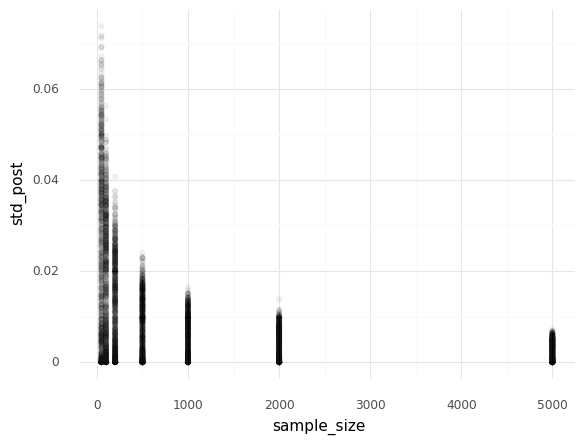

<ggplot: (8755871804885)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


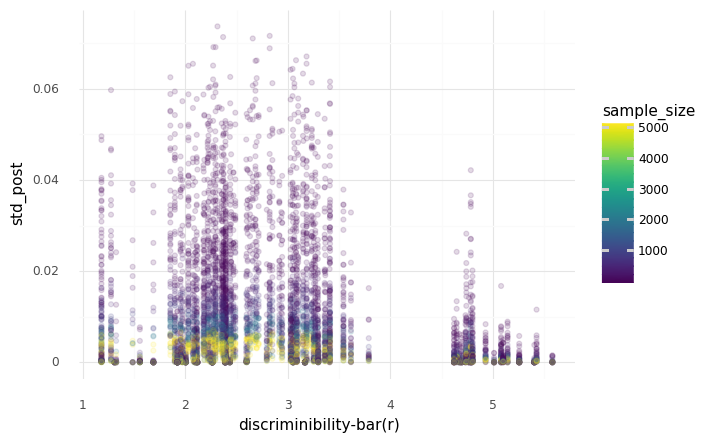

<ggplot: (8755871763913)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


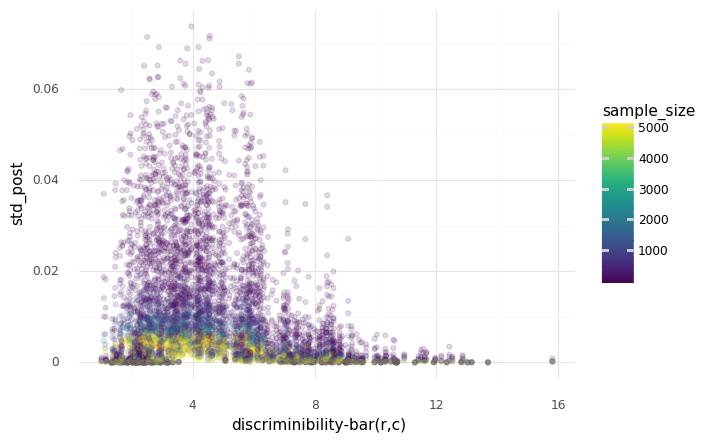

<ggplot: (8755871698957)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


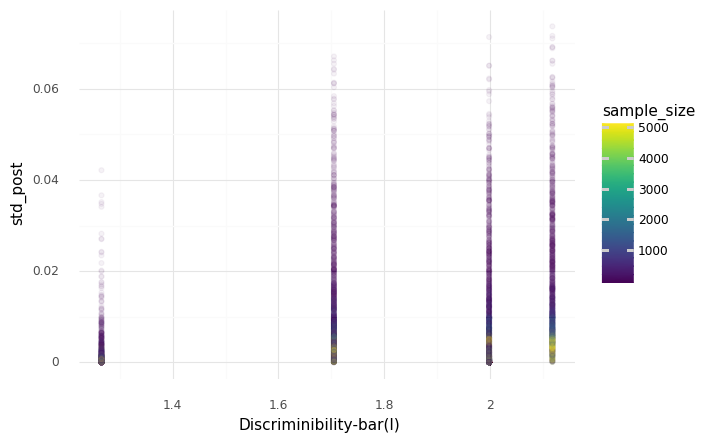

<ggplot: (8755871631737)>

In [562]:
if estimate_bias:
    ggplot(sample_stats_basic, aes(x='sample_size', y='std_post')) + geom_point(alpha=0.05) + theme_minimal()
    ggplot(sample_stats_basic, aes(x='discriminibility-bar(r)', y='std_post', color='sample_size')) + geom_point(alpha=0.15) + theme_minimal()
    ggplot(sample_stats_basic, aes(x='discriminibility-bar(r,c)', y='std_post', color='sample_size')) + geom_point(alpha=0.15) + theme_minimal()
    ggplot(sample_stats_basic, aes(x='Discriminibility-bar(l)', y='std_post', color='sample_size')) + geom_point(alpha=0.05) + theme_minimal()

Compare with random choices of reconstructed target wordform and context...

In [532]:
if estimate_bias:
    rtc_pairs = {r:random_target_and_context_pairs(r, False, 10)
                 for l in sorted(list(benchmark_prefix_lengths))
                 for r in benchmark_source_prefixes[l]}

    benchmark_length_context_pairs_r = {(l, int(wc_idx_pair[1].item()))
                                        for l in sorted(list(benchmark_prefix_lengths))
                                        for r in benchmark_source_prefixes[l]
                                        for wc_idx_pair in rtc_pairs[r]}
    print(len(benchmark_length_context_pairs_r))

1663


In [533]:
if estimate_bias:
    benchmark_source_prefixes[8][:5]
    benchmark_source_prefixes[8][0]
    rtc_pairs[benchmark_source_prefixes[8][0]]
    rtc_pairs[benchmark_source_prefixes[8][0]].shape
    pareto_front_for_prefix(benchmark_source_prefixes[8][0], False).shape

['⋊.k.oʊ.p.aɪ.l.ɪ.t',
 '⋊.ɹ.i.k.ɹ.i.eɪ.t',
 '⋊.p.eɪ.t.ɹ.i.ɪ.t',
 '⋊.s.m.æ.t.ɚ.ɪ.ŋ',
 '⋊.p.ɹ.ɑ.s.p.ɚ.ə']

'⋊.k.oʊ.p.aɪ.l.ɪ.t'

tensor([[2.4970e+03, 1.1190e+03, 3.5785e+01, 2.2758e+00],
        [2.4970e+03, 1.8603e+04, 2.7882e+01, 3.5785e+00],
        [2.4970e+03, 2.3568e+04, 2.8298e+01, 3.8045e+00],
        [2.4970e+03, 4.2403e+04, 2.8697e+01, 5.0198e+00],
        [2.4970e+03, 4.5723e+04, 2.6823e+01, 4.9889e+00],
        [2.4970e+03, 6.6635e+04, 3.0508e+01, 4.0360e+00],
        [2.4970e+03, 8.3375e+04, 2.8699e+01, 5.6936e+00],
        [2.4970e+03, 9.8693e+04, 3.0489e+01, 5.4188e-01],
        [2.4970e+03, 1.0175e+05, 3.0451e+01, 3.8456e+00],
        [2.4970e+03, 1.0463e+05, 2.8988e+01, 4.1156e+00]])

torch.Size([10, 4])

torch.Size([6, 4])

In [534]:
if estimate_bias:
    # 39m sidious / 1663 lc pairs
    benchmark_Distinctiveness_lc_r = dict(par(delayed(bDistinct_lc)(l,c)
                                              for l,c in benchmark_length_context_pairs_r))
    # 152m sidious / 1663 lc pairs
    benchmark_Discriminibility_lc_r = dict(par(delayed(bDiscrim_lc)(l,c)
                                             for l,c in benchmark_length_context_pairs_r))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 274 tasks      |

In [535]:
if estimate_bias:
    stampedNote('Making parameter combinations...')

    print(f"ls = {benchmark_prefix_lengths}")
    parameter_combinations_prefixes_r = []
    # parameter_combinations_prefixes = dict()
    for l in sorted(list(benchmark_prefix_lengths)):
        print(f"\n> l = {l}")
    #     c_l = [] #combinations for a particular length l
        print(f"\t rs[l] = {benchmark_source_prefixes[l]}")

        for r in benchmark_source_prefixes[l]:
            print(f">> r = {r}")
            r_idx = Ps_t.index(r)

            rf = rtc_pairs[r]
            # rf = random_target_and_context_pairs(r, False)
            print(f"\t |rf(r)| = {rf.shape[0]}")
            # pf = pareto_front_for_prefix(r, False)
            # print(f"\t |pf(r)| = {pf.shape[0]}")

    #         my_Cs = {wc_idx_pair[1].item() for wc_idx_pair in pf}
    #         wc_idx_pairs = pf[:, torch.tensor([0,1])]
    #         subset_of_pf_idxs = choices(torch.arange(pf.shape[0]), k=max_pf_front_samples)
    #         subset_of_pf = pf[subset_of_pf_idxs,:]
    #         print(f"\t |subset of pf(r)| = {subset_of_pf.shape}")

            for wc_idx_pair in rf:
    #         for wc_idx_pair in subset_of_pf:
            # for wc_idx_pair in pf:
    #             print(f'\t\twc_idx_pair = {wc_idx_pair}')
                w_idx = int(wc_idx_pair[0].item())
                c_idx = int(wc_idx_pair[1].item())
    #             if (l, c_idx) not in benchmark_length_context_pairs:
    #                 print(f"r_idx = {r_idx}, w_idx = {w_idx}")
    #                 print(f"({l}, {c_idx}) not in benchmark_length_context_pairs")
                w = Ws_t[w_idx]
                c = Cs_t[c_idx]
    #             l = len(ds2t(r))

                pW_c = pW_C_torch[:, c_idx]
                pW_c_wbar = torch.cat([pW_c[:w_idx], pW_c[w_idx+1:]])

                combo_template = OrderedDict({'type':'prefixes',
                                     'l':l})
                combo_template['prefix'] = r
                combo_template['wordform'] = w
                combo_template['context'] = c
                combo_template['rw'] = (r_idx, w_idx)
                combo_template['rwc'] = (r_idx, w_idx, c_idx)
                combo_template['p_idx'] = r_idx
                combo_template['w_idx'] = w_idx
                combo_template['c_idx'] = c_idx
                combo_template['l'] = l
                combo_template['h(w|c)'] = wc_idx_pair[2].item()
                combo_template['H(W|c)'] = wc_idx_pair[3].item()

                combo_template['distinctiveness(r)'] = distinctiveness(w,
                                                                       CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                       exactWF=False)
                combo_template['distinctiveness-bar(r)'] = combo_template['distinctiveness(r)'] / (l - 2)
                combo_template['Distinctiveness(l)'] = Distinct_l[l]
                combo_template['Distinctiveness-bar(l)'] = combo_template['Distinctiveness(l)'] / (l - 2)


                combo_template['distinctiveness(r,c)'] = distinctiveness(w,
                                                                         CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                         lexicon_dist=pW_c,
                                                                         exactWF=False)
                combo_template['distinctiveness-bar(r,c)'] = combo_template['distinctiveness(r,c)'] / (l - 2)
                # combo_template['Distinctiveness(l,c)'] = distinctiveness_avg(l, 
                #                                                              lexicon_dist=pW_C_torch[:,c_idx],
                #                                                              exactWF=False)
                combo_template['Distinctiveness(l,c)'] = benchmark_Distinctiveness_lc_r[(l, c_idx)]
                combo_template['Distinctiveness-bar(l,c)'] = combo_template['Distinctiveness(l,c)'] / (l - 2)


                combo_template['discriminibility(r)'] = discriminibility(w,
                                                                         CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                         exactWF=False)
                combo_template['discriminibility-bar(r)'] = combo_template['discriminibility(r)'] / (l - 2)
                combo_template['Discriminibility(l)'] = Discrim_l[l]
                combo_template['Discriminibility-bar(l)'] = combo_template['Discriminibility(l)'] / (l - 2)


                combo_template['discriminibility(r,c)'] = discriminibility(w,
                                                                           CMsByLengthByWordformIndex_torch[l][w_idx],
                                                                           lexicon_dist=pW_c_wbar,
                                                                           exactWF=False)
                combo_template['discriminibility-bar(r,c)'] = combo_template['discriminibility(r,c)'] / (l - 2)
                # combo_template['Discriminibility(l,c)'] = discriminibility_avg(l,
                #                                                                c_idx,
                #                                                                exactWF=False)
                combo_template['Discriminibility(l,c)'] = benchmark_Discriminibility_lc_r[(l, c_idx)]
                combo_template['Discriminibility-bar(l,c)'] = combo_template['Discriminibility(l,c)'] / (l - 2)
                for sample_size in sample_sizes:
                    for measure_index in range(measures_per_param_combo):
                        combo = deepcopy(combo_template)
                        combo['sample_size'] = sample_size
                        combo['measure_index'] = measure_index
                        parameter_combinations_prefixes_r.append(combo)


    len(parameter_combinations_prefixes_r)
    stampedNote('Parameter combinations made.')

Making parameter combinations... @ 11:14:37
ls = {8, 16, 4, 12}

> l = 4
	 rs[l] = ['⋊.ə.s.t', '⋊.m.eɪ.ə', '⋊.h.ɪ.p', '⋊.k.w.ɛ', '⋊.s.eɪ.v', '⋊.n.ɑ.ɹ', '⋊.tʃ.ɛ.d', '⋊.d.æ.g', '⋊.ʃ.oʊ.i', '⋊.t.ɹ.ɪ', '⋊.ə.p.ɹ', '⋊.h.oʊ.s', '⋊.l.i.k', '⋊.ə.b.h', '⋊.m.i.⋉', '⋊.v.ɚ.m', '⋊.f.æ.m', '⋊.ɹ.oʊ.⋉', '⋊.b.ɪ.ʃ', '⋊.d.ʌ.s', '⋊.b.ɚ.p', '⋊.k.ɚ.ə', '⋊.ə.k.ɹ', '⋊.k.j.u', '⋊.v.aɪ.ɹ', '⋊.ʌ.p.t', '⋊.h.ʌ.ʃ', '⋊.g.ɑ.b', '⋊.s.æ.d', '⋊.s.u.ɚ']
>> r = ⋊.ə.s.t
	 |rf(r)| = 50
>> r = ⋊.m.eɪ.ə
	 |rf(r)| = 10
>> r = ⋊.h.ɪ.p
	 |rf(r)| = 60
>> r = ⋊.k.w.ɛ
	 |rf(r)| = 30
>> r = ⋊.s.eɪ.v
	 |rf(r)| = 20
>> r = ⋊.n.ɑ.ɹ
	 |rf(r)| = 80
>> r = ⋊.tʃ.ɛ.d
	 |rf(r)| = 10
>> r = ⋊.d.æ.g
	 |rf(r)| = 10
>> r = ⋊.ʃ.oʊ.i
	 |rf(r)| = 10
>> r = ⋊.t.ɹ.ɪ
	 |rf(r)| = 150
>> r = ⋊.ə.p.ɹ
	 |rf(r)| = 110
>> r = ⋊.h.oʊ.s
	 |rf(r)| = 20
>> r = ⋊.l.i.k
	 |rf(r)| = 10
>> r = ⋊.ə.b.h
	 |rf(r)| = 10
>> r = ⋊.m.i.⋉
	 |rf(r)| = 10
>> r = ⋊.v.ɚ.m
	 |rf(r)| = 30
>> r = ⋊.f.æ.m
	 |rf(r)| = 20
>> r = ⋊.ɹ.oʊ.⋉
	 |rf(r)| = 10
>> r = ⋊.b.ɪ.ʃ
	 |rf(r)| = 10
>

249200

Parameter combinations made. @ 11:15:17


In [536]:
if estimate_bias:
    # 141.6m sidious / 1663 lc pairs + 249200 measurements
    measurements_basic_r = list(par(delayed(update_combo_dict_with_measurement)(combo)
                                      for combo in parameter_combinations_prefixes_r))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0798s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0381s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.7932s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 484 tasks      

[Parallel(n_jobs=-1)]: Done 9833 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 9972 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 10111 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10252 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10393 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 10536 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 10679 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 10824 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 10969 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 11116 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 11263 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 11412 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 11561 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 11712 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 11863 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 12016 tasks   

[Parallel(n_jobs=-1)]: Done 35956 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 36223 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 36492 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 36761 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 37032 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 37303 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 37576 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 37849 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 38124 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1998s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 38399 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0755s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 38788 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 39067 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 39347 tasks      | elapsed: 10.8min
[P

[Parallel(n_jobs=-1)]: Done 75935 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 76324 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 76713 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 77104 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 77495 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 77888 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 78281 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 78676 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 79071 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 79468 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 79865 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 80264 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1968s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0026s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 80742 tasks      | elapsed: 22.3min
[P

[Parallel(n_jobs=-1)]: Done 122785 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 123278 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 123771 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 124266 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 124761 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 125258 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 125755 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 126254 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 126753 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 127254 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 127755 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 128258 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 128761 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 129266 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 129771 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 193334 tasks      | elapsed: 82.1min
[Parallel(n_jobs=-1)]: Done 193953 tasks      | elapsed: 82.6min
[Parallel(n_jobs=-1)]: Done 194574 tasks      | elapsed: 83.1min
[Parallel(n_jobs=-1)]: Done 195195 tasks      | elapsed: 83.6min
[Parallel(n_jobs=-1)]: Done 195818 tasks      | elapsed: 84.2min
[Parallel(n_jobs=-1)]: Done 196441 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 197066 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done 197691 tasks      | elapsed: 85.7min
[Parallel(n_jobs=-1)]: Done 198318 tasks      | elapsed: 86.2min
[Parallel(n_jobs=-1)]: Done 198945 tasks      | elapsed: 86.8min
[Parallel(n_jobs=-1)]: Done 199574 tasks      | elapsed: 87.3min
[Parallel(n_jobs=-1)]: Done 200203 tasks      | elapsed: 87.8min
[Parallel(n_jobs=-1)]: Done 200834 tasks      | elapsed: 88.4min
[Parallel(n_jobs=-1)]: Done 201465 tasks      | elapsed: 88.9min
[Parallel(n_jobs=-1)]: Done 202098 tasks      | elapsed: 89.5min
[Parallel(n_jobs=-1)]: Do

In [541]:
if estimate_bias:
    o
    exportDict(o + 'measurements_basic_r.json', measurements_basic_r)

'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts'

In [570]:
if estimate_bias:
    measurements_basic_r_df = pd.DataFrame(measurements_basic_r)
    measurements_basic_r_df['log_sample_size'] = np.log10(measurements_basic_r_df['sample_size'])
    measurements_basic_r_df['sample_size_cat'] = measurements_basic_r_df['sample_size']
    measurements_basic_r_df['sample_size_cat'] = measurements_basic_r_df['sample_size_cat'].apply(str)

0.3300695626018313

In [571]:
if estimate_bias:
    post_col = measurements_basic_r_df['p-hat(w-hat|r,c)']
    post_col_np = post_col.to_numpy()
    np.mean(post_col_np)

0.3300695626018313

In [551]:
if estimate_bias:
    measurements_basic_r_df_groupped = measurements_basic_r_df.groupby(['type', 'l', 
                                                                    'prefix', 'wordform', 'context', 
                                                                    'rw', 'rwc', 
                                                                    'p_idx', 'w_idx', 'c_idx', 
                                                                    'h(w|c)', 'H(W|c)', 
                                                                    'distinctiveness(r)', 'distinctiveness-bar(r)', 
                                                                    'Distinctiveness(l)', 'Distinctiveness-bar(l)', 
                                                                    'distinctiveness(r,c)', 'distinctiveness-bar(r,c)', 
                                                                    'Distinctiveness(l,c)', 'Distinctiveness-bar(l,c)', 
                                                                    'discriminibility(r)', 'discriminibility-bar(r)', 
                                                                    'Discriminibility(l)', 'Discriminibility-bar(l)', 
                                                                    'discriminibility(r,c)', 'discriminibility-bar(r,c)', 
                                                                    'Discriminibility(l,c)', 'Discriminibility-bar(l,c)', 
                                                                    'sample_size', 'log_sample_size', 'sample_size_cat'
                                                                       ],
                                                                   as_index=True)



    # group_names = sorted([name for name, _ in measurements_basic_df_groupped], key=lambda name: name[0])
    # len(group_names)
    # group_names[:3]
    # measurements_basic_df_groupped.get_group((73, 12, 675, 50)).head()
    # measurements_basic_df_groupped.get_group(group_names[0]).head()
    sample_stats_basic_r = measurements_basic_r_df_groupped.agg(mean_post=pd.NamedAgg(column='p-hat(w-hat|r,c)',
                                                                                  aggfunc='mean'),
                                                            var_post=pd.NamedAgg(column='p-hat(w-hat|r,c)',
                                                                                  aggfunc='var'),
                                                            std_post=pd.NamedAgg(column='p-hat(w-hat|r,c)',
                                                                                 aggfunc='std')#,
    #                                                         l=pd.NamedAgg(column='l',
    #                                                                       aggfunc=common),
                                                            )

    sample_stats_basic_r = sample_stats_basic_r.reset_index()

In [577]:
# sample_stats_basic_r.info()
sample_stats_basic_r.head()

,type,l,prefix,wordform,context,rw,rwc,p_idx,w_idx,c_idx,h(w|c),H(W|c),distinctiveness(r),distinctiveness-bar(r),Distinctiveness(l),...,"Distinctiveness-bar(l,c)",discriminibility(r),discriminibility-bar(r),Discriminibility(l),Discriminibility-bar(l),"discriminibility(r,c)","discriminibility-bar(r,c)","Discriminibility(l,c)","Discriminibility-bar(l,c)",sample_size,log_sample_size,sample_size_cat,mean_post,var_post,std_post
0,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,a year and,"(1506, 359)","(1506, 359, 2638)",1506,359,2638,35.62558,1.05128,4.006162,2.003081,3.997459,...,0.546229,4.008775,2.004387,3.997459,1.99873,9.605876,4.802938,4.881479,2.44074,50,1.69897,50,8.276089e-08,1.284719e-16,1.133455e-08
1,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,a year and,"(1506, 359)","(1506, 359, 2638)",1506,359,2638,35.62558,1.05128,4.006162,2.003081,3.997459,...,0.546229,4.008775,2.004387,3.997459,1.99873,9.605876,4.802938,4.881479,2.44074,100,2.00000,100,8.789286e-08,1.207120e-16,1.098690e-08
2,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,a year and,"(1506, 359)","(1506, 359, 2638)",1506,359,2638,35.62558,1.05128,4.006162,2.003081,3.997459,...,0.546229,4.008775,2.004387,3.997459,1.99873,9.605876,4.802938,4.881479,2.44074,200,2.30103,200,8.871549e-08,3.088794e-17,5.557692e-09
3,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,a year and,"(1506, 359)","(1506, 359, 2638)",1506,359,2638,35.62558,1.05128,4.006162,2.003081,3.997459,...,0.546229,4.008775,2.004387,3.997459,1.99873,9.605876,4.802938,4.881479,2.44074,500,2.69897,500,8.939091e-08,1.814072e-17,4.259192e-09
4,prefixes,4,⋊.b.ɚ.p,⋊.b.ɚ.p.⋉.⋉,a year and,"(1506, 359)","(1506, 359, 2638)",1506,359,2638,35.62558,1.05128,4.006162,2.003081,3.997459,...,0.546229,4.008775,2.004387,3.997459,1.99873,9.605876,4.802938,4.881479,2.44074,1000,3.00000,1000,9.056012e-08,1.049921e-17,3.240249e-09


In [576]:
wordsWithPrefix('⋊.b.ɚ.p', Ws_t)
tuple(sorted(wordsWithPrefix('⋊.b.ɚ', Ws_t)))
tuple(sorted(wordsWithPrefix('⋊.b.ɚ', Ws_t), key=lambda w: pW_C_torch[Ws_t.index(w), 2638]))

{'⋊.b.ɚ.p.⋉.⋉'}

('⋊.b.ɚ.b.ɪ.n.⋉.⋉',
 '⋊.b.ɚ.d.i.⋉.⋉',
 '⋊.b.ɚ.d.n.⋉.⋉',
 '⋊.b.ɚ.d.ɑ.k.⋉.⋉',
 '⋊.b.ɚ.d.⋉.⋉',
 '⋊.b.ɚ.dʒ.i.⋉.⋉',
 '⋊.b.ɚ.eɪ.⋉.⋉',
 '⋊.b.ɚ.g.l.ɚ.i.⋉.⋉',
 '⋊.b.ɚ.l.i.⋉.⋉',
 '⋊.b.ɚ.l.æ.p.⋉.⋉',
 '⋊.b.ɚ.l.ɛ.s.k.⋉.⋉',
 '⋊.b.ɚ.n.d.⋉.⋉',
 '⋊.b.ɚ.n.t.⋉.⋉',
 '⋊.b.ɚ.n.⋉.⋉',
 '⋊.b.ɚ.oʊ.k.⋉.⋉',
 '⋊.b.ɚ.oʊ.⋉.⋉',
 '⋊.b.ɚ.p.⋉.⋉',
 '⋊.b.ɚ.s.aɪ.t.ɪ.s.⋉.⋉',
 '⋊.b.ɚ.s.t.⋉.⋉',
 '⋊.b.ɚ.s.ɚ.k.⋉.⋉',
 '⋊.b.ɚ.ɑ.dʒ.⋉.⋉',
 '⋊.b.ɚ.θ.⋉.⋉',
 '⋊.b.ɚ.⋉.⋉')

('⋊.b.ɚ.l.æ.p.⋉.⋉',
 '⋊.b.ɚ.dʒ.i.⋉.⋉',
 '⋊.b.ɚ.eɪ.⋉.⋉',
 '⋊.b.ɚ.l.ɛ.s.k.⋉.⋉',
 '⋊.b.ɚ.s.aɪ.t.ɪ.s.⋉.⋉',
 '⋊.b.ɚ.oʊ.k.⋉.⋉',
 '⋊.b.ɚ.ɑ.dʒ.⋉.⋉',
 '⋊.b.ɚ.d.i.⋉.⋉',
 '⋊.b.ɚ.l.i.⋉.⋉',
 '⋊.b.ɚ.⋉.⋉',
 '⋊.b.ɚ.g.l.ɚ.i.⋉.⋉',
 '⋊.b.ɚ.p.⋉.⋉',
 '⋊.b.ɚ.b.ɪ.n.⋉.⋉',
 '⋊.b.ɚ.s.ɚ.k.⋉.⋉',
 '⋊.b.ɚ.oʊ.⋉.⋉',
 '⋊.b.ɚ.s.t.⋉.⋉',
 '⋊.b.ɚ.d.n.⋉.⋉',
 '⋊.b.ɚ.d.ɑ.k.⋉.⋉',
 '⋊.b.ɚ.d.⋉.⋉',
 '⋊.b.ɚ.n.t.⋉.⋉',
 '⋊.b.ɚ.n.d.⋉.⋉',
 '⋊.b.ɚ.θ.⋉.⋉',
 '⋊.b.ɚ.n.⋉.⋉')

In [552]:
if estimate_bias:
    sample_stats_basic_r.drop(['p_idx', 'w_idx', 'c_idx'], axis=1).corr('pearson')

,l,h(w|c),H(W|c),distinctiveness(r),distinctiveness-bar(r),Distinctiveness(l),Distinctiveness-bar(l),"distinctiveness(r,c)","distinctiveness-bar(r,c)","Distinctiveness(l,c)","Distinctiveness-bar(l,c)",discriminibility(r),discriminibility-bar(r),Discriminibility(l),Discriminibility-bar(l),"discriminibility(r,c)","discriminibility-bar(r,c)","Discriminibility(l,c)","Discriminibility-bar(l,c)",sample_size,log_sample_size,mean_post,var_post,std_post
l,1.000000e+00,1.486437e-01,-1.852417e-04,9.590755e-01,8.801529e-01,9.535451e-01,-8.431449e-01,9.409134e-01,9.099636e-01,5.549522e-01,-6.291264e-01,9.565338e-01,8.790807e-01,9.535451e-01,-8.431449e-01,9.408253e-01,9.103138e-01,6.538601e-01,-8.078891e-01,1.315725e-19,-5.311411e-17,0.938948,0.201265,0.352655
h(w|c),1.486437e-01,1.000000e+00,-3.884131e-01,1.297214e-01,1.030018e-01,1.555197e-01,-9.490163e-02,2.133695e-01,2.741129e-01,-1.532158e-01,-3.577601e-01,1.297593e-01,1.037727e-01,1.555197e-01,-9.490163e-02,2.118289e-01,2.718940e-01,8.725237e-02,-1.235985e-01,-2.114303e-18,-4.076317e-19,0.041669,0.027466,0.044188
H(W|c),-1.852417e-04,-3.884131e-01,1.000000e+00,-1.509040e-03,9.029132e-04,4.032757e-03,8.723625e-03,-1.189125e-01,-2.271216e-01,6.690667e-01,6.862572e-01,-7.171015e-04,2.002832e-03,4.032757e-03,8.723625e-03,-1.185446e-01,-2.264579e-01,-1.207140e-02,-7.280531e-02,-2.561115e-18,-2.110292e-19,-0.007451,0.009205,0.011537
distinctiveness(r),9.590755e-01,1.297214e-01,-1.509040e-03,1.000000e+00,9.413300e-01,8.356532e-01,-9.318235e-01,9.641075e-01,8.917179e-01,4.596166e-01,-5.800686e-01,9.998131e-01,9.432271e-01,8.356532e-01,-9.318235e-01,9.643806e-01,8.925491e-01,5.449131e-01,-7.329419e-01,8.177911e-18,-3.177357e-18,0.913651,0.092080,0.195123
distinctiveness-bar(r),8.801529e-01,1.030018e-01,9.029132e-04,9.413300e-01,1.000000e+00,7.609353e-01,-8.652256e-01,8.940919e-01,8.457361e-01,4.156737e-01,-5.331268e-01,9.412901e-01,9.995890e-01,7.609353e-01,-8.652256e-01,8.944075e-01,8.465493e-01,4.860792e-01,-6.780643e-01,-3.335203e-18,3.548256e-18,0.851689,0.080011,0.174043
Distinctiveness(l),9.535451e-01,1.555197e-01,4.032757e-03,8.356532e-01,7.609353e-01,1.000000e+00,-6.499957e-01,8.310302e-01,8.542398e-01,6.197357e-01,-6.246555e-01,8.313978e-01,7.572258e-01,1.000000e+00,-6.499957e-01,8.306731e-01,8.541459e-01,7.208462e-01,-8.207032e-01,3.164659e-20,6.566874e-18,0.877492,0.301032,0.494093
Distinctiveness-bar(l),-8.431449e-01,-9.490163e-02,8.723625e-03,-9.318235e-01,-8.652256e-01,-6.499957e-01,1.000000e+00,-9.005131e-01,-7.851975e-01,-2.993938e-01,4.930470e-01,-9.321153e-01,-8.679110e-01,-6.499957e-01,1.000000e+00,-9.008335e-01,-7.861662e-01,-3.698415e-01,5.960877e-01,6.006839e-18,-6.418874e-18,-0.848407,0.005417,-0.039540
"distinctiveness(r,c)",9.409134e-01,2.133695e-01,-1.189125e-01,9.641075e-01,8.940919e-01,8.310302e-01,-9.005131e-01,1.000000e+00,9.634522e-01,3.304195e-01,-6.328272e-01,9.629329e-01,8.947743e-01,8.310302e-01,-9.005131e-01,9.999658e-01,9.638511e-01,5.007189e-01,-7.386967e-01,2.761990e-18,2.529542e-19,0.898559,0.104038,0.212047
"distinctiveness-bar(r,c)",9.099636e-01,2.741129e-01,-2.271216e-01,8.917179e-01,8.457361e-01,8.542398e-01,-7.851975e-01,9.634522e-01,1.000000e+00,2.722099e-01,-7.027936e-01,8.894814e-01,8.443375e-01,8.542398e-01,-7.851975e-01,9.631679e-01,9.999442e-01,5.175874e-01,-7.364440e-01,8.732874e-19,-2.805152e-19,0.865034,0.162260,0.295248
"Distinctiveness(l,c)",5.549522e-01,-1.532158e-01,6.690667e-01,4.596166e-01,4.156737e-01,6.197357e-01,-2.993938e-01,3.304195e-01,2.722099e-01,1.000000e+00,9.164931e-02,4.577226e-01,4.143463e-01,6.197357e-01,-2.993938e-01,3.304848e-01,2.726120e-01,6.049045e-01,-4.379042e-01,-1.699605e-18,9.113153e-19,0.478634,0.217655,0.348814


In [553]:
if estimate_bias:
    sample_stats_basic_r.drop(['p_idx', 'w_idx', 'c_idx'], axis=1).corr('pearson').drop(['l',
                                                                                       'h(w|c)','H(W|c)',
                                                                                       'distinctiveness(r)', 'distinctiveness-bar(r)', 
                                                                                       'Distinctiveness(l)', 'Distinctiveness-bar(l)', 
                                                                                       'distinctiveness(r,c)', 'distinctiveness-bar(r,c)', 
                                                                                       'Distinctiveness(l,c)', 'Distinctiveness-bar(l,c)', 
                                                                                       'discriminibility(r)', 'discriminibility-bar(r)', 
                                                                                       'Discriminibility(l)', 'Discriminibility-bar(l)', 
                                                                                       'discriminibility(r,c)', 'discriminibility-bar(r,c)', 
                                                                                       'Discriminibility(l,c)', 'Discriminibility-bar(l,c)',
                                                                                       'sample_size', 'log_sample_size'
                                                                                      ])

,l,h(w|c),H(W|c),distinctiveness(r),distinctiveness-bar(r),Distinctiveness(l),Distinctiveness-bar(l),"distinctiveness(r,c)","distinctiveness-bar(r,c)","Distinctiveness(l,c)","Distinctiveness-bar(l,c)",discriminibility(r),discriminibility-bar(r),Discriminibility(l),Discriminibility-bar(l),"discriminibility(r,c)","discriminibility-bar(r,c)","Discriminibility(l,c)","Discriminibility-bar(l,c)",sample_size,log_sample_size,mean_post,var_post,std_post
mean_post,0.938948,0.041669,-0.007451,0.913651,0.851689,0.877492,-0.848407,0.898559,0.865034,0.478634,-0.595085,0.910991,0.850076,0.877492,-0.848407,0.898608,0.865648,0.576351,-0.751968,-0.000058,-0.000099,1.000000,0.196543,0.339784
var_post,0.201265,0.027466,0.009205,0.092080,0.080011,0.301032,0.005417,0.104038,0.162260,0.217655,-0.159010,0.088925,0.075853,0.301032,0.005417,0.103444,0.161498,0.237567,-0.227438,-0.219321,-0.352934,0.196543,1.000000,0.922270
std_post,0.352655,0.044188,0.011537,0.195123,0.174043,0.494093,-0.039540,0.212047,0.295248,0.348814,-0.268085,0.190186,0.167632,0.494093,-0.039540,0.211121,0.294109,0.384493,-0.379483,-0.261745,-0.368402,0.339784,0.922270,1.000000


/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


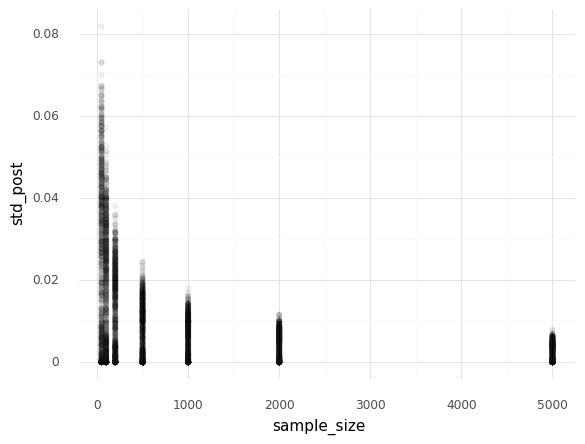

<ggplot: (8755873844041)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


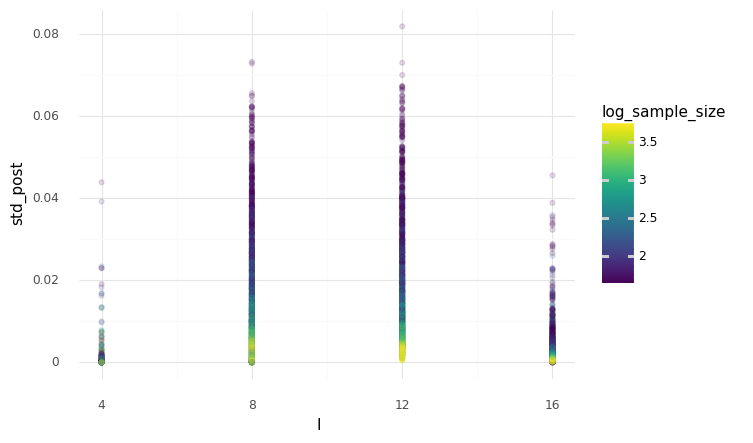

<ggplot: (8755873624893)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


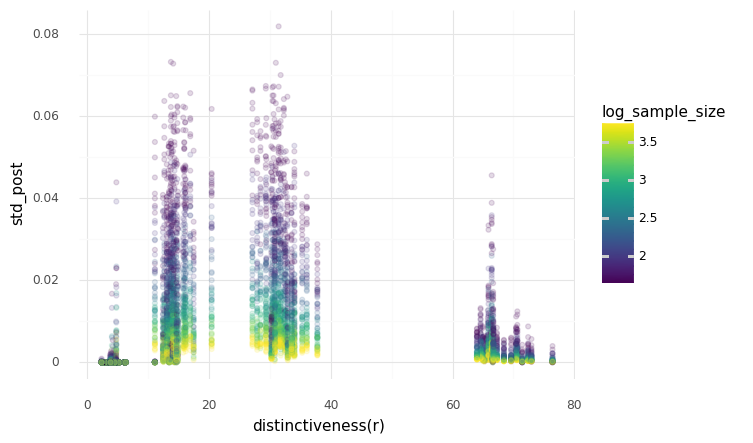

<ggplot: (8755874233497)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


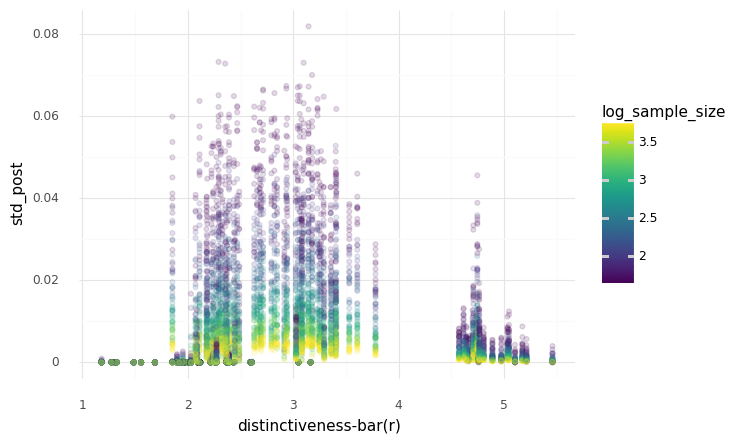

<ggplot: (8755873367329)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


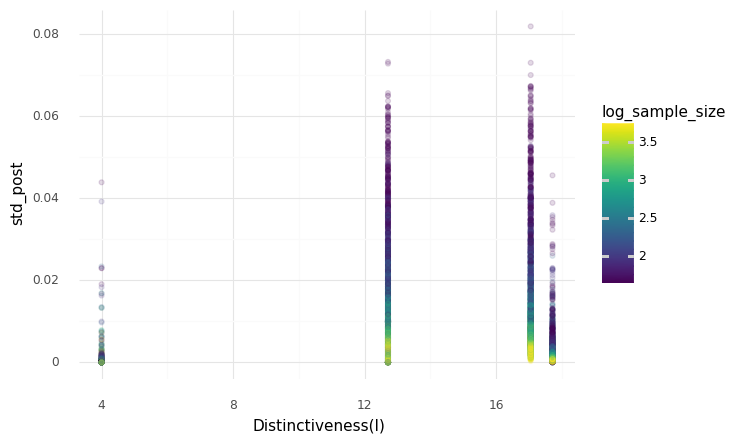

<ggplot: (8755874072653)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


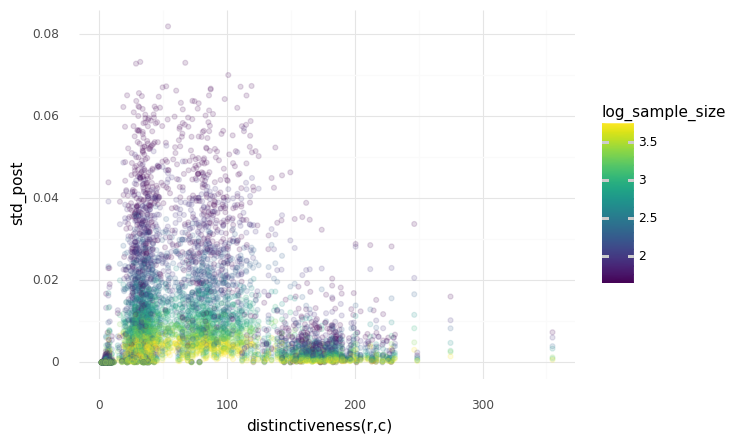

<ggplot: (8755873146945)>

/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


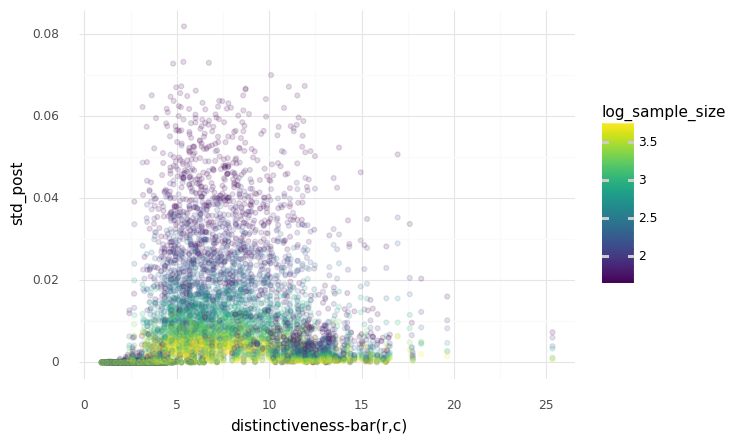

<ggplot: (8755873106353)>

In [558]:
if estimate_bias:
    ggplot(sample_stats_basic_r, aes(x='sample_size', y='std_post')) + geom_point(alpha=0.05) + theme_minimal()
    ggplot(sample_stats_basic_r, aes(x='l', y='std_post', color='log_sample_size')) + geom_point(alpha=0.15) + theme_minimal()
    ggplot(sample_stats_basic_r, aes(x='distinctiveness(r)', y='std_post', color='log_sample_size')) + geom_point(alpha=0.15) + theme_minimal()
    ggplot(sample_stats_basic_r, aes(x='distinctiveness-bar(r)', y='std_post', color='log_sample_size')) + geom_point(alpha=0.15) + theme_minimal()
    ggplot(sample_stats_basic_r, aes(x='Distinctiveness(l)', y='std_post', color='log_sample_size')) + geom_point(alpha=0.15) + theme_minimal()
    ggplot(sample_stats_basic_r, aes(x='distinctiveness(r,c)', y='std_post', color='log_sample_size')) + geom_point(alpha=0.15) + theme_minimal()
    ggplot(sample_stats_basic_r, aes(x='distinctiveness-bar(r,c)', y='std_post', color='log_sample_size')) + geom_point(alpha=0.15) + theme_minimal()    
#     ggplot(sample_stats_basic_r, aes(x='Distinctiveness(l,c)', y='std_post', color='log_sample_size')) + geom_point(alpha=0.15) + theme_minimal()

## Calculation volume organization for Case 1

See Section 6.2 for explanation of the "cases".

### Slices: Calculate results for groups of reconstructed wordforms by (input prefix, context)

In [359]:
len(Ps_t)

42231

In [360]:
def retrieveKcousins(r, maxK):
    word_cousin_indices = union([set(list(cousin_mats[k][Ps_t.index(r),:].nonzero()[0])) for k in range(maxK)])
    word_cousins = list(map(lambda w_idx: Ws_t[w_idx], word_cousin_indices))
    return word_cousins

In [361]:
if r or not e:
    retrieveKcousins('⋊.k.ɑ.n.t', 2)

In [362]:
if r or not e:
    cousin_mats[0].shape
    cousin_mats[0][Ps_t.index('⋊.k.ɑ.n.t'), Ws_t.index('⋊.k.ɑ.n.t.æ.k.t.⋉.⋉')] #should be 1

In [363]:
wordsWithPrefix('⋊.k.ɑ.n.t', Ws)

{'⋊.k.ɑ.n.t.n.u.ɪ.t.i.⋉.⋉',
 '⋊.k.ɑ.n.t.n.ɪ.n.t.⋉.⋉',
 '⋊.k.ɑ.n.t.æ.k.t.⋉.⋉',
 '⋊.k.ɑ.n.t.ə.m.p.l.eɪ.t.⋉.⋉',
 '⋊.k.ɑ.n.t.ɛ.k.s.t.⋉.⋉',
 '⋊.k.ɑ.n.t.ɛ.s.t.⋉.⋉',
 '⋊.k.ɑ.n.t.ɹ.æ.k.t.ɚ.⋉.⋉',
 '⋊.k.ɑ.n.t.ɹ.æ.k.t.⋉.⋉',
 '⋊.k.ɑ.n.t.ɹ.æ.s.t.⋉.⋉',
 '⋊.k.ɑ.n.t.ɹ.ə.b.j.u.ʃ.ɪ.n.⋉.⋉',
 '⋊.k.ɑ.n.t.ɹ.ə.b.æ.n.d.⋉.⋉',
 '⋊.k.ɑ.n.t.ɹ.ə.d.ɪ.k.t.⋉.⋉',
 '⋊.k.ɑ.n.t.ɹ.ə.v.ɚ.s.i.⋉.⋉'}

In [364]:
def get_nnz_word(my_k, j):
    return cousin_mats[my_k][:,j].nnz

if r or not e:
    cousin_mats[1].shape
    word_nnz_counts_by_k = {my_k:par(delayed(get_nnz_word)(my_k, j) for j in range(cousin_mats[my_k].shape[1]))
                            for my_k in range(5)}

In [365]:
from statistics import mean, median

In [366]:
if r or not e:
    for my_k in range(5):
        print(f"max number of {my_k}-cousins = {max(word_nnz_counts_by_k[my_k])}")
        print(f"median number of {my_k}-cousins = {median(word_nnz_counts_by_k[my_k])}")
        print(f"mean number of {my_k}-cousins = {mean(word_nnz_counts_by_k[my_k])}")
        print(' ')

In [367]:
def get_nnz_prefix(my_k, i):
    return cousin_mats[my_k][i,:].nnz

if r or not e:
    cousin_mats[1].shape
    prefix_nnz_counts_by_k = {my_k:par(delayed(get_nnz_prefix)(my_k, i) for i in range(cousin_mats[my_k].shape[0]))
                              for my_k in range(5)}

In [368]:
if r or not e:
    for my_k in range(5):
        print(f"max number of {my_k}-cousins = {max(prefix_nnz_counts_by_k[my_k])}")
        print(f"median number of {my_k}-cousins = {median(prefix_nnz_counts_by_k[my_k])}")
        print(f"mean number of {my_k}-cousins = {mean(prefix_nnz_counts_by_k[my_k])}")
        print(' ')

In [369]:
if r or not e:
    cousin_mats[1].shape

In [370]:
def to_prefix_idx(w):
    return Ps_t.index(w)

prefix_indices_of_full_wordforms = par(delayed(to_prefix_idx)(w) for w in Ws)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0023s.) Setting batch_size=176.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0763s.) Setting batch_size=922.
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 9172 out of 9172 | elapsed:    0.4s finished


In [371]:
def to_word_idx(p):
    return Ws_t.index(p)

def get_wordform_idx(prefix_idx):
    return to_word_idx(Ps_t[prefix_idx])

# get_wordform_idx = {prefix_idx:to_word_idx(Ps_t[prefix_idx])
#                     for prefix_idx in prefix_indices_of_full_wordforms}

In [372]:
Ps_t[8370]
get_wordform_idx(8370)
Ws_t[get_wordform_idx(8370)]

'⋊.h.aɪ.k.⋉.⋉'

1928

'⋊.h.aɪ.k.⋉.⋉'

In [373]:
if r and not e:
    cousin_mats[k].shape

In [374]:
def getKcousin_idxs_of_wordform(w_idx, maxK, asType=None, onlyWordCousins = False, getPrefixIndices=True):
    kcousin_indices = union([set(list(cousin_mats[k][:,w_idx].nonzero()[0])) for k in range(maxK)])
    if onlyWordCousins:
    # top line is ≈100x slower
#         kcousin_indices = {prefix_idx for prefix_idx in kcousin_indices if prefix_idx in prefix_indices_of_full_wordforms}
        kcousin_indices = set.intersection(kcousin_indices, prefix_indices_of_full_wordforms)
    if not getPrefixIndices:
        kcousin_indices = set(map(get_wordform_idx, kcousin_indices))
    
    if asType == 'ndarray':
        kcousin_indices = np.array(sorted(list(kcousin_indices)), dtype='int32')
        return kcousin_indices
    elif asType == 'torch':
        kcousin_indices = torch.tensor(sorted(list(kcousin_indices)), dtype=torch.int32)
        return kcousin_indices
    else:
        return kcousin_indices
    
def getKcousin_idxs_of_prefix(p_idx, maxK, asType=None):
    kcousin_indices = union([set(list(cousin_mats[k][p_idx].nonzero()[0])) for k in range(maxK)])
    
    if asType == 'ndarray':
        kcousin_indices = np.array(sorted(list(kcousin_indices)), dtype='int32')
        return kcousin_indices
    elif asType == 'torch':
        kcousin_indices = torch.tensor(sorted(list(kcousin_indices)), dtype=torch.int32)
        return kcousin_indices
    else:
        return kcousin_indices

In [375]:
if r and not e:
    random_source_wordform
    getKcousin_idxs_of_wordform(Ws_t.index(random_source_wordform), 2, 'ndarray', True, False)

In [376]:
if r and not e:
    random_source_prefix
    getKcousin_idxs_of_prefix(Ps_t.index(random_source_prefix), 2, 'ndarray')

In [377]:
def pXhat0fX0i_pxtn_by_rc(produced_prefix_idx, x0k_cm, c_idx, m = 50, asType='ndarray', parallel=False):
    kCousin_idxs = getKcousin_idxs_of_prefix(produced_prefix_idx, k, 'ndarray')
    
    if x0k_cm is None:
        x0k_cm = prefixTox0kCM(Ps_t[produced_prefix_idx])
    
    if parallel:
        estimates = par(delayed(pXhat0fX0i_pxtn)(w_idx, x0k_cm, c_idx, m=m) for w_idx in kCousin_idxs)
        estimates = np.array(list(estimates))
    else:
        estimates = np.array([pXhat0fX0i_pxtn(w_idx, x0k_cm, c_idx, m=m) for w_idx in kCousin_idxs])

    if asType == 'ndarray':
        return kCousin_idxs, estimates
    elif asType == 'torch':
#         return torch.tensor(kCousin_idxs), torch.tensor(estimates)
        return torch.from_numpy(kCousin_idxs), torch.from_numpy(estimates)
    else:
        return tuple(kCousin_idxs), tuple(estimates)

def pXhat0fX0i_pxtn_by_wc(produced_wordform_idx, x0k_cm, c_idx, m = 50, asType='ndarray', parallel=False):
    equivalent_prefix_idx = Ps_t.index(Ws_t[produced_wordform_idx])
    return pXhat0fX0i_pxtn_by_rc(equivalent_prefix_idx, x0k_cm, c_idx, m, asType, parallel)

In [378]:
random_source_prefix
random_source_prefix_idx = Ps_t.index(random_source_prefix)
random_source_prefix_x0kcm = prefixTox0kCM(random_source_prefix)

'⋊.d.eɪ.k.ɑ'

In [379]:
if r and not e:
    print(f'x0k = {random_source_prefix}')
    print(f'c = {random_context}')
    cousin_idxs, post_probs = pXhat0fX0i_pxtn_by_rc(random_source_prefix_idx, random_source_prefix_x0kcm, random_context_idx)
    print(f'({k}-cousin W-hat, p(W-hat|X0k = {random_source_prefix}, C = {random_context}))')
    [(Ws_t[cousin_idx], post_probs[i]) for i, cousin_idx in enumerate(cousin_idxs)]

### Blocks: Calculate results for groups of input prefixes by context

In [380]:
#FIXME

## Calculation volume organization 2

See Section 6.2 for explanation of the "cases".

In [381]:
#FIXME

## Calculation volume organization 3

See Section 6.2 for explanation of the "cases".

### Slices: Calculate $\{p(\widehat{W} = w^* | W = w^*, C = c)\}$ for all $W$ and for a single given $c$ 

In [382]:
{w for w in Ws_t if ds2t(w)[0] != leftEdge or ds2t(w)[-1] != rightEdge}

set()

In [383]:
Ws_t.index('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉')
len(ds2t('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉')) #19

6304

19

In [384]:
len(CMsByLengthByWordformIndex_torch)
CMsByLengthByWordformIndex_torch[19][6304].shape
CMsByLengthByWordformIndex_torch[19][6304]

20

torch.Size([39, 17])

tensor([[0.0070, 0.0366, 0.0071, 0.0071, 0.0092, 0.0176, 0.0114, 0.0093, 0.0070,
         0.0091, 0.0159, 0.0089, 0.0072, 0.0071, 0.0075, 0.0070, 0.0000],
        [0.0070, 0.0089, 0.0071, 0.0071, 0.0092, 0.0335, 0.0114, 0.0093, 0.0070,
         0.0091, 0.0159, 0.0089, 0.0072, 0.0071, 0.0075, 0.0070, 0.0000],
        [0.0070, 0.0089, 0.0135, 0.0071, 0.0092, 0.0176, 0.0114, 0.0093, 0.0070,
         0.0091, 0.0159, 0.0089, 0.0072, 0.0071, 0.0075, 0.0070, 0.0000],
        [0.0070, 0.0088, 0.0070, 0.0070, 0.0091, 0.0174, 0.0113, 0.0092, 0.0069,
         0.0090, 0.0157, 0.0088, 0.0071, 0.0070, 0.0142, 0.0068, 0.0000],
        [0.0068, 0.0086, 0.0068, 0.0068, 0.0088, 0.0169, 0.0110, 0.0089, 0.0068,
         0.0088, 0.0153, 0.0086, 0.0069, 0.0068, 0.0072, 0.0066, 0.0000],
        [0.0070, 0.0550, 0.0071, 0.2747, 0.0092, 0.1082, 0.0114, 0.0093, 0.0070,
         0.0091, 0.1078, 0.0089, 0.7089, 0.0071, 0.1108, 0.0070, 0.0000],
        [0.0068, 0.0087, 0.0069, 0.0069, 0.0090, 0.0171, 0.0111, 0.009

In [385]:
len(ds2t('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ'))
len(dsToKfactorSequence(3, '⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ'))
prefixTox0kCM('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ').shape

len(ds2t('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n'))
len(dsToKfactorSequence(3, '⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n'))
prefixTox0kCM('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n').shape

len(ds2t('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉'))
len(dsToKfactorSequence(3, '⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉'))
prefixTox0kCM('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉').shape

len(ds2t('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉'))
len(dsToKfactorSequence(3, '⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉'))
prefixTox0kCM('⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉.⋉').shape

16

14

torch.Size([39, 14])

17

15

torch.Size([39, 15])

18

16

torch.Size([39, 16])

19

17

torch.Size([39, 17])

In [386]:
len(ds2t("⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n"))
prefixTox0kCM("⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n").shape
prefixTox0kCM("⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n")

17

torch.Size([39, 15])

tensor([[0.0070, 0.0366, 0.0071, 0.0071, 0.0092, 0.0176, 0.0114, 0.0093, 0.0070,
         0.0091, 0.0159, 0.0089, 0.0072, 0.0071, 0.0075],
        [0.0070, 0.0089, 0.0071, 0.0071, 0.0092, 0.0335, 0.0114, 0.0093, 0.0070,
         0.0091, 0.0159, 0.0089, 0.0072, 0.0071, 0.0075],
        [0.0070, 0.0089, 0.0135, 0.0071, 0.0092, 0.0176, 0.0114, 0.0093, 0.0070,
         0.0091, 0.0159, 0.0089, 0.0072, 0.0071, 0.0075],
        [0.0070, 0.0088, 0.0070, 0.0070, 0.0091, 0.0174, 0.0113, 0.0092, 0.0069,
         0.0090, 0.0157, 0.0088, 0.0071, 0.0070, 0.0142],
        [0.0068, 0.0086, 0.0068, 0.0068, 0.0088, 0.0169, 0.0110, 0.0089, 0.0068,
         0.0088, 0.0153, 0.0086, 0.0069, 0.0068, 0.0072],
        [0.0070, 0.0550, 0.0071, 0.2747, 0.0092, 0.1082, 0.0114, 0.0093, 0.0070,
         0.0091, 0.1078, 0.0089, 0.7089, 0.0071, 0.1108],
        [0.0068, 0.0087, 0.0069, 0.0069, 0.0090, 0.0171, 0.0111, 0.0090, 0.0068,
         0.0089, 0.0155, 0.0087, 0.0070, 0.0069, 0.0073],
        [0.0070, 0.0089, 0.

In [387]:
# CMsByLengthByWordformIndex_torch
# X0f_CMs_by_wordform_index = [wordformTox0kCM(w, w_idx) for w_idx, w in enumerate(Ws_t)]
# X0f_CMs_by_wordform_index_torch = torch.tensor([wordformTox0kCM(w, w_idx) for w_idx, w in enumerate(Ws_t)])
# X0f_CMs_by_wordform_index_torch.shape

In [388]:
def p_wstar_wstar_pxtn_by_wc(produced_wordform_idx, x0f_cm, c_idx, m = 50):
    return pXhat0fX0f_pxtn(produced_wordform_idx, x0f_cm, c_idx, m = m)
#     return pXhat0fX0i_pxtn(produced_wordform_idx, x0f_cm, c_idx, m = m)

def p_wstar_wstar_pxtn_by_c(c_idx, m, asType='ndarray', parallel=True):
    if parallel:
        estimates = np.array(list(par(delayed(p_wstar_wstar_pxtn_by_wc)(w_idx, 
                                                                        wordformTox0fCM(w_idx=w_idx),
                                                                        c_idx,
                                                                        m)
                                      for w_idx in range(len(Ws_t)))))
    else:
        estimates = np.array([p_wstar_wstar_pxtn_by_wc(w_idx, 
                                                       wordformTox0fCM(w_idx=w_idx),
                                                       c_idx,
                                                       m)
                             for w_idx in np.arange(len(Ws_t))])
    
    if asType =='ndarray':
        return estimates
    elif asType == 'torch':
        return torch.tensor(estimates)
    else:
        return tuple(estimates)
    
def p_wstar_wstar_pxt_by_wc(produced_wordform_idx, x0f_cm, c_idx, m = 50):
    return pXhat0fX0f_pxt(produced_wordform_idx, x0f_cm, c_idx, m = m)
#     return pXhat0fX0i_pxtn(produced_wordform_idx, x0f_cm, c_idx, m = m)

def p_wstar_wstar_pxt_by_c(c_idx, m, asType='torch', parallel=True):
    if parallel:
        estimates = torch.tensor(list(par(delayed(p_wstar_wstar_pxt_by_wc)(w_idx, 
                                                                           wordformTox0fCM(w_idx=w_idx),
                                                                           c_idx,
                                                                           m)
                                          for w_idx in range(len(Ws_t)))))
    else:
        estimates = torch.tensor([p_wstar_wstar_pxt_by_wc(w_idx,
                                                          wordformTox0fCM(w_idx=w_idx),
                                                          c_idx,
                                                          m)
                                  for w_idx in np.arange(len(Ws_t))])
    
    if asType =='ndarray':
        return estimates.numpy()
    elif asType == 'torch':
        return estimates
    else:
        return tuple(estimates)

In [389]:
random_source_wordform
random_source_wordform_idx = Ws_t.index(random_source_wordform)
random_source_wordform_x0f_cm = wordformTox0fCM(random_source_wordform, random_source_wordform_idx)
random_source_wordform_x0f_cm.shape
random_source_wordform_x0f_cm

'⋊.ɹ.ɛ.p.t.ɪ.l.i.ə.n.⋉.⋉'

torch.Size([39, 10])

tensor([[0.0070, 0.0085, 0.0090, 0.0090, 0.0082, 0.0075, 0.0070, 0.0204, 0.0111,
         0.0000],
        [0.0070, 0.0085, 0.0090, 0.0090, 0.0157, 0.0075, 0.0070, 0.0107, 0.0111,
         0.0000],
        [0.0070, 0.0085, 0.0226, 0.0090, 0.0082, 0.0075, 0.0070, 0.0107, 0.0111,
         0.0000],
        [0.0070, 0.0084, 0.0089, 0.0088, 0.0081, 0.0074, 0.0069, 0.0106, 0.0108,
         0.0000],
        [0.0068, 0.0082, 0.0087, 0.0086, 0.0079, 0.0072, 0.0068, 0.0103, 0.0105,
         0.0000],
        [0.0070, 0.0422, 0.0090, 0.0090, 0.0387, 0.0075, 0.0070, 0.0560, 0.0111,
         0.0000],
        [0.0068, 0.0083, 0.0088, 0.0087, 0.0080, 0.0073, 0.0068, 0.0104, 0.0108,
         0.0000],
        [0.0070, 0.0085, 0.0090, 0.0090, 0.0082, 0.0075, 0.0070, 0.0107, 0.0111,
         0.0000],
        [0.0068, 0.0084, 0.0089, 0.0088, 0.0081, 0.0074, 0.0069, 0.0106, 0.0111,
         0.0000],
        [0.0070, 0.0085, 0.0090, 0.0090, 0.0206, 0.0143, 0.7380, 0.0107, 0.0111,
         0.0000],
        [0

In [390]:
J

-1

In [391]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:            31G        7.7G         18G        9.8M        4.6G         23G
Swap:          2.0G        1.0G        1.0G


In [419]:
if benchmark:
    random_context_idxs = set(map(lambda c: Cs_t.index(c),
                                  choices(Cs_t, k=1000)))

In [395]:
if benchmark:
    # random_c_idx1 = choice(random_context_idxs); Cs_t[random_c_idx1]
    random_c_idx1 = Cs_t.index('yeah philadelphia')

In [396]:
if benchmark:
    # 1m56s = 116s = 9172c/116s = 79.069 cps / kotoba
    # 14s = 9172/14s = 655.14 cps / kotoba
    random_slice1 = p_wstar_wstar_pxtn_by_c(random_c_idx1, m=50, asType='ndarray', parallel=True)
    random_slice1.shape
    random_slice1.nbytes / 1e6
    random_slice1.nbytes / 1e9
    del random_slice1

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1494s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0464s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1274s.) Setting batch_size=50.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1306 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2056 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2906 tasks 

(9172,)

0.036688

3.6688e-05

In [412]:
if benchmark:
    # random_c_idx2 = choice(random_context_idxs); Cs_t[random_c_idx2]
    random_c_idx2 = Cs_t.index('<rem> little')

In [413]:
if benchmark:
    # 1m49s = 109s = 9172c/109s = 84.15 cps / kotoba
    # 12.4s = 9172c/12.4s = 739.68 cps / kotoba
    random_slice2 = p_wstar_wstar_pxtn_by_c(random_c_idx2, m=50, asType='ndarray', parallel=True)
    random_slice2.shape
    random_slice2.nbytes / 1e6
    random_slice2.nbytes / 1e9
    del random_slice2

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0125s.) Setting batch_size=30.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1638s.) Setting batch_size=72.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0065s.) Setting batch_size=36.
[Parallel(n_jobs=-1)]: Done 2616 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4426s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done 3624 tasks      | elapsed:    5.7s
[Parallel(n_job

(9172,)

0.036688

3.6688e-05

In [414]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            31G        7.8G         18G        9.8M        4.6G         23G
Swap:          2.0G        1.0G        1.0G


In [415]:
if benchmark:
    J = 4

In [421]:
if benchmark:
    random_c_idx3 = choice(list(random_context_idxs)); Cs_t[random_c_idx3]

'ultimately'

In [423]:
if benchmark:
    random_slice3 = p_wstar_wstar_pxtn_by_c(random_c_idx3, m=50, asType='ndarray', parallel=True)
    random_slice3.shape
    random_slice3.nbytes / 1e6
    random_slice3.nbytes / 1e9
    del random_slice3

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0105s.) Setting batch_size=38.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1430 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1924 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2494 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 3064 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 3710 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4356 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 5078 tasks      | elapsed:    7.0s
[Parallel(n_job

(9172,)

0.036688

3.6688e-05

In [403]:
if benchmark:
    J = 8

In [404]:
if benchmark:
    random_c_idx4 = choice(random_context_idxs); Cs_t[random_c_idx4]

In [405]:
if benchmark:
    random_slice4 = p_wstar_wstar_pxtn_by_c(random_c_idx4, m=50, asType='ndarray', parallel=True)
    random_slice4.shape
    random_slice4.nbytes / 1e6
    random_slice4.nbytes / 1e9
    del random_slice4

In [406]:
if benchmark:
    J = 16

In [407]:
if benchmark:
    random_c_idx5 = choice(random_context_idxs); Cs_t[random_c_idx5]

In [408]:
if benchmark:
    random_slice5 = p_wstar_wstar_pxtn_by_c(random_c_idx5, m=50, asType='ndarray', parallel=True)
    random_slice5.shape
    random_slice5.nbytes / 1e6
    random_slice5.nbytes / 1e9
    del random_slice5

In [409]:
if benchmark:
    random_c_idx6 = random_c_idx5

    random_slice6 = p_wstar_wstar_pxt_by_c(random_c_idx6, m=50, asType='torch', parallel=True)
    random_slice6.shape
    torch_nbytes(random_slice6) / 1e6
    torch_nbytes(random_slice6) / 1e9
    del random_slice6

In [410]:
if benchmark:
    random_c_idx6 = random_c_idx5

    random_slice6 = p_wstar_wstar_pxt_by_c(random_c_idx6, m=50, asType='torch', parallel=True)
    random_slice6.shape
    torch_nbytes(random_slice6) / 1e6
    torch_nbytes(random_slice6) / 1e9
    del random_slice6

In [411]:
if benchmark:
    J = -1

### Slices: Calculate $\{p(\widehat{W} = w^* | W = w^*, C = c)\}$ for all $c$

In [ ]:
# pXhat0fX0i_ptc(xhat0f_idx, x0k_CM, m = 50, target_contexts_per_batch=750, parallel=True)

# Calculate distribution

## Number of calculations necessary under different calculation criteria

In general, the full distribution that could be calculated is $$p(\widehat{X}_0^f | X_0^k, C) = p(\widehat{W} | R, C)$$

In [327]:
len(Ws_t)
len(Ps_t)
len(Cs_t)
"{0:,}".format( len(Ws_t) * len(Ps_t) * len(Cs_t) )
"{0:.2E}".format( len(Ws_t) * len(Ps_t) * len(Cs_t) )

9172

42231

106295

'41,172,595,697,940'

'4.12E+13'

For the chosen value of $k$, there are this many $(w,r)$ pairs to be calculated (for every $c$):

In [328]:
# cousin_mats[k].shape
# sum([cousin_mats[k][i,:].nnz for i in range(len(Ps))])

In [329]:
if r and not e:
    print(f'k = {k}')

    cousin_mats[k].shape

    def calc_count(i):
        return cousin_mats[k][i,:].nnz

    num_seq_pairs_case1 = sum(list(par(delayed(calc_count)(i) for i in range(len(Ps)))))
    num_calcs_case1 = len(Cs_t) * num_seq_pairs_case1

    print('|(w,r)| pairs to do calculations for every c = {0:,}'.format( num_seq_pairs_case1 ))
    print("|(w,r)| pairs there would be without the k-edit-distance-restriction = {0:,}".format( len(Ws) * len(Ps) ))
    print(f'|Cs| = {len(Cs_t)}')
    print('Est. of total number of calculations to do = {0:,} = {0:.2E}'.format(num_calcs_case1))

If $r$ is `False`, then the dimensions and number of calculations reduce to:

In [330]:
len(Ws_t)
len(Ws_t)
len(Cs_t)
"{0:,}".format( len(Ws_t) * len(Ws_t) * len(Cs_t) )
"{0:.2E}".format( len(Ws_t) * len(Ws_t) * len(Cs_t) )

9172

9172

106295

'8,942,128,951,280'

'8.94E+12'

If $r$ is `False`, then for the chosen value of $k$, there are this many $(w',w)$ pairs to be calculated (for every $c$):

In [331]:
if r or not e:
    print(f'k = {k}')

    cousin_mats[k].shape

    def calc_count(i):
        if Ps_t[i] in Ws:
            return cousin_mats[k][i,:].nnz
        else:
            return 0

    num_seq_pairs_case2 = sum(list(par(delayed(calc_count)(i) for i in range(len(Ps)))))
    num_calcs_case2 = len(Cs_t) * num_seq_pairs_case2

    print("|(w',w)| pairs to do calculations for every c = {0:,}".format( num_seq_pairs_case2 ))
    print("|(w',w)| pairs there would be without the k-edit-distance-restriction = {0:,}".format( len(Ws) * len(Ws) ))
    print(f'|Cs| = {len(Cs_t)}')
    print('Est. of total number of calculations to do = {0:,} = {0:.2E}'.format(num_calcs_case2))

If $r$ is `False` and $e$ is `True`, then the dimensions and number of calculations reduce to:

In [332]:
len(Ws)
len(Cs_t)
num_calcs_case3 = len(Ws_t) * len(Cs_t)
"{0:,}".format( num_calcs_case3 )
"{0:.2E}".format( num_calcs_case3 )

9172

106295

'974,937,740'

'9.75E+08'

## Determine dimensions and cells to be calculated vs. ignored

In [333]:
assert (k != 0 and r) or (k != 0 and (not r) and (not e)) or (k == 0 and (not r) and e) or (k > 0 and (not r) and e)

### Option: Only calculate full source wordforms rather than all source prefixes?

In [334]:
print(f"r = {r}")

if r:
    source_sequences = Ps_t
    print("Performing calculations for all source prefixes.")
else:
    source_sequences = Ws_t
    print("Performing calculations only for all complete source wordforms (and *not* all prefixes thereof).")

Ss_t = source_sequences    

print(f"|source_sequences| = {len(source_sequences)}")

r = False
Performing calculations only for all complete source wordforms (and *not* all prefixes thereof).
|source_sequences| = 9172


### Suboption: Given $\neg r$ and a full source wordform $w^*$, only calculate posterior probability $p(\widehat{W} = w^* | W = w^*, C = c)$, $\forall w^*$?

In [335]:
print(f"¬r ∧ e = {not r} ∧ {e} = {(not r) and e}")

if (not r) and e:
    print("Performing calculations only for those cases where the reconstructed wordform exactly matches the source wordform.")
    
else:
    print("Calculations not restricted only to exact reconstructed wordform matches.")

¬r ∧ e = True ∧ True = True
Performing calculations only for those cases where the reconstructed wordform exactly matches the source wordform.


### Suboption: Restrict calculations only to (source sequence, reconstruction sequence) pairs within edit distance $k$?

In [336]:
print(f"k = {k}")

if r or ((not r) and (not e)):
    print(f"Restricting calculations only to (source sequence, reconstructed sequence) pairs within edit distance {k}.")
elif (not r) and e:
    print(f"¬r ∧ e is equivalent to restricting calculations only to (source sequence, reconstructed sequence) pairs within edit distance 0.")
else:
    print("No restrictions on (source sequence, reconstructed sequence) pairs to be calculated.")

k = 2
¬r ∧ e is equivalent to restricting calculations only to (source sequence, reconstructed sequence) pairs within edit distance 0.


### Altogether...

In [337]:
o

'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts'

In [338]:
if r and (0 < k <= 4):
    case = 1    
    myShape = (len(Ws_t), len(Ps-t), len(Cs_t))
    my_num_calcs = num_calcs_case1
    
    my_type = f'pW_RC_k{k}'
    status = '_unnormalized'

if (not r) and (0 < k <= 4) and (not e):
    case = 2
    myShape = (len(Ws_t), len(Ws_t), len(Cs_t))
    my_num_calcs = num_calcs_case2
    
    my_type = f'pW_WC_k{k}'
    status = '_unnormalized'
    
if (not r) and e:
    case = 3
#     myShape = (len(Ws), len(Ws), len(Cs))
    myShape = (len(Ws_t), len(Cs_t))
    my_num_calcs = num_calcs_case3

    my_type = f'pW_WC_e'
    status = ''

print(f'Case:\n\t{case}')
print(f'Shape of matrix:\n\t{myShape}')
print('Num elements:')
print("\t{0:,} = {0:.2E}".format(prod(myShape)))
print('Num calculations:')
print("\t{0:,} = {0:.2E}".format(my_num_calcs))
print('Est. size in GB of result:')
print("\t{0:,} = {0:.2E}".format(my_num_calcs * 8 / 1e9))
print("Density:")
print("\t{0:,}".format(my_num_calcs / prod(myShape)))    

print('Result suffix:')
my_fn_suffix = my_type + status
print(f"\t{my_fn_suffix}")

Case:
	3
Shape of matrix:
	(9172, 106295)
Num elements:
	974,937,740 = 9.75E+08
Num calculations:
	974,937,740 = 9.75E+08
Est. size in GB of result:
	7.79950192 = 7.80E+00
Density:
	1.0
Result suffix:
	pW_WC_e


In [339]:
abort_threshold_GB = 250
size_est_GB = (my_num_calcs * 8 / 1e9)
assert size_est_GB <= abort_threshold_GB, "Estimated size of resulting matrix is ≥ {1} GB:\n\tEst. size = {0:,}GB = {0:.2E}GB\n\tAborting calculation.".format(size_est_GB, abort_threshold_GB)

In [340]:
# if exists(o + my_fn_suffix):
#     unnormalized_posterior = np.load(o + my_fn_suffix + '.npy',
#                                      allow_pickle = False)
# assert not exists(o + my_fn_suffix + '.npy'), 'Unnormalized distribution already found at filepath \n\t{0}'.format( o + my_fn_suffix + '.npy' )

In [341]:
# unnormalized_posterior_torch = np.zeros(myShape)

## Case 1: $r \land (0 < k \leq 4)$

## Case 2: $\neg r \land (0 < k \leq 4) \land \neg e$

## Case 3: $\neg r \land e$

In [342]:
myShape
# blockShape = (myShape[0], 1) #every context is a slice
blockShape = (1, myShape[1]) #every source wordform is a slice
blockShape

(9172, 106295)

(1, 106295)

In [343]:
myShape #dim of eventual tensor representing desired portion of distribution

# segWordDomain = (wStart, wEnd); segWordDomain
segWordDomain = (0, myShape[0]-1); segWordDomain
contextDomain = (0, myShape[1]-1); contextDomain

(9172, 106295)

(0, 9171)

(0, 106294)

In [344]:
segWordDomainStr = '_' + 'w' + '.' + str(wStart) + '-' + str(wEnd); segWordDomainStr
domainRegionStr = segWordDomainStr; domainRegionStr

'_w.0-9171'

'_w.0-9171'

In [345]:
# dbName = my_fn_suffix + domainRegionStr; dbName
dbName = my_fn_suffix# + domainRegionStr; dbName
dbName

'pW_WC_e'

In [346]:
dom = tiledb.Domain(tiledb.Dim(name="segWord", domain=segWordDomain, tile=blockShape[0], dtype=np.uint32),
                    tiledb.Dim(name="context", domain=contextDomain, tile=blockShape[1], dtype=np.uint32))

schema = tiledb.ArraySchema(domain=dom, sparse=False,
                            attrs=[tiledb.Attr(name=dbName, dtype=np.float32)])

In [347]:
o
my_fn_suffix
# domainRegionStr
dbName
o + '.' + dbName
array_name = o + '.' + dbName

'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts'

'pW_WC_e'

'pW_WC_e'

'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

In [348]:
if (not benchmark) and (not sanity_checks):
    if tiledb.object_type(array_name) == "array":
            print(f"Array with name\n\t{array_name}\nalready exists.")
    else:
        tiledb.DenseArray.create(array_name, schema)
        print(f'Array with name\n\t{array_name}\ncreated.')

Array with name
	LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e
already exists.


In [349]:
# rm -r 'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

In [350]:
# will also work if if given a range of indices and a range of slices...
# def slice_writer(slice_context_index, context_slice, A):
# # #     with tiledb.SparseArray(arr_name, mode='w') as A:
#         A[:,slice_context_index] = context_slice

def slice_writer(slice_word_index, word_slice, A):
# #     with tiledb.SparseArray(arr_name, mode='w') as A:
        A[slice_word_index,:] = word_slice

In [351]:
def tensor_reader(indices):
    with tiledb.DenseArray(array_name, mode='r') as A:
        return A[indices][dbName]

In [352]:
config = tiledb.Config()
# config["sm.consolidation.steps"] = 10
config["sm.consolidation.steps"] = 600
config["sm.consolidation.step_min_frags"] = 2
config["sm.consolidation.step_max_frags"] = 20
# tiledb.consolidate(array_name, config)

In [353]:
# if cStart != '' and cEnd != '':
#     print(f'Context block start and end given: ({cStart}, {cEnd})')
#     blockRange = np.arange(cStart, cEnd)
#     assert 0 <= cStart <= len(Cs_t), f'0<= cStart <= len(Cs_t) does not hold: {cStart} vs. {len(Cs_t)}'
#     assert 0 <= cEnd <= len(Cs_t), f'0<= cEnd <= len(Cs_t) does not hold: {cEnd} vs. {len(Cs_t)}'
# else:
#     print(f'Calculating all indices from 0 to len(Cs_t) = {len(Cs_t)}')
#     blockRange = np.arange(len(Cs_t))


# for c_idx in tqdm(blockRange):
#     context_slice = p_wstar_wstar_pxtn_by_c(c_idx, m=50, asType='ndarray', parallel=True)

#     with tiledb.SparseArray(array_name, mode='w') as A:
#         slice_writer(c_idx, context_slice, A)
        
#     if c_idx % 100 == 0:
#         tiledb.consolidate(config, uri=array_name)

In [354]:
if wStart != '' and wEnd != '':
    print(f'Word block start and end given: ({wStart}, {wEnd})')
    blockRange = np.arange(wStart, wEnd)
    assert 0 <= wStart < len(Ws_t), f'0<= wStart < len(Ws_t) does not hold: {wStart} vs. {len(Ws_t)}'
    assert 0 <= wEnd < len(Ws_t), f'0<= wEnd < len(Ws_t) does not hold: {wEnd} vs. {len(Ws_t)}'
else:
    print(f'Calculating all indices from 0 to len(Ws_t)-1 = {len(Ws_t)}-1 = {len(Ws_t)-1}')
    blockRange = np.arange(len(Ws_t))

Word block start and end given: (0, 9171)


In [462]:
def uncalculated_words_by_context(context_id, wordRange=None):
    if wordRange is None:
        wordRange = blockRange
        
    with tiledb.DenseArray(array_name, mode='r') as A:
        nanMask = np.isnan(A[:,context_id][dbName])
#         print(nanMask)
#         print(nanMask.shape)
        uncalculated_indices = np.arange(len(Ws_t))[ nanMask ]
#         uncalculated_indices_s = set(uncalculated_indices)
#         uncalculated_indices_in_range = np.array(sorted(list( uncalculated_indices_s & set(wordRange) )))
        uncalculated_indices_in_range = np.intersect1d(uncalculated_indices, wordRange)
        return uncalculated_indices_in_range

def uncalculated_contexts_by_word(word_id, contextRange=None):
    if contextRange is None:
        contextRange = np.arange(len(Cs_t)) #case 3-specific assumption
        
    with tiledb.DenseArray(array_name, mode='r') as A:
        nanMask = np.isnan(A[word_id,:][dbName])
#         print(nanMask)
#         print(nanMask.shape)
        uncalculated_indices = np.arange(len(Cs_t))[ nanMask ]
#         uncalculated_indices_s = set(uncalculated_indices)
#         uncalculated_indices_in_range = np.array(sorted(list( uncalculated_indices_s & set(contextRange) )))
        uncalculated_indices_in_range = np.intersect1d(uncalculated_indices, contextRange)
        return uncalculated_indices_in_range
    
def is_completely_calculated(word_id=None, context_id=None):
    if word_id is not None:
        return np.array_equal( uncalculated_contexts_by_word(word_id), 
                               np.array([], dtype=np.float32))
    if context_id is not None:
        return np.array_equal( uncalculated_contexts_by_context(context_id),
                               np.array([], dtype=np.float32))
    raise Exception('At least one argument must be non-null.')
    
def is_completely_calculated_w(w):
    return is_completely_calculated(w)

def is_completely_calculated_c(c): 
    return is_completely_calculated(context_id=c)
    
def get_completed_indices(dim='words', rangeOfInterest=None):
    if dim == 'words':
        if rangeOfInterest is None:
            rangeOfInterest = np.arange(len(Ws_t))
        return np.array([w_idx
                         for w_idx in tqdm(rangeOfInterest, total=len(rangeOfInterest))
                         if is_completely_calculated(word_id=w_idx)])
#         selection_mask = par(delayed(is_completely_calculated)(w_idx)
#                              for w_idx in rangeOfInterest)
#         return rangeOfInterest[ np.array(selection_mask) ] 
    if dim == 'contexts':
        if rangeOfInterest is None:
            rangeOfInterest = np.arange(len(Cs_t))
        return np.array([c_idx
                         for c_idx in tqdm(rangeOfInterest, total=len(rangeOfInterest))
                         if is_completely_calculated(context_id=c_idx)])
#         selection_mask = par(delayed(is_completely_calculated_c)(c_idx)
#                             for c_idx in rangeOfInterest)
#         return rangeOfInterest[ np.array(selection_mask) ]
    raise Exception(f"dim must be one of {'words', 'contexts'}, got {dim} instead")
                    
def get_incomplete_indices(dim='words', rangeOfInterest=None):
    if dim == 'words':
        if rangeOfInterest is None:
            rangeOfInterest = np.arange(len(Ws_t))
    if dim == 'contexts':
        if rangeOfInterest is None:
            rangeOfInterest = np.arange(len(Cs_t))
    
    completed_indices = get_completed_indices(dim=dim, rangeOfInterest=rangeOfInterest)
    
    return np.array([i for i in rangeOfInterest if i not in completed_indices])

In [435]:
np.array([], dtype=np.float32)

array([], dtype=float32)

In [433]:
len(Ws_t)
uncalculated_words_by_context(context_id=6703)
# uncalculated_indices(context_id=np.array([6703, 6704]))
uncalculated_contexts_by_word(word_id=6703)

9172

array([ 273,  274,  275, ..., 9168, 9169, 9170])

array([     0,      1,      2, ..., 106292, 106293, 106294])

In [461]:
get_incomplete_indices(rangeOfInterest=blockRange)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.


KeyboardInterrupt: 

In [463]:
# from copy import deepcopy

In [464]:
if (not benchmark) and (not sanity_checks):
    if d:
        #   identify indices that have not been completely calculated
        print("Identifying incompletely calculated indices in block range...")
        print("\t(Partially calculated indices will still be overwritten.)")
        old_block_range = deepcopy(blockRange)
        old_block_range_l = len(old_block_range)
        blockRange = get_incomplete_indices(rangeOfInterest=blockRange)
        new_block_range_l = len(blockRange)
        print(f"Original block range size = {old_block_range_l}\nNew block range size = {new_block_range_l}")
        completed_indices = np.array([i for i in old_block_range if not i in blockRange])
        if completed_indices.shape[0] > 0:
            print(f"|completed indices| = {completed_indices.shape[0]}")
            print("completed indices = {completed_indices}")
    else:
        print("All indices in blockRange will be overwritten.")
    # else:
    #     #erase and start over
    #     tiledb.remove(array_name) # <<<< this would destroy EVERYTHING
    #     tiledb.DenseArray.create(array_name, schema)
    #     print(f'Array with name\n\t{array_name}\ncreated.')


  1%|          | 51/9171 [00:00<00:18, 504.36it/s]

Identifying incompletely calculated indices in block range...



 33%|███▎      | 3020/9171 [00:34<01:15, 81.21it/s]


 62%|██████▏   | 5681/9171 [01:07<00:42, 82.33it/s]


 91%|█████████ | 8345/9171 [01:39<00:10, 81.73it/s]


100%|██████████| 9171/9171 [01:49<00:00, 83.50it/s]

Original block range size = 9171
New block range size = 8898
|completed indices| = 273
completed indices = {completed_indices}


In [465]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            31G        8.0G         19G        9.5M        3.4G         22G
Swap:          2.0G        1.1G        948M


In [371]:
def logCondition(w_idx):
    if len(blockRange) < 50:
        return True
    elif len(blockRange) < 100:
        return w_idx % 10 == 0
#     elif len(blockRange) < 250:
    else:
        return w_idx % 25
if (not benchmark) and (not sanity_checks):
    with tiledb.DenseArray(array_name, mode='w') as A:
        for w_idx in tqdm(blockRange, total=len(blockRange)):
    #         word_slice = p_wstar_wstar_pxtn_by_c(c_idx, m=50, asType='ndarray', parallel=True)

            if logCondition(w_idx):
                print('')
                stampedMemNote(f'w_idx = {w_idx}')
                stampedNote('Calculating word slice...')

            word_slice = pXhat0fX0i_ptc(w_idx, wordformTox0kCM(w_idx=w_idx), 
                                        m = n, target_contexts_per_batch=b, 
                                        parallel=l, use_gpu=g).numpy()
            torch.cuda.empty_cache()

            if logCondition(w_idx):
                stampedMemNote('\tWriting to disk...')
            slice_writer(w_idx, word_slice, A)
            if logCondition(w_idx):
                stampedMemNote('\tWrote to disk.')

            if logCondition(w_idx) and consolidation_enabled:
                stampedMemNote('\tConsolidating...')
                tiledb.consolidate(uri=array_name, config = config)
                stampedMemNote('\tConsolidated.')

  0%|          | 0/9171 [00:00<?, ?it/s]

> Begin calculation. @ 17:59:53
l = 7
Sampling... @ 17:59:53
	VM used vs. available: 6.69GB vs. 26.52GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.8s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished


Splitting samples by context... @ 17:59:59
	VM used vs. available: 8.19GB vs. 25.02GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:00:01
Num batches = 426
Processing batches... @ 18:00:01
	VM used vs. available: 11.22GB vs. 21.99GB



100%|██████████| 426/426 [00:41<00:00, 10.18it/s]

> Batches processed. @ 18:00:43
	VM used vs. available: 11.30GB vs. 21.91GB
Calculating numerator... @ 18:00:43
	VM used vs. available: 11.30GB vs. 21.91GB
Calculating V_prime_w_C... @ 18:00:43
Calculating O_w_C... @ 18:00:47
Calculating U_w_C... @ 18:00:47
Calculating E_w_C... @ 18:00:47
	VM used vs. available: 11.50GB vs. 21.71GB
> End calculation. @ 18:00:47


  0%|          | 1/9171 [00:54<138:51:09, 54.51s/it]


w_idx = 1 @ 18:00:47
	VM used vs. available: 9.88GB vs. 23.33GB
Calculating word slice... @ 18:00:47
> Begin calculation. @ 18:00:47
l = 6
Sampling... @ 18:00:47
	VM used vs. available: 9.88GB vs. 23.33GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.5s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


Splitting samples by context... @ 18:00:54
	VM used vs. available: 9.72GB vs. 23.49GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:00:54
Num batches = 426
Processing batches... @ 18:00:54
	VM used vs. available: 10.96GB vs. 22.25GB



100%|██████████| 426/426 [00:38<00:00, 11.18it/s]

> Batches processed. @ 18:01:32
	VM used vs. available: 10.96GB vs. 22.25GB
Calculating numerator... @ 18:01:32
	VM used vs. available: 10.96GB vs. 22.25GB
Calculating V_prime_w_C... @ 18:01:32
Calculating O_w_C... @ 18:01:36
Calculating U_w_C... @ 18:01:36
Calculating E_w_C... @ 18:01:36
	VM used vs. available: 11.11GB vs. 22.10GB
> End calculation. @ 18:01:36
	Writing to disk... @ 18:01:36
	VM used vs. available: 8.49GB vs. 24.72GB
	Wrote to disk. @ 18:01:36
	VM used vs. available: 8.48GB vs. 24.73GB
	Consolidating... @ 18:01:36
	VM used vs. available: 8.48GB vs. 24.73GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 2/9171 [01:44<135:28:00, 53.19s/it]

	Consolidated. @ 18:01:37
	VM used vs. available: 8.54GB vs. 24.67GB

w_idx = 2 @ 18:01:37
	VM used vs. available: 8.54GB vs. 24.67GB
Calculating word slice... @ 18:01:37
> Begin calculation. @ 18:01:37
l = 11
Sampling... @ 18:01:37
	VM used vs. available: 8.54GB vs. 24.67GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.4s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.9s finished


Splitting samples by context... @ 18:01:46
	VM used vs. available: 10.88GB vs. 22.33GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:01:47
Num batches = 426
Processing batches... @ 18:01:47
	VM used vs. available: 13.16GB vs. 20.05GB



100%|██████████| 426/426 [01:45<00:00,  4.06it/s]

> Batches processed. @ 18:03:32
	VM used vs. available: 13.16GB vs. 20.05GB
Calculating numerator... @ 18:03:32
	VM used vs. available: 13.16GB vs. 20.05GB
Calculating V_prime_w_C... @ 18:03:32
Calculating O_w_C... @ 18:03:37
Calculating U_w_C... @ 18:03:37
Calculating E_w_C... @ 18:03:38
	VM used vs. available: 13.39GB vs. 19.82GB
> End calculation. @ 18:03:38
	Writing to disk... @ 18:03:38
	VM used vs. available: 8.60GB vs. 24.61GB
	Wrote to disk. @ 18:03:38
	VM used vs. available: 8.59GB vs. 24.62GB
	Consolidating... @ 18:03:38
	VM used vs. available: 8.59GB vs. 24.62GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 3/9171 [03:46<187:40:52, 73.70s/it]

	Consolidated. @ 18:03:39
	VM used vs. available: 8.59GB vs. 24.62GB

w_idx = 3 @ 18:03:39
	VM used vs. available: 8.59GB vs. 24.62GB
Calculating word slice... @ 18:03:39
> Begin calculation. @ 18:03:39
l = 8
Sampling... @ 18:03:39
	VM used vs. available: 8.59GB vs. 24.62GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.7s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished


Splitting samples by context... @ 18:03:46
	VM used vs. available: 10.22GB vs. 22.98GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:03:47
Num batches = 426
Processing batches... @ 18:03:47
	VM used vs. available: 11.95GB vs. 21.26GB



100%|██████████| 426/426 [01:11<00:00,  5.97it/s]

> Batches processed. @ 18:04:58
	VM used vs. available: 11.92GB vs. 21.29GB
Calculating numerator... @ 18:04:58
	VM used vs. available: 11.92GB vs. 21.29GB
Calculating V_prime_w_C... @ 18:04:58
Calculating O_w_C... @ 18:05:02
Calculating U_w_C... @ 18:05:02
Calculating E_w_C... @ 18:05:02
	VM used vs. available: 12.15GB vs. 21.06GB
> End calculation. @ 18:05:02
	Writing to disk... @ 18:05:02
	VM used vs. available: 10.31GB vs. 22.90GB
	Wrote to disk. @ 18:05:02
	VM used vs. available: 10.31GB vs. 22.90GB
	Consolidating... @ 18:05:02
	VM used vs. available: 10.30GB vs. 22.91GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 4/9171 [05:10<195:57:03, 76.95s/it]

	Consolidated. @ 18:05:03
	VM used vs. available: 8.64GB vs. 24.57GB

w_idx = 4 @ 18:05:03
	VM used vs. available: 8.64GB vs. 24.57GB
Calculating word slice... @ 18:05:03
> Begin calculation. @ 18:05:03
l = 5
Sampling... @ 18:05:03
	VM used vs. available: 8.64GB vs. 24.57GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.9s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished


Splitting samples by context... @ 18:05:09
	VM used vs. available: 9.71GB vs. 23.50GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:05:09
Num batches = 426
Processing batches... @ 18:05:09
	VM used vs. available: 10.74GB vs. 22.47GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:05:44
	VM used vs. available: 10.74GB vs. 22.47GB
Calculating numerator... @ 18:05:44
	VM used vs. available: 10.74GB vs. 22.47GB
Calculating V_prime_w_C... @ 18:05:44
Calculating O_w_C... @ 18:05:46
Calculating U_w_C... @ 18:05:46
Calculating E_w_C... @ 18:05:46
	VM used vs. available: 10.86GB vs. 22.35GB
> End calculation. @ 18:05:46
	Writing to disk... @ 18:05:46
	VM used vs. available: 9.71GB vs. 23.50GB
	Wrote to disk. @ 18:05:47
	VM used vs. available: 9.70GB vs. 23.51GB
	Consolidating... @ 18:05:47
	VM used vs. available: 9.70GB vs. 23.51GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 5/9171 [05:54<170:54:14, 67.12s/it]

	Consolidated. @ 18:05:48
	VM used vs. available: 9.70GB vs. 23.51GB

w_idx = 5 @ 18:05:48
	VM used vs. available: 9.70GB vs. 23.51GB
Calculating word slice... @ 18:05:48
> Begin calculation. @ 18:05:48
l = 9
Sampling... @ 18:05:48
	VM used vs. available: 9.70GB vs. 23.51GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.1s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Splitting samples by context... @ 18:05:55
	VM used vs. available: 10.58GB vs. 22.63GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:05:56
Num batches = 426
Processing batches... @ 18:05:56
	VM used vs. available: 12.44GB vs. 20.77GB



100%|██████████| 426/426 [01:22<00:00,  5.15it/s]

> Batches processed. @ 18:07:19
	VM used vs. available: 12.44GB vs. 20.77GB
Calculating numerator... @ 18:07:19
	VM used vs. available: 12.44GB vs. 20.77GB
Calculating V_prime_w_C... @ 18:07:19
Calculating O_w_C... @ 18:07:24
Calculating U_w_C... @ 18:07:24
Calculating E_w_C... @ 18:07:24
	VM used vs. available: 12.65GB vs. 20.56GB
> End calculation. @ 18:07:24
	Writing to disk... @ 18:07:24
	VM used vs. available: 8.71GB vs. 24.50GB
	Wrote to disk. @ 18:07:24
	VM used vs. available: 8.70GB vs. 24.51GB
	Consolidating... @ 18:07:24
	VM used vs. available: 8.70GB vs. 24.51GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 6/9171 [07:32<193:51:32, 76.15s/it]

	Consolidated. @ 18:07:25
	VM used vs. available: 8.70GB vs. 24.51GB

w_idx = 6 @ 18:07:25
	VM used vs. available: 8.70GB vs. 24.51GB
Calculating word slice... @ 18:07:25
> Begin calculation. @ 18:07:25
l = 11
Sampling... @ 18:07:25
	VM used vs. available: 8.70GB vs. 24.51GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.4s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.9s finished


Splitting samples by context... @ 18:07:33
	VM used vs. available: 11.00GB vs. 22.21GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:07:34
Num batches = 426
Processing batches... @ 18:07:34
	VM used vs. available: 13.28GB vs. 19.93GB



100%|██████████| 426/426 [01:45<00:00,  4.04it/s]

> Batches processed. @ 18:09:20
	VM used vs. available: 13.28GB vs. 19.93GB
Calculating numerator... @ 18:09:20
	VM used vs. available: 13.28GB vs. 19.93GB
Calculating V_prime_w_C... @ 18:09:20
Calculating O_w_C... @ 18:09:25
Calculating U_w_C... @ 18:09:25
Calculating E_w_C... @ 18:09:25
	VM used vs. available: 13.53GB vs. 19.68GB
> End calculation. @ 18:09:25
	Writing to disk... @ 18:09:26
	VM used vs. available: 8.72GB vs. 24.49GB
	Wrote to disk. @ 18:09:26
	VM used vs. available: 8.71GB vs. 24.50GB
	Consolidating... @ 18:09:26
	VM used vs. available: 8.71GB vs. 24.50GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 7/9171 [09:34<228:52:18, 89.91s/it]

	Consolidated. @ 18:09:27
	VM used vs. available: 8.71GB vs. 24.50GB

w_idx = 7 @ 18:09:27
	VM used vs. available: 8.71GB vs. 24.50GB
Calculating word slice... @ 18:09:27
> Begin calculation. @ 18:09:27
l = 5
Sampling... @ 18:09:27
	VM used vs. available: 8.71GB vs. 24.50GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Splitting samples by context... @ 18:09:32
	VM used vs. available: 9.76GB vs. 23.45GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:09:33
Num batches = 426
Processing batches... @ 18:09:33
	VM used vs. available: 10.79GB vs. 22.42GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:10:07
	VM used vs. available: 10.79GB vs. 22.42GB
Calculating numerator... @ 18:10:07
	VM used vs. available: 10.79GB vs. 22.42GB
Calculating V_prime_w_C... @ 18:10:07
Calculating O_w_C... @ 18:10:10
Calculating U_w_C... @ 18:10:10
Calculating E_w_C... @ 18:10:10
	VM used vs. available: 10.91GB vs. 22.30GB
> End calculation. @ 18:10:10
	Writing to disk... @ 18:10:10
	VM used vs. available: 9.76GB vs. 23.45GB
	Wrote to disk. @ 18:10:10
	VM used vs. available: 9.75GB vs. 23.46GB
	Consolidating... @ 18:10:10
	VM used vs. available: 9.75GB vs. 23.46GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 8/9171 [10:18<194:00:58, 76.23s/it]

	Consolidated. @ 18:10:11
	VM used vs. available: 9.75GB vs. 23.46GB

w_idx = 8 @ 18:10:11
	VM used vs. available: 9.75GB vs. 23.46GB
Calculating word slice... @ 18:10:11
> Begin calculation. @ 18:10:11
l = 5
Sampling... @ 18:10:11
	VM used vs. available: 9.75GB vs. 23.46GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.9s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Splitting samples by context... @ 18:10:17
	VM used vs. available: 9.76GB vs. 23.45GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:10:17
Num batches = 426
Processing batches... @ 18:10:17
	VM used vs. available: 10.79GB vs. 22.42GB



100%|██████████| 426/426 [00:34<00:00, 12.42it/s]

> Batches processed. @ 18:10:52
	VM used vs. available: 10.79GB vs. 22.42GB
Calculating numerator... @ 18:10:52
	VM used vs. available: 10.79GB vs. 22.42GB
Calculating V_prime_w_C... @ 18:10:52
Calculating O_w_C... @ 18:10:54
Calculating U_w_C... @ 18:10:54
Calculating E_w_C... @ 18:10:54
	VM used vs. available: 10.91GB vs. 22.30GB
> End calculation. @ 18:10:54
	Writing to disk... @ 18:10:54
	VM used vs. available: 8.72GB vs. 24.49GB
	Wrote to disk. @ 18:10:54
	VM used vs. available: 8.71GB vs. 24.49GB
	Consolidating... @ 18:10:54
	VM used vs. available: 8.71GB vs. 24.49GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 9/9171 [11:02<169:31:16, 66.61s/it]

	Consolidated. @ 18:10:55
	VM used vs. available: 8.71GB vs. 24.50GB

w_idx = 9 @ 18:10:55
	VM used vs. available: 8.71GB vs. 24.50GB
Calculating word slice... @ 18:10:55
> Begin calculation. @ 18:10:55
l = 7
Sampling... @ 18:10:55
	VM used vs. available: 8.71GB vs. 24.50GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.5s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished


Splitting samples by context... @ 18:11:02
	VM used vs. available: 10.18GB vs. 23.03GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:11:02
Num batches = 426
Processing batches... @ 18:11:02
	VM used vs. available: 11.63GB vs. 21.58GB



100%|██████████| 426/426 [00:42<00:00, 10.03it/s]

> Batches processed. @ 18:11:45
	VM used vs. available: 11.63GB vs. 21.58GB
Calculating numerator... @ 18:11:45
	VM used vs. available: 11.63GB vs. 21.58GB
Calculating V_prime_w_C... @ 18:11:45
Calculating O_w_C... @ 18:11:49
Calculating U_w_C... @ 18:11:49
Calculating E_w_C... @ 18:11:49
	VM used vs. available: 11.79GB vs. 21.42GB
> End calculation. @ 18:11:49
	Writing to disk... @ 18:11:49
	VM used vs. available: 10.18GB vs. 23.03GB
	Wrote to disk. @ 18:11:49
	VM used vs. available: 10.18GB vs. 23.03GB
	Consolidating... @ 18:11:49
	VM used vs. available: 10.18GB vs. 23.03GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 10/9171 [11:57<160:22:03, 63.02s/it]

	Consolidated. @ 18:11:50
	VM used vs. available: 10.17GB vs. 23.03GB

w_idx = 10 @ 18:11:50
	VM used vs. available: 10.17GB vs. 23.03GB
Calculating word slice... @ 18:11:50
> Begin calculation. @ 18:11:50
l = 5
Sampling... @ 18:11:50
	VM used vs. available: 10.17GB vs. 23.03GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.1s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Splitting samples by context... @ 18:11:56
	VM used vs. available: 9.77GB vs. 23.44GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:11:56
Num batches = 426
Processing batches... @ 18:11:56
	VM used vs. available: 10.80GB vs. 22.41GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:12:30
	VM used vs. available: 10.80GB vs. 22.41GB
Calculating numerator... @ 18:12:30
	VM used vs. available: 10.80GB vs. 22.41GB
Calculating V_prime_w_C... @ 18:12:30
Calculating O_w_C... @ 18:12:33
Calculating U_w_C... @ 18:12:33
Calculating E_w_C... @ 18:12:33
	VM used vs. available: 10.92GB vs. 22.29GB
> End calculation. @ 18:12:33
	Writing to disk... @ 18:12:33
	VM used vs. available: 8.73GB vs. 24.48GB
	Wrote to disk. @ 18:12:33
	VM used vs. available: 8.72GB vs. 24.48GB
	Consolidating... @ 18:12:33
	VM used vs. available: 8.72GB vs. 24.48GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 11/9171 [12:41<146:10:50, 57.45s/it]

	Consolidated. @ 18:12:34
	VM used vs. available: 8.72GB vs. 24.49GB

w_idx = 11 @ 18:12:34
	VM used vs. available: 8.72GB vs. 24.49GB
Calculating word slice... @ 18:12:34
> Begin calculation. @ 18:12:34
l = 9
Sampling... @ 18:12:34
	VM used vs. available: 8.72GB vs. 24.49GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.9s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished


Splitting samples by context... @ 18:12:42
	VM used vs. available: 10.60GB vs. 22.61GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:12:43
Num batches = 426
Processing batches... @ 18:12:43
	VM used vs. available: 12.46GB vs. 20.74GB



100%|██████████| 426/426 [01:22<00:00,  5.15it/s]

> Batches processed. @ 18:14:05
	VM used vs. available: 12.46GB vs. 20.75GB
Calculating numerator... @ 18:14:05
	VM used vs. available: 12.46GB vs. 20.75GB
Calculating V_prime_w_C... @ 18:14:05
Calculating O_w_C... @ 18:14:10
Calculating U_w_C... @ 18:14:10
Calculating E_w_C... @ 18:14:10
	VM used vs. available: 12.63GB vs. 20.58GB
> End calculation. @ 18:14:10
	Writing to disk... @ 18:14:10
	VM used vs. available: 10.56GB vs. 22.65GB
	Wrote to disk. @ 18:14:10
	VM used vs. available: 10.56GB vs. 22.65GB
	Consolidating... @ 18:14:10
	VM used vs. available: 10.56GB vs. 22.65GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 12/9171 [14:18<176:09:50, 69.24s/it]

	Consolidated. @ 18:14:11
	VM used vs. available: 10.55GB vs. 22.66GB

w_idx = 12 @ 18:14:11
	VM used vs. available: 10.55GB vs. 22.66GB
Calculating word slice... @ 18:14:11
> Begin calculation. @ 18:14:11
l = 14
Sampling... @ 18:14:11
	VM used vs. available: 10.55GB vs. 22.66GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    5.0s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    6.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.1s finished


Splitting samples by context... @ 18:14:21
	VM used vs. available: 11.63GB vs. 21.58GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:14:22
Num batches = 426
Processing batches... @ 18:14:22
	VM used vs. available: 14.53GB vs. 18.68GB



100%|██████████| 426/426 [02:07<00:00,  3.35it/s]

> Batches processed. @ 18:16:29
	VM used vs. available: 14.53GB vs. 18.68GB
Calculating numerator... @ 18:16:29
	VM used vs. available: 14.53GB vs. 18.68GB
Calculating V_prime_w_C... @ 18:16:29
Calculating O_w_C... @ 18:16:37
Calculating U_w_C... @ 18:16:37
Calculating E_w_C... @ 18:16:37
	VM used vs. available: 14.83GB vs. 18.38GB
> End calculation. @ 18:16:37
	Writing to disk... @ 18:16:37
	VM used vs. available: 8.73GB vs. 24.48GB
	Wrote to disk. @ 18:16:37
	VM used vs. available: 8.72GB vs. 24.49GB
	Consolidating... @ 18:16:37
	VM used vs. available: 8.72GB vs. 24.49GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 13/9171 [16:45<235:32:52, 92.59s/it]

	Consolidated. @ 18:16:38
	VM used vs. available: 8.71GB vs. 24.50GB

w_idx = 13 @ 18:16:38
	VM used vs. available: 8.71GB vs. 24.50GB
Calculating word slice... @ 18:16:38
> Begin calculation. @ 18:16:38
l = 7
Sampling... @ 18:16:38
	VM used vs. available: 8.71GB vs. 24.50GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished


Splitting samples by context... @ 18:16:45
	VM used vs. available: 10.18GB vs. 23.03GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:16:45
Num batches = 426
Processing batches... @ 18:16:45
	VM used vs. available: 11.63GB vs. 21.58GB



100%|██████████| 426/426 [00:42<00:00, 10.03it/s]

> Batches processed. @ 18:17:28
	VM used vs. available: 11.62GB vs. 21.59GB
Calculating numerator... @ 18:17:28
	VM used vs. available: 11.62GB vs. 21.59GB
Calculating V_prime_w_C... @ 18:17:28
Calculating O_w_C... @ 18:17:32
Calculating U_w_C... @ 18:17:32
Calculating E_w_C... @ 18:17:32
	VM used vs. available: 11.79GB vs. 21.42GB
> End calculation. @ 18:17:32
	Writing to disk... @ 18:17:32
	VM used vs. available: 10.17GB vs. 23.04GB
	Wrote to disk. @ 18:17:32
	VM used vs. available: 10.17GB vs. 23.04GB
	Consolidating... @ 18:17:32
	VM used vs. available: 10.17GB vs. 23.04GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 14/9171 [17:40<206:43:35, 81.27s/it]

	Consolidated. @ 18:17:33
	VM used vs. available: 10.17GB vs. 23.04GB

w_idx = 14 @ 18:17:33
	VM used vs. available: 10.17GB vs. 23.04GB
Calculating word slice... @ 18:17:33
> Begin calculation. @ 18:17:33
l = 11
Sampling... @ 18:17:33
	VM used vs. available: 10.17GB vs. 23.04GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.3s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


Splitting samples by context... @ 18:17:42
	VM used vs. available: 11.02GB vs. 22.19GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:17:43
Num batches = 426
Processing batches... @ 18:17:43
	VM used vs. available: 13.30GB vs. 19.91GB



100%|██████████| 426/426 [01:45<00:00,  4.03it/s]

> Batches processed. @ 18:19:28
	VM used vs. available: 13.29GB vs. 19.92GB
Calculating numerator... @ 18:19:28
	VM used vs. available: 13.29GB vs. 19.92GB
Calculating V_prime_w_C... @ 18:19:28
Calculating O_w_C... @ 18:19:34
Calculating U_w_C... @ 18:19:34
Calculating E_w_C... @ 18:19:34
	VM used vs. available: 13.53GB vs. 19.68GB
> End calculation. @ 18:19:34
	Writing to disk... @ 18:19:34
	VM used vs. available: 8.74GB vs. 24.47GB
	Wrote to disk. @ 18:19:34
	VM used vs. available: 8.73GB vs. 24.48GB
	Consolidating... @ 18:19:34
	VM used vs. available: 8.73GB vs. 24.48GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 15/9171 [19:42<237:58:28, 93.57s/it]

	Consolidated. @ 18:19:35
	VM used vs. available: 8.72GB vs. 24.49GB

w_idx = 15 @ 18:19:35
	VM used vs. available: 8.72GB vs. 24.49GB
Calculating word slice... @ 18:19:35
> Begin calculation. @ 18:19:35
l = 5
Sampling... @ 18:19:35
	VM used vs. available: 8.72GB vs. 24.49GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.1s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Splitting samples by context... @ 18:19:41
	VM used vs. available: 9.77GB vs. 23.44GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:19:41
Num batches = 426
Processing batches... @ 18:19:41
	VM used vs. available: 10.81GB vs. 22.40GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:20:16
	VM used vs. available: 10.80GB vs. 22.41GB
Calculating numerator... @ 18:20:16
	VM used vs. available: 10.80GB vs. 22.41GB
Calculating V_prime_w_C... @ 18:20:16
Calculating O_w_C... @ 18:20:18
Calculating U_w_C... @ 18:20:18
Calculating E_w_C... @ 18:20:18
	VM used vs. available: 10.92GB vs. 22.29GB
> End calculation. @ 18:20:18
	Writing to disk... @ 18:20:18
	VM used vs. available: 9.77GB vs. 23.44GB
	Wrote to disk. @ 18:20:19
	VM used vs. available: 9.77GB vs. 23.44GB
	Consolidating... @ 18:20:19
	VM used vs. available: 9.77GB vs. 23.44GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 16/9171 [20:26<200:16:44, 78.76s/it]

	Consolidated. @ 18:20:20
	VM used vs. available: 9.76GB vs. 23.45GB

w_idx = 16 @ 18:20:20
	VM used vs. available: 9.76GB vs. 23.45GB
Calculating word slice... @ 18:20:20
> Begin calculation. @ 18:20:20
l = 6
Sampling... @ 18:20:20
	VM used vs. available: 9.76GB vs. 23.45GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.3s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


Splitting samples by context... @ 18:20:26
	VM used vs. available: 9.98GB vs. 23.23GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:20:26
Num batches = 426
Processing batches... @ 18:20:26
	VM used vs. available: 11.22GB vs. 21.99GB



100%|██████████| 426/426 [00:38<00:00, 11.18it/s]

> Batches processed. @ 18:21:04
	VM used vs. available: 11.22GB vs. 21.99GB
Calculating numerator... @ 18:21:04
	VM used vs. available: 11.22GB vs. 21.99GB
Calculating V_prime_w_C... @ 18:21:04
Calculating O_w_C... @ 18:21:08
Calculating U_w_C... @ 18:21:08
Calculating E_w_C... @ 18:21:08
	VM used vs. available: 11.36GB vs. 21.85GB
> End calculation. @ 18:21:08
	Writing to disk... @ 18:21:08
	VM used vs. available: 9.98GB vs. 23.23GB
	Wrote to disk. @ 18:21:08
	VM used vs. available: 9.97GB vs. 23.24GB
	Consolidating... @ 18:21:08
	VM used vs. available: 9.97GB vs. 23.24GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 17/9171 [21:16<177:45:42, 69.91s/it]

	Consolidated. @ 18:21:09
	VM used vs. available: 9.97GB vs. 23.24GB

w_idx = 17 @ 18:21:09
	VM used vs. available: 9.97GB vs. 23.24GB
Calculating word slice... @ 18:21:09
> Begin calculation. @ 18:21:09
l = 3
Sampling... @ 18:21:09
	VM used vs. available: 9.97GB vs. 23.24GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.7s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


Splitting samples by context... @ 18:21:14
	VM used vs. available: 9.35GB vs. 23.86GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:21:14
Num batches = 426
Processing batches... @ 18:21:14
	VM used vs. available: 9.97GB vs. 23.24GB



100%|██████████| 426/426 [00:25<00:00, 16.65it/s]

> Batches processed. @ 18:21:39
	VM used vs. available: 9.98GB vs. 23.23GB
Calculating numerator... @ 18:21:39
	VM used vs. available: 9.98GB vs. 23.23GB
Calculating V_prime_w_C... @ 18:21:39
Calculating O_w_C... @ 18:21:41
Calculating U_w_C... @ 18:21:41
Calculating E_w_C... @ 18:21:41
	VM used vs. available: 10.04GB vs. 23.17GB
> End calculation. @ 18:21:41
	Writing to disk... @ 18:21:41
	VM used vs. available: 9.35GB vs. 23.86GB
	Wrote to disk. @ 18:21:41
	VM used vs. available: 9.35GB vs. 23.86GB
	Consolidating... @ 18:21:41
	VM used vs. available: 9.35GB vs. 23.86GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 18/9171 [21:49<149:59:47, 59.00s/it]

	Consolidated. @ 18:21:42
	VM used vs. available: 9.35GB vs. 23.86GB

w_idx = 18 @ 18:21:42
	VM used vs. available: 9.35GB vs. 23.86GB
Calculating word slice... @ 18:21:42
> Begin calculation. @ 18:21:42
l = 5
Sampling... @ 18:21:42
	VM used vs. available: 9.35GB vs. 23.86GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.1s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Splitting samples by context... @ 18:21:48
	VM used vs. available: 9.77GB vs. 23.44GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:21:48
Num batches = 426
Processing batches... @ 18:21:48
	VM used vs. available: 10.80GB vs. 22.41GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:22:23
	VM used vs. available: 10.80GB vs. 22.41GB
Calculating numerator... @ 18:22:23
	VM used vs. available: 10.80GB vs. 22.41GB
Calculating V_prime_w_C... @ 18:22:23
Calculating O_w_C... @ 18:22:26
Calculating U_w_C... @ 18:22:26
Calculating E_w_C... @ 18:22:26
	VM used vs. available: 10.92GB vs. 22.29GB
> End calculation. @ 18:22:26
	Writing to disk... @ 18:22:26
	VM used vs. available: 8.73GB vs. 24.48GB
	Wrote to disk. @ 18:22:26
	VM used vs. available: 8.73GB vs. 24.48GB
	Consolidating... @ 18:22:26
	VM used vs. available: 8.73GB vs. 24.48GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 19/9171 [22:34<139:00:05, 54.68s/it]

	Consolidated. @ 18:22:27
	VM used vs. available: 8.72GB vs. 24.49GB

w_idx = 19 @ 18:22:27
	VM used vs. available: 8.72GB vs. 24.49GB
Calculating word slice... @ 18:22:27
> Begin calculation. @ 18:22:27
l = 4
Sampling... @ 18:22:27
	VM used vs. available: 8.72GB vs. 24.49GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.8s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


Splitting samples by context... @ 18:22:32
	VM used vs. available: 9.56GB vs. 23.65GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:22:32
Num batches = 426
Processing batches... @ 18:22:32
	VM used vs. available: 10.39GB vs. 22.82GB



100%|██████████| 426/426 [00:28<00:00, 14.72it/s]

> Batches processed. @ 18:23:01
	VM used vs. available: 10.39GB vs. 22.82GB
Calculating numerator... @ 18:23:01
	VM used vs. available: 10.39GB vs. 22.82GB
Calculating V_prime_w_C... @ 18:23:01
Calculating O_w_C... @ 18:23:04
Calculating U_w_C... @ 18:23:04
Calculating E_w_C... @ 18:23:04
	VM used vs. available: 10.50GB vs. 22.71GB
> End calculation. @ 18:23:04
	Writing to disk... @ 18:23:04
	VM used vs. available: 8.75GB vs. 24.46GB
	Wrote to disk. @ 18:23:04
	VM used vs. available: 8.75GB vs. 24.46GB
	Consolidating... @ 18:23:04
	VM used vs. available: 8.75GB vs. 24.46GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 20/9171 [23:12<126:15:05, 49.67s/it]

	Consolidated. @ 18:23:05
	VM used vs. available: 8.75GB vs. 24.46GB

w_idx = 20 @ 18:23:05
	VM used vs. available: 8.75GB vs. 24.46GB
Calculating word slice... @ 18:23:05
> Begin calculation. @ 18:23:05
l = 7
Sampling... @ 18:23:05
	VM used vs. available: 8.75GB vs. 24.46GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished


Splitting samples by context... @ 18:23:11
	VM used vs. available: 10.21GB vs. 23.00GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:23:12
Num batches = 426
Processing batches... @ 18:23:12
	VM used vs. available: 11.66GB vs. 21.55GB



100%|██████████| 426/426 [00:42<00:00, 10.03it/s]

> Batches processed. @ 18:23:55
	VM used vs. available: 11.65GB vs. 21.56GB
Calculating numerator... @ 18:23:55
	VM used vs. available: 11.65GB vs. 21.56GB
Calculating V_prime_w_C... @ 18:23:55
Calculating O_w_C... @ 18:23:58
Calculating U_w_C... @ 18:23:58
Calculating E_w_C... @ 18:23:58
	VM used vs. available: 11.82GB vs. 21.39GB
> End calculation. @ 18:23:58
	Writing to disk... @ 18:23:58
	VM used vs. available: 10.20GB vs. 23.01GB
	Wrote to disk. @ 18:23:59
	VM used vs. available: 10.20GB vs. 23.01GB
	Consolidating... @ 18:23:59
	VM used vs. available: 10.20GB vs. 23.01GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 21/9171 [24:06<130:00:50, 51.15s/it]

	Consolidated. @ 18:24:00
	VM used vs. available: 10.20GB vs. 23.01GB

w_idx = 21 @ 18:24:00
	VM used vs. available: 10.20GB vs. 23.01GB
Calculating word slice... @ 18:24:00
> Begin calculation. @ 18:24:00
l = 12
Sampling... @ 18:24:00
	VM used vs. available: 10.20GB vs. 23.01GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.3s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.9s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


Splitting samples by context... @ 18:24:09
	VM used vs. available: 11.25GB vs. 21.96GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:24:09
Num batches = 426
Processing batches... @ 18:24:09
	VM used vs. available: 13.74GB vs. 19.47GB



100%|██████████| 426/426 [01:51<00:00,  3.84it/s]

> Batches processed. @ 18:26:01
	VM used vs. available: 13.74GB vs. 19.47GB
Calculating numerator... @ 18:26:01
	VM used vs. available: 13.74GB vs. 19.47GB
Calculating V_prime_w_C... @ 18:26:01
Calculating O_w_C... @ 18:26:07
Calculating U_w_C... @ 18:26:07
Calculating E_w_C... @ 18:26:07
	VM used vs. available: 13.99GB vs. 19.22GB
> End calculation. @ 18:26:07
	Writing to disk... @ 18:26:07
	VM used vs. available: 8.76GB vs. 24.45GB
	Wrote to disk. @ 18:26:07
	VM used vs. available: 8.75GB vs. 24.46GB
	Consolidating... @ 18:26:07
	VM used vs. available: 8.75GB vs. 24.46GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 22/9171 [26:15<189:04:13, 74.40s/it]

	Consolidated. @ 18:26:08
	VM used vs. available: 8.75GB vs. 24.46GB

w_idx = 22 @ 18:26:08
	VM used vs. available: 8.75GB vs. 24.46GB
Calculating word slice... @ 18:26:08
> Begin calculation. @ 18:26:08
l = 9
Sampling... @ 18:26:08
	VM used vs. available: 8.75GB vs. 24.46GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.0s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.1s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished


Splitting samples by context... @ 18:26:16
	VM used vs. available: 10.63GB vs. 22.58GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:26:16
Num batches = 426
Processing batches... @ 18:26:16
	VM used vs. available: 12.49GB vs. 20.72GB



100%|██████████| 426/426 [01:22<00:00,  5.15it/s]

> Batches processed. @ 18:27:39
	VM used vs. available: 12.49GB vs. 20.72GB
Calculating numerator... @ 18:27:39
	VM used vs. available: 12.49GB vs. 20.72GB
Calculating V_prime_w_C... @ 18:27:39
Calculating O_w_C... @ 18:27:44
Calculating U_w_C... @ 18:27:44
Calculating E_w_C... @ 18:27:44
	VM used vs. available: 12.70GB vs. 20.51GB
> End calculation. @ 18:27:44
	Writing to disk... @ 18:27:44
	VM used vs. available: 8.76GB vs. 24.45GB
	Wrote to disk. @ 18:27:44
	VM used vs. available: 8.75GB vs. 24.46GB
	Consolidating... @ 18:27:44
	VM used vs. available: 8.75GB vs. 24.46GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 23/9171 [27:52<206:16:45, 81.18s/it]

	Consolidated. @ 18:27:45
	VM used vs. available: 8.75GB vs. 24.46GB

w_idx = 23 @ 18:27:45
	VM used vs. available: 8.75GB vs. 24.46GB
Calculating word slice... @ 18:27:45
> Begin calculation. @ 18:27:45
l = 3
Sampling... @ 18:27:45
	VM used vs. available: 8.75GB vs. 24.46GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.8s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


Splitting samples by context... @ 18:27:50
	VM used vs. available: 9.38GB vs. 23.83GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:27:50
Num batches = 426
Processing batches... @ 18:27:50
	VM used vs. available: 10.00GB vs. 23.21GB



100%|██████████| 426/426 [00:25<00:00, 16.66it/s]

> Batches processed. @ 18:28:16
	VM used vs. available: 10.00GB vs. 23.21GB
Calculating numerator... @ 18:28:16
	VM used vs. available: 10.00GB vs. 23.21GB
Calculating V_prime_w_C... @ 18:28:16
Calculating O_w_C... @ 18:28:17
Calculating U_w_C... @ 18:28:17
Calculating E_w_C... @ 18:28:17
	VM used vs. available: 10.03GB vs. 23.18GB
> End calculation. @ 18:28:17
	Writing to disk... @ 18:28:17
	VM used vs. available: 9.32GB vs. 23.89GB
	Wrote to disk. @ 18:28:18
	VM used vs. available: 9.31GB vs. 23.90GB
	Consolidating... @ 18:28:18
	VM used vs. available: 9.31GB vs. 23.90GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 24/9171 [28:25<169:48:34, 66.83s/it]

	Consolidated. @ 18:28:19
	VM used vs. available: 9.31GB vs. 23.90GB

w_idx = 24 @ 18:28:19
	VM used vs. available: 9.31GB vs. 23.90GB
Calculating word slice... @ 18:28:19
> Begin calculation. @ 18:28:19
l = 4
Sampling... @ 18:28:19
	VM used vs. available: 9.31GB vs. 23.90GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.0s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


Splitting samples by context... @ 18:28:24
	VM used vs. available: 9.52GB vs. 23.69GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:28:24
Num batches = 426
Processing batches... @ 18:28:24
	VM used vs. available: 10.35GB vs. 22.86GB



100%|██████████| 426/426 [00:28<00:00, 14.70it/s]

> Batches processed. @ 18:28:53
	VM used vs. available: 10.35GB vs. 22.86GB
Calculating numerator... @ 18:28:53
	VM used vs. available: 10.35GB vs. 22.86GB
Calculating V_prime_w_C... @ 18:28:53
Calculating O_w_C... @ 18:28:55
Calculating U_w_C... @ 18:28:55
Calculating E_w_C... @ 18:28:55
	VM used vs. available: 10.46GB vs. 22.75GB
> End calculation. @ 18:28:55
	Writing to disk... @ 18:28:55
	VM used vs. available: 8.72GB vs. 24.49GB
	Wrote to disk. @ 18:28:56
	VM used vs. available: 8.71GB vs. 24.50GB
	Consolidating... @ 18:28:56
	VM used vs. available: 8.71GB vs. 24.50GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 25/9171 [29:03<147:50:41, 58.19s/it]

	Consolidated. @ 18:28:57
	VM used vs. available: 8.71GB vs. 24.50GB
> Begin calculation. @ 18:28:57
l = 10
Sampling... @ 18:28:57
	VM used vs. available: 8.71GB vs. 24.50GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.1s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished


Splitting samples by context... @ 18:29:05
	VM used vs. available: 10.81GB vs. 22.40GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:29:05
Num batches = 426
Processing batches... @ 18:29:05
	VM used vs. available: 12.88GB vs. 20.33GB



100%|██████████| 426/426 [01:38<00:00,  4.34it/s]

> Batches processed. @ 18:30:43
	VM used vs. available: 12.88GB vs. 20.33GB
Calculating numerator... @ 18:30:43
	VM used vs. available: 12.88GB vs. 20.33GB
Calculating V_prime_w_C... @ 18:30:43
Calculating O_w_C... @ 18:30:49
Calculating U_w_C... @ 18:30:49
Calculating E_w_C... @ 18:30:49
	VM used vs. available: 13.13GB vs. 20.08GB
> End calculation. @ 18:30:49


  0%|          | 26/9171 [30:56<189:12:54, 74.49s/it]


w_idx = 26 @ 18:30:49
	VM used vs. available: 8.74GB vs. 24.47GB
Calculating word slice... @ 18:30:49
> Begin calculation. @ 18:30:49
l = 4
Sampling... @ 18:30:49
	VM used vs. available: 8.74GB vs. 24.47GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.1s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


Splitting samples by context... @ 18:30:54
	VM used vs. available: 9.58GB vs. 23.63GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:30:55
Num batches = 426
Processing batches... @ 18:30:55
	VM used vs. available: 10.41GB vs. 22.80GB



100%|██████████| 426/426 [00:28<00:00, 14.71it/s]

> Batches processed. @ 18:31:24
	VM used vs. available: 10.41GB vs. 22.80GB
Calculating numerator... @ 18:31:24
	VM used vs. available: 10.41GB vs. 22.80GB
Calculating V_prime_w_C... @ 18:31:24
Calculating O_w_C... @ 18:31:26
Calculating U_w_C... @ 18:31:26
Calculating E_w_C... @ 18:31:26
	VM used vs. available: 10.50GB vs. 22.71GB
> End calculation. @ 18:31:26
	Writing to disk... @ 18:31:26
	VM used vs. available: 9.58GB vs. 23.63GB
	Wrote to disk. @ 18:31:26
	VM used vs. available: 9.58GB vs. 23.63GB
	Consolidating... @ 18:31:26
	VM used vs. available: 9.58GB vs. 23.63GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 27/9171 [31:34<161:25:13, 63.55s/it]

	Consolidated. @ 18:31:27
	VM used vs. available: 9.57GB vs. 23.64GB

w_idx = 27 @ 18:31:27
	VM used vs. available: 9.57GB vs. 23.64GB
Calculating word slice... @ 18:31:27
> Begin calculation. @ 18:31:27
l = 5
Sampling... @ 18:31:27
	VM used vs. available: 9.57GB vs. 23.64GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.2s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Splitting samples by context... @ 18:31:33
	VM used vs. available: 10.62GB vs. 22.59GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:31:33
Num batches = 426
Processing batches... @ 18:31:33
	VM used vs. available: 11.65GB vs. 21.56GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:32:08
	VM used vs. available: 10.82GB vs. 22.39GB
Calculating numerator... @ 18:32:08
	VM used vs. available: 10.82GB vs. 22.39GB
Calculating V_prime_w_C... @ 18:32:08
Calculating O_w_C... @ 18:32:10
Calculating U_w_C... @ 18:32:10
Calculating E_w_C... @ 18:32:10
	VM used vs. available: 10.94GB vs. 22.27GB
> End calculation. @ 18:32:10
	Writing to disk... @ 18:32:10
	VM used vs. available: 9.78GB vs. 23.43GB
	Wrote to disk. @ 18:32:11
	VM used vs. available: 9.78GB vs. 23.43GB
	Consolidating... @ 18:32:11
	VM used vs. available: 9.78GB vs. 23.43GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 28/9171 [32:18<146:52:33, 57.83s/it]

	Consolidated. @ 18:32:12
	VM used vs. available: 9.78GB vs. 23.43GB

w_idx = 28 @ 18:32:12
	VM used vs. available: 9.78GB vs. 23.43GB
Calculating word slice... @ 18:32:12
> Begin calculation. @ 18:32:12
l = 6
Sampling... @ 18:32:12
	VM used vs. available: 9.78GB vs. 23.43GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.3s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished


Splitting samples by context... @ 18:32:18
	VM used vs. available: 10.00GB vs. 23.21GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:32:18
Num batches = 426
Processing batches... @ 18:32:18
	VM used vs. available: 11.24GB vs. 21.97GB



100%|██████████| 426/426 [00:38<00:00, 11.16it/s]

> Batches processed. @ 18:32:56
	VM used vs. available: 11.24GB vs. 21.97GB
Calculating numerator... @ 18:32:56
	VM used vs. available: 11.24GB vs. 21.97GB
Calculating V_prime_w_C... @ 18:32:56
Calculating O_w_C... @ 18:33:00
Calculating U_w_C... @ 18:33:00
Calculating E_w_C... @ 18:33:00
	VM used vs. available: 11.38GB vs. 21.83GB
> End calculation. @ 18:33:00
	Writing to disk... @ 18:33:00
	VM used vs. available: 10.00GB vs. 23.21GB
	Wrote to disk. @ 18:33:00
	VM used vs. available: 9.99GB vs. 23.22GB
	Consolidating... @ 18:33:00
	VM used vs. available: 9.99GB vs. 23.22GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 29/9171 [33:08<140:21:29, 55.27s/it]

	Consolidated. @ 18:33:01
	VM used vs. available: 9.99GB vs. 23.22GB

w_idx = 29 @ 18:33:01
	VM used vs. available: 9.99GB vs. 23.22GB
Calculating word slice... @ 18:33:01
> Begin calculation. @ 18:33:01
l = 4
Sampling... @ 18:33:01
	VM used vs. available: 9.99GB vs. 23.22GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.8s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


Splitting samples by context... @ 18:33:06
	VM used vs. available: 9.58GB vs. 23.63GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:33:06
Num batches = 426
Processing batches... @ 18:33:06
	VM used vs. available: 10.41GB vs. 22.80GB



100%|██████████| 426/426 [00:28<00:00, 14.71it/s]

> Batches processed. @ 18:33:35
	VM used vs. available: 10.41GB vs. 22.80GB
Calculating numerator... @ 18:33:35
	VM used vs. available: 10.41GB vs. 22.80GB
Calculating V_prime_w_C... @ 18:33:35
Calculating O_w_C... @ 18:33:38
Calculating U_w_C... @ 18:33:38
Calculating E_w_C... @ 18:33:38
	VM used vs. available: 10.50GB vs. 22.71GB
> End calculation. @ 18:33:38
	Writing to disk... @ 18:33:38
	VM used vs. available: 9.58GB vs. 23.63GB
	Wrote to disk. @ 18:33:38
	VM used vs. available: 9.58GB vs. 23.63GB
	Consolidating... @ 18:33:38
	VM used vs. available: 9.58GB vs. 23.63GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 30/9171 [33:46<127:11:22, 50.09s/it]

	Consolidated. @ 18:33:39
	VM used vs. available: 9.57GB vs. 23.64GB

w_idx = 30 @ 18:33:39
	VM used vs. available: 9.57GB vs. 23.64GB
Calculating word slice... @ 18:33:39
> Begin calculation. @ 18:33:39
l = 5
Sampling... @ 18:33:39
	VM used vs. available: 9.57GB vs. 23.64GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.1s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


Splitting samples by context... @ 18:33:45
	VM used vs. available: 9.79GB vs. 23.42GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:33:45
Num batches = 426
Processing batches... @ 18:33:45
	VM used vs. available: 10.82GB vs. 22.39GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:34:19
	VM used vs. available: 10.82GB vs. 22.39GB
Calculating numerator... @ 18:34:19
	VM used vs. available: 10.82GB vs. 22.39GB
Calculating V_prime_w_C... @ 18:34:19
Calculating O_w_C... @ 18:34:22
Calculating U_w_C... @ 18:34:22
Calculating E_w_C... @ 18:34:22
	VM used vs. available: 10.94GB vs. 22.27GB
> End calculation. @ 18:34:22
	Writing to disk... @ 18:34:22
	VM used vs. available: 9.79GB vs. 23.42GB
	Wrote to disk. @ 18:34:22
	VM used vs. available: 9.78GB vs. 23.43GB
	Consolidating... @ 18:34:22
	VM used vs. available: 9.78GB vs. 23.43GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 31/9171 [34:30<122:49:29, 48.38s/it]

	Consolidated. @ 18:34:23
	VM used vs. available: 9.78GB vs. 23.43GB

w_idx = 31 @ 18:34:23
	VM used vs. available: 9.78GB vs. 23.43GB
Calculating word slice... @ 18:34:23
> Begin calculation. @ 18:34:23
l = 4
Sampling... @ 18:34:23
	VM used vs. available: 9.78GB vs. 23.43GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.0s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


Splitting samples by context... @ 18:34:28
	VM used vs. available: 9.58GB vs. 23.63GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:34:29
Num batches = 426
Processing batches... @ 18:34:29
	VM used vs. available: 10.41GB vs. 22.80GB



100%|██████████| 426/426 [00:28<00:00, 14.75it/s]

> Batches processed. @ 18:34:58
	VM used vs. available: 10.41GB vs. 22.80GB
Calculating numerator... @ 18:34:58
	VM used vs. available: 10.41GB vs. 22.80GB
Calculating V_prime_w_C... @ 18:34:58
Calculating O_w_C... @ 18:35:00
Calculating U_w_C... @ 18:35:00
Calculating E_w_C... @ 18:35:00
	VM used vs. available: 10.50GB vs. 22.71GB
> End calculation. @ 18:35:00
	Writing to disk... @ 18:35:00
	VM used vs. available: 9.58GB vs. 23.63GB
	Wrote to disk. @ 18:35:00
	VM used vs. available: 9.58GB vs. 23.63GB
	Consolidating... @ 18:35:00
	VM used vs. available: 9.58GB vs. 23.63GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 32/9171 [35:08<114:46:24, 45.21s/it]

	Consolidated. @ 18:35:01
	VM used vs. available: 9.57GB vs. 23.64GB

w_idx = 32 @ 18:35:01
	VM used vs. available: 9.57GB vs. 23.64GB
Calculating word slice... @ 18:35:01
> Begin calculation. @ 18:35:01
l = 7
Sampling... @ 18:35:01
	VM used vs. available: 9.57GB vs. 23.64GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished


Splitting samples by context... @ 18:35:08
	VM used vs. available: 10.20GB vs. 23.01GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:35:09
Num batches = 426
Processing batches... @ 18:35:09
	VM used vs. available: 11.65GB vs. 21.56GB



100%|██████████| 426/426 [00:42<00:00, 10.03it/s]

> Batches processed. @ 18:35:51
	VM used vs. available: 11.65GB vs. 21.56GB
Calculating numerator... @ 18:35:51
	VM used vs. available: 11.65GB vs. 21.56GB
Calculating V_prime_w_C... @ 18:35:51
Calculating O_w_C... @ 18:35:55
Calculating U_w_C... @ 18:35:55
Calculating E_w_C... @ 18:35:55
	VM used vs. available: 11.84GB vs. 21.37GB
> End calculation. @ 18:35:55
	Writing to disk... @ 18:35:55
	VM used vs. available: 8.78GB vs. 24.43GB
	Wrote to disk. @ 18:35:55
	VM used vs. available: 8.78GB vs. 24.43GB
	Consolidating... @ 18:35:55
	VM used vs. available: 8.78GB vs. 24.43GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 33/9171 [36:03<122:17:34, 48.18s/it]

	Consolidated. @ 18:35:56
	VM used vs. available: 8.83GB vs. 24.38GB

w_idx = 33 @ 18:35:56
	VM used vs. available: 8.83GB vs. 24.38GB
Calculating word slice... @ 18:35:56
> Begin calculation. @ 18:35:56
l = 6
Sampling... @ 18:35:56
	VM used vs. available: 8.83GB vs. 24.38GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.1s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished


Splitting samples by context... @ 18:36:03
	VM used vs. available: 10.00GB vs. 23.20GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:36:04
Num batches = 426
Processing batches... @ 18:36:04
	VM used vs. available: 11.25GB vs. 21.96GB



100%|██████████| 426/426 [00:38<00:00, 11.17it/s]

> Batches processed. @ 18:36:42
	VM used vs. available: 11.25GB vs. 21.96GB
Calculating numerator... @ 18:36:42
	VM used vs. available: 11.25GB vs. 21.96GB
Calculating V_prime_w_C... @ 18:36:42
Calculating O_w_C... @ 18:36:45
Calculating U_w_C... @ 18:36:45
Calculating E_w_C... @ 18:36:45
	VM used vs. available: 11.39GB vs. 21.82GB
> End calculation. @ 18:36:45
	Writing to disk... @ 18:36:45
	VM used vs. available: 8.76GB vs. 24.45GB
	Wrote to disk. @ 18:36:45
	VM used vs. available: 8.75GB vs. 24.45GB
	Consolidating... @ 18:36:45
	VM used vs. available: 8.75GB vs. 24.45GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 34/9171 [36:53<123:42:52, 48.74s/it]

	Consolidated. @ 18:36:46
	VM used vs. available: 8.75GB vs. 24.46GB

w_idx = 34 @ 18:36:46
	VM used vs. available: 8.75GB vs. 24.46GB
Calculating word slice... @ 18:36:46
> Begin calculation. @ 18:36:46
l = 5
Sampling... @ 18:36:46
	VM used vs. available: 8.75GB vs. 24.46GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.0s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


Splitting samples by context... @ 18:36:52
	VM used vs. available: 9.80GB vs. 23.41GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:36:52
Num batches = 426
Processing batches... @ 18:36:52
	VM used vs. available: 10.83GB vs. 22.37GB



100%|██████████| 426/426 [00:34<00:00, 12.41it/s]

> Batches processed. @ 18:37:27
	VM used vs. available: 10.83GB vs. 22.38GB
Calculating numerator... @ 18:37:27
	VM used vs. available: 10.83GB vs. 22.38GB
Calculating V_prime_w_C... @ 18:37:27
Calculating O_w_C... @ 18:37:29
Calculating U_w_C... @ 18:37:29
Calculating E_w_C... @ 18:37:29
	VM used vs. available: 10.95GB vs. 22.26GB
> End calculation. @ 18:37:29
	Writing to disk... @ 18:37:29
	VM used vs. available: 9.80GB vs. 23.41GB
	Wrote to disk. @ 18:37:29
	VM used vs. available: 9.80GB vs. 23.41GB
	Consolidating... @ 18:37:29
	VM used vs. available: 9.80GB vs. 23.41GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 35/9171 [37:37<120:16:17, 47.39s/it]

	Consolidated. @ 18:37:30
	VM used vs. available: 9.79GB vs. 23.42GB

w_idx = 35 @ 18:37:30
	VM used vs. available: 9.79GB vs. 23.42GB
Calculating word slice... @ 18:37:30
> Begin calculation. @ 18:37:30
l = 2
Sampling... @ 18:37:30
	VM used vs. available: 9.79GB vs. 23.42GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.7s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


Splitting samples by context... @ 18:37:35
	VM used vs. available: 9.17GB vs. 24.03GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:37:35
Num batches = 426
Processing batches... @ 18:37:35
	VM used vs. available: 9.59GB vs. 23.62GB



100%|██████████| 426/426 [00:23<00:00, 18.11it/s]

> Batches processed. @ 18:37:59
	VM used vs. available: 9.59GB vs. 23.62GB
Calculating numerator... @ 18:37:59
	VM used vs. available: 9.59GB vs. 23.62GB
Calculating V_prime_w_C... @ 18:37:59
Calculating O_w_C... @ 18:38:00
Calculating U_w_C... @ 18:38:00
Calculating E_w_C... @ 18:38:00
	VM used vs. available: 9.61GB vs. 23.60GB
> End calculation. @ 18:38:00
	Writing to disk... @ 18:38:00
	VM used vs. available: 9.19GB vs. 24.02GB
	Wrote to disk. @ 18:38:00
	VM used vs. available: 9.19GB vs. 24.02GB
	Consolidating... @ 18:38:00
	VM used vs. available: 9.19GB vs. 24.02GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 36/9171 [38:08<107:20:57, 42.31s/it]

	Consolidated. @ 18:38:01
	VM used vs. available: 9.19GB vs. 24.02GB

w_idx = 36 @ 18:38:01
	VM used vs. available: 9.19GB vs. 24.02GB
Calculating word slice... @ 18:38:01
> Begin calculation. @ 18:38:01
l = 3
Sampling... @ 18:38:01
	VM used vs. available: 9.19GB vs. 24.02GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.8s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.3s finished


Splitting samples by context... @ 18:38:05
	VM used vs. available: 9.40GB vs. 23.81GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:38:06
Num batches = 426
Processing batches... @ 18:38:06
	VM used vs. available: 10.02GB vs. 23.18GB



100%|██████████| 426/426 [00:25<00:00, 16.67it/s]

> Batches processed. @ 18:38:31
	VM used vs. available: 10.02GB vs. 23.19GB
Calculating numerator... @ 18:38:31
	VM used vs. available: 10.02GB vs. 23.19GB
Calculating V_prime_w_C... @ 18:38:31
Calculating O_w_C... @ 18:38:33
Calculating U_w_C... @ 18:38:33
Calculating E_w_C... @ 18:38:33
	VM used vs. available: 10.05GB vs. 23.16GB
> End calculation. @ 18:38:33
	Writing to disk... @ 18:38:33
	VM used vs. available: 9.34GB vs. 23.87GB
	Wrote to disk. @ 18:38:33
	VM used vs. available: 9.34GB vs. 23.87GB
	Consolidating... @ 18:38:33
	VM used vs. available: 9.34GB vs. 23.87GB


'LD_Fisher_vocab_in_swbd2003_contexts/LTR_newdic_destressed_aligned_CM_filtered_LM_filtered_in_swbd2003_contexts.pW_WC_e'

  0%|          | 37/9171 [38:41<100:34:56, 39.64s/it]

	Consolidated. @ 18:38:34
	VM used vs. available: 8.71GB vs. 24.50GB

w_idx = 37 @ 18:38:34
	VM used vs. available: 8.71GB vs. 24.50GB
Calculating word slice... @ 18:38:34
> Begin calculation. @ 18:38:34
l = 4
Sampling... @ 18:38:34
	VM used vs. available: 8.71GB vs. 24.50GB


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    3.0s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    3.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


Splitting samples by context... @ 18:38:40
	VM used vs. available: 9.55GB vs. 23.66GB



  0%|          | 0/426 [00:00<?, ?it/s]

Splitting contexts into batches ... @ 18:38:40
Num batches = 426
Processing batches... @ 18:38:40
	VM used vs. available: 10.38GB vs. 22.83GB



 35%|███▍      | 147/426 [00:10<00:18, 14.70it/s]

KeyboardInterrupt: 

In [466]:
if (not benchmark) and (not sanity_checks):
    args = {
        'x':x,
        'd':d,
        'n':n,
        'k':k,
        'b':b,
        'l':l,
        'g':g,
        'r':r,
        'e':e,
        'wStart':wStart,
        'wEnd':wEnd
    }

    dim_md = {'W':{'from fp':f"from W dimension of {p}",
                   'changes':'sorted full wordforms',
                   'size':len(Ws_t)},
              'C':{'from fp':s,
                   'changes':'sorted contexts',
                   'size':len(Cs_t)}}
    exportMatrixMetadata(md_fp=array_name + '_metadata.json', 
                         matrix_fp=array_name, 
                         matrix=None, 
                         dim_md=dim_md, 
                         step_name='Step 5b', 
                         nb_name='Calculate segmental posterior given segmental wordform + context', 
                         other_md = args)

ValueError: dictionary update sequence element #0 has length 10; 2 is required

In [ ]:
if (not benchmark) and (not sanity_checks):
    myShape

In [ ]:
if (not benchmark) and (not sanity_checks):
    first_word_slice = tensor_reader(0)

In [ ]:
if (not benchmark) and (not sanity_checks):
    blockRange

In [ ]:
if (not benchmark) and (not sanity_checks):
    first_word_slice.shape
    non_inf_indices = np.where(first_word_slice < np.inf)[0]
    non_inf_indices
    len(non_inf_indices)
    non_inf_probs = first_word_slice[ non_inf_indices ]#.sum(); non_inf_counts
    non_inf_probs

In [ ]:
if (not benchmark) and (not sanity_checks):
    idealize_slice = pXhat0fX0i_ptc(0, CMsByLengthByWordformIndex_torch[len(ds2t(Ws_t[0]))][0],
                                    m=n, target_contexts_per_batch=b, parallel=l, use_gpu=g, exact_wf=True)
    idealize_slice.dtype
    type(idealize_slice)
    np.array_equal(first_word_slice, idealize_slice)

In [ ]:
if (not benchmark) and (not sanity_checks):
    Cs_t[0]
    pXhat0fX0f_pxt(0, 
                   CMsByLengthByWordformIndex_torch[len(ds2t(Ws_t[0]))][0], 
                   0, m=n)
    idealize_slice.shape
    idealize_slice[0]

In [ ]:
if (not benchmark) and (not sanity_checks):
    idealize_CM = CMsByLengthByWordformIndex_torch[len(ds2t(Ws_t[0]))][0]
    idealize_slice_slow = par(delayed(pXhat0fX0f_pxt)(0,
                                                      idealize_CM,
                                                      c_idx,
                                                      m = n)
                              for c_idx in torch.arange(len(Cs_t)))

In [ ]:
if (not benchmark) and (not sanity_checks):
    Ws_t[0]
    for c_idx in non_inf_indices:
        Cs_t[c_idx]

In [ ]:
if (not benchmark) and (not sanity_checks):
    idealize_slice2 = pXhat0fX0i_ptc(0, CMsByLengthByWordformIndex_torch[len(ds2t(Ws_t[0]))][0],
                                    m=n, target_contexts_per_batch=b, parallel=l, use_gpu=g)
    idealize_slice2.dtype
    type(idealize_slice2)
    np.array_equal(first_word_slice, idealize_slice2)

In [ ]:
if g:
    torch.cuda.max_memory_allocated(gpu) / 1e6